<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparando-e-Lendo-Arquivo" data-toc-modified-id="Preparando-e-Lendo-Arquivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparando e Lendo Arquivo</a></span></li><li><span><a href="#Visualizando-Dados" data-toc-modified-id="Visualizando-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizando Dados</a></span></li><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regressão Logística</a></span></li><li><span><a href="#One-vs-All-Classifier" data-toc-modified-id="One-vs-All-Classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>One vs All Classifier</a></span></li><li><span><a href="#Predizendo-e-Avaliando-Performance" data-toc-modified-id="Predizendo-e-Avaliando-Performance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predizendo e Avaliando Performance</a></span></li><li><span><a href="#Redes-Neurais" data-toc-modified-id="Redes-Neurais-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Redes Neurais</a></span></li><li><span><a href="#Bônus:-Visualizando-Predições" data-toc-modified-id="Bônus:-Visualizando-Predições-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bônus: Visualizando Predições</a></span></li></ul></div>

Este notebook tem por objetivo implementar soluções para o Exercício 3 do curso através das facilidades ofertadas pelo Jupyter.

## Preparando e Lendo Arquivo

In [1]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

Loading and Visualizing Data ...


In [2]:
load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

% Testando
size(X)

ans =

   5000    400



In [3]:
% Escrevendo de outra forma
fprintf('O dataset possui %d linhas e %d colunas.\n', size(X, 1), size(X, 2))

% Printando seu primeiro elemento
fprintf('Primeiro elemento do dataset: %d\n', X(1))

O dataset possui 5000 linhas e 400 colunas.
Primeiro elemento do dataset: 0


In [4]:
% Printando dataset (tempo elevado de processamento)
X

X =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000


   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00077  -0.00716  -0.00779   0.00028   0.00002   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00104   0.01282   0.11327  -0.00624   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00097  -0.00715  -0.02871  -0.00408
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00029  -0.00110  -0.02039  -0.00841
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00058  -0.00321  -0.04275  -0.04262
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00108  -0.01607  -0.04330  -0.00763   0.00085
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00081  -0.01126  -0.04822
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02974   0.23727   0.07919  -0.02105   0.00105   0.00005   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00045  -0.00788
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00024  -0.00815  -0.00403   0.00046   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00043  -0.00448  -0.01647  -0.01879  -0.00665   0.00026   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00039  -0.00300  -0.010

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00021  -0.01059  -0.02120  -0.01080  -0.00108   0.00018   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02084  -0.02076  -0.02086  -0.00928   0.00060   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00921  -0.00015   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00003   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00042
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019  -0.00114
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00095
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00075
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00133
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00106  -0.03306
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00033   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00015  -0.00246  -0.00659   0.00037   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00139  -0.02324  -0.03532
   0.00000   0.00000   0.00000   0.00084  -0.01744  -0.04507  -0.03285  -0.00042
   0.00000   0.00030  -0.00151  -0.01891   0.04928   0.07472   0.00675  -0.00134
   0.00000   0.00000   0.00017  -0.00107  -0.03066  -0.04459  -0.01355   0.00122
   0.00000   0.00000   0.00000   0.00064  -0.01421   0.02228   0.11756   0.00842
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00031  -0.01097  -0.01408  -0.00292   0.00042
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00205   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00001   0.00142  -0.01707  -0.04734  -0.02143   0.00186   0.00001
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.12817   0.01472  -0.00261   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00018  -0.00135  -0.02260  -0.03609  -0.02019  -0.00102   0.00015   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00015  -0.00178  -0.02448   0.08160   0.14999   0.14407   0.13871   0.01751
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00041  -0.00341  -0.01112  -0.00064
   0.00000   0.00000   0.00000  -0.01132   0.05890   0.70899   0.55503   0.02521
   0.00000   0.00000   0.00000   0.00100  -0.00892  -0.04996  -0.04976  -0.01916
   0.00000   0.00045  -0.00343  -0.01198  -0.01869  -0.01642  -0.00087   0.00023
  -0.00175   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00018  -0.00675   0.04160   0.51295   0.66983   0.20438  -0.01004
   0.00000   0.00000   0.00035  -0.01382   0.11743   0.57305   0.45231   0.01130
  -0.00031  -0.01097   0.13314   0.53582   0.80108   0.47484   0.07568  -0.01182
   0.00000   0.00073  -0.00513  -0.02910   0.07689   0.09581   0.00058  -0.01868
   0.08680   0.65674   0.92231   0.63432   0.08017  -0.02241   0.00116   0.00000
  -0.00108   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.01808   0.00165   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00161  -0.04033  -0.03607
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00045  -0.00622  -0.02714
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00048  -0.01041   0.01127   0.04935   0.04958   0.02731  -0.01997  -0.00188
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00030  -0.00075  -0.02622  -0.04305  -0.02109
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00036
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00100  -0.00763   0.07538   0.12265   0.05016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00012  -0.00006  -0.01205  -0.02901  -0.02776  -0.03169  -0.01365
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00976   0.11132   0.86402
  -0.00023   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00033  -0.00153  -0.02228  -0.03026  -0.00837
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00021  -0.00336   0.05441   0.06576  -0.00680
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00016  -0.00320   0.00730   0.08841   0.06320
   0.00000   0.00000  -0.00000  -0.01183   0.17150   0.64480   0.54406   0.06787
   0.00003   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.95729   0.45450  -0.01872  -0.00153   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.10191   0.00426  -0.00133   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00103   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00436  -0.00210   0.00011   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00184   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00033   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.67555   0.08039  -0.01411   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01716   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.42622  -0.01266  -0.00267   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01981   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00022   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00007   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02403   0.00051   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00070  -0.01085  -0.01639  -0.00005   0.00015   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02943  -0.00256   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00014  -0.001

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00091  -0.01350  -0.04173
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00091  -0.00670  -0.03879  -0.02605
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02810  -0.00064   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00019   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00045  -0.00400
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00086  -0.01993
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00049  -0.00689  -0.00100   0.09690   0.06309   0.01224
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00135  -0.00003   0.00001   0.00000   0.00000   0.00005  -0.00067  -0.00231
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00027  -0.00153  -0.01326  -0.00292  -0.00137  -0.00186  -0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00182  -0.00481  -0.00480
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00096  -0.01517  -0.02976
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00105
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00056  -0.00376
   0.00008  -0.00122  -0.00382   0.00021   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.05074  -0.04997  -0.04956  -0.02154   0.00091   0.00013   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00015  -0.01016  -0.03693  -0.02453  -0.00148   0.00031   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00022  -0.00810  -0.01146  -0.00300   0.00040
   0.00004   0.00072  -0.01299  -0.03646  -0.03202  -0.00319   0.00035   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.01391  -0.00132   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00039   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01471  -0.00776   0.00049   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005   0.00017  -0.00703
  -0.00357   0.00040   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
  -0.00378   0.00040   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00098   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00000  -0.00209  -0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02074  -0.02189   0.00052   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00015  -0.00079  -0.01159  -0.03129   0.18372   0.40392
   0.00048  -0.01376   0.04274   0.04536   0.08208   0.09254   0.09149   0.09389
   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00113  -0.00609  -0.00623
   0.00000   0.00000   0.00000   0.00001   0.00013  -0.00184  -0.02481   0.00310
  -0.00052  -0.00033   0.00008  -0.00200  -0.01150  -0.02579  -0.03507  -0.03523
   0.00022  -0.00027  -0.02467  -0.01551   0.18729   0.67575   1.02303   1.02332
  -0.01920   0.00753   0.14530   0.30611   0.43081   0.42558   0.43308   0.34712
   0.00000   0.00000   0.00000   0.00003   0.00015  -0.01512   0.04075   0.32673
   0.00000   0.00000   0.00001   0.00031  -0.00411  -0.02605   0.24197   0.43862
   0.00000   0.00000   0.00000   0.00002  -0.01044   0.18344   0.05308   0.05754
   0.00000   0.00003  -0.00014  -0.00244  -0.01360  -0.02346  -0.04081  -0.04159
   0.00001   0.00016  -0.00237  -0.02294  -0.00908   0.14399   0.37555   0.43643
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00001   0.00025  -0.00356  -0.01402   0.21004   0.24314
   0.00000   0.00000   0.00001   0.00005  -0.00190  -0.00499  -0.01960  -0.01228
  -0.00011  -0.00171  -0.00503  -0.01872  -0.02931  -0.02885  -0.02885  -0.02887
   0.00000   0.00000   0.00001   0.00083  -0.01765   0.09561   0.75035   1.03772
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00001   0.00019  -0.00595  -0.02928   0.13276   0.20235   0.28300
   0.00004  -0.00147  -0.00403  -0.00500  -0.01376  -0.02247  -0.01800  -0.00925
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00014  -0.00169  -0.00875  -0.02275
   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00002  -0.00095  -0.00194
   0.00000   0.00000   0.00000   0.00007  -0.00012  -0.00883  -0.01615  -0.02840
   0.00000   0.00000   0.00000   0.00009  -0.00065  -0.00326  -0.01893  -0.03858
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00000  -0.00010  -0.00016  -0.00007   0.00001   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00014  -0.00058  -0.00899  -0.01178  -0.00233   0.00005   0.00002   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00319
  -0.00044  -0.00372  -0.00155   0.00011   0.00001   0.00000   0.00000   0.00001
   0.00001  -0.00125  -0.00370  -0.00421  -0.00146  -0.00023   0.00004   0.00000
  -0.00105  -0.01540   0.255

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00075  -0.00352  -0.00271  -0.00041   0.00004   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00009  -0.00969
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00007  -0.00199  -0.01454
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00010  -0.00253  -0.00108
   0.00000   0.00000   0.00003   0.00069  -0.01414   0.03565   0.47344   0.89427
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00063  -0.00034   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00008  -0.00069  -0.00341  -0.00470  -0.00144
   0.00000   0.00000   0.00005   0.00002  -0.00478  -0.02762  -0.01764  -0.01517
   0.00004  -0.00328   0.01568   0.49011   0.88380   0.96458   0.58769   0.07095
   0.00000   0.00000   0.00038  -0.00495  -0.02845   0.14253   0.24247   0.05004
   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00070  -0.00285  -0.00130
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00002  -0.00010  -0.00075  -0.00262  -0.00394
   0.00000   0.00000   0.00001   0.00013  -0.00179  -0.00422  -0.00415  -0.00424
   0.00000   0.00000   0.00000   0.00006  -0.00027  -0.00509  -0.00681  -0.00298
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00006  -0.00142  -0.00375  -0.01340  -0.01294  -0.00318
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00001  -0.00003  -0.00070  -0.00194  -0.00271  -0.00168  -0.00060
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00003  -0.00014  -0.00180  -0.00424  -0.00499  -0.00451
   0.00000   0.00000   0.00000   0.00005  -0.00032  -0.00223  -0.00279  -0.00216
   0.00000   0.00000   0.000

   0.00032  -0.00267  -0.01991  -0.03672  -0.02302  -0.01823  -0.00326  -0.00020
   0.00080  -0.01444   0.03742   0.31990   0.37017   0.04917  -0.03132  -0.00097
   0.00000   0.00000   0.00002  -0.00003  -0.00145  -0.00149  -0.00118  -0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00011  -0.00279  -0.00923  -0.00946  -0.00283   0.00012
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00023  -0.00778   0.00024   0.34129   0.76527   1.00050   0.99106
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00011  -0.00577   0.01686   0.28943   0.77818   1.02994   0.73326
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00092  -0.00134  -0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00002  -0.00343  -0.01558   0.00282  -0.01642  -0.01339   0.00002
   0.00015  -0.00142  -0.01228   0.23157   0.61843   0.76909   0.37442  -0.00890
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00004  -0.00037  -0.00082  -0.00003   0.00000
   0.00000   0.00005  -0.000

   0.00000   0.00012  -0.00079  -0.01026  -0.03683   0.10066   0.30935   0.26664
   0.00000   0.00000   0.00000   0.00004  -0.00050  -0.00110  -0.00011   0.00001
   0.00020  -0.00042  -0.02255   0.04013   0.07491   0.07478   0.05877   0.00350
   0.00007   0.00055  -0.02048   0.08358   0.33214   0.48555   0.39762   0.08674
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00002   0.00026  -0.00393  -0.01052  -0.00275   0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00011  -0.00047  -0.00765  -0.01921  -0.02919  -0.02640
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00001  -0.00002  -0.00124  -0.00321  -0.00408  -0.00279
   0.00000   0.00000   0.00000   0.00005  -0.00034  -0.00162  -0.00387  -0.00337
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.26826   0.49568   0.69236   0.35301   0.01892  -0.00418   0.00000   0.00000
   0.07484   0.19296   0.27184   0.21232   0.07316  -0.01233   0.00029   0.00000
   0.92368   1.02864   1.02898   0.65921   0.07960  -0.01288   0.00005   0.00000
  -0.00741  -0.02032  -0.02088  -0.01827  -0.00410   0.00053   0.00000   0.00000
  -0.00424  -0.02268   0.00208   0.16986   0.17952   0.02499  -0.00363   0.00000
  -0.01733  -0.00379   0.00016   0.00001   0.00000   0.00000   0.00000   0.00000
   0.30733   0.62461   0.78085   0.97202   0.72609   0.04752  -0.01046   0.00000
  -0.03195   0.23013   0.75950   0.78545   0.37194   0.02104  -0.00523   0.00000
  -0.02179   0.00469   0.06308   0.04043  -0.00820  -0.00228   0.00024   0.00000
  -0.00423  -0.02698  -0.01620   0.11609   0.03471  -0.00418   0.00000   0.00000
   0.13199   0.22761   0.15374  -0.02012  -0.01305   0.00077   0.00005   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00127  -0.01272  -0.027

   0.24518  -0.00249  -0.00227   0.00015   0.00000   0.00000   0.00000   0.00000
   0.11903  -0.01722  -0.00562   0.00036   0.00001   0.00000   0.00000   0.00000
  -0.02902  -0.03180  -0.02471  -0.00530  -0.00028   0.00007   0.00000   0.00000
   0.79604   0.80386   0.29943  -0.01539  -0.00295   0.00021   0.00000   0.00000
   0.29891   0.43270   0.43456   0.37965   0.08475  -0.01096   0.00000   0.00000
   0.51264   0.40960   0.16484   0.49766   0.22374  -0.01947  -0.00051   0.00000
  -0.02944  -0.02854  -0.01727  -0.00171  -0.00002   0.00002   0.00000   0.00000
   1.03167   0.72415   0.10984  -0.01434  -0.00012   0.00000   0.00000   0.00000
   0.56111   0.58346   0.19678  -0.01952  -0.00042   0.00002   0.00000   0.00000
   0.44081   0.42780   0.41755   0.09713  -0.00985   0.00011   0.00001   0.00000
   1.03479   0.97065   0.44274  -0.00829  -0.00193   0.00000   0.00000   0.00000
  -0.00298  -0.00205  -0.00021   0.00004   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.02093  -0.01741  -0.00734  -0.00287   0.00020   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.41540   0.12173  -0.02290   0.00063   0.00002   0.00000   0.00000   0.00000
   0.39030   0.43257   0.42984   0.42421   0.13071  -0.02256   0.00055   0.00000
  -0.03054  -0.02091  -0.00628  -0.00013   0.00004   0.00000   0.00000   0.00000
   0.11239   0.46023   0.96832   1.05339   1.05684   0.52391  -0.02142   0.00000
  -0.00354  -0.00537  -0.00459  -0.00166  -0.00024   0.00004   0.00000   0.00000
   0.43682   0.42943   0.37865   0.14887   0.01657  -0.00269   0.00000   0.00000
  -0.00370  -0.01136  -0.01977  -0.01450  -0.00335  -0.00019   0.00005   0.00000
   0.16152   0.43449   0.42804   0.43131   0.18737  -0.01087  -0.00099   0.00000
   0.26782  -0.01896  -0.01297  -0.00346   0.00017   0.00001   0.00000   0.00000
  -0.00229  -0.00244  -0.00328  -0.00243  -0.00069   0.00009   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00062  -0.00044
   0.00000   0.00000   0.00001   0.00009  -0.00149  -0.00510  -0.01619  -0.00610
   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00132  -0.00318  -0.00083
  -0.00085   0.00033   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00021  -0.00159  -0.03059  -0.02218   0.00195
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00520  -0.00037   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04601  -0.00998   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00024   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00312   0.00012   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00110   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17371  -0.01255   0.000

  -0.00005   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01457  -0.00086   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.12205  -0.01278   0.00009   0.00003   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00005   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00014   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00023   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00005   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00921   0.00048   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00075  -0.00395   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00010   0.00006   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00020  -0.02020   0.10187   0.67405   0.97085
   0.00000   0.00000   0.00000  -0.00003  -0.00705   0.04902   0.30015   0.71337
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00066  -0.00673  -0.03457
   0.00000   0.00000   0.00000   0.00000   0.00028  -0.00135  -0.01716   0.00061
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00026
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00029  -0.00184
   0.00000   0.00000   0.00000   0.00029  -0.00456  -0.04190   0.28967   0.81023
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00157
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00050  -0.01343
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00027
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00058
   0.00000   0.00000   0.00000   0.00000   0.00069  -0.00864   0.00526   0.12337
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00056  -0.00601
   0.00000   0.00000   0.00000   0.00000  -0.00567   0.01677   0.43051   0.90507
   0.00000   0.00000   0.00000   0.00000   0.00041  -0.01021   0.04854   0.72584
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00047  -0.00721  -0.00302
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00054  -0.00628
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00026  -0.00180
   0.00000   0.00000   0.00000   0.00002   0.00030  -0.00626  -0.03172   0.37071
   0.00000   0.00000   0.00000   0.00006  -0.00534   0.01219   0.28860   0.59338
   0.00000   0.00000   0.00000   0.00018  -0.01692   0.07419   0.63544   0.99420
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00055  -0.01582
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035  -0.02146   0.12830
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019  -0.00076
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00003  -0.01498
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00031  -0.00312  -0.01818
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00626   0.05475   0.59787
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00410
   0.00000   0.00000   0.00000   0.00011  -0.00061  -0.01692  -0.01901  -0.01313
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00037  -0.00389  -0.02574
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00058  -0.02538   0.13558
   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00020  -0.00460  -0.00505
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00033  -0.00464
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00003  -0.01336   0.07012   0.62606   0.99950
   0.00000   0.00000   0.00000   0.00013  -0.00072  -0.02092  -0.01289   0.01641
   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00819   0.06958   0.52042
   0.00000   0.00000   0.00000   0.00000   0.00004   0.00005  -0.00488  -0.02417
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00083  -0.01611   0.13030
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00069
   0.00000   0.00000   0.00000   0.00000   0.00035  -0.00170  -0.01985  -0.02035
   0.00000   0.00000   0.00000   0.00008  -0.00676   0.00911   0.42412   0.96154
   0.00000   0.00000   0.00000   0.00000   0.00051  -0.00415  -0.01938   0.10427
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00052  -0.00360
   0.00000   0.00000   0.00000   0.00018  -0.00401  -0.02739   0.29312   0.75937
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00102  -0.01449   0.04984   0.18411   0.53863   0.87248
   0.00041  -0.02006   0.01135   0.18501   0.56944   0.85890   0.98392   1.04396
  -0.01342  -0.00757   0.37949   0.94156   1.03309   1.01453   1.00778   1.02457
  -0.00126  -0.02674   0.08042   0.61478   0.98730   1.01741   0.98722   0.99324
   0.00001  -0.00011  -0.00015  -0.00015  -0.00015  -0.00015  -0.00014  -0.00001
  -0.01230  -0.00207   0.46819   0.81916   1.02462   1.01982   1.00951   1.04170
  -0.01928   0.02236   0.44762   0.87346   1.04062   0.99213   0.96168   1.03954
   0.53850   0.92940   0.88333   0.79416   0.80950   0.90309   0.82557   0.24604
  -0.00212  -0.01871  -0.01600   0.00474   0.05244   0.12237   0.10514   0.00861
   0.00117  -0.02843   0.02658   0.40455   0.93693   1.07060   1.05496   0.96548
   0.00117  -0.02843   0.02658   0.40799   0.79590   0.89514   0.95239   0.93003
  -0.00928   0.02446   0.54408   0.96019   1.01626   1.00931   1.01390   1.02072
  -0.00035  -0.01872  -0.018

   0.33421   0.54202   0.74562   0.93584   1.03261   0.79881   0.44949   0.00437
   0.03727   0.45913   0.74174   0.96420   1.03495   1.00649   0.87804   0.55481
   0.17536   0.43693   0.71009   1.01371   1.01576   1.02147   0.77834   0.30362
  -0.02099   0.00168   0.28415   0.71702   0.73186   0.73064   0.72044   0.24655
   0.97329   1.01425   1.00270   0.91239   0.71754   0.15308  -0.02251  -0.00097
  -0.02472  -0.02499   0.11386   0.33916   0.33093   0.16907  -0.02213  -0.01018
  -0.02141   0.07683   0.46334   0.48423   0.74898   0.80465   0.67804   0.37870
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01630   0.00225   0.25609   0.25801   0.54641   0.73692   0.71436   0.36453
   0.59998   0.87421   0.98495   1.01421   0.94086   0.37015  -0.03297  -0.00135
   0.80336   0.82416   1.02165   0.98759   0.83513   0.43091   0.02237  -0.01982
  -0.00851   0.03113   0.03292   0.12058   0.45397   0.50437   0.37429   0.03034
   0.23741   0.74227   0.958

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02896   0.07384   0.28935   0.59432   0.74248   0.73015   0.70629   0.24173
  -0.02781   0.25266   0.82789   0.96360   1.02277   0.99201   0.96014   0.79041
  -0.00931  -0.02460   0.20455   0.59462   0.91023   1.05623   1.02160   1.03933
   0.00059  -0.01071  -0.01114   0.03482   0.26142   0.59626   0.76719   0.70221
   0.64515   0.91741   0.96890   1.00072   0.87270   0.32256  -0.01669  -0.00247
   0.00001   0.00070  -0.00635  -0.03193  -0.01082   0.02685   0.02711   0.02205
  -0.03132  -0.02183  -0.01561  -0.01578  -0.02515  -0.02028  -0.00757   0.00003
   0.00038  -0.00733  -0.01769   0.14785   0.55719   0.84498   0.94662   0.76012
  -0.01813   0.01412   0.07247   0.26564   0.30761   0.25455   0.06702   0.00857
   0.00000   0.00000   0.00000   0.00028  -0.00993  -0.01398  -0.01391  -0.00735
   0.49112   0.82875   1.01737   1.03706   1.03560   0.77940   0.13877  -0.02102
  -0.00112  -0.02739   0.125

   0.00047  -0.00670  -0.02360  -0.02662  -0.02121  -0.02370  -0.02797  -0.00131
  -0.01383  -0.01102   0.01408   0.01431   0.01418   0.01427   0.01434  -0.00535
  -0.02287   0.01754   0.40676   0.65724   0.73118   0.73602   0.59224   0.15328
  -0.00457  -0.01490  -0.02456   0.00731   0.01996   0.01882   0.01798  -0.01440
   0.00058  -0.00865  -0.03397   0.06475   0.32056   0.42012   0.62186   0.48131
  -0.02570   0.03204   0.50656   0.65153   0.64008   0.64271   0.63460   0.17681
   0.00012  -0.00097  -0.01775  -0.00940   0.04819   0.29720   0.39920   0.26059
  -0.02924  -0.01408   0.11815   0.20605   0.19861   0.08825   0.00369  -0.02960
   0.00000   0.00073  -0.00504  -0.02567  -0.00855   0.04386   0.05804   0.03606
  -0.02033  -0.01320   0.15372   0.56766   0.62766   0.62855   0.48693   0.02831
   0.35629   0.42833   0.69487   0.71068   0.49440   0.26900   0.01517  -0.03259
  -0.02627  -0.02602  -0.02607  -0.02611  -0.02610  -0.02383  -0.00902   0.00038
   0.00056  -0.01219  -0.024

   0.02925   0.47684   0.84051   0.88741   0.89347   0.88931   0.68259   0.19599
  -0.03024  -0.03090  -0.00205   0.00662   0.00670   0.00123  -0.02626  -0.02203
  -0.02324   0.05436   0.28368   0.56033   0.62766   0.62769   0.49718   0.12502
   0.57415   0.84749   1.05938   0.92390   0.54912   0.51457   0.92845   0.98985
  -0.01682  -0.03046  -0.01739  -0.00918  -0.02373  -0.02170  -0.02158  -0.02142
   0.14660   0.55532   0.90341   1.03011   0.76108   0.46750   0.27743   0.33768
  -0.02134   0.24912   0.74890   1.05764   1.03759   1.01815   1.06620   0.90645
   0.07630   0.65783   1.01269   1.02840   1.00835   1.00514   0.65803   0.05022
   0.63514   1.02033   1.04185   1.03794   1.03364   1.05197   0.77040   0.23890
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.10250   0.69845   1.03496   0.91768   0.63003   0.51069   0.84837   1.00140
   0.05467   0.64860   0.97128   0.97224   0.96921   0.99872   0.99503   0.77562
  -0.01832   0.01258   0.231

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00028  -0.00794  -0.01926
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005   0.00018  -0.01041
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00088  -0.00780
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00011  -0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00073  -0.01953
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.01896  -0.01613  -0.00176   0.00017   0.00000   0.00000   0.00000   0.00000
  -0.02296  -0.01852  -0.00056   0.00011   0.00000   0.00000   0.00000   0.00000
  -0.02325  -0.01280  -0.00286  -0.01961  -0.00204   0.00033   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00226   0.00069  -0.01911   0.00031   0.00007   0.00000   0.00000   0.00000
  -0.02231  -0.02747  -0.01555  -0.00047   0.00015   0.00000   0.00000   0.00000
  -0.01332   0.25126   0.22993  -0.01126  -0.00201   0.00015   0.00000   0.00000
  -0.02739  -0.02612  -0.00149   0.00020   0.00000   0.00000   0.00000   0.00000
   0.95056   0.94371   0.83931   0.38366  -0.01788  -0.00614   0.00023   0.00000
  -0.01174  -0.02930   0.03558   0.08974  -0.00702  -0.00678   0.00047   0.00000
  -0.02132   0.00132  -0.03480  -0.01183   0.00140   0.00000   0.00000   0.00000
  -0.01301   0.04821   0.14439   0.16408   0.02381  -0.00484   0.00030   0.00000
  -0.01909  -0.01172   0.033

   0.00520  -0.00293   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01090  -0.00015   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00041   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.16639  -0.00990  -0.00090   0.00000   0.00000   0.00000   0.00000   0.00007
  -0.01899   0.00044   0.00000   0.00000   0.00000   0.00027  -0.00106  -0.02413
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.01558  -0.00405   0.00004   0.00000   0.00000   0.00000   0.00000   0.00010
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00007   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00730   0.00065   0.00001   0.00000   0.00000   0.00000   0.00000  -0.01856
  -0.00492   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023
   0.00013   0.00000   0.000

   0.37228  -0.01489  -0.00317   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00087  -0.00137   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00026  -0.00222   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02459  -0.00952   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00049   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.15181  -0.02360   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000
   0.21310  -0.01076  -0.00206   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14868  -0.02091   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00234  -0.00819   0.00037   0.00000   0.00000   0.00000   0.00000   0.00014
  -0.00225   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.08622  -0.01638   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02665  -0.00098   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000
   0.46727  -0.02778  -0.002

  -0.01236   0.00076   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.12034  -0.01798   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00064   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00058  -0.04153
   0.13632  -0.01809  -0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03197   0.00112   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.47898   0.00314  -0.00477   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00743   0.00078   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00020  -0.00693   0.00049   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06376  -0.01041  -0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.20195  -0.02349  -0.00009   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.26033   0.00313  -0.00282   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00038   0.00000   0.000

  -0.00006   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00523   0.00062   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00050   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.12656  -0.01553  -0.00062   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.56368   0.00483  -0.00563   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00037   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00560
  -0.02345   0.00057   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.00297   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021
  -0.01614   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.43474   0.00001  -0.00410   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00118   0.00000   0.000

   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00036
   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00127
  -0.00911  -0.00090   0.00009   0.00000   0.00000   0.00000   0.00000   0.00001
  -0.00507   0.00049   0.00000   0.00000   0.00000   0.00034  -0.01274   0.05970
  -0.00029   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00110
  -0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02948  -0.00224   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
  -0.00715   0.00062   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00186   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.41218   0.00001  -0.00451   0.00000   0.00000   0.00000   0.00000   0.00001
  -0.00662   0.00056   0.000

  -0.00410  -0.00036   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24209  -0.01753  -0.00079   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.02085   0.10468   0.00042   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.58047   0.12439  -0.01512   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36778   0.04251  -0.00671   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02820   0.01499  -0.00146   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00742   0.00032   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00862   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01827  -0.00329   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.01017   0.14270  -0.02056   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01110  -0.00233   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00302
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.05144   0.44260
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01953  -0.00268   0.000

   0.11626  -0.01840   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01762  -0.00057   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01500  -0.00364   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000
   0.33488   0.14208  -0.00847   0.00000   0.00000   0.00000   0.00000   0.00000
   0.21715  -0.01566  -0.00096   0.00000   0.00000   0.00000   0.00000   0.00000
   0.57562   0.03273  -0.00800   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00034   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00043   0.00000   0.00000   0.00000   0.00000   0.00034  -0.01568   0.06928
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00134  -0.00020   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01714   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00002  -0.00420
  -0.00054   0.00000   0.000

   0.00084   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00838  -0.00388   0.00029   0.00000   0.00000   0.00000   0.00000   0.00019
   0.14280  -0.01833   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.37953  -0.01839  -0.00216   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
  -0.01244  -0.00167   0.00021   0.00000   0.00000   0.00000   0.00000   0.00012
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01247  -0.02140   0.00039   0.00000   0.00000   0.00000   0.00000   0.00000
   0.10433  -0.01382   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02627  -0.01132   0.00041   0.00000   0.00000   0.00000   0.00000   0.00010
   0.06011  -0.01132   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14861  -0.00774  -0.00086   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.000

   0.78056   0.06950  -0.01270   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00082  -0.01350
  -0.01392   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00105  -0.00724  -0.05167
  -0.00051   0.00000   0.00000   0.00000   0.00000   0.00001   0.00013  -0.00313
  -0.00231   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.60229   0.05121  -0.01006   0.00002   0.00000   0.00000   0.00000   0.00000
  -0.01023   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00471   0.00050   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
  -0.00195   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02192  -0.01352   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01950   0.00034   0.000

  -0.01820   0.00036   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
  -0.00914  -0.00070   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01404   0.09631
  -0.00192   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02511   0.00090   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00346   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00038  -0.00267
   0.06199  -0.01318   0.00039   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00327   0.00047   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.84050   0.13141  -0.01386   0.00000   0.00000   0.00000  -0.01838   0.14094
   0.00000   0.00000   0.000

  -0.02650  -0.01546   0.00061   0.00000   0.00000   0.00000   0.00000  -0.02166
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00358  -0.00976   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00998  -0.00099   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01100  -0.01805   0.00039   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02202  -0.01135  -0.00020   0.00000   0.00000   0.00000   0.00000  -0.00022
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02669   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24154   0.78291   0.08479  -0.00819   0.00000   0.00000   0.00000   0.00000
  -0.02891   0.00046   0.00000   0.00000   0.00000   0.00000   0.00048  -0.01544
   0.72109   0.13045  -0.01394   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36348  -0.03105  -0.00095   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00060   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00102   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00099   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00038  -0.00461
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00066   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00009   0.00098   0.00178
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00028  -0.00176
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00231  -0.01114   0.13063
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00008
  -0.00040   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00026  -0.00421  -0.01979
  -0.01915   0.00169   0.00000   0.00000   0.00000   0.00013   0.03037  -0.00400
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00327   0.02104   0.17247
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00642   0.00010   0.000

   0.00000   0.00000   0.00000   0.00000  -0.00217   0.02468   0.00804  -0.00087
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00014   0.00070  -0.02202
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00129  -0.02181
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.03887  -0.00536   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00015   0.00000   0.00000   0.00000   0.00078  -0.00885  -0.01890   0.00031
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00183  -0.01978   0.12463
   0.00031   0.00000   0.00000   0.00000   0.00005  -0.00052  -0.00028   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
   0.01391  -0.00791   0.00051   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00042  -0.00791  -0.01660  -0.00221   0.00000   0.00000   0.00000   0.00000
  -0.00289   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.01812  -0.02519  -0.02573  -0.00391   0.00055   0.00000   0.00000   0.00000
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
   0.00000   0.00040  -0.00378  -0.03576  -0.04098  -0.03408  -0.00110   0.00067
  -0.01613   0.00014   0.00749  -0.02853  -0.00433   0.00041   0.00000   0.00029
  -0.01097  -0.05103  -0.05341  -0.02611   0.00109   0.00000  -0.00000   0.00054
   0.00003   0.00001  -0.00330  -0.01959  -0.00776  -0.00007   0.00008  -0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002   0.00078  -0.02383
   0.00000   0.00000   0.00000   0.00017  -0.00155  -0.00254  -0.00182  -0.01408
  -0.00796   0.11019   0.61304   0.69473   0.26846   0.00738  -0.00490  -0.02656
  -0.02811  -0.05073  -0.02378  -0.00023   0.00024   0.00000   0.00000  -0.00745
  -0.00854   0.00854   0.20391   0.03261  -0.01150   0.00060   0.00028  -0.00278
   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00049
   0.00000   0.00000   0.000

   0.40830   0.31289  -0.01249  -0.00060   0.00000   0.00035  -0.00179  -0.03070
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00105  -0.01779
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00063
  -0.01640   0.40420   0.93036   1.02653   1.00093   0.91862   0.14935  -0.01215
   0.12779   0.57866   0.60991   0.38498   0.09130  -0.01620   0.00075  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00115  -0.02386
   0.00019  -0.00026  -0.01784  -0.04382  -0.04268  -0.01563   0.00068   0.00005
  -0.00175  -0.02795  -0.03766  -0.01655  -0.00094   0.00039  -0.00403   0.01405
   0.00035  -0.00138  -0.02844   0.08214   0.21340   0.19471  -0.00012  -0.02134
   0.00806   0.16156   0.06955  -0.03881  -0.00777   0.00069  -0.00000  -0.00000
  -0.00000   0.00084  -0.00958  -0.00312   0.00034   0.00037  -0.00449  -0.00376
   0.28670   0.93912   1.02481   0.84888   0.20821  -0.01789  -0.00075   0.00011
  -0.00544  -0.03137   0.001

   0.00464   0.21148   0.28920   0.24357   0.02871  -0.01791  -0.00417   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00083  -0.01037  -0.03203  -0.03428  -0.02935  -0.00748   0.00084   0.00001
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00030
   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000
   0.00076  -0.01259  -0.03284  -0.03190  -0.03067  -0.00847   0.00086   0.00006
  -0.01537   0.24108   0.77904   0.76775   0.21599   0.01801  -0.00475   0.00011
   0.00000   0.00000   0.00000   0.00144  -0.01574   0.03043  -0.00011  -0.00005
  -0.00863   0.06445   0.42242   0.53185   0.14780  -0.02055   0.00001   0.00003
  -0.00734  -0.00903  -0.00899  -0.01318   0.00018   0.00000   0.00000   0.00000
  -0.00064  -0.01890  -0.00012  -0.03174  -0.02632  -0.01487  -0.00050   0.00032
  -0.00025  -0.01860  -0.00001   0.11488   0.07308   0.00072  -0.03476  -0.04255
   0.07989   0.20859   0.213

  -0.00725   0.02126   0.48510   0.87000   0.88846   0.60789   0.08009  -0.01049
   0.00000   0.00007  -0.00030  -0.01015  -0.02110  -0.00790  -0.00068   0.00008
   0.00000   0.00057  -0.00574  -0.03214  -0.03947  -0.03597  -0.00511   0.00043
  -0.00764   0.01822   0.38248   0.84677   0.97936   0.73065   0.27174  -0.00576
   0.00041  -0.00169  -0.02877  -0.00843   0.05831   0.02763  -0.01095   0.00045
   0.00000   0.00000   0.00030  -0.00169  -0.02319   0.07296   0.09072  -0.01866
   0.00038  -0.03425   0.33447   0.86182   0.77589   0.87725   0.13604  -0.01185
   0.00018  -0.00042  -0.01452  -0.02403  -0.03378  -0.02314  -0.00025   0.00012
   0.00066  -0.01461   0.08841   0.27902   0.08312  -0.01833   0.00108   0.00000
   0.00000   0.00002  -0.00028  -0.02100   0.02627   0.02918  -0.02401   0.00077
   0.00000   0.00000   0.00016  -0.00000  -0.01699  -0.03989  -0.02517  -0.00536
   0.00140  -0.02676   0.10840   0.68904   0.85030   0.79865   0.81843   0.70742
  -0.01093  -0.01875   0.113

   0.00000   0.00203  -0.03961   0.41429   0.91065   1.09059   1.08577   0.90369
   0.00000   0.00000  -0.00242  -0.01931   0.26872   0.45944   0.09280  -0.00696
  -0.00034  -0.01310  -0.02687  -0.02079  -0.00769   0.00073   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.00007  -0.00002  -0.00835  -0.02759   0.04541   0.13458   0.14588   0.01865
   0.00014  -0.01690   0.15657   0.75085   1.00194   1.01400   0.60122   0.02248
   0.00000   0.00000   0.00083  -0.01036  -0.04411   0.01804   0.00307  -0.00706
   0.00015  -0.00015  -0.02102   0.10697   0.52137   0.88664   0.90325   0.66973
   0.00000   0.00000   0.00099  -0.01481  -0.04529  -0.03808  -0.00727   0.00056
   0.00000   0.00000   0.00027  -0.01213   0.05563   0.49013   0.91180   0.62621
  -0.00181  -0.00347   0.18785   0.76332   0.97898   0.88878   0.70439   0.28203
   0.03697   0.38890   0.88551   1.01901   0.78839   0.16150  -0.01683  -0.00452
   0.00000   0.00000   0.000

   0.09527   0.97927   0.98060   0.86068   0.95005   1.04619   0.67928   0.11674
   0.00049  -0.00353  -0.02639   0.22797   0.67609   0.91698   0.93836   0.64105
  -0.02443   0.28246   0.94230   0.91508   0.91229   1.03117   0.67102   0.03982
   0.00036  -0.00835   0.03783   0.44435   0.90089   1.00671   0.97092   0.52758
   0.00065  -0.00627  -0.00674   0.11691   0.22640   0.23524   0.11963  -0.00092
   0.00000   0.00087  -0.00887  -0.04764  -0.05261  -0.05226  -0.02472   0.00157
   0.00081  -0.01667   0.06040   0.22231   0.23077   0.23139   0.21439   0.09326
   0.00000   0.00000   0.00011   0.00027  -0.01690   0.00824   0.03644  -0.01674
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.00000   0.00000   0.00090  -0.01278  -0.04430  -0.04248  -0.01145   0.00081
   0.00000   0.00000   0.00042  -0.02265   0.01310   0.05367   0.00239  -0.01672
   0.00015  -0.00004  -0.01633  -0.03124  -0.02629  -0.02470  -0.00559  -0.01301
   0.00000   0.00000   0.000

  -0.00099  -0.02169   0.20066   0.85413   0.88497   0.98434   0.66182   0.07259
   0.00000   0.00000   0.00000  -0.00246   0.02324   0.01635  -0.00185   0.00000
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.00000   0.00000  -0.00058  -0.02191   0.12190   0.39553   0.65240   0.78326
  -0.01183   0.01711   0.14163   0.14745   0.15278   0.03079  -0.00935   0.00024
  -0.02874   0.30627   1.03052   0.98818   0.61793   0.38870   0.53493   0.78773
   0.00000  -0.00000   0.00053   0.07544  -0.03252  -0.04225  -0.03552  -0.00707
   0.00000   0.00165  -0.02713   0.15174   0.47570   0.77620   0.65711   0.21583
  -0.00759   0.00119   0.25890   0.54704   0.78219   0.59228   0.26259   0.01285
   0.00000   0.00000   0.00018  -0.00262  -0.00567   0.00004   0.00005   0.00000
   0.00000   0.00112  -0.01590   0.02569   0.13288   0.13693   0.05668  -0.02869
   0.00000   0.00000   0.00070  -0.01069  -0.01585   0.02823   0.03543  -0.00463
   0.00002   0.00094  -0.011

  -0.00493  -0.00141   0.42440   0.82661   0.81655   0.57913   0.10742  -0.00578
   0.00000   0.00000   0.00060  -0.00976  -0.03391   0.38803   0.93252   0.96359
   0.00000   0.00000   0.00038  -0.00220  -0.02293  -0.02058   0.09744   0.11997
   0.00000   0.00000   0.00088  -0.00953  -0.04660  -0.05176  -0.03366  -0.00396
   0.00049  -0.00406  -0.01715   0.17677   0.49337   0.65223   0.52118   0.17386
   0.00070  -0.00972   0.01132   0.55718   0.93924   0.59691   0.09847   0.11111
  -0.00606   0.00182   0.57374   0.97617   0.86615   0.99754   0.78147   0.11897
   0.00000   0.00156  -0.03297   0.23163   0.87486   0.91057   0.71137   0.98569
   0.00002   0.00124  -0.01504  -0.03796  -0.03953  -0.02519  -0.00020   0.00013
   0.00000   0.00019  -0.00587   0.01526   0.31661   0.69528   0.74812   0.39080
   0.00000   0.00000   0.00029  -0.00075  -0.02875  -0.02275   0.01915  -0.02204
   0.00000   0.00000   0.00000   0.00010   0.00021  -0.02597   0.01560   0.18255
   0.00000   0.00091  -0.018

   0.96937   0.96937   0.99301   0.81179   0.10900  -0.01960   0.00029   0.00000
   0.97318   0.67750   0.34804   0.03465  -0.00669   0.00032   0.00000   0.00000
   1.02877   1.03447   1.03547   0.91347   0.26524  -0.01827  -0.00118   0.00000
   0.47132   0.29929   0.15185   0.00960  -0.01809   0.00172   0.00000   0.00000
   0.75611   0.53736   0.45366   0.22162   0.04245  -0.00904   0.00027   0.00000
   1.03539   1.00768   1.02319   0.96851   0.53801   0.02262  -0.00685   0.00000
   1.02623   1.03686   1.03401   0.90668   0.25933  -0.02135  -0.00087   0.00000
   0.98701   0.98754   1.01541   0.90785   0.26712  -0.02151  -0.00092   0.00000
   0.90008   0.99841   1.02083   0.65029   0.04962  -0.01178   0.00022   0.00000
   0.82036   0.98423   0.98793   0.45928  -0.00552  -0.00243   0.00000   0.00000
   0.99440   0.83918   0.33695  -0.00235  -0.00178   0.00000   0.00000   0.00000
   0.95032   0.96797   0.75649   0.32309   0.00068  -0.00538   0.00026   0.00000
   0.86493   0.66706   0.908

   0.99388   0.69262   0.76204   1.03507   0.61204   0.00733  -0.00623   0.00000
  -0.02492  -0.00593   0.00025   0.00003   0.00000   0.00000   0.00000   0.00000
   0.93655   0.79528   0.88182   0.98997   1.02607   0.14487  -0.02098   0.00000
   0.92999   0.88611   0.97454   1.02080   0.49707  -0.01465  -0.00408   0.00000
   0.98307   0.98832   1.02350   0.86911   0.19880  -0.02558   0.00000   0.00000
   1.00913   1.02211   0.99405   0.99575   0.49925  -0.00353  -0.00497   0.00000
   0.78465   0.89689   1.03932   0.76174   0.00959  -0.00567   0.00000   0.00000
   0.89058   0.86518   0.61541   0.39113   0.02316  -0.00976   0.00040   0.00000
  -0.00542   0.00053  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
   0.76374   0.71630   1.01146   1.02885   0.57873   0.00338  -0.00564   0.00000
   0.84508   0.90314   0.98651   0.68392   0.15425  -0.01749  -0.00020   0.00000
   1.04447   1.01859   0.85514   0.43735   0.05744  -0.01218   0.00029   0.00000
   0.61401   0.82832   1.027

   0.10481   0.55242   0.87972   0.93032   0.89592   0.26670  -0.01688   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.15207   0.39462   0.63603   0.79240   0.75750   0.30703  -0.01482   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.00030  -0.00279  -0.00196   0.00022  -0.00000   0.00000   0.00000   0.00000
  -0.03228  -0.04187  -0.02823  -0.01695  -0.00004   0.00011   0.00000   0.00000
   0.00498   0.11622   0.13153   0.09860  -0.01044  -0.00633   0.00056   0.00000
  -0.03414  -0.05145   0.01246  -0.03877  -0.01473   0.00172   0.00000   0.00000
  -0.01309   0.14629   0.27182   0.26924   0.08465  -0.01711   0.00029   0.00000
  -0.01492  -0.00535   0.15023   0.14677  -0.01331  -0.00096   0.00012   0.00000
   0.33448   0.73845   0.891

   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
  -0.03698   0.10508   0.39751   0.19212   0.00203  -0.00438   0.00024   0.00000
   0.00040  -0.00586  -0.02682  -0.02514  -0.03201  -0.00836   0.00067   0.00000
  -0.00877   0.01500   0.36719   0.42655   0.35898   0.60033   0.31733  -0.02848
   0.04014   0.08820   0.08940   0.04477  -0.01780   0.00153   0.00000   0.00000
   0.85816   0.69986   0.86867   0.94036   0.32683  -0.01990  -0.00157   0.00000
   0.76913   1.02834   0.99335   0.99234   1.03067   0.14596  -0.02112   0.00000
  -0.00566   0.30994   0.58980   0.84308   0.84771   0.34930  -0.01701   0.00000
   0.00065  -0.00485  -0.02420  -0.05223  -0.04557  -0.00494   0.00081   0.00000
   0.03098   0.12154   0.04902  -0.03737   0.00176   0.00000   0.00000   0.00000
  -0.03309   0.06680   0.11852   0.12285   0.01784  -0.03441   0.00109   0.00000
  -0.00401   0.00067   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02903   0.02239  -0.011

  -0.00418  -0.01578   0.12504   0.17927   0.07274  -0.00539  -0.00025   0.00000
   0.00058  -0.00975   0.04208   0.37792   0.49492   0.12677  -0.00911   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00040  -0.01848   0.05550   0.22149   0.09209  -0.02069  -0.00002   0.00000
  -0.01078   0.01947   0.15769   0.23925   0.04555  -0.00577  -0.00002   0.00000
  -0.02663  -0.00238   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02392   0.14815   0.69452   0.87455   0.87573   0.56873  -0.01995   0.00000
   0.08203   0.40499   0.70189   0.82406   0.23957  -0.01002  -0.00159   0.00000
   0.00111  -0.01187  -0.02609  -0.02153  -0.02325  -0.00452   0.00049   0.00000
  -0.00467  -0.02454  -0.02478  -0.02374  -0.00783   0.00084   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00090   0.00000   0.000

  -0.01220   0.03856   0.24067   0.08368  -0.01365   0.00084   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00062  -0.00448  -0.02695  -0.03326  -0.02225  -0.00126   0.00031   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00102  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
  -0.02643   0.06943   0.35084   0.15340  -0.01267   0.00031   0.00000   0.00000
   0.00006  -0.01934   0.11077   0.38964   0.12547  -0.01501   0.00000   0.00000
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.00123  -0.01179  -0.04747  -0.05041  -0.02178  -0.00007   0.00021   0.00000
   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.07406   0.07230   0.02175  -0.02087   0.00099   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.69119   0.95752   0.85821   0.52851   0.11572  -0.01260  -0.00021   0.00000
   0.99800   0.88679   0.81801   0.85741   0.91746   0.33479   0.01307  -0.00276
  -0.01307  -0.02669  -0.02614  -0.02682  -0.01893  -0.00122   0.00027   0.00000
   0.67928   1.02008   0.99152   0.99551   0.97456   0.28001  -0.01933   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02622   0.21910   0.71015   0.98534   0.60274   0.03359  -0.00817   0.00000
   0.00000   0.00000   0.00000   0.00001   0.00047  -0.00426  -0.01879  -0.01451
   0.00000   0.00000   0.00000   0.00009  -0.00868   0.03029   0.38534   0.48823
   0.00000   0.00000   0.00000   0.00012  -0.00108  -0.01449   0.00120   0.06452
   0.00000   0.00000   0.00000   0.00008  -0.00016  -0.01409  -0.02123  -0.02124
   0.00000   0.00000   0.00000   0.00003  -0.00001  -0.00648  -0.01094  -0.00523
   0.00000   0.00000   0.00025  -0.00875   0.05766   0.69864   0.86086   0.38681
   0.00000   0.00000   0.000

   0.00000   0.00000  -0.00256  -0.00310   0.43658   1.02069   1.06555   0.96568
   0.00000   0.00000   0.00057  -0.00743  -0.00353   0.36208   0.67508   0.64979
   0.00000   0.00000   0.00017  -0.00135  -0.02727   0.18817   0.51456   0.61240
   0.00000   0.00000   0.00000   0.00007  -0.00014  -0.01681   0.00371   0.12418
   0.00000   0.00000   0.00009  -0.00011  -0.01493  -0.00859   0.03419  -0.01064
   0.00000   0.00000   0.00000   0.00008  -0.00026  -0.01484  -0.02303  -0.00177
   0.00000   0.00000   0.00000  -0.00045  -0.01718   0.24267   0.72892   1.00775
   0.00000   0.00004   0.00058  -0.01203  -0.00400   0.26767   0.42583   0.35516
   0.00000   0.00000   0.00028  -0.00350  -0.02094   0.36132   0.75349   0.58478
   0.00000   0.00000   0.00000  -0.00297   0.00039   0.57910   1.02308   1.00297
   0.00000   0.00000   0.00000  -0.00041  -0.02691   0.28193   0.97089   1.01847
   0.00000   0.00002   0.00053  -0.00628  -0.02961   0.04877   0.31720   0.31428
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00028  -0.01272   0.03225   0.42079   0.53132
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00026  -0.00252  -0.01497
   0.00000   0.00000   0.00000   0.00000   0.00039  -0.00236  -0.01677  -0.02131
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00236
   0.00000   0.00000   0.00036  -0.01469   0.13329   0.87808   0.96529   0.94213
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00031  -0.00303
   0.00000   0.00000   0.00000   0.00005   0.00008  -0.01715   0.04699   0.09666
   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00046  -0.01426  -0.02136
   0.00000   0.00000   0.00000   0.00046  -0.01140  -0.00438   0.29942   0.50987
   0.00000   0.00000  -0.01234   0.07442   0.77083   1.03658   1.02437   1.01988
   0.00000   0.00000   0.00000   0.00000   0.00033  -0.00194  -0.01493  -0.02104
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00023  -0.00294  -0.01358  -0.02029  -0.02098
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.01150   0.17868   0.45062   0.30702   0.07910
   0.00000   0.00000  -0.01155   0.08621   0.46095   0.45019   0.30267   0.06584
   0.00000   0.00000  -0.00692   0.02802   0.64986   1.01563   1.02314   0.94387
   0.00000   0.00013  -0.00883   0.04185   0.47275   0.70110   0.58444   0.49704
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00028  -0.00365  -0.01863  -0.02086  -0.02072
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00073  -0.00255
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00077  -0.01139  -0.01406
   0.00000   0.00000   0.00000  -0.01054   0.11536   0.99664   1.05153   1.01086
   0.00000   0.00000   0.00000   0.00022  -0.00286  -0.02176   0.04794   0.35390
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00020
   0.00000   0.00000  -0.01120   0.06565   0.78524   0.38682  -0.05191   0.13552
   0.00000   0.00000   0.00000  -0.01602   0.23325   0.79347   0.77900   0.65664
   0.00000   0.00000   0.00002   0.00015  -0.00556  -0.01949  -0.02000  -0.02085
   0.00000   0.00031  -0.00189  -0.02123   0.03135   0.10383   0.10652   0.07962
   0.00000   0.00000  -0.00751   0.03050   0.70849   1.05534   0.77682   0.28621
   0.00000   0.00000   0.00000  -0.00200  -0.01132   0.50061   0.85353   0.14507
   0.00000   0.00000   0.00034  -0.00235  -0.02155   0.01516   0.09936  -0.00715
   0.00000   0.00000   0.000

   0.00000   0.00003   0.00066  -0.00888  -0.02311   0.12284   0.26417   0.08767
   0.00000   0.00000   0.00000   0.00000   0.00031  -0.01308   0.10140   0.34536
   0.00000   0.00000   0.00000   0.00004   0.00027  -0.02495   0.12388   0.70541
   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00720   0.01616   0.58202
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00219  -0.01586
   0.00000   0.00000   0.00000   0.00000   0.00024  -0.00117  -0.01550  -0.01811
   0.00000   0.00000   0.00000  -0.00027  -0.02936   0.26581   1.01285   0.56322
   0.00000   0.00000   0.00000   0.00038  -0.01248   0.01385   0.38789   0.73421
   0.00000   0.00000   0.00000   0.00000   0.00003   0.00056  -0.01928   0.13689
   0.00000   0.00000   0.00000   0.00001   0.00034  -0.02361   0.18878   0.80765
   0.00000   0.00000   0.00000   0.00000   0.00021  -0.02999   0.30062   0.96620
   0.00000   0.00000   0.00000   0.00001   0.00055  -0.01040   0.01689   0.30694
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00004   0.00045  -0.02657   0.24122
   0.00000   0.00000   0.00000   0.00003   0.00025  -0.01264   0.03136   0.19495
   0.00000   0.00000   0.00000   0.00001   0.00058  -0.02972   0.23402   0.91216
   0.00000   0.00000   0.00000   0.00009  -0.00529  -0.00478   0.40514   0.98983
   0.00000   0.00000   0.00000   0.00000   0.00045  -0.00303  -0.02234   0.06755
   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00097  -0.02433   0.09611
   0.00000   0.00000   0.00000   0.00000   0.00009   0.00002  -0.01212  -0.01948
   0.00000   0.00000   0.00000   0.00002   0.00045  -0.00915  -0.01136   0.21621
   0.00000   0.00000   0.00000   0.00025  -0.01005   0.00823   0.43760   0.93668
   0.00000   0.00000   0.00000  -0.03863   0.62752   1.05377   0.74879   0.27597
   0.00000   0.00000   0.00000   0.00004  -0.00932   0.04270   0.44485   0.87600
   0.00000   0.00000   0.00000   0.00000   0.00009   0.00009  -0.01187  -0.02352
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00004  -0.02124   0.12760   0.83288   0.83955
   0.00000   0.00000   0.00000   0.00000   0.00019  -0.00063  -0.01894   0.01036
   0.00000   0.00000   0.00000   0.00001   0.00030  -0.00306  -0.02614   0.18730
   0.00000   0.00000   0.00000   0.00036  -0.01053   0.01009   0.23682   0.69578
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00064  -0.01490   0.04023
   0.00000   0.00000   0.00000   0.00002  -0.00132  -0.02472   0.37502   0.94422
   0.00000   0.00000   0.00000   0.00018  -0.00175  -0.02353   0.02453   0.24934
   0.00000   0.00000   0.00000   0.00000  -0.01680   0.10841   0.66214   1.02965
   0.00000   0.00000   0.00000   0.00004  -0.00205  -0.01745   0.29515   0.88431
   0.00000   0.00000   0.00000   0.00002   0.00043  -0.00765  -0.03128   0.15010
   0.00000   0.00000   0.00000   0.00006   0.00007  -0.02166   0.07225   0.45142
   0.00000   0.00000   0.00000   0.00011  -0.00226  -0.02757   0.25463   0.84783
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00010  -0.00083  -0.02509   0.11010   0.40384
   0.00000   0.00000   0.00000   0.00003   0.00034  -0.01130  -0.00859   0.34460
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00476  -0.01763
   0.00000   0.00000   0.00000   0.00030  -0.00605  -0.01099   0.10685   0.29346
   0.00000   0.00000   0.00000   0.00050  -0.02127   0.08117   0.48510   0.69742
   0.00000   0.00000   0.00000  -0.00307   0.00163   0.64103   0.95545   1.03998
   0.00000   0.00000   0.00000  -0.00006  -0.03056   0.23932   0.95515   1.02187
   0.00000   0.00000   0.00000  -0.00227  -0.01050   0.54581   1.05047   0.66430
   0.00000   0.00000   0.00000   0.00000   0.00009   0.00023  -0.02166   0.15449
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00027  -0.00587
   0.00000   0.00000   0.00000   0.00000   0.00016  -0.00043  -0.01433  -0.00727
   0.00000   0.00000   0.00000   0.00002   0.00046  -0.00658  -0.02532   0.14746
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00027  -0.02172   0.11860   0.60023   0.81684
   0.00000   0.00000   0.00000   0.00000   0.00056  -0.00863   0.01689   0.55887
   0.00000   0.00000   0.00000   0.00006  -0.01421   0.10775   0.48322   0.71035
   0.00000   0.00000   0.00000   0.00000   0.00042  -0.00399  -0.01427   0.37495
   0.00000   0.00000   0.00000   0.00008  -0.00738   0.01198   0.46659   0.95748
   0.00000   0.00000   0.00000   0.00006  -0.00137  -0.01613   0.16210   0.68130
   0.00000   0.00000   0.00000   0.00001   0.00050  -0.02066   0.12549   0.72820
   0.00000   0.00000   0.00000   0.00015  -0.00431  -0.02394   0.38040   0.84678
   0.00000   0.00000   0.00000  -0.00023  -0.02695   0.24655   0.84208   0.24027
   0.00000   0.00000   0.00000   0.00000   0.00038  -0.00229  -0.02993   0.20327
   0.00000   0.00000   0.00000   0.00013  -0.01750   0.08996   0.59162   1.03372
   0.00000   0.00000   0.00000   0.00000   0.00031  -0.00166  -0.03605   0.40915
   0.00000   0.00000   0.000

   0.93596   0.17631  -0.01970   0.50308   1.01193   1.02819   1.00170   0.40259
  -0.01093   0.28984   0.20450  -0.05139   0.13514   0.93615   0.69063   0.12971
   0.00000   0.00053  -0.00615  -0.00886   0.53502   0.92625   0.33053   0.19518
   0.67268   0.84902   0.07292  -0.01082  -0.00507  -0.01267   0.08013  -0.00970
  -0.01733  -0.00313   0.00067  -0.00185  -0.01706  -0.02110  -0.02080  -0.02074
  -0.01872  -0.00784  -0.00345  -0.00862  -0.00596   0.31620   0.73475   0.96169
  -0.01717  -0.01549  -0.00667  -0.02761   0.38889   1.00640   0.75288   0.45457
   0.00000   0.00000   0.00069  -0.02288   0.19521   0.86416   0.92689   0.34473
   0.04987   0.83021   0.82107   0.05366  -0.02604   0.23192   0.46202   0.40720
  -0.01457  -0.01910  -0.01802  -0.02721   0.06795   0.70621   1.02349   0.73673
   0.36349   0.30251   0.00730  -0.03010   0.03665   0.33075   0.54753   0.55565
  -0.00824  -0.00080  -0.00218  -0.02612   0.02885   0.54385   0.80415   0.83504
   0.32870  -0.02700  -0.007

  -0.00442   0.00031   0.00038  -0.01756   0.05538   0.67332   0.98809   0.87438
  -0.00914   0.00051   0.00056  -0.02765   0.28569   0.98048   0.88397   0.89251
  -0.03654  -0.01868   0.15341   0.41165   0.30864   0.01540  -0.02492  -0.00917
   0.60917   0.04462  -0.02172  -0.02722   0.48998   0.98946   0.96293   0.70636
  -0.01774  -0.00097  -0.04125   0.34014   0.95283   0.96116   0.50647   0.47917
  -0.02365   0.00006  -0.00862   0.02895   0.46409   0.81831   0.93130   0.86161
   0.46435   0.30625   0.01843  -0.00899  -0.00260  -0.02258   0.05124   0.15775
  -0.02115  -0.03668   0.27890   0.95945   0.83799   0.08397  -0.03329   0.52705
  -0.02102  -0.02095  -0.01819  -0.02956   0.21048   0.86203   0.64099   0.80427
   1.00807   0.35410  -0.02046   0.60217   1.04190   0.50258  -0.02356   0.56639
   0.65574   1.02993   0.41037  -0.01610   0.07183   0.26057   0.35725   0.03979
   0.94989   1.02637   1.02272   0.64314   0.12420  -0.03196  -0.00904   0.28093
   0.97132   0.99540   0.828

   0.04416  -0.00458  -0.02032   0.07161   0.69986   0.87755   0.87340   0.61193
   0.68336   0.02444  -0.01015  -0.02562   0.19040   0.83075   0.76934   0.67206
   1.04925   0.65678  -0.00888   0.18920   0.83987   0.97563   0.89183   0.89259
   0.99720   0.72258   0.14448  -0.02197  -0.01190  -0.01389   0.14531   0.20657
   0.72312   0.07654  -0.03143   0.05871   0.43122   0.93130   1.02856   1.00109
   0.54133   0.52281   0.18401   0.24781   0.90413   0.43130  -0.05436  -0.00583
  -0.02208   0.12929   0.93031   0.33329  -0.04149   0.00018   0.00000   0.00000
   0.41925   0.20350   0.04686   0.40451   0.94203   0.31896  -0.02396  -0.04782
  -0.00461  -0.02831   0.25378   0.88225   0.96533   0.48169   0.59698   1.00309
   0.06628  -0.01656  -0.01011   0.08896   0.37773   0.44694   0.63419   0.35767
   0.41154   0.31597   0.30830   0.47826   0.98492   0.53904  -0.03543  -0.02439
   0.10626   0.00777  -0.01545   0.00072  -0.00729  -0.01664   0.16557   0.26614
  -0.02097  -0.01934  -0.026

  -0.02314  -0.01769  -0.00446   0.04646   0.48914   0.97529   0.90950   0.80653
   0.53011   0.98241   0.87728   0.19520   0.62222   1.04505   1.03303   1.03670
   0.51599   1.01082   0.57378  -0.03314   0.12681   0.72904   1.00562   0.95913
   0.44418   0.96110   0.76716   0.01042  -0.01583   0.59490   1.02567   0.59897
   0.01032   0.28139   0.94084   1.02894   0.99062   0.62776   0.52074   0.91691
  -0.03955   0.41613   1.03949   0.41903   0.50601   1.07150   0.76482   0.30018
   1.03180   1.01253   0.64633   0.08868  -0.01719  -0.01519   0.12388   0.44223
   0.21589   0.50932   0.76909   0.59137   0.88107   0.41848   0.12172   0.56653
   0.96884   0.40924  -0.02362  -0.00335   0.00076  -0.00398  -0.01829  -0.02112
   0.59053   0.08641  -0.05280   0.19365   0.82331   0.29756   0.30975   0.20240
  -0.01788  -0.00571  -0.00069  -0.01027  -0.02036  -0.02087  -0.02043  -0.00709
   0.55353   0.69767   1.04174   0.63856   0.07899   0.59270   0.83383   0.68973
   0.76979   1.05872   0.558

   0.94527   0.94474   0.86473   0.61835   0.27684  -0.00775  -0.00035   0.00000
   0.93967   1.04164   1.02560   0.49128  -0.01285  -0.00355   0.00028  -0.00564
   0.11818   0.22768   0.25228   0.05080  -0.00795   0.00010   0.00010  -0.00019
   0.24989   0.40146   0.16382   0.01513  -0.00580   0.00042  -0.00344  -0.01201
   0.38091   0.40852   0.11444  -0.00983   0.00019   0.00001   0.00040  -0.00820
   0.37305   0.35349   0.04090  -0.00918   0.00055   0.00003  -0.00026  -0.01173
   0.93215   1.02625   0.64073  -0.03931   0.00000   0.00000   0.00000   0.00000
   0.79603   0.95628   0.78619   0.18654  -0.02442   0.00004   0.00000   0.00000
  -0.02207  -0.03799   0.09556   0.71479   0.23731  -0.01766   0.00000   0.00000
   0.18568  -0.00186  -0.00821   0.00033   0.00000   0.00000   0.00003   0.00031
   0.73114   0.85339   0.75465   0.85431   0.64294   0.14246  -0.01407   0.00000
   0.14954   0.24235   0.02890  -0.00377   0.00021  -0.00022  -0.01775   0.01893
  -0.01121   0.10382   0.136

   1.03133   1.03772   0.88590   0.23188  -0.02033  -0.00072   0.00000   0.00000
   1.01196   1.01526   0.99807   1.02854   0.85627   0.14582  -0.01603   0.00014
   0.44836   0.68926   0.79949   0.80550   0.51898   0.04454  -0.00517  -0.00118
  -0.02107  -0.02129  -0.01373   0.00084   0.00009  -0.00018  -0.01399  -0.00442
   0.41853   0.33020   0.03404  -0.01096   0.00071   0.00001   0.00000   0.00000
   0.07868   0.00786  -0.00337   0.00008   0.00030  -0.00208  -0.01593  -0.01132
  -0.01550  -0.02163  -0.01300   0.00082  -0.00640  -0.01800   0.28070   0.80875
   0.17342   0.18727   0.18142  -0.00353  -0.00309  -0.00604  -0.03058   0.20197
   1.02577   0.43857   0.29926   0.91917   0.15911  -0.02093   0.00000   0.00000
   0.47400   0.36290   0.05868  -0.00490   0.00066  -0.00656  -0.03493   0.32450
  -0.01778  -0.01742  -0.00067   0.00011   0.00000   0.00000   0.00000   0.00000
   0.50496   0.72876   0.61033  -0.00075  -0.01005  -0.00065  -0.01026  -0.03320
   0.01380  -0.04225   0.228

   0.63062   0.60358   0.20119  -0.01643   0.00029   0.00035  -0.00653  -0.03526
  -0.02469   0.04768   0.16585   0.24215   0.12010  -0.00529   0.00000   0.00000
   0.88411   0.64698   0.24443  -0.02534   0.00115  -0.00262  -0.02792   0.30602
   0.30730   0.37517   0.22671   0.00495  -0.00572  -0.02968   0.21612   0.87308
   0.51608   0.37345  -0.00454  -0.00134  -0.00499  -0.01066   0.46995   1.00675
   0.97730   1.01825   1.02276   0.45996  -0.01013  -0.00353   0.00000   0.00000
   0.81039   1.01629   0.32305  -0.02411   0.00023   0.00000   0.00000   0.00012
   0.00038  -0.01254  -0.00369   0.00024   0.00000   0.00027  -0.00382  -0.01272
  -0.02083  -0.02085  -0.01936  -0.00800   0.00033   0.00005   0.00000   0.00000
   0.26908   0.20605  -0.01190  -0.00535   0.00072  -0.00123  -0.01178  -0.02856
   0.90314   1.05594   0.99620   0.96007   1.03583   0.59148   0.01152  -0.00652
   0.47485   0.88404   0.98219   0.38881  -0.00213  -0.00356   0.00000   0.00000
   0.97756   0.80449   0.963

   0.84280   0.15282   0.14753   0.91969   0.45268  -0.02079   0.00000   0.00000
   0.02787   0.38060   0.63558   0.51994   0.12146  -0.00911   0.00033  -0.00461
   0.99802   1.01785   0.99846   1.03082   0.65007  -0.01191  -0.00082   0.00000
   0.58645   0.39358   0.62950   0.96160   0.11488  -0.01848   0.00000   0.00000
   0.80570   0.76234   1.01976   0.59628   0.01679  -0.00717   0.00000   0.00000
   0.58349   0.40382   0.38758   0.87498   0.70852   0.00203  -0.00208   0.00000
  -0.01862   0.02439   0.77769   0.76383   0.05021  -0.01088   0.00000   0.00000
  -0.01940  -0.01249  -0.00225   0.00020   0.00038  -0.00587  -0.03010   0.13415
   0.17824   0.16922   0.03990  -0.01219   0.00089   0.00025  -0.00336  -0.01307
   0.26418   0.36826   0.71035   0.88835   0.17177  -0.01562   0.00000   0.00000
   0.52219   0.08113   0.21638   0.85874   1.03835   0.50018  -0.04569   0.00000
   0.01926   0.21833   0.29137   0.04995  -0.00708   0.00002   0.00000   0.00000
   0.89655   0.26779  -0.073

   0.95099   0.94371   0.95289   0.68370   0.08824  -0.01018   0.00000   0.00000
   1.02798   1.02261   1.01926   0.91463   0.10206  -0.01686   0.00000   0.00000
   1.03268   0.96096   0.45851   0.01260  -0.00426   0.00000   0.00000   0.00008
   0.99185   0.98592   1.03332   0.88591   0.12622  -0.01571   0.00000   0.00000
   1.03702   1.01971   0.34797  -0.02464   0.00013   0.00000   0.00000   0.00003
   0.76601   0.86245   0.80051   0.38401  -0.00305  -0.00388   0.00000   0.00000
   0.11076   0.26036   0.89077   1.04135   0.59610  -0.00450  -0.00145   0.00000
   1.00560   0.82933   0.97931   1.01970   0.52028  -0.02080   0.00000   0.00000
   1.04480   1.04966   0.91758   0.21038  -0.02705   0.00000   0.00000   0.00027
   0.76847   0.53761   0.51948   0.92887   0.35608  -0.02161   0.00000   0.00000
   1.01392   1.00375   1.06764   0.44300  -0.05161   0.00000   0.00000   0.00000
   0.34524   0.10429  -0.01257   0.00003   0.00000   0.00006  -0.00020  -0.00946
   0.02659  -0.04394  -0.010

   0.39083  -0.04604   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.65674   0.03091  -0.00850   0.00000   0.00000   0.00018  -0.01791   0.10796
   0.31023  -0.03039  -0.00058   0.00000   0.00000  -0.00403   0.00482   0.38234
   0.03347  -0.00794   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04660  -0.01194   0.00036   0.00000   0.00000   0.00000   0.00120  -0.01964
   1.02209   0.14279  -0.02075   0.00000   0.00000   0.00000   0.00000   0.00011
  -0.00504   0.00039   0.00001   0.00000   0.00000   0.00000   0.00124  -0.01296
  -0.01256   0.00050   0.00000   0.00000   0.00000  -0.00359   0.00493   0.32737
   0.95787   0.11796  -0.01809   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00552  -0.00280   0.00010   0.00000   0.00000   0.00037  -0.00581  -0.00363
   1.00579   0.13711  -0.02011   0.00000   0.00000   0.00000   0.00003   0.00055
   0.75581   0.05324  -0.01121   0.00000   0.00000   0.00000   0.00000   0.00004
   0.04062  -0.00661   0.000

   0.68677   0.03527  -0.00912   0.00000   0.00000  -0.00284  -0.02003   0.47849
   0.28490   0.61749  -0.01007   0.00000   0.00000   0.00000  -0.02164   0.16060
   1.05081   0.15413  -0.02165   0.00000   0.00000  -0.00797   0.04352   0.50326
   1.05840   0.19570  -0.02113   0.00000   0.00000   0.00000   0.00000  -0.00091
   0.99903   0.12925  -0.01930   0.00000   0.00000   0.00000   0.00000  -0.00041
   0.49676  -0.01344  -0.00355   0.00000   0.00000  -0.01094   0.05094   0.78468
   0.55805  -0.00402  -0.00485   0.00000   0.00000  -0.00097  -0.04109   0.46920
   1.00490   0.42220  -0.02000   0.00000   0.00000   0.00000  -0.00157  -0.02193
   0.00175  -0.00249  -0.00006   0.00000   0.00000   0.00000  -0.02263   0.17263
   0.06255  -0.01128   0.00000   0.00000   0.00000  -0.00747   0.06096   0.31082
   0.11550  -0.01682   0.00000   0.00000   0.00000  -0.00142  -0.01519   0.16982
   0.79546   0.88746  -0.02074   0.00000   0.00000   0.00000  -0.00578   0.04424
   0.85657   0.07943  -0.014

   0.95500   0.21343  -0.01790   0.00000   0.00000   0.00000   0.00055  -0.02018
   0.39894   0.83692  -0.01351   0.00000   0.00000   0.00000   0.00000  -0.00139
   0.96082   0.12454  -0.01878   0.00000   0.00000  -0.00214  -0.02309   0.42312
   1.02690   0.14281  -0.02080   0.00000   0.00000  -0.00013  -0.03893   0.33874
   0.60001   0.00453  -0.00587   0.00000   0.00000  -0.00562   0.00586   0.56995
   0.96259   0.11058  -0.01728   0.00000   0.00000   0.00021  -0.00776   0.03621
   0.71198   0.03718  -0.00991   0.00000   0.00000   0.00000  -0.05030   0.43135
   0.39851  -0.02219  -0.00195   0.00000   0.00000  -0.01366   0.07725   0.84071
   0.96742   0.12428  -0.01880   0.00000   0.00000   0.00003  -0.00172  -0.01344
   0.82609   0.71289  -0.02071   0.00000   0.00000   0.00000   0.00010  -0.01786
   0.61512   0.02412  -0.00765   0.00000   0.00000   0.00001  -0.01619   0.14030
   0.90977   0.10841  -0.01703   0.00000   0.00000  -0.00047  -0.02352   0.23852
   0.96086   0.12463  -0.018

   0.57499  -0.01096  -0.00435   0.00000   0.00000  -0.00475   0.00214   0.49299
   0.21845  -0.01177  -0.00107   0.00000   0.00000  -0.02066   0.14246   1.01977
   0.81943   0.07732  -0.01365   0.00000   0.00000  -0.02094   0.14517   1.04428
   0.88125   0.90207  -0.02096   0.00000   0.00000   0.00000  -0.00117  -0.03097
   1.01534   0.48952  -0.02065   0.00000   0.00000   0.00000  -0.05092   0.43712
   0.69785   0.04924  -0.00977   0.00000   0.00000   0.00000  -0.04615   0.39220
  -0.00000  -0.00128  -0.00000   0.00000   0.00000   0.00000  -0.03966   0.36079
   0.67880   0.03347  -0.00893   0.00000   0.00000  -0.02158   0.15082   1.04264
   1.02317   0.85294  -0.02074   0.00000   0.00000   0.00000  -0.02485   0.19085
   0.52232   0.59903  -0.01350   0.00000   0.00000   0.00000  -0.00499   0.00305
   0.38161  -0.01404  -0.00287   0.00000   0.00000   0.00000  -0.02795   0.22346
  -0.01254  -0.00580   0.00025   0.00000   0.00000   0.00000  -0.05107   0.44342
   0.73190   0.87289  -0.020

   0.60753   0.00668  -0.00612   0.00000   0.00000  -0.00285  -0.01963   0.47844
   0.85081   0.08760  -0.01473   0.00000   0.00000  -0.00218  -0.02186   0.42428
   0.69621   0.03867  -0.00949   0.00000   0.00000   0.00000  -0.00147  -0.01792
   0.98742   0.81026  -0.02065   0.00000   0.00000   0.00000  -0.00092  -0.02344
   0.21219   0.78275  -0.00756   0.00000   0.00000   0.00000   0.00058  -0.02996
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00095  -0.00954
   0.33259  -0.02419  -0.00123   0.00000   0.00000  -0.00092  -0.01486   0.20641
   1.03292   0.53606  -0.02071   0.00000   0.00000   0.00000  -0.02067   0.15431
   0.40755  -0.02577  -0.00179   0.00000   0.00000  -0.02130   0.14816   1.03788
  -0.01195   0.00000   0.00011   0.00000   0.00000   0.00000  -0.01418   0.09042
   0.75508   0.04998  -0.01070   0.00000   0.00000  -0.01078   0.05078   0.73063
   0.90313   0.15854  -0.02067   0.00000   0.00000  -0.01780   0.11550   0.94301
   0.67928   0.39275  -0.017

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02887   0.23832
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36698  -0.01746  -0.00351   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00181  -0.00369
   0.48717   0.00817  -0.00507   0.00000   0.00000   0.00000   0.00000   0.00000
   0.20310   0.04384  -0.00531   0.00000   0.00000   0.00000   0.00000   0.00002
   0.45163   0.03220  -0.00571   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01316   0.00759  -0.00072   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00097  -0.00032   0.00003   0.00000   0.00000   0.00000  -0.00416   0.02464
  -0.00000  -0.00484  -0.00000   0.00000   0.00000   0.00000   0.00003   0.00029
   0.00000   0.00000   0.000

   0.01518  -0.00775  -0.00035   0.00000   0.00000   0.00000  -0.00374   0.02318
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03914   0.33366
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00576   0.02847
   0.39106   0.00999  -0.00451   0.00000   0.00000   0.00000   0.00000   0.00000
   0.83148   0.34918  -0.01374   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02329   0.00040   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000
   0.56109   0.62379  -0.01318   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03374   0.27638
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01669  -0.00355   0.00035   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000  -0.00508   0.01151   0.44187
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005
   0.00000   0.00000   0.000

   0.22985   0.61517   0.24346  -0.02191   0.00000   0.00000   0.00000   0.00041
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00378  -0.00933   0.00013   0.00000   0.00000   0.00000   0.00000  -0.00275
  -0.00342   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.22982   0.44839   0.01157  -0.00174   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00024  -0.01293
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00065
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007   0.00071
   0.14891   0.12977  -0.00442   0.00000   0.00000   0.00000   0.00000   0.00004
   0.01978   0.03677  -0.00039   0.00000   0.00000   0.00000   0.00000   0.00001
   0.03931   0.49551   0.27954  -0.02470   0.00000   0.00000   0.00000   0.00000
   0.57874   1.01354   0.53165  -0.04794   0.00000   0.00000   0.00000   0.00000
  -0.01602   0.08408   0.037

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02211   0.17465
  -0.02128  -0.00297   0.00043   0.00000   0.00000   0.00000   0.00000  -0.00049
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00522
  -0.01940  -0.01215   0.00036   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01295  -0.01627   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02190   0.26166   0.25552  -0.02254   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01765   0.14828
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00151   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00842
  -0.01983  -0.01109   0.00037   0.00000   0.00000   0.00000   0.00000   0.00000
   0.19677   0.33297  -0.00567   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019
  -0.01184  -0.01671   0.00039   0.00000   0.00000   0.00000   0.00000  -0.00713
  -0.02108  -0.01388   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00113   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03592
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00272   0.00324
  -0.00493  -0.00318   0.00016   0.00000   0.00000   0.00000  -0.00563   0.03734
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00691  -0.00012   0.00007   0.00000   0.00000   0.00000   0.00000  -0.00250
   0.12820   0.17827  -0.00482   0.00000   0.00000   0.00000   0.00000   0.00014
  -0.00463  -0.00070   0.00010   0.00000   0.00000   0.00000   0.00000  -0.00072
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00096
   0.00000   0.00000   0.000

   0.21146  -0.02801   0.00008   0.00000   0.00000   0.00000   0.00000   0.00018
   0.55455   0.01236  -0.00612   0.00000   0.00000   0.00003   0.00043  -0.01375
   0.80068   0.06981  -0.01287   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.00701   0.39618   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00063  -0.00591   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.99336   0.13007  -0.01935   0.00000   0.00000   0.00000   0.00000   0.00002
   0.84762   0.08166  -0.01420   0.00000   0.00000   0.00000   0.00000   0.00000
   0.47401  -0.02413  -0.00248   0.00000   0.00000   0.00000   0.00000   0.00029
   0.91945   0.10479  -0.01681   0.00000   0.00000   0.00000   0.00049  -0.00464
   0.27900   0.81212  -0.01008   0.00000   0.00000   0.00000   0.00030  -0.00343
   0.55952  -0.00794  -0.00451   0.00000   0.00000   0.00000   0.00000   0.00011
   1.03840   0.14290  -0.02073   0.00000   0.00000   0.00000   0.00000   0.00007
  -0.00398   0.00000   0.000

   0.77828   0.91622   0.19024  -0.04005   0.01788   0.33118   0.60441   0.37360
   0.90028   0.37028  -0.02528   0.00082  -0.03620   0.48110   0.94836   0.29839
   1.03044   0.17251  -0.01552  -0.00213   0.00973   0.04636  -0.01848   0.00084
   0.82490   0.92956   0.22403  -0.02203  -0.01632   0.00702  -0.00191  -0.00330
   0.79278   0.09119  -0.01268  -0.01447   0.07862   0.16077   0.00268  -0.00084
   0.27537  -0.00397  -0.01304   0.05887   0.78145   1.00923   0.18678  -0.01441
   0.97107   0.09631  -0.00935   0.00062  -0.04640   0.65399   1.12393   0.55556
   0.36600  -0.00934  -0.00144  -0.02354   0.17863   0.87242   1.05019   0.59162
  -0.00872  -0.00151   0.00011  -0.00749   0.03689   0.60225   0.92137   0.36572
   0.24682   0.33234  -0.00587  -0.01350   0.09439   0.68025   0.43522  -0.02612
   0.84576   0.84445   0.09870  -0.03722   0.07523   0.11914   0.04598  -0.00300
   0.80884   0.55358   0.04144  -0.01883   0.00057   0.00113  -0.01652  -0.02695
  -0.01519   0.07711   0.757

   0.80927   1.01179   0.98851   0.98625   0.99187   1.01016   1.01875   0.53620
   1.03516   0.57621  -0.04072   0.00051  -0.00484   0.06344   0.36761   0.13845
   0.88172   0.05949  -0.01094  -0.02113   0.15970   0.87871   0.88260   0.16467
   0.39322   0.50093  -0.02930   0.00007  -0.01092   0.13147   0.95732   0.34843
  -0.03565  -0.02916  -0.00229  -0.01670   0.12680   0.72641   0.35622  -0.02571
   0.24390   0.01372  -0.00167   0.00000   0.00000   0.00000   0.00000  -0.00671
   0.20680   1.01880   0.60288   0.00673  -0.02448   0.30400   0.52438   0.06477
   0.04059   0.96451   1.01840   0.19214  -0.02099  -0.00347  -0.01490   0.47137
   0.87227   0.77483   0.00505  -0.00634  -0.02565   0.40849   0.71278   0.11931
  -0.00204   0.00024   0.00000  -0.00270  -0.01561   0.69190   1.04960   0.80496
   0.67853   0.89501   0.16627  -0.02218  -0.01624   0.23933   0.84383   0.23709
   0.38374   0.02333  -0.00944   0.04846   0.40783   0.18853  -0.01262  -0.00043
   0.97451   0.26207  -0.021

   0.00000   0.00054  -0.00893  -0.03128   0.37310   0.94136   0.78692   0.91228
   0.22686   0.82385   1.03354   1.02754   0.92268   1.00158   0.65679  -0.02546
  -0.00904  -0.01649  -0.03062  -0.02727   0.08354   0.57969   0.94269   0.95637
  -0.00009  -0.01606  -0.02604  -0.01938  -0.00296  -0.02622   0.20183   0.70347
   0.47821   1.03563   0.96528   0.83652   0.29331   0.13077   0.79243   0.86002
  -0.03117   0.20944   0.81011   1.05190   1.02664   0.82577   0.11738  -0.01842
  -0.00824   0.00123   0.25110   0.61214   0.86989   0.98087   1.00354   0.68105
   0.00000   0.00000   0.00007   0.00031  -0.01284  -0.03344   0.57739   1.03097
  -0.00726   0.00552   0.37618   0.91189   1.01601   0.66387   0.67447   1.05037
   0.60047   0.97258   0.57290   0.11159   0.55511   1.01024   0.19867  -0.01497
   0.03957   0.62222   0.98764   1.03114   0.93114   1.01050   0.80444   0.06021
   0.00077  -0.00982  -0.02641   0.51029   0.93951   0.53159   0.20208   0.70339
  -0.00394  -0.01780  -0.046

   0.00000   0.00000  -0.00141  -0.03173   0.43630   0.75089   0.28033   0.74184
   0.86544   1.00582   1.02242   1.07520   1.04402   0.98545   0.95075   0.93587
  -0.00038  -0.00690  -0.00568  -0.00485  -0.01514  -0.04207   0.58646   0.50757
  -0.00022  -0.01788   0.20858   0.93397   0.68877   0.08286   0.85012   0.82007
  -0.01813   0.18081   0.87532   0.61511   0.01634   0.15941   0.90901   0.30464
   0.48606   1.01909   0.92127   0.51970   0.12877  -0.01919  -0.00629   0.66159
   0.01024   0.66196   0.87473   0.63616   0.51044   0.85491   1.04323   0.66897
   0.59522   0.89567   0.75351   0.52289   0.25422   0.11643   0.75365   0.74384
   0.56704   0.93881   0.62490   0.09018  -0.03809  -0.00810  -0.02799   0.28394
   0.63444   0.70628   0.37118   0.12352   0.01693  -0.05626   0.32332   1.05596
   0.24018   0.57468   0.94950   0.79943   0.34493  -0.02112   0.09333   0.82447
  -0.01466   0.09272   0.59662   0.66182   0.21298   0.00303  -0.06972   0.52152
   0.00000  -0.00000  -0.011

   0.00050  -0.00851  -0.00109   0.47034   0.96721   1.01438   1.03285   0.65485
   0.00026  -0.00072  -0.03711   0.20136   0.85717   1.02241   1.03443   0.48084
   0.00004   0.00072  -0.01811   0.02819   0.41402   0.93249   0.85244   0.14506
   0.00061  -0.01309  -0.02144   0.27369   0.93805   1.02118   1.02710   0.60764
   0.86362   0.95730   0.88907   0.45355   0.10293   0.12038   0.70361   0.78109
   0.32063   0.40063   0.17654   0.09891   0.04026   0.01061   0.67350   0.68393
  -0.02176   0.03540   0.58395   1.01791   0.96060   0.43458   0.82404   1.02387
  -0.00043  -0.03124   0.04379   0.47543   0.96888   1.00691   0.99125   1.01593
   0.00089  -0.02418   0.13114   0.83446   1.01925   1.00004   0.98910   0.99297
  -0.00204  -0.01295   0.05051   0.43967   0.95234   0.99171   1.03108   0.84387
  -0.00333  -0.02572   0.41206   0.99819   0.82695   0.16914   0.27702   0.99482
  -0.02693   0.08895   0.21843   0.57136   0.91708   0.96920   1.02270   1.00405
   0.00006  -0.01485   0.120

   0.08364   0.92185   0.89800   0.56235   0.09494   0.19728   1.03308   0.57929
   0.00031  -0.00200  -0.03021   0.33182   0.94151   0.80134   0.89189   0.90196
   0.00066  -0.01666  -0.01016   0.37382   0.95741   0.81058   0.96381   0.49379
   0.57704   0.44496   0.26764   0.18581   0.04019  -0.01928   0.47806   1.05576
   0.00037  -0.00422  -0.00709   0.21318   0.74619   0.96353   0.99652   0.47582
  -0.00179  -0.01782   0.24789   0.91044   0.78026   0.19390  -0.04466   0.25475
   0.79957   0.91122   0.99270   1.02407   0.94125   0.97389   0.86930   0.29501
  -0.00019  -0.00527   0.06391   0.50505   0.89475   0.78416   0.94145   0.25610
   0.00588   0.05574   0.02063   0.31101   0.75254   0.88789   0.89151   0.82225
   0.10242   0.82184   0.92753   0.91980   0.94621   0.92032   0.97887   0.71773
  -0.01024  -0.01713   0.26641   0.93592   0.88570   0.44327   0.91622   0.87825
   0.00047  -0.01521   0.01923   0.57302   1.01968   0.87997   1.02134   0.54740
  -0.00532   0.01098   0.471

  -0.00202  -0.01692   0.06793   0.51340   0.99864   0.61391   0.48094   0.95441
  -0.00470   0.14672   0.65749   0.98028   0.61408   0.25004   0.72327   0.91541
  -0.01340  -0.01655   0.05627   0.41352   0.82047   0.73784   0.52628   0.78859
   0.00000  -0.00026  -0.00304   0.09712   0.36255   0.75829   0.99793   1.04521
  -0.01112   0.20994   0.78364   0.98014   0.55460   0.63527   0.98774   0.35484
  -0.01944   0.18721   0.86881   0.98649   0.73499   0.63394   0.82287   1.02813
  -0.03001   0.10392   0.53642   0.77203   0.86400   0.86672   0.33456  -0.02197
   0.67791   0.92752   0.88076   0.65541   0.41534   0.57636   0.89450   0.36491
   0.00000   0.00000   0.00000   0.00000  -0.00103  -0.02485   0.39703   1.04621
  -0.00055   0.00093   0.05181   0.00782  -0.03869   0.04785   0.84579   0.93060
   0.03600   0.82772   0.99283   0.79598   0.35614   0.00878   0.29519   1.00339
   0.00029   0.15019   0.14768   0.06432   0.28267   0.85912   0.38358  -0.03157
  -0.01661   0.07248   0.205

  -0.00208   0.14069   0.18861   0.59227   0.89502   0.87524   0.59276   0.88331
  -0.00132  -0.01808   0.04090   0.34155   0.80679   0.98713   0.57822  -0.03559
   0.00045  -0.02030  -0.01532   0.31823   0.77204   1.00961   1.02833   0.42497
   0.00000   0.00006  -0.00262  -0.03514   0.29850   0.91807   0.87281   0.11558
   1.02601   0.98122   0.54903   0.81292   0.90734   0.15974  -0.02590   0.00007
   0.00000   0.00000   0.00051  -0.01248   0.00950   0.55580   1.01668   0.40769
  -0.00916  -0.00073   0.53881   0.96620   0.88853   0.95437   0.30562  -0.02583
   0.00000   0.00000   0.00022  -0.00048  -0.02660   0.03536   0.52783   0.89300
   0.76251   1.03910   0.94080   0.76442   0.74068   0.74413   0.76321   0.52332
   0.00000   0.00062  -0.00844  -0.02769   0.20040   0.76361   1.03737   0.79488
   0.92999   0.63918  -0.02607  -0.04176   0.45833   0.98968   0.11451  -0.01028
   0.00000   0.00099  -0.01570  -0.01294   0.44724   0.98305   0.93599   0.22674
   0.10742   0.07346   0.076

   0.21850   0.66331   0.91542   1.00372   1.02376   1.00381   0.27608  -0.01925
   0.00718   0.72290   0.61538   0.09934   0.79894   0.37736  -0.02946  -0.00067
   0.37160   0.92157   1.00498   0.99507   0.99608   0.97737   0.25567  -0.01901
   0.46675   0.86976   0.64003   0.86015   1.01036   0.96456   0.88497   0.84334
  -0.03210  -0.01206   0.05754   0.36727   0.75384   0.82210   0.82652   0.93573
  -0.01410   0.12935   0.58659   0.88834   0.89955   0.60098   0.00151  -0.00331
   0.11896   0.93878   0.65583   0.37803   1.00935   0.93197   0.08261  -0.00849
   0.00000   0.00074  -0.00939  -0.01919   0.17729   0.47784   0.34928   0.11807
   0.11270   0.50412   0.90248   0.70301   0.74756   0.77499   0.01103  -0.00406
   0.18898   0.45904   0.47297   0.46532   0.46712   0.31614   0.00415  -0.00173
   0.05097   0.65977   0.65001   0.54545   0.95751   1.05075   1.02064   0.35736
  -0.00188   0.07365   0.56756   1.03086   1.01301   0.98538   0.34841  -0.02321
  -0.02817  -0.01186   0.121

   1.04509   0.92718   0.98380   0.96839   0.93197   0.92934   0.36608  -0.01320
   0.73421   0.67831   0.07052   0.40837   0.86368   0.13986  -0.02155   0.00004
  -0.00005  -0.01786   0.04688   0.53486   0.91422   0.82828   0.77304   0.04236
  -0.00376  -0.00903   0.28241   0.87634   0.92458   0.44715   0.42109   1.00484
  -0.00195  -0.01534   0.25484   0.78505   0.99916   0.99109   0.21843  -0.01613
  -0.02415   0.20884   0.93797   0.96155   0.73142   0.99963   0.43524  -0.03085
   0.53504   0.24387   0.11929   0.27426   0.51220   0.81408   0.96511   0.65426
   0.00066  -0.01430  -0.02215  -0.01036   0.02049  -0.02015  -0.00151   0.00017
  -0.01188   0.07300   0.61090   0.90940   0.48298   0.10411  -0.01281  -0.00003
  -0.02265   0.07081   0.48965   0.51472   0.00066  -0.00126   0.00000   0.00000
   0.00000   0.00000   0.00007  -0.01491  -0.00769  -0.00512  -0.00025  -0.00082
   0.73090   0.19101   0.58849   0.88338   0.70011   0.14175  -0.00988  -0.00046
   0.00054  -0.00349  -0.021

   0.86889   0.28134   0.07461   0.45393   0.08626  -0.01357   0.00012   0.00000
  -0.00795   0.30226   0.96067   1.07132   0.46986  -0.03604  -0.00150   0.00000
  -0.00544  -0.01838  -0.04272   0.13180   0.88330   0.53606  -0.02089   0.00000
  -0.01513  -0.00472  -0.02790   0.38785   1.04736   0.55268  -0.02111   0.00000
   0.00000  -0.01190   0.18489   0.42350   0.61447   0.53567  -0.01593   0.00000
  -0.01186   0.03068   0.68232   1.02303   0.40147  -0.02873  -0.00149   0.00000
  -0.00327  -0.02598   0.30928   1.01014   0.71636   0.04239  -0.00996   0.00000
  -0.05078   0.04424   0.78335   1.08535   0.44151  -0.04542  -0.00049   0.00000
   0.00030  -0.00675   0.00298   0.80712   1.02712   0.14233  -0.02067   0.00000
  -0.00072  -0.01842   0.01504   0.86170   0.82757   0.07740  -0.01369   0.00000
   0.00000  -0.00948   0.10045   0.92701   1.03989   0.14830  -0.02133   0.00000
  -0.03768  -0.02195   0.30631   0.98930   0.94853   0.12013  -0.01828   0.00000
   0.00000  -0.00154  -0.019

   0.94901   0.92409   0.19735  -0.02817   0.00000   0.00000   0.00000   0.00000
   0.34864  -0.02060   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.75811   0.06529  -0.00753   0.00000   0.00000   0.00000   0.00000   0.00000
   0.88050  -0.02055  -0.00162  -0.02507   0.07362   0.02493  -0.00265   0.00000
   0.94565   0.47563  -0.05798   0.36992   0.80858   0.11164  -0.01612   0.00000
   0.69809   0.26061   0.78478   0.45699  -0.02795   0.00000   0.00000   0.00000
   0.35258  -0.02643  -0.01670   0.05725   0.31899   0.27798  -0.00780   0.00000
   0.29008  -0.02150   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.73645   0.93086   0.37632   0.61062   0.94102   0.78711  -0.02035   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02772  -0.01402  -0.04213  -0.03527  -0.00576   0.00080   0.00000   0.00000
   0.05550  -0.01132   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.46219   1.02280   0.809

   0.89034   0.42654   0.85068   0.87595   0.39901   0.01432  -0.00495   0.00000
   0.61383  -0.02146  -0.03583   0.10452   0.63822   0.73380  -0.01584   0.00000
   0.69034  -0.02072   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.04336   0.37230  -0.03450   0.00000   0.00000   0.00000   0.00000   0.00000
   0.99239   0.42655  -0.04134   0.00021   0.00000   0.00000   0.00000   0.00000
   0.83199   0.00400  -0.00191   0.00000   0.00000   0.00000   0.00000   0.00000
   1.01214   0.94426   0.91755   0.61150   0.07789  -0.00053  -0.00092   0.00000
   0.24176   0.63738   0.91620   0.68311   0.23650   0.01261  -0.00336   0.00000
   0.24958   0.83850   1.00703   0.54020   0.08962  -0.02087   0.00004   0.00000
  -0.04558  -0.01400   0.05653   0.53743   0.76209   0.22484  -0.01465   0.00000
  -0.02794  -0.00235   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.09202  -0.01443   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.94174   0.95473   0.794

   0.61057  -0.02075   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14514  -0.01908  -0.01882   0.04469   0.10238   0.03644  -0.00202   0.00000
  -0.00900  -0.00230  -0.00006  -0.00296  -0.00166   0.00019   0.00000   0.00000
   0.30569  -0.02075   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.19319  -0.01907   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.53860  -0.02100   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17712  -0.01749   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26492  -0.02372  -0.03666   0.11835   0.50842   0.41913  -0.01187   0.00000
   0.69709  -0.00730  -0.00123   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00672  -0.01756  -0.03909   0.33619   0.89734   1.08153   0.54646  -0.04968
   0.90660   0.17355  -0.01583  -0.00009   0.00000   0.00000   0.00000   0.00000
  -0.00946   0.00060  -0.00812  -0.03687  -0.01394   0.04403  -0.00021   0.00000
   0.65713   1.00499   0.310

  -0.02173   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00938  -0.00679  -0.00206  -0.01302  -0.02119   0.04241   0.05653  -0.00494
   0.06568  -0.01204  -0.01008  -0.02575   0.01404   0.03588  -0.00080   0.00000
   0.16954  -0.01941   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00042   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04881  -0.04033  -0.02445   0.13194   0.57809   1.01251   0.59799  -0.05377
   0.67460  -0.02086   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01443   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.45543   0.82790   0.45689  -0.01401  -0.00169   0.00000   0.00000   0.00000
   0.86904   0.77419   0.08649  -0.01560   0.00000   0.00000   0.00000   0.00000
   0.34420  -0.04262  -0.00306   0.31755   0.61451   0.09061  -0.01274   0.00000
   0.06248  -0.01241   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.94321   0.36159  -0.030

  -0.00733  -0.00444   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.31865  -0.01924   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01117   0.00044   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03559  -0.00035   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01394   0.00021   0.00034  -0.00133  -0.02391  -0.03129   0.00069   0.00000
   0.14220  -0.02065   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.70503   0.02970  -0.01347  -0.02527  -0.01722  -0.00207   0.00026   0.00000
   0.13549  -0.01599   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000
   0.90858   0.04383  -0.00564   0.00000   0.00000   0.00000   0.00000   0.00000
   0.93126   0.17559  -0.01722   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04738  -0.00143  -0.00070  -0.02685   0.08985   0.14823  -0.00357   0.00000
  -0.00443  -0.00328  -0.02716   0.08547   0.57610   0.63345  -0.01550   0.00000
   0.10024   0.73615   0.803

  -0.01245   0.07810   0.72873   1.02531   0.54776   0.01310  -0.00616   0.00000
   0.00021  -0.00045  -0.03004   0.34903   0.93934   0.31289  -0.01905   0.00000
  -0.01165  -0.02190   0.32374   1.02125   0.70707   0.03818  -0.00954   0.00000
   0.92061   0.09194  -0.00911  -0.00684  -0.01797  -0.01884   0.00026   0.00000
   0.00000  -0.00617   0.03894   0.97197   0.76772   0.06044  -0.01185   0.00000
  -0.00725  -0.00438  -0.01459   0.68960   1.02936   0.52137  -0.02059   0.00000
  -0.03427  -0.00013   0.00012  -0.00825   0.06280   0.89554   0.48556  -0.04284
   0.00000  -0.00589   0.04117   0.91972   0.35729  -0.04256   0.00008   0.00000
  -0.00645  -0.00141  -0.02612   0.38713   1.05052   0.81332  -0.02068   0.00000
  -0.02196  -0.03036   0.58141   1.04277   0.46832  -0.02383  -0.00246   0.00000
  -0.02962  -0.02895  -0.02229   0.58457   0.91841   0.10657  -0.01672   0.00000
  -0.02106  -0.01100  -0.00256   0.67123   1.00493   0.13263  -0.01962   0.00000
  -0.05341   0.28119   0.915

   0.66359  -0.02576  -0.01432   0.07523   0.77137   0.50010  -0.02001  -0.00006
  -0.01925  -0.04083   0.36084   0.80451   0.08734  -0.01351   0.00000   0.00000
   0.00017  -0.00197  -0.01373   0.53934   0.64005   0.00820  -0.00629   0.00000
   0.09324  -0.03224  -0.03208   0.00731   0.70865   0.86198  -0.02055   0.00000
  -0.00984   0.25601   0.92003   0.54645  -0.04018   0.00071   0.00000   0.00000
   0.06175  -0.02672   0.09521   0.98566   0.98411   0.37036  -0.01956   0.00000
  -0.01974  -0.02421   0.25199   0.97355   1.01581   0.78921  -0.02069   0.00000
   0.00000  -0.00030  -0.03300   0.30463   1.05915   0.41934  -0.02105   0.00000
   0.40802   0.04745  -0.03940   0.23418   0.93533   1.02590   0.47641  -0.04360
  -0.02359  -0.02160   0.31925   0.98063   1.01223   0.14174  -0.02058   0.00000
   0.00000  -0.00115  -0.02324   0.40768   1.04615   0.14138  -0.02057   0.00000
  -0.01972   0.01595   0.75313   1.02116   1.00816   0.14131  -0.02055   0.00000
  -0.04832   0.45255   1.047

   0.02961  -0.01670   0.09012   0.71774   1.04493   0.62104  -0.02163   0.00000
   0.09033   0.55014   0.96547   1.01907   1.02530   0.50102  -0.02075   0.00000
  -0.01602  -0.02039   0.29695   1.03364   0.70016   0.03599  -0.00931   0.00000
   0.23468  -0.00939   0.15149   0.10782  -0.01298   0.00067   0.00000   0.00000
   0.00000   0.00023  -0.01289   0.02412   0.62260   0.64119  -0.01754   0.00000
  -0.01795   0.12932   0.83132   0.36107  -0.02262   0.00000   0.00000   0.00000
  -0.03209  -0.00049  -0.00377   0.03336   0.04670  -0.01304   0.00002   0.00000
  -0.03836  -0.00041  -0.02220   0.15120   0.78461   0.34587  -0.01776   0.00000
  -0.04860   0.24874   0.82767   0.04853  -0.00576   0.00000   0.00000   0.00000
   0.00056  -0.00531  -0.04913   0.44712   1.04089   0.43476  -0.02046   0.00000
  -0.01722  -0.00909   0.06503   0.96477   1.00515   0.13872  -0.02026   0.00000
   0.20631  -0.02092  -0.03485   0.24865   1.01956   0.56566  -0.02060   0.00000
  -0.00786   0.03224   0.787

  -0.02552   0.00001  -0.02761   0.19232   0.90498   0.22501  -0.01965   0.00000
  -0.02793  -0.04920   0.07029   0.50153   0.32747  -0.02814  -0.00067   0.00000
  -0.02946   0.01837   0.76400   0.78838   0.03716  -0.00844   0.00000   0.00000
  -0.03940   0.00006  -0.01539   0.07088   0.76474   0.89992  -0.02039   0.00000
   0.00000   0.00000  -0.02366   0.17966   0.89243   0.91416   0.17463   0.46837
   0.00000  -0.00188  -0.01630   0.32921   0.92504   1.02278   0.86224   0.37056
   0.00000  -0.02115   0.14680   1.05443   0.55828  -0.00760  -0.01970   0.06508
   0.00000   0.00000  -0.02731   0.21381   0.90457   1.04612   0.65803  -0.00769
   0.00000  -0.02158   0.15038   1.04689   0.97367   0.19097   0.43405   1.00369
   0.00000   0.00000  -0.05016   0.43420   1.03220   0.24068  -0.01794   0.00028
   0.00000   0.00000  -0.04986   0.42828   1.06790   0.59699  -0.05896   0.09088
   0.00000   0.00000  -0.04668   0.43158   0.47086  -0.01686  -0.00158   0.00207
   0.00000  -0.01198   0.061

   0.00000   0.00015  -0.00088  -0.00860  -0.01460  -0.02079  -0.01967  -0.01196
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00385   0.12640
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01648   0.21582
   0.00000   0.00025  -0.00132  -0.02227   0.09151  -0.00421  -0.01567  -0.00828
   0.00000   0.00000   0.00000   0.00000  -0.00907   0.03279   0.64129   0.95698
   0.00000   0.00000   0.00000  -0.00345   0.01628   0.58322   0.58557   0.25119
   0.00000   0.00000   0.00000   0.00000  -0.01324   0.09017   0.44898   0.84896
   0.00000   0.00000   0.00001   0.00011  -0.00182  -0.02912   0.02116   0.49878
   0.00000   0.00000  -0.02398   0.19731   0.63618   0.66551   0.65875   0.66215
   0.00000  -0.00658   0.02977   0.44768   0.77348   0.74251   0.37857   0.09205
   0.00000   0.00000   0.00000  -0.00643   0.09333   0.38207   0.05523  -0.03032
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01137   0.11041   0.88607
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00016  -0.00467   0.02940   0.30071   0.62132   0.86535
   0.00000   0.00000  -0.04243   0.37952   0.65708   0.07084  -0.02863  -0.02082
   0.00000   0.00000   0.00000  -0.00041   0.00022   0.07046   0.25091   0.35381
   0.00000   0.00000   0.00000   0.00001  -0.00058  -0.00179   0.04388   0.45859
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.01033   0.10788   0.42876
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.02837   0.49091   0.48031  -0.00277  -0.01793
   0.00000   0.00000   0.00000   0.00000  -0.00565   0.01722   0.42368   0.69833
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00034  -0.00321
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00009  -0.00034  -0.01564  -0.02113  -0.01750
   0.00000   0.00029  -0.00396   0.00307   0.02800  -0.00288  -0.02175  -0.02059
   0.00000   0.00000   0.000

   0.00000   0.00026  -0.00163  -0.01398  -0.01945  -0.02092  -0.02088  -0.02051
   0.00000   0.00000   0.00000   0.00008  -0.00022  -0.01459  -0.02142  -0.01906
   0.00000   0.00000   0.00000  -0.01723   0.27841   0.60822   0.03788  -0.03806
   0.00000   0.00000   0.00000   0.00023  -0.00260  -0.02005  -0.02098  -0.04615
   0.00000   0.00000   0.00001   0.00002  -0.00247  -0.00026   0.00013  -0.00060
   0.00000   0.00000   0.00000  -0.00140   0.00609   0.23403   0.29969   0.37719
   0.00000   0.00000  -0.00561   0.02846   0.43248   0.62699   0.84851   1.02240
   0.00000   0.00000   0.00000  -0.02127   0.31232   0.98417   1.03604   0.99336
   0.00000   0.00000  -0.02282   0.18060   0.77009   0.28202  -0.01687  -0.01935
   0.00000   0.00000  -0.00146  -0.01170   0.39886   0.99415   0.84820   0.69636
   0.00000   0.00000   0.00000  -0.00080  -0.00045   0.16820   0.24295   0.04332
   0.00000   0.00000   0.00000  -0.03172   0.50814   0.90250   1.03286   0.93730
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.01445   0.19777   0.82959   0.88999   0.37084
   0.00000   0.00000   0.00000  -0.00236   0.00217   0.46413   0.66488   0.48044
   0.00000   0.00000   0.00000   0.00001  -0.00190  -0.02025   0.41284   1.00006
   0.00000   0.00000   0.00057  -0.00482  -0.01383  -0.01422  -0.01146  -0.00443
   0.00000   0.00000  -0.02077   0.15535   0.81525   0.84337   0.82466   0.44393
   0.00000   0.00000   0.00000  -0.00460   0.02746   0.66414   0.98292   1.02120
   0.00000  -0.01952   0.13509   0.95119   0.92357   0.92424   0.92611   0.91826
   0.00000   0.00000   0.00000   0.00068  -0.01085  -0.02031  -0.01988  -0.01518
   0.00000   0.00000   0.00000  -0.00183  -0.01361   0.46586   1.03286   1.03895
   0.00000   0.00000   0.00000  -0.00031  -0.02407   0.22872   0.92421   1.01446
   0.00000   0.00000   0.00000  -0.00377   0.04574   0.33414   0.20911   0.19658
   0.00000   0.00000   0.00000  -0.00005  -0.00219   0.02777   0.07586  -0.00620
   0.00000   0.00000   0.000

  -0.03460   0.37154   0.96620   0.29435  -0.03555   0.00002  -0.01641   0.08952
   0.11197   0.83727   0.98487   0.28980  -0.03548  -0.00015  -0.03283   0.27716
   0.50043   1.05409   0.65693  -0.04013   0.00000   0.00001  -0.01871   0.11212
   0.35943   1.01304   0.78835   0.05101  -0.00918  -0.00740  -0.01216  -0.01573
   0.71189   0.76749   0.39643   0.94927   0.35127  -0.02153   0.00176   0.12726
  -0.02659   0.44057   0.97016   0.29472  -0.03563   0.00000  -0.00649   0.00533
   0.26379   0.94203   0.48826  -0.03968   0.00046  -0.00140  -0.01842   0.41941
  -0.00706   0.05315   0.75024   1.04962   0.87510   0.04267  -0.00584   0.00041
  -0.02486   0.17187   0.94726   0.33622  -0.03402  -0.00113  -0.02793   0.35802
  -0.03538   0.27915   0.99868   0.43043  -0.02895  -0.00442  -0.00412   0.60220
   0.80252   0.71989   0.46247   0.93608   0.65373   0.00892  -0.01168   0.02858
  -0.02843   0.61416   1.00438   0.31127  -0.03757   0.00001  -0.01380   0.06809
   0.00930   0.47530   0.759

   0.72497   0.34706  -0.01196  -0.00126   0.00006  -0.01672   0.21950   0.96883
   0.32973   0.25613  -0.01219  -0.00489  -0.00270  -0.02247   0.26845   1.01311
  -0.00049   0.00008   0.00000   0.00035  -0.05075   0.39184   1.02538   1.05109
   0.35779   1.03298   0.63401   0.02146  -0.01577  -0.02710   0.00311   0.69575
   0.08042  -0.01688   0.00057   0.00002   0.00000  -0.01568   0.21118   0.97526
   0.28403   0.89553   0.94448   0.30223  -0.03646  -0.00492   0.02144   0.85190
   0.45082   0.91194   0.95207   0.62610   0.01108  -0.00663  -0.00508  -0.00693
  -0.01093   0.11767   0.94741   0.72759   0.04655  -0.01042   0.00001  -0.01407
   0.09962   0.85390   0.82013   0.12043  -0.01717   0.00001   0.00009  -0.03599
   0.89807   0.96734   0.17718  -0.01467  -0.00940   0.15880   0.69502   0.94690
   0.88472   0.58726   0.00382  -0.00304   0.00092  -0.04953   0.66349   1.06105
   0.27437   0.90360   0.62213   0.11242  -0.01734  -0.01804   0.25765   0.97311
   0.00395   0.59611   0.807

   0.01250   0.63117   0.99314   0.30666  -0.03975  -0.00508   0.02566   0.75928
   1.03605   0.66579   0.01898  -0.00424   0.00022  -0.02501   0.34201   0.99666
  -0.00315   0.00242   0.65939   0.50756  -0.02608  -0.00242   0.00000   0.00000
   0.85716   0.90251   0.93478   0.62291   0.06300   0.12750   0.61034   0.95209
  -0.02248   0.25205   0.97584   1.01666   0.58177  -0.02804   0.00064   0.00000
  -0.03530   0.36461   0.90099   0.19094  -0.02463  -0.00027  -0.00163  -0.00619
   0.86614   0.94112   0.85531   0.12586  -0.01838   0.19903   0.64112   0.79619
  -0.05494   0.64533   1.02647   0.96118   0.12530  -0.01883  -0.00002  -0.00056
   0.00027  -0.00663   0.00688   0.66613   0.94797   0.15578  -0.01548   0.00000
   0.92727   0.81835   0.71847   0.82200   0.53857   0.84981   0.74975   0.29877
   0.41945   0.02501  -0.01911  -0.02898   0.53476   0.96795   0.22824  -0.02819
   0.61248   0.01603   0.14922   0.89764   0.36979  -0.04390   0.23581   0.83804
  -0.02070  -0.05356   0.212

   0.76976   0.21309   0.51496   0.95975   0.12541  -0.02016  -0.02108   0.07679
   0.57394   0.34093   1.01124   0.54334  -0.01374  -0.02470   0.05160   0.51458
  -0.02139  -0.01748  -0.03908   0.21726   0.94644   0.88918   0.18110  -0.02387
   0.26305   0.52578   1.01444   1.02256   0.18992  -0.02090   0.00000   0.00000
   0.91122   1.03371   0.77372   0.03763  -0.00856   0.00011  -0.00827  -0.02624
   0.12775   0.82398   0.61883  -0.03672   0.00000   0.00000   0.00000   0.00000
  -0.00565   0.07431   0.26874   0.59379   0.95157   0.25122  -0.02346  -0.00012
  -0.01330  -0.01733   0.56591   1.03931   0.24648  -0.02845  -0.00948  -0.01915
   0.99573   0.99845   0.99724   0.99186   0.99187   1.02756   0.47293  -0.02002
   0.87493   0.84904   0.51649   0.90649   0.88814   0.06805   0.04027   0.37450
   0.25833   0.00881  -0.03279   0.06774   0.89867   0.47776  -0.04259   0.00004
   0.97454   0.62713   0.03626   0.38519   0.92365   0.19944   0.06191   0.54646
   0.08239   0.46390   0.577

  -0.01145   0.56926   1.00917   1.01465   0.47818  -0.04336  -0.03152  -0.03133
   0.10692   0.03737   0.82234   0.99753   0.28424  -0.01995  -0.00321  -0.00616
  -0.01656  -0.02057   0.45905   1.04397   0.81657   0.04244  -0.01705  -0.02106
  -0.01489  -0.03996   0.20209   0.96356   0.42473  -0.02077   0.00000   0.00000
  -0.04021   0.09976   0.76309   0.10516  -0.03907  -0.01939  -0.00389  -0.00339
  -0.05349   0.53674   0.98929   0.34528  -0.03144  -0.00078   0.00000   0.00000
  -0.02366  -0.02082  -0.02066  -0.04954   0.73421   0.60029  -0.03010  -0.00226
   0.36379   0.79247   1.00562   0.37441  -0.03184  -0.00800  -0.02902  -0.04357
   0.73310   0.71274   0.99296   1.02674   0.38390  -0.02319  -0.00412  -0.00454
   0.00025  -0.03311   0.23274   1.01994   0.24600  -0.02135   0.00006  -0.00036
  -0.02853   0.53869   1.00857   1.01488   0.53331  -0.03472  -0.00087   0.00021
   0.63906   0.52754   0.38718   0.50852   0.95689   0.57195  -0.01610   0.08643
   0.47496   0.41067   0.988

  -0.04245  -0.02062  -0.00941  -0.02588   0.86323   0.96238   0.81561   0.00942
  -0.03583   0.15410   0.96619   1.01937   0.31720  -0.02071   0.00000   0.00000
  -0.02797   0.00970   0.84355   0.94891   0.16268  -0.01809  -0.00908  -0.00049
  -0.00062  -0.02217   0.37019   1.01557   0.90816   0.15787  -0.01563  -0.00142
   0.04093   0.80167   0.77044   0.13397  -0.01400  -0.00459  -0.01492  -0.00841
  -0.01267   0.02023   0.33209   1.05871   0.78887   0.07636  -0.01031  -0.00051
   0.00657   0.29095   0.89221   0.20492  -0.02786   0.00015   0.00000   0.00000
   1.02436   0.99941   0.38349  -0.02893  -0.01594   0.00636   0.15647   0.26248
   0.53543   0.15021  -0.03645   0.08364   0.77242   1.01798   0.89210   0.70002
   0.31054   0.97583   0.50989  -0.03286   0.00013   0.00000   0.00000   0.00000
   0.46766   0.80376   0.91261   0.99150   0.19816  -0.02223   0.00024   0.00000
  -0.02377   0.23075   0.90365   1.00099   1.01677   0.47478  -0.08218   0.00296
   0.92986   0.72693   0.979

  -0.00275  -0.01810   0.01814   0.69750   0.65509  -0.02098   0.00000   0.00000
   0.31397   0.09255   0.14184   0.59191   0.95760   0.28988  -0.01086   0.05962
  -0.01414   0.05618   0.64156   0.74765   0.04316  -0.01011   0.00000   0.00000
  -0.02962  -0.02846   0.14307   0.85005   1.01107   0.41240  -0.03799   0.00000
  -0.02858   0.01571   0.71897   0.98141   0.34940  -0.02033   0.00000   0.00000
   0.44428  -0.01649   0.13882   0.88483   0.38066  -0.02071   0.00000   0.00000
  -0.03386   0.02249   0.85667   0.90935   0.14122  -0.01660   0.00006  -0.00208
   0.44766   0.02097   0.83592   1.02117   0.35464   0.10781   0.57464   0.94075
   0.63902   0.60313   0.83183   0.12583  -0.01895   0.00010   0.00000   0.00000
   0.08911  -0.05507   0.39188   1.05072   0.11726   0.14762   0.48424   0.88757
   0.79058   0.72800   1.01842   0.46120  -0.03013  -0.00188   0.00000   0.00002
   0.04598  -0.02934  -0.00481   0.66100   0.63818  -0.02571  -0.01373   0.00476
   1.02505   0.51455  -0.056

   0.37978   0.20276   0.97315   0.56600  -0.02438   0.03487   0.79955   0.71476
   0.17350   0.74570   0.85240   0.07332   0.06949   0.90139   0.45976  -0.01700
   0.38650   0.90989   1.03869   0.36940  -0.04892   0.00018   0.77395   0.83564
   0.30899  -0.03377   0.00049   0.00017  -0.00054  -0.02561   0.12510   0.90857
   0.69215   0.77526   0.52668   0.83530   0.07779  -0.01956   0.77708   0.69284
   0.91512   1.01889   0.46792  -0.02984   0.00000  -0.02155   0.31765   1.04069
   1.02762   1.03746   0.60269   0.08124  -0.02823  -0.00847   0.03854   0.81018
   1.01025   0.96986   0.18911  -0.01447   0.00037  -0.03802   0.56570   0.94266
   0.71280   0.78543   0.98527   1.01784   0.60200   0.05036  -0.01787   0.51206
   1.02334   0.70280   0.00935  -0.00374  -0.02155   0.14937   0.88726   0.71539
   1.00590   0.50916   0.08391  -0.01676  -0.00028  -0.02305   0.13939   0.99399
   1.01187   1.01826   0.44060  -0.02837   0.00053  -0.03264   0.44285   0.88532
  -0.02527  -0.00325   0.001

   0.96151   0.26672  -0.02654  -0.00039   0.00009  -0.02969   0.46097   0.94823
   0.99696   0.99914   0.86980   0.18023  -0.03324   0.00564   0.70865   0.97613
   1.02181   1.00345   0.72651   0.70944   0.23731   0.39918   0.91365   0.75508
   1.02505   0.88767   0.39751   0.03708  -0.04425  -0.00337   0.72772   0.93289
   0.01358   0.53064   0.81347   0.08029  -0.01521   0.00019   0.00000  -0.02638
   0.65855   0.56185   0.54303   0.99800   0.56278  -0.01296  -0.02824   0.17264
   1.02174   0.99549   1.03999   0.54655  -0.03704   0.01758   0.77266   1.06071
   1.01097   1.00570   0.47094  -0.02103  -0.00517  -0.01907   0.17822   0.96789
   0.72443   0.91805   0.84827   0.27355  -0.02066  -0.00955   0.02487   0.94576
   0.55936   1.01966   1.04161   0.49664  -0.06288   0.43025   1.05239   0.68247
   0.79402   0.27590  -0.03643  -0.04336   0.88834   0.77455   0.06754  -0.01382
   0.12587   0.25191   0.88539   0.21856  -0.02739   0.00004  -0.01515   0.07413
   1.04060   0.62225  -0.007

   0.63564   0.02803  -0.00892   0.00001   0.00009  -0.00067  -0.03647   0.25510
   1.00306   0.78161   0.01912  -0.00455   0.00042  -0.01297   0.01100   0.80133
  -0.02668   0.43165   0.99076   0.36933  -0.02865  -0.00105  -0.02857   0.16329
   0.65922   0.94451   0.90863   0.20131  -0.00256   0.60446   0.92007   0.25829
   0.44636   0.96005   1.06614   0.49982  -0.05183   0.40266   1.03615   0.58469
   0.50617  -0.01357  -0.00370   0.00002   0.00000  -0.00994   0.11080   0.94016
   0.52928   0.89685   0.38420  -0.00169  -0.00204  -0.01978   0.17879   0.94228
   0.38416   0.96651   0.79572   0.99922   0.39524   0.06679   0.82236   0.83466
   0.76541   0.85479   0.90391   0.62332   0.00447  -0.01922   0.62036   0.85851
   1.01973   0.33235  -0.03161  -0.00026  -0.00031  -0.04637   0.52509   1.05143
   0.46445   0.80331   0.03856  -0.00550   0.00000  -0.00166  -0.01846   0.51081
   0.88031   0.91612   1.01932   0.36288  -0.04394  -0.00649   0.04741   0.78371
   0.95071   1.00331   0.583

   0.75506   0.05465  -0.01124   0.00000   0.00000  -0.02094   0.15207   0.99675
   1.02180   0.14497  -0.02095   0.00000   0.00000   0.00000  -0.00519   0.01459
   0.14145   0.74340   0.57087  -0.05057   0.00000   0.00000   0.00000  -0.04298
   0.39691   0.87208   0.16794  -0.01599   0.00000   0.00000   0.00000  -0.02980
   1.04202   0.14698  -0.02118   0.00000   0.00000  -0.01413   0.08161   0.84417
   1.05542   0.14345  -0.02083   0.00000   0.00000  -0.00238  -0.02829   0.50388
   0.74130   0.76128  -0.02080   0.00000   0.00000   0.00000  -0.01071   0.05702
   0.99414   0.12662  -0.01900   0.00000   0.00000  -0.00084  -0.03796   0.41577
   0.91673   0.09882  -0.01600   0.00000   0.00000  -0.02027   0.13842   1.02801
   0.47568  -0.02909  -0.00254   0.00000   0.00000   0.00000  -0.02554   0.20061
   1.04839   0.14608  -0.02108   0.00000   0.00000  -0.02103   0.14564   1.04628
   0.37818   0.16486  -0.00752   0.00000   0.00000   0.00000  -0.03450   0.28229
   1.00489   0.13816  -0.020

   0.84919   0.73084  -0.02122   0.00000   0.00000   0.00000  -0.03235   0.26480
   1.05835   0.85465  -0.02075   0.00000   0.00000   0.00000  -0.03943   0.32840
   1.01431   0.14427  -0.02084   0.00000   0.00000  -0.01166   0.05764   0.76593
   1.04139   0.14625  -0.02090   0.00000   0.00000  -0.01886   0.12526   0.98073
   0.73917   0.07469  -0.01168   0.00000   0.00000   0.00000  -0.02740   0.21495
   0.72777   0.04652  -0.01042   0.00000   0.00000  -0.01375   0.07772   0.82241
   0.76911   0.67947  -0.02068   0.00000   0.00000   0.00000  -0.04972   0.43071
   1.01807   0.65594  -0.02059   0.00000   0.00000   0.00000  -0.04952   0.42492
   0.18417   0.72782  -0.00675   0.00000   0.00000   0.00000  -0.03626   0.32744
   0.50788  -0.02611  -0.00259   0.00000   0.00000  -0.01229   0.06368   0.79416
   0.87940   0.09700  -0.01579   0.00000   0.00000  -0.01883   0.12537   0.98730
   0.63370   0.01589  -0.00712   0.00000   0.00000  -0.02102   0.14514   1.02937
   1.03532   0.14525  -0.020

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00054
  -0.00995  -0.01601   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03069  -0.01537  -0.00522  -0.00381   0.00000   0.00000   0.00000  -0.00190
   0.32708   0.05068  -0.00692   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00008  -0.01410
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00125   0.01148
  -0.00467   0.00009   0.00004   0.00000   0.00000  -0.00827   0.05010   0.48036
   0.81448   0.16370  -0.02038   0.00000   0.00000   0.00000   0.00000   0.00057
   0.52870   0.01106  -0.00578   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01179   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.06697   0.63520  -0.02187   0.00000   0.00000   0.00000   0.00000  -0.00028
  -0.03089  -0.01808   0.00072   0.00000   0.00000   0.00000  -0.02529   0.20222
   0.62262   0.32664  -0.010

   0.68685   0.38635  -0.01471   0.00000   0.00000   0.00000   0.00000   0.00000
   0.10867   0.04301  -0.00210   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00109  -0.02088
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023
  -0.02721  -0.00118   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000
   0.88623   0.34516  -0.01560   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00117
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00009  -0.00212
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01449  -0.00053   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02304  -0.00247   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01417   0.00003   0.000

  -0.00205  -0.00022   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01179  -0.01564  -0.00737   0.00063   0.00000   0.00000   0.00000   0.00016
   0.17746   0.18673  -0.00442   0.00000   0.00000   0.00000  -0.03836   0.31745
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00833
   0.90268   0.56664  -0.01816   0.00000   0.00000   0.00000  -0.02632   0.24270
  -0.02255  -0.02212   0.00076   0.00000   0.00000   0.00000  -0.00310  -0.00191
  -0.02044  -0.00698  -0.00083   0.00010   0.00000   0.00000   0.00000   0.00007
  -0.01402  -0.02448  -0.01731   0.00155   0.00000   0.00000   0.00000  -0.03908
  -0.01224   0.00034   0.00009   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00021
   1.04809   0.86825  -0.02133   0.00000   0.00000   0.00000   0.00000  -0.02533
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.01458   0.74868  -0.02159   0.00000   0.00000   0.00000  -0.00284   0.01877
   1.01496   0.76474   0.07447  -0.00841   0.00000   0.00000   0.00000  -0.00401
  -0.01541   0.00006   0.00000   0.00000   0.00000  -0.00400   0.02761   0.19575
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36422   0.74976   0.51599  -0.04617   0.00000   0.00000   0.00000  -0.00055
   0.61691   0.62760  -0.01466   0.00000   0.00000   0.00000   0.00000  -0.00034
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00033
  -0.00460  -0.00664  -0.00357   0.00032   0.00000   0.00000   0.00000   0.00001
   1.02676   0.85194   0.28762  -0.02702   0.00000   0.00000   0.00000  -0.02575
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.00661  -0.00382  -0.00033   0.00004   0.00000   0.00000   0.00000   0.00000
  -0.00394   0.00000   0.000

   0.45973   0.35378   0.01670  -0.00230   0.00000   0.00000   0.00000   0.00002
  -0.02639  -0.01124  -0.00197   0.00021   0.00000   0.00000   0.00000   0.00000
   0.14724   0.09626  -0.00357   0.00000   0.00000   0.00000   0.00000  -0.00250
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00069
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00019  -0.00246
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02903   0.24034
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00031
   0.20456   0.31443  -0.00637   0.00000   0.00000   0.00000  -0.00795   0.07007
  -0.00084   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00004
   0.52389   0.14165  -0.01135   0.00000   0.00000   0.00000  -0.00674   0.02396
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00087  -0.01418
   0.00000   0.00000   0.000

   1.02873   0.51145  -0.02104   0.00000   0.00000   0.00000  -0.04471   0.37852
   0.96173   0.15218  -0.02067   0.00000   0.00000   0.00000   0.00000  -0.00048
   1.01843   0.13755  -0.02012   0.00000   0.00000   0.00002   0.00088  -0.02820
  -0.02426   0.00027   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00192
   0.93720   0.11359  -0.01762   0.00000   0.00000   0.00013  -0.00013  -0.03250
   0.76232   0.04112  -0.01099   0.00000   0.00000   0.00000   0.00000   0.00006
   0.51424  -0.02378  -0.00285   0.00000   0.00000   0.00009  -0.00552   0.01640
   0.53374   0.27071  -0.01120   0.00000   0.00000   0.00000  -0.00006  -0.03336
   0.77547   0.06070  -0.01187   0.00000   0.00000   0.00031  -0.00684  -0.00223
   1.03357   0.38807  -0.02059   0.00000   0.00000   0.00000  -0.00953   0.05802
   0.00690   0.87584   0.59555  -0.05233   0.00000   0.00000   0.00000  -0.01760
   0.35982  -0.03778  -0.00033   0.00000   0.00000  -0.00185  -0.01413   0.30516
   1.04880   0.72635  -0.020

   0.42475   0.76091  -0.01494   0.00000   0.00000   0.00000   0.00000   0.00006
   0.85810   0.30736  -0.01795   0.00000   0.00000   0.00000  -0.03889   0.32652
   0.31818  -0.03702   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.91386   0.10169  -0.01631   0.00000   0.00000   0.00000   0.00000   0.00000
   0.69160   0.79334   0.00335  -0.00205   0.00000   0.00000   0.00000  -0.02681
   0.06977  -0.01177   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.42744  -0.04318  -0.00042   0.00000   0.00000   0.00000   0.00000   0.00000
   0.61530   0.90079  -0.02016   0.00000   0.00000   0.00000   0.00000   0.00001
   0.16486  -0.02656   0.00038   0.00000   0.00000  -0.00588   0.00485   0.59643
   1.03568   0.77289  -0.02094   0.00000   0.00000   0.00000  -0.00787   0.03587
   1.01439   0.60670  -0.02059   0.00000   0.00000   0.00000  -0.02058   0.15026
   1.03393   0.72483  -0.02067   0.00000   0.00000   0.00000   0.00004  -0.02488
   1.05023   0.86653   0.099

   0.97139   0.11477  -0.01772   0.00000   0.00000   0.00000   0.00000  -0.01381
   0.61363   0.00839  -0.00632   0.00000   0.00000   0.00000   0.00000  -0.00041
   0.90397   0.70782  -0.02083   0.00000   0.00000   0.00000   0.00043  -0.00379
   0.17676   0.92869   0.41802  -0.03729   0.00000   0.00000   0.00000  -0.04181
   0.95638   0.88514  -0.02067   0.00000   0.00000   0.00000  -0.00113  -0.01172
   1.01657   0.86010  -0.02068   0.00000   0.00000   0.00000  -0.00016  -0.03533
   0.89094   0.09926  -0.01605   0.00000   0.00000   0.00000   0.00000  -0.02164
   0.10081  -0.01514   0.00000   0.00000   0.00000  -0.00025  -0.01166   0.02400
   0.81678   0.68447  -0.02060   0.00000   0.00000   0.00000  -0.04253   0.36002
  -0.02381   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00558
   0.65375   0.12458  -0.01116   0.00000   0.00000   0.00000   0.00005  -0.00542
   0.88902   0.65336  -0.02090   0.00000   0.00000   0.00000   0.00014  -0.00184
  -0.00578   0.00000   0.000

   0.40891  -0.03431  -0.00120   0.00000   0.00000   0.00000  -0.03755   0.31532
   0.18955   0.20978   0.07688   0.00954   0.00000   0.00000   0.00000  -0.00624
   0.95614   0.66458   0.24190  -0.01023   0.00000   0.00000   0.00000   0.00006
   0.45813  -0.02626  -0.00218   0.00000   0.00000  -0.01567   0.09609   0.89264
   0.99726   0.57460   0.03174   0.00423   0.00000   0.00000   0.00000  -0.00260
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02203
  -0.00343  -0.00341  -0.00356  -0.00095   0.00000   0.00000   0.00000  -0.00144
   0.19925   0.54458   0.89704   0.24915   0.00000   0.00000   0.00000  -0.00037
   0.73479   0.22154  -0.02509  -0.00290   0.00000   0.00000   0.00000  -0.00335
  -0.01167  -0.01596  -0.01077  -0.00074   0.00000   0.00000   0.00000  -0.00392
  -0.00170  -0.00861  -0.00480   0.00043   0.00000   0.00000   0.00000  -0.04316
   1.00878   0.71881   0.32734   0.05901   0.00000   0.00000   0.00000  -0.00005
  -0.00098  -0.00172  -0.001

   0.97160   0.94966   0.31372  -0.02941   0.00000   0.00000   0.00000  -0.02222
  -0.00515  -0.00435  -0.00116   0.00011   0.00000   0.00000   0.00000  -0.03212
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02660
   0.31029   0.50442   0.32326   0.00942   0.00000   0.00000   0.00000  -0.00118
   0.19616   0.33928   0.33373   0.07356   0.00000   0.00000   0.00000  -0.00602
  -0.00129   0.00008   0.00001   0.00000   0.00000   0.00000   0.00000  -0.00688
   0.66306   1.10728   0.60962  -0.05505   0.00000   0.00000   0.00000  -0.02768
   0.78793   1.01038   0.52671   0.05125   0.00000   0.00000   0.00000  -0.00122
   0.88829   0.39528   0.00025  -0.00135   0.00000   0.00000   0.00000  -0.01420
   0.75063   0.99035   0.39400  -0.03625   0.00000   0.00000   0.00000  -0.00168
   0.56802   0.02640  -0.02665  -0.00376   0.00000   0.00000   0.00000  -0.00579
   0.58393   0.84826  -0.01532   0.00000   0.00000   0.00000  -0.00921   0.05229
   0.00000   0.00000   0.000

   0.23143   0.32295   0.14113  -0.01293   0.00000   0.00000   0.00000  -0.00001
   0.13859   0.35299   0.12242  -0.01122   0.00000   0.00000   0.00000  -0.00051
  -0.01152  -0.02854  -0.03068  -0.00779   0.00000   0.00000   0.00000  -0.00272
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00580
   0.00029  -0.00608  -0.01842   0.00157   0.00000   0.00000   0.00000  -0.00349
   0.46960   0.90406   0.54884  -0.04923   0.00000   0.00000   0.00000  -0.00989
   0.57146   0.93536   0.60012  -0.05377   0.00000   0.00000   0.00000  -0.04079
   0.38279   0.43356   0.34527  -0.03097   0.00000   0.00000   0.00000  -0.00193
   0.82783   1.06022   1.03625   0.24447   0.00000   0.00000   0.00000  -0.00417
  -0.01249  -0.00948  -0.00075   0.00009   0.00000   0.00000   0.00000  -0.04316
  -0.00872  -0.00301  -0.00058   0.00006   0.00000   0.00000   0.00000  -0.03123
  -0.01816  -0.00246   0.09322   0.02467   0.00000   0.00000   0.00000  -0.00590
  -0.02641  -0.03496  -0.020

  -0.00354  -0.00371  -0.00202   0.00018   0.00000   0.00000   0.00000  -0.02149
  -0.00066  -0.00010   0.00001   0.00000   0.00000   0.00000   0.00000  -0.03188
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02247
   0.95841   0.62786   0.19118  -0.01836   0.00000   0.00000   0.00000  -0.02678
   0.23455   0.40156   0.24057  -0.02156   0.00000   0.00000   0.00000  -0.02529
  -0.00712   0.22798   0.19173  -0.01687   0.00000   0.00000   0.00000  -0.01493
   0.75540   0.96783   0.35877  -0.03308   0.00000   0.00000   0.00000  -0.04208
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03666
   1.02248   1.03715   0.48760  -0.04460   0.00000   0.00000   0.00000  -0.04424
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03762
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03238
   0.99879   0.90110   0.41263   0.00507   0.00000   0.00000   0.00000  -0.00354
  -0.00345  -0.00425  -0.005

   0.96473   1.02019   0.95841   0.21027   0.00000   0.00000   0.00000  -0.00102
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03147
   0.25408   0.93102   1.04457   0.25689   0.00000   0.00000   0.00000  -0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01926
   0.92963   1.04616   1.06567   0.27206   0.00000   0.00000   0.00000  -0.00290
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03629
   0.22862   0.33700   0.34917   0.09538   0.00000   0.00000   0.00000  -0.00301
   0.12977   0.31080   0.19684  -0.01766   0.00000   0.00000   0.00000  -0.02796
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00624
   0.80953   0.88440   0.48616  -0.04416   0.00000   0.00000   0.00000  -0.01122
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03127
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00609
   0.98923   0.65359   0.140

   0.22224   0.82928   1.04280   0.74912   0.63782   0.40909   0.00621  -0.00229
   0.01185   0.53582   0.97104   1.04764   0.63502  -0.00856  -0.00528   0.00004
   0.97888   1.02196   0.46027  -0.04699  -0.00183   0.00000   0.00000   0.00000
   0.09471   0.91044   0.69923   0.02519  -0.00932   0.00000   0.00000   0.00000
   0.81646   1.02783   0.99680   1.02418   1.01622   0.64150   0.17510  -0.01061
   0.02085   0.58075   0.28749   0.07227  -0.03340  -0.02517  -0.00015   0.00013
   0.95932   1.02674   0.82033   0.14423  -0.01397   0.00000   0.00000   0.00000
   1.02320   0.85140   0.15716  -0.02123   0.00000   0.00000   0.00000   0.00000
   0.83167   0.83676   0.23016  -0.01449  -0.00239   0.00004   0.00000   0.00000
   1.03826   0.99086   0.97764   0.64192   0.30714   0.09326  -0.03934  -0.00277
   1.02347   0.91814   0.22341  -0.04424   0.00081   0.00000   0.00000   0.00000
   0.82083   0.28311   0.05531  -0.03793  -0.03927  -0.02379  -0.02355  -0.02411
   0.83202   0.83709   0.164

   0.47409   1.00058   0.99005   1.02140   0.73454   0.04275  -0.01358  -0.03152
   0.64335   1.00477   1.01855   0.81065   0.43214   0.19986   0.00111  -0.02186
   0.02488  -0.02028   0.50935   1.01354   0.55304   0.06236  -0.01161  -0.00105
   0.08728   0.85525   0.95862   0.62082   0.72100   0.35997   0.01640  -0.00273
   0.10702   0.72617   0.97791   0.97585   0.48416   0.00658  -0.01899  -0.01718
   0.04734   0.69006   1.01959   1.00707   1.00683   0.96426   0.25723  -0.01902
   0.01870   0.52335   0.93877   1.00402   1.02941   0.76573   0.11728  -0.05725
   0.60287   1.02868   1.01509   0.81303   0.07649  -0.01351  -0.01446   0.12750
   0.38106   0.94151   0.99943   0.99240   1.01463   0.73765   0.23827  -0.02790
   0.41676   0.99728   1.00529   0.88629   0.14025  -0.01724   0.00032   0.00000
   0.08874   0.94799   1.00678   0.99158   1.00731   0.94072   0.13508  -0.01965
   0.76665   0.68405   0.26745   0.03881  -0.01877  -0.00420  -0.00017   0.00003
  -0.02710   0.45407   0.973

   0.60230   1.01070   0.97332   0.49766  -0.01340  -0.00051   0.00000  -0.00006
   0.98742   0.15331  -0.01708   0.00047   0.00000   0.00000   0.00000   0.00000
   0.01815   0.78572   0.81887   0.24600  -0.00756  -0.00050   0.00000  -0.00523
   0.31214   0.97794   1.02333   0.80051   0.28927   0.04556  -0.00834  -0.00845
   0.15419   0.92730   1.00455   0.43436  -0.00481  -0.00573   0.00044   0.00007
   1.01150   0.73547   0.04344  -0.01136   0.00020   0.00000   0.00000   0.00027
  -0.02532   0.29095   0.99407   0.93687   0.38203  -0.02002  -0.00693  -0.00051
   0.41407   0.09678  -0.04228  -0.00218   0.00044   0.00000   0.00000   0.00000
   0.37522   1.01191   1.01856   0.74525   0.10203  -0.04077  -0.00455   0.00038
  -0.02170   0.24282   0.88309   1.03854   0.92779   0.58312   0.15873   0.04825
   0.86052   0.50930   0.05842  -0.03159  -0.01161  -0.00192   0.00029   0.00000
  -0.03073   0.20055   0.83112   1.02912   0.76027   0.21596  -0.02761  -0.00179
   0.28720   0.91715   1.037

   0.28601   0.93374   1.03363   0.68881   0.26433   0.75301   0.56289  -0.00989
  -0.02059   0.36701   1.00729   0.85771   0.06130  -0.00889   0.00017   0.00000
   0.93850   0.67832  -0.03399  -0.00521   0.00037   0.00000   0.00000   0.00000
   0.71408   0.92476   0.22760  -0.02777  -0.00080   0.00000   0.00000   0.00000
   0.78393   1.04358   0.85181   0.30651   0.08814  -0.03443  -0.01042   0.00066
   0.44713   0.05434   0.56226   1.02204   0.71507   0.24488  -0.00060  -0.01248
   0.63290   1.03314   0.99215   1.01967   0.63252   0.00446  -0.00901   0.00012
   0.78419   0.19464   0.55764   0.34599  -0.02116  -0.04897  -0.02130  -0.02092
  -0.00869   0.54286   1.02168   0.61161   0.21145   0.03357  -0.04836  -0.05034
  -0.02195   0.04046   0.72452   1.06101   1.01687   0.74639   0.08928  -0.03626
  -0.00733   0.53029   1.02151   0.61910  -0.00411  -0.00144   0.00000   0.00007
   1.01061   0.98783   0.99148   0.28429  -0.03456   0.00128   0.00000   0.00000
   1.02315   0.95197   0.440

  -0.01780   0.46565   0.98317   0.97948   0.55512   0.36958   0.54653   0.65045
   0.42144   0.98419   1.01231   0.89026   0.10363  -0.01090   0.00000   0.00002
   0.86403   1.03340   0.72958   0.04111  -0.01079   0.00000   0.00000  -0.01634
   0.98378   0.98439   0.99811   0.81386   0.37137   0.10130   0.26922   0.73869
   0.79808   0.86194   0.30945   0.01378  -0.04534  -0.01980   0.00035   0.00009
  -0.02576   0.15305   0.88996   0.74268  -0.02288   0.00021   0.00000  -0.01312
   0.42507   1.00227   0.99533   0.36820  -0.03712   0.00097   0.00005   0.00000
   1.03165   0.77593   0.07484  -0.02087   0.00069   0.00000   0.00000   0.00000
   1.04720   0.34697  -0.01231  -0.00121   0.00001   0.00000   0.00000   0.00000
  -0.02102   0.43691   1.04602   0.98512   0.38234  -0.03535   0.00000  -0.00072
   0.95114   1.01952   0.81968   0.20283  -0.00644  -0.00491   0.00043   0.00017
   0.94279   0.63428  -0.02340  -0.02736  -0.00064   0.00014   0.00000   0.00000
   0.29929   0.97323   1.014

  -0.00736   0.56509   1.02237   0.37646  -0.05639   0.42535   0.88331   0.18846
  -0.01269   0.06441   0.74854   0.83898   0.47855   0.99548   0.63159  -0.02497
   0.02647   0.81751   0.94400   0.16978   0.39854   0.96873   0.23438  -0.04149
   0.73306   0.50526  -0.03924   0.00055   0.00003  -0.00428  -0.00914   0.58525
   0.47881   0.97925   0.97173   0.57464  -0.02008  -0.02966   0.21222   0.93552
   0.56179   0.76948  -0.00106   0.00695  -0.01043  -0.01241   0.65449   0.64055
   0.43149   0.64347  -0.04608   0.00113  -0.00039  -0.05077   0.24370   0.83932
   0.01874   0.83743   0.69503  -0.00463  -0.01632  -0.04682   0.24860   0.93824
   0.01060   0.77713   0.85637   0.10786  -0.04223   0.24148   0.93664   0.38673
   0.91775   0.48606   0.09900   0.89598   1.01496   0.32778  -0.02611  -0.00068
   0.02306   0.71751   1.04605   0.55799  -0.04002  -0.00678   0.00213  -0.04258
   0.34535   0.99981   0.99525   0.35885  -0.05396  -0.03059   0.03805   0.68836
   0.01672   0.68463   0.878

  -0.00421   0.59328   0.66027   0.01766  -0.04549   0.51327   0.68681  -0.00533
  -0.00489  -0.00583   0.57008   0.85542   0.10260  -0.05300   0.23245   0.88456
   0.02798   0.86254   0.91700   0.12688  -0.04074   0.35984   0.98857   1.02276
  -0.02233   0.15632   0.84458   0.98601   0.79933   0.20903  -0.06314  -0.02361
   0.10939   0.86424   0.74758   0.05389  -0.02067   0.10220   0.96531   0.79145
   0.04049   0.95839   0.44486  -0.04597   0.11598   0.85128   0.95008   0.25055
   0.01717   0.78267   1.02528   0.47282  -0.01472   0.03447   0.96185   0.79420
  -0.02799   0.38493   1.03872   0.88494   0.08807  -0.01922   0.58794   1.03720
   0.12668   0.94932   0.85958   0.11327   0.14155   0.88993   0.76211   0.02891
   0.73710   0.12088  -0.01895   0.00095   0.00000   0.00000  -0.00000  -0.01350
   0.57079   0.95115   0.27494  -0.02997  -0.00394   0.00789   0.67224   1.02593
   0.71941   1.06545   0.55587  -0.00565  -0.01086   0.04455   0.84172   1.02212
   0.16296   0.96909   0.806

  -0.02330   0.15322   0.89314   0.56281  -0.04329  -0.03130   0.36009   0.62614
  -0.01768   0.41506   1.01496   0.91518   0.13680  -0.04499   0.33031   1.05082
   0.16185   0.94012   0.99597   0.98923   0.99136   1.01370   0.74841   0.03725
   0.19578   0.90962   0.47707  -0.02891  -0.00530  -0.00479   0.70340   0.83374
   0.35103   1.02074   0.60091   0.00751  -0.00615  -0.00775  -0.00556   0.66914
  -0.00702   0.54667   0.99801   0.12432  -0.02192  -0.00451   0.62457   0.79446
  -0.02244   0.43806   0.79874   0.03981  -0.01884   0.00065  -0.04269   0.48161
   0.64147   0.99902   0.32163  -0.03923  -0.00358  -0.03104  -0.00908   0.51828
   0.00053   0.56402   0.93312   0.33680  -0.03197   0.08080   0.80650   0.88106
   0.00685   0.68162   0.85463   0.10658  -0.03736   0.61642   0.81758   0.05793
   0.00258   0.63853   0.98973   0.28079  -0.03010   0.07069   0.70196   0.75625
   0.71234   0.84778   0.08088  -0.00991   0.67065   0.76236  -0.00289   0.00302
   0.00883   0.72609   0.672

   0.38909   0.91859   0.37204  -0.03556  -0.01030  -0.00783   0.00001   0.62016
   0.03959   0.99816   0.53174  -0.01623  -0.00353  -0.02132   0.12456   0.84943
   0.69749   0.85826   0.09664  -0.03606  -0.01148  -0.02840   0.16909   0.91714
   0.00718   0.67073   1.03905   0.57452  -0.02650  -0.03324   0.26621   1.01957
   0.76695   0.74301  -0.03778  -0.00208  -0.00142  -0.01933   0.48147   0.87956
   0.00347   0.64819   1.03369   0.76393   0.45081   0.97651   0.97317   0.29047
   0.00587   0.66403   1.00635   0.11666  -0.03009  -0.00153   0.66006   0.91460
   0.46263   0.67644   0.03046  -0.01393  -0.00013  -0.01629   0.01530   0.69771
   0.76970   0.90904   0.15093  -0.04168  -0.02126   0.42133   0.98190   0.35453
   0.98670   1.03347   0.55707  -0.01118  -0.02042  -0.00295   0.00140  -0.03158
   0.53629   1.05279   0.44272  -0.03903  -0.00104   0.00000  -0.00000  -0.02075
   0.16680   0.86117   0.80273   0.02455   0.08040   0.65188   0.49759  -0.00684
   0.63584   1.02870   0.440

   0.00000  -0.00208  -0.01761   0.64019   0.73384   0.04237  -0.00992   0.00000
   0.17541   0.89570   1.00689   0.95191   0.36292  -0.01749  -0.00208   0.00000
   0.00038  -0.01562   0.19741   1.01055   0.56995  -0.00473  -0.00497   0.00000
   0.00005  -0.04053   0.57844   1.04335   0.62260   0.01778  -0.00717   0.00000
  -0.03096   0.33411   0.96256   0.95662   0.33292  -0.01788  -0.00179   0.00000
   0.06481   0.19842   0.85714   1.01727   0.98742   0.13284  -0.01968   0.00000
  -0.00210  -0.02105   0.61008   1.03788   0.42283  -0.03443  -0.00121   0.00000
   0.00037  -0.01903   0.21187   0.96733   0.37336  -0.03488  -0.00071   0.00000
   0.00082  -0.02631   0.25868   0.97461   1.02324   0.14506  -0.02095   0.00000
   0.00000   0.00014  -0.01510   0.05156   0.75799   0.80896  -0.02075   0.00000
   0.00255   0.66680   1.06683   0.59176  -0.01514  -0.00220   0.00000   0.00000
   0.00189  -0.04416   0.73892   1.06330   0.74604   0.05416  -0.01121   0.00000
  -0.00831  -0.00149   0.630

   0.00027  -0.01200   0.09576   0.99141   0.71597   0.04101  -0.00983   0.00000
   0.03622   0.68698   1.05574   0.73467  -0.01571  -0.00294   0.00000   0.00000
   0.00028  -0.01786   0.20362   0.93223   1.02663   0.14536  -0.02098   0.00000
  -0.00135  -0.02877   0.68960   1.07652   0.42432  -0.04953   0.00000   0.00000
   0.00000   0.00003  -0.00862   0.01974   0.68150   0.90039  -0.02025   0.00000
   0.00000  -0.00962   0.13318   0.72251   0.04187  -0.00835   0.00000   0.00000
  -0.00885   0.03707   0.71576   1.04154   0.73789   0.05234  -0.01098   0.00000
  -0.02876   0.22408   0.90149   1.03424   0.65988   0.02842  -0.00837   0.00000
  -0.00009  -0.00192  -0.04809   0.25073   0.95288   0.13923  -0.01954   0.00000
   0.00000  -0.01838   0.26064   0.97559   1.01517   0.14135  -0.02057   0.00000
   0.04728   0.74647   0.62738  -0.00046  -0.00298   0.00000   0.00000   0.00000
  -0.01035   0.02167   0.76690   1.02597   1.03146   0.14764  -0.02126   0.00000
  -0.01899   0.03064   0.778

  -0.02581   0.20958   0.89297   0.52055  -0.03171   0.00000   0.00000   0.00000
   0.09161   0.08247   0.49060   0.98871   1.02716   0.14531  -0.02101   0.00000
   0.00000  -0.00030  -0.02283   0.21567   0.92157   0.88087  -0.02070   0.00000
   0.17021   0.94826   1.00020   0.99948   0.58147   0.02246  -0.00721   0.00000
   0.00000  -0.00190  -0.01733   0.55052   1.04731   0.30436  -0.02094   0.00000
   0.00160  -0.04281   0.48212   1.02985   0.72312   0.04604  -0.01033   0.00000
  -0.03104   0.32181   0.93507   0.19099  -0.01402   0.00000   0.00000   0.00000
   0.00053  -0.00492  -0.02831   0.32789   0.98730   0.68154  -0.02084   0.00000
   0.00043  -0.00308  -0.03272   0.04722   0.76614   0.74278  -0.02090   0.00000
   0.00010  -0.00685   0.04110   0.83787   0.80942   0.06775  -0.01274   0.00000
   0.00000  -0.02931   0.45915   1.00781   0.93068   0.11481  -0.01771   0.00000
  -0.01573  -0.04474   0.29023   0.92943   0.85658   0.08535  -0.01462   0.00000
  -0.03319   0.45119   1.055

   0.00035  -0.03882   0.58736   0.91357   0.20959  -0.02667   0.00000   0.00000
   0.00042  -0.02505   0.30828   1.02800   0.41448  -0.04814   0.00000   0.00000
   0.00005  -0.00049  -0.03725   0.33862   0.54511  -0.01114  -0.00381   0.00000
   0.00140  -0.04535   0.50033   1.02410   0.91513   0.10840  -0.01706   0.00000
   0.00000  -0.00166  -0.01663   0.45545   1.05210   0.14504  -0.02094   0.00000
   0.00000  -0.00103  -0.02434   0.38839   1.04711   0.14211  -0.02063   0.00000
   0.00000  -0.00029  -0.02643   0.24590   0.96334   0.85893  -0.02062   0.00000
  -0.01281   0.02759   0.73271   1.05386   0.72975   0.04527  -0.01034   0.00000
   0.00059  -0.01353   0.10612   0.93461   1.01959   0.14228  -0.02066   0.00000
   0.00094  -0.01043   0.06728   0.82554   0.91337   0.10158  -0.01638   0.00000
   0.00037  -0.04922   0.71515   1.05637   0.70831   0.04298  -0.00997   0.00000
   0.00029  -0.03067   0.43196   0.99732   1.02034   0.14393  -0.02084   0.00000
   0.00012  -0.00073  -0.037

   0.00000   0.00000   0.00060  -0.04790   0.47825   0.80750  -0.01704   0.00000
  -0.00473  -0.00012   0.63879   1.04505   0.69075   0.03591  -0.00924   0.00000
   0.00000  -0.00009  -0.01890   0.13451   0.83951   0.65705  -0.02067   0.00000
  -0.02361   0.13877   0.85848   1.01628   1.00802   0.14000  -0.02044   0.00000
  -0.03499   0.26983   0.93936   1.01797   0.44467  -0.02461  -0.00220   0.00000
   0.00000   0.00016  -0.01255   0.02382   0.73050   0.68107  -0.02094   0.00000
   0.00000   0.00001  -0.01678   0.13575   0.31751   0.01334  -0.00382   0.00000
   0.00058  -0.02365   0.25407   0.96663   0.92376   0.11161  -0.01736   0.00000
   0.12328   1.00778   0.71037   0.00764  -0.00375   0.00000   0.00000   0.00000
   0.00000  -0.00233  -0.00973   0.56068   1.02761   0.29319  -0.02042   0.00000
   0.26862   0.27047   0.18028   0.52313   0.90769   0.10178  -0.01622   0.00000
  -0.03914   0.27958   0.95529   1.05393   0.46248  -0.03679  -0.00137   0.00000
   0.00075  -0.03400   0.299

   1.03046   0.75612   0.22962  -0.02984  -0.02918  -0.01567   0.00057   0.00000
   0.70305   0.68255   0.46842   0.12821   0.09960  -0.01379  -0.00075   0.00000
   0.47894   0.06924  -0.00616   0.41384   0.06091  -0.01231   0.00031   0.00000
   0.47786   0.38328   0.17343   0.13914   0.03039  -0.00823   0.00035   0.00000
   0.92679   1.01479   0.77230   0.28182   0.03296   0.01536  -0.00100   0.00000
   1.02438   0.98041   0.79013   0.40878   0.00183  -0.03558   0.00105   0.00000
   0.92157   0.96095   0.95966   1.03287   1.02852   0.14247  -0.02083   0.00000
   0.42002   0.60176   0.73465   0.73190   0.62228   0.06766  -0.01113   0.00000
   1.03719   0.94177   0.73887   0.20497  -0.02001  -0.01518   0.00031   0.00000
   0.99562   0.97915   0.88593   0.59473   0.15614  -0.01216  -0.00062   0.00000
   0.93499   0.88172   0.75507   0.64511   0.15739  -0.01834  -0.00014   0.00000
   0.97139   0.66976   0.39670  -0.00216  -0.01493  -0.00057   0.00016   0.00000
  -0.01899  -0.03709   0.404

   0.88298   0.58893   0.06320  -0.01508   0.00021   0.00000   0.00000   0.00000
   0.25589  -0.02976  -0.01872  -0.02828  -0.01981  -0.01189  -0.01060   0.00097
   0.14471   0.85294   0.93619   0.26056  -0.03544   0.00036   0.00011   0.00000
   0.93983   0.92852   0.30647  -0.02954  -0.00024   0.00000   0.00000   0.00000
   0.15554  -0.01755  -0.01514  -0.02638  -0.02621  -0.02566  -0.00817   0.00076
  -0.05323  -0.03011  -0.02478  -0.01564  -0.00747   0.01202   0.00894  -0.00078
  -0.03565  -0.01396  -0.02664  -0.01926  -0.01344  -0.01446  -0.00789   0.00072
   0.68618   0.98527   0.32994  -0.04014  -0.00131   0.00015   0.00000   0.00000
   0.34185   0.78918   1.02138   0.60641   0.01510  -0.01158   0.00051   0.00000
   0.24214   0.92346   0.65433   0.04384  -0.01463   0.00093   0.00000   0.00000
  -0.04223   0.03029   0.15110   0.39573   0.55963   0.61870   0.57864   0.13614
   0.69727   0.85749   0.23410  -0.02579  -0.00011   0.00000   0.00000   0.00000
  -0.03533   0.26229   0.852

  -0.03548  -0.00176  -0.00149  -0.00597  -0.00232   0.00027   0.00000   0.00000
   0.00100   0.34710   0.86249   0.96738   0.45926   0.01853  -0.02014   0.00131
   0.96971   0.24319  -0.02557   0.00050  -0.01134  -0.02002  -0.00075   0.00010
   0.89951   1.04359   0.51648   0.00910  -0.00961   0.00065   0.00000   0.00000
   0.34052   0.02814   0.26265   0.48581   0.66793   0.53988   0.07745  -0.00816
   0.37570   0.83938   0.97447   0.56484   0.09162  -0.02764  -0.00012   0.00000
  -0.03393   0.53307   1.02654   0.64665   0.08822  -0.01905   0.00043   0.00000
   0.67902   1.05666   0.61446   0.06564   0.04607   0.00139  -0.00071   0.00000
   0.15888   0.62803   0.91257   0.78224   0.78252   0.73158   0.15654  -0.01516
   0.89091   0.08682  -0.00926   0.00000   0.00000   0.00000   0.00000   0.00000
   0.75022   0.10477  -0.01094   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00918   0.04929   0.37126   0.77450   0.81410   0.94412   0.39672  -0.03627
   0.10488  -0.01576   0.000

  -0.03476   0.39087   0.85699   1.02625   0.74821   0.22181  -0.00603  -0.00056
   0.89096   0.19829  -0.02351   0.00043   0.00000   0.00000   0.00000   0.00000
  -0.03653  -0.02193   0.20847   0.73280   0.97559   0.98454   0.35072  -0.03260
   0.08798  -0.01588   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36401   0.87844   1.04096   0.73913   0.22997  -0.01832  -0.00636   0.00031
  -0.02515   0.00335   0.00284   0.00284   0.00336  -0.01139  -0.01439   0.00027
  -0.03715  -0.02818  -0.01505  -0.01201  -0.00579   0.00037   0.00002   0.00000
   0.96766   0.44171   0.00555  -0.01973  -0.00084   0.00016   0.00000   0.00000
   0.31750  -0.02055  -0.00507  -0.02070  -0.00531   0.01964   0.30396   0.14642
  -0.02215  -0.02235  -0.02235  -0.02240  -0.02279  -0.00943  -0.00224   0.00024
   0.05464  -0.01140   0.27585   0.74645   0.87240   0.54400  -0.01851   0.00000
  -0.03116   0.00049  -0.01026  -0.01536  -0.02696  -0.00944   0.00449  -0.00242
   0.07602   0.24369   0.856

  -0.02151  -0.01340  -0.00623   0.11631   0.18729   0.35918   0.22347  -0.01995
   0.83604  -0.00948  -0.03029   0.00682   0.02745   0.01436  -0.01416   0.00120
  -0.01150   0.05862   0.17972   0.20301   0.38671   0.37895   0.05065  -0.00531
   0.92708   0.26350  -0.02435   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04015  -0.00142  -0.02544   0.24266   0.95351   0.87052  -0.02059   0.00000
   0.16165  -0.04114   0.03449   0.05711   0.21764   0.63258   0.84132   0.21931
   0.01273  -0.00925  -0.01580  -0.02760  -0.02206  -0.01819   0.01605   0.03005
   0.73684  -0.03418  -0.01288  -0.01636  -0.01645  -0.00390   0.00034   0.00000
  -0.04511  -0.03308  -0.03310  -0.03319  -0.03366  -0.02774  -0.00263   0.00029
   0.06054  -0.02469   0.04984   0.30383   0.65578   0.74249   0.38519  -0.03508
   0.98606   0.21860  -0.05905  -0.02840   0.19057   0.39158   0.21077  -0.01907
   0.06303  -0.01212   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.76646   0.04843  -0.033

   0.21921   1.00256   0.27616  -0.03205  -0.00020   0.00000   0.00000   0.00000
  -0.01795  -0.02258  -0.00703   0.09188   0.32582   0.57679   0.26638   0.00080
   0.00000   0.00000   0.00000  -0.04410   0.73935   0.98335   0.27435  -0.07715
   0.00000   0.00000  -0.04287   0.36439   0.98466   0.39138   0.59548   0.96091
   0.00000   0.00000   0.00000  -0.03087   0.54365   0.37856  -0.02209  -0.00951
   0.00000   0.00000  -0.03245   0.26470   0.94354   0.52103  -0.03176  -0.05267
   0.00000   0.00000  -0.02952   0.23425   0.93531   0.96883   0.52531   0.20407
   0.00000   0.00000  -0.05036   0.43281   1.07157   0.63120  -0.00826  -0.02330
   0.00000   0.00000  -0.02413   0.18402   0.91444   0.76780  -0.02131  -0.06150
   0.00000   0.00000   0.00058  -0.00418  -0.02420  -0.04952   0.03315   0.43057
   0.00000   0.00000   0.00000  -0.03922   0.65197   0.95814   0.26102  -0.05546
   0.00000   0.00000  -0.00871   0.06047   0.40568   0.56901   0.89675   1.00193
   0.00000   0.00000  -0.027

   0.00000   0.00000   0.00000  -0.00641   0.04153   0.97729   1.03005   0.14252
   0.00000   0.00000   0.00000  -0.00997   0.10868   0.98325   0.61348  -0.03653
   0.00000   0.00000   0.00000  -0.00525   0.02730   0.86748   0.85136   0.25605
   0.00000   0.00000   0.00000  -0.03583   0.60560   0.81181   0.06775  -0.01997
   0.00000   0.00000   0.00000  -0.02885   0.49135   0.63145  -0.00494  -0.00685
   0.00000   0.00000  -0.04445   0.39767   0.68490   0.11081   0.03552  -0.00339
   0.00000   0.00000   0.00000  -0.02949   0.49287   0.78761   0.01309  -0.04892
   0.00000   0.00000   0.00000  -0.00366   0.00983   0.68650   0.68776   0.04771
   0.00000   0.00000   0.00000   0.00000  -0.03733   0.28876   0.93650   0.10785
   0.00000   0.00000   0.00000  -0.04312   0.73954   0.80276   0.05858  -0.02320
   0.00000   0.00000   0.00000  -0.00641   0.06768   0.79772   0.09598   0.58884
   0.00000   0.00000   0.00000  -0.04075   0.69200   0.85787   0.08732  -0.03739
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.02916   0.48519   0.79802   0.05012  -0.03763
   0.00000   0.00000   0.00000  -0.04285   0.75423   0.53840  -0.04617  -0.00232
   0.00000   0.00000   0.00000  -0.02015   0.29616   1.00286   0.47326  -0.01032
   0.00000   0.00000   0.00000  -0.02314   0.34983   1.01643   0.46160  -0.05525
   0.00000   0.00000  -0.03196   0.25726   0.95102   0.95887   0.80786   0.98037
   0.00000   0.00000   0.00000  -0.00569   0.04452   0.84486   0.30243  -0.05038
   0.00000   0.00000   0.00000  -0.00593   0.04256   0.91753   0.32782  -0.06377
   0.00000   0.00000   0.00000  -0.03101   0.48973   1.04220   0.62732  -0.00767
   0.00000   0.00000   0.00000  -0.02600   0.39984   1.02566   0.59804  -0.03387
   0.00000   0.00000   0.00000  -0.02286   0.34181   0.99700   0.93982   0.26831
   0.00000   0.00000   0.00000  -0.02837   0.44108   1.01566   0.97749   0.28121
   0.00000   0.00000   0.00000  -0.00051  -0.03012   0.39516   0.64869  -0.01803
   0.00000   0.00000  -0.001

   0.00000   0.00000   0.00000  -0.04363   0.74127   0.88721   0.14508  -0.03574
   0.00000   0.00000   0.00000  -0.00721   0.07477   0.79396   0.49100   0.59012
   0.00000   0.00000   0.00000  -0.01672   0.22926   0.99180   0.93475   0.51656
   0.00000   0.00000   0.00000  -0.04142   0.70471   0.85224   0.09516  -0.01701
   0.00000   0.00000   0.00000  -0.00377   0.01056   0.72263   0.49981  -0.03541
   0.00000   0.00000   0.00000  -0.00409   0.01307   0.76346   0.58269  -0.00416
   0.00000   0.00000   0.00000  -0.04517   0.75837   0.97413   0.44038   0.01549
   0.00000   0.00000   0.00000  -0.03696   0.60546   1.00088   0.33581  -0.03937
   0.00000   0.00000   0.00000  -0.03640   0.59743   0.94607   0.56437   0.36065
   0.00000   0.00000   0.00000  -0.00155  -0.01736   0.46892   0.71376   0.03085
   0.00000   0.00000   0.00000  -0.02565   0.39784   0.99953   0.39385  -0.06714
   0.00000   0.00000   0.00000  -0.00347   0.00625   0.66343   0.86751   0.10256
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.04111   0.68717   0.95649   0.24141  -0.04354
   0.00000   0.00000   0.00000  -0.00576   0.03385   0.90496   1.02170   0.61235
   0.00000   0.00000   0.00000  -0.00436   0.02113   0.76226   0.39817  -0.04444
   0.00000   0.00000   0.00000  -0.03106   0.49052   1.02867   0.79775   0.25296
   0.00000   0.00000   0.00000  -0.03517   0.59825   0.75099   0.03733  -0.04189
   0.00000   0.00000   0.00000  -0.02291   0.35041   0.96947   0.37581  -0.03262
   0.00000   0.00000  -0.03432   0.28087   0.94877   0.85648   0.83244   0.90117
   0.00000   0.00000   0.00000  -0.00608   0.03767   0.94550   0.95535   0.79893
   0.00000   0.00000   0.00000  -0.02431   0.37760   0.96444   0.30833  -0.03735
   0.00000   0.00000   0.00000  -0.02051   0.29873   0.99634   0.94284   0.19073
   0.00000   0.00000   0.00000  -0.02965   0.48789   0.85786   0.12765  -0.01919
   0.00000   0.00000   0.00000  -0.01812   0.26145   0.98173   0.39960  -0.06893
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00196  -0.01997   0.63791   0.71069   0.01942
   0.00000   0.00000  -0.00375   0.00068   0.60572   0.82761   0.13543  -0.02183
   0.00000   0.00000   0.00000  -0.00369   0.01159   0.69288   0.51257  -0.01215
   0.00000   0.00000   0.00000  -0.00772   0.07698   0.81811   0.65699   0.01209
   0.00000   0.00000   0.00014  -0.00736   0.04304   0.83363   0.72468   0.04450
   0.00000   0.00000   0.00000  -0.01684   0.25389   0.83778   0.15250  -0.05622
   0.00000   0.00000   0.00000  -0.04154   0.73753   0.41115  -0.04749  -0.03885
   0.00000   0.00000   0.00000  -0.00974   0.11397   0.90919   0.30989  -0.03794
   0.00000   0.00000   0.00000  -0.04315   0.71134   1.03298   0.86872   0.58896
   0.00000   0.00000  -0.00356  -0.00144   0.61343   0.82066   0.10881  -0.01964
   0.00000   0.00000   0.00000  -0.03710   0.65150   0.48477  -0.04463   0.04513
   0.00000   0.00000   0.00000  -0.00700   0.06291   0.91184   0.33482  -0.07171
   0.00000   0.00000   0.000

   0.34237  -0.03134   0.00000  -0.00140  -0.02220   0.35080   0.60808   0.01921
   0.00000   0.00000   0.00000   0.00000   0.00080  -0.04533   0.60757   1.02977
  -0.00210   0.00000   0.00000   0.00017  -0.01779   0.10540   0.82067   1.03912
   0.00012   0.00000   0.00000   0.00018  -0.00361  -0.02883   0.69567   1.08012
  -0.03118  -0.02529  -0.00101  -0.00005  -0.02908   0.25508   0.91632   1.03678
  -0.00683   0.00064   0.00000   0.00024  -0.02571   0.17099   0.87218   1.01911
  -0.01426  -0.00056   0.00016   0.00000   0.00087  -0.01476   0.04422   0.90783
  -0.02280   0.00017   0.00009   0.00000   0.00010  -0.00978   0.09137   0.87252
   0.13619   0.00421  -0.01840  -0.01740   0.19706   0.94603   1.01678   0.90831
   0.09747  -0.03812  -0.00579  -0.00921   0.04293   0.69881   1.02152   1.03999
   0.00011   0.00000   0.00000   0.00000   0.00050  -0.03157   0.41120   0.98960
   0.00051   0.00000   0.00000   0.00000   0.00012  -0.03526   0.55508   0.97450
   0.00860   0.01143   0.006

   0.05196  -0.01274   0.00073  -0.01386   0.04779   0.76357   1.04890   0.75322
   0.43774  -0.03811   0.02181   0.16430   0.80346   1.02370   0.41004  -0.02106
   0.67304   0.03211  -0.01010  -0.00025  -0.04280   0.34680   1.00633   0.66412
   0.00072   0.00000   0.00000   0.00039  -0.00532  -0.02678   0.01080   0.76713
   0.28056  -0.03581  -0.00203  -0.00846   0.06393   0.63724   1.02730   0.93304
   0.03755  -0.00613   0.00010  -0.00006  -0.04554   0.22025   0.91648   1.03339
   0.03857  -0.00612   0.00695   0.01032   0.24996   0.89894   1.03095   0.72453
   0.67862   0.41966  -0.02616  -0.00273  -0.04197   0.16425   0.77878   1.01546
  -0.03366  -0.04251   0.02668   0.52099   0.68658   0.62538   1.02736   0.78924
  -0.00004   0.00000   0.00000   0.00000   0.00053  -0.03532   0.47353   1.02251
   1.01071   0.47101   0.25302   0.23706   0.60889   0.70283   0.93289   1.05130
  -0.00614  -0.00427  -0.00180  -0.01162   0.31631   0.92679   1.03153   0.63332
   0.00000   0.00000   0.000

   0.00044   0.00000   0.00000   0.00000  -0.01262   0.07546   0.81072   1.00035
  -0.02695   0.00059   0.00020  -0.01463   0.05173   0.78251   1.03814   0.90993
  -0.02329   0.00024   0.00000   0.00000   0.00011  -0.00385  -0.00582   0.62571
   0.51937   0.00440  -0.00876  -0.00656   0.00017   0.61704   1.04825   0.83784
   0.58224   0.15604  -0.02101   0.00000   0.00000  -0.00347   0.00522   0.66108
  -0.01009  -0.00051   0.00014  -0.00244  -0.01282   0.31532   0.92407   1.02120
   0.00462  -0.00755   0.00006  -0.01305   0.05769   0.79555   1.03891   0.73235
  -0.02883  -0.00594   0.00114  -0.02635   0.27708   0.94736   0.93546   0.14802
   0.78523   0.27348   0.02373  -0.00271  -0.00547  -0.02501   0.38944   1.02374
  -0.01877  -0.00035   0.00003   0.00001  -0.00182  -0.01228   0.44923   1.02231
   0.99264   0.42476  -0.02788  -0.00030  -0.00757  -0.03414   0.43372   0.99581
  -0.00817   0.00070  -0.00000  -0.00499  -0.00854   0.49419   0.98315   1.00964
  -0.01825  -0.00000   0.000

   0.32388  -0.03334   0.00031   0.00000   0.00065  -0.03745   0.49242   1.03571
  -0.00248   0.00000   0.00000   0.00000   0.00000  -0.00284  -0.00216   0.58642
  -0.02934   0.00048   0.00015  -0.00182  -0.02441   0.39870   0.99859   0.93150
  -0.03294   0.00021   0.00016  -0.00888   0.01518   0.67581   1.01124   1.04276
   0.30200  -0.02831   0.00000  -0.00053  -0.02275   0.23342   0.89425   1.01292
  -0.01968   0.00072  -0.00347  -0.00448   0.00048   0.00000   0.00029  -0.00873
   1.01257   0.73361   0.18377  -0.01346  -0.03402   0.27753   0.94908   0.99297
  -0.00534   0.00050  -0.00000  -0.00033  -0.02770   0.18297   0.85547   1.05070
  -0.00041  -0.00045   0.00001  -0.00873   0.01948   0.67217   1.04268   0.86331
  -0.00224   0.00000   0.00000   0.00000  -0.02819   0.22441   0.91761   0.53375
  -0.00678   0.00000   0.00000   0.00000   0.00000  -0.00483   0.02194   0.81700
  -0.01533   0.00000   0.00000   0.00000  -0.01386   0.08729   0.81663   1.01121
  -0.03229  -0.00014   0.000

   0.09209  -0.03886   0.56751   1.01867   0.98620   1.00696   0.52071   0.00269
  -0.07093   0.36822   0.67939   0.37186   0.97409   0.72938   0.08078  -0.02531
   0.23380   0.92263   0.90041   0.45714   0.51015   0.80790   0.82726   0.77409
  -0.03736   0.00034   0.71068   1.03101   0.79111   0.17872  -0.02974  -0.00168
  -0.04986   0.22658   0.89801   0.22321   0.49534   0.95004   0.49645   0.00034
   0.02747  -0.01432   0.51998   1.03947   0.64387   0.49941   1.01054   0.83973
  -0.02559  -0.02658   0.62397   1.03592   0.95942   0.38152  -0.04788  -0.00117
   0.54315   0.98411   0.99668   1.04612   0.76062   0.12480  -0.02540  -0.00113
  -0.05209   0.19755   1.00416   0.60789   0.11317   0.49621   0.92827   1.03545
   0.30064  -0.00911   0.41107   0.90496   0.19162  -0.02333   0.00040   0.00001
   0.03265   0.80862   0.83505   0.32082   0.68059   1.02206   1.00972   0.66609
  -0.03713   0.28406   0.98339   0.47580   0.31438   0.73812   0.99830   1.03641
  -0.02440  -0.02861   0.369

   0.25296   0.84577   0.14478   0.20865   0.88837   0.88077   0.38263   0.08944
  -0.01858  -0.01434  -0.04203   0.46364   0.91337   0.13313  -0.01312  -0.00000
  -0.01488  -0.00159  -0.01898   0.10110   0.80998   0.25134  -0.05065  -0.02608
  -0.00976   0.41975   1.01407   0.72465   0.62254   0.95549   0.84469   0.73319
  -0.04058   0.20286   0.78161   0.32547  -0.06815  -0.03248  -0.03207  -0.03207
  -0.02377   0.19626   0.83228   0.98793   0.82867   0.93096   0.85804   0.48120
  -0.02541   0.48332   0.94120   0.53177   0.79269   0.95719   0.79246   0.27930
   0.82581   0.11698  -0.02138   0.00022  -0.00679   0.02053   0.48423   1.01040
  -0.01650   0.00051  -0.03571   0.13893   0.78666   1.00521   0.98507   1.02673
   0.00020   0.17451   0.77205   1.01847   0.85074   0.14723   0.04794   0.05159
  -0.00261  -0.02561   0.14882   0.79997   0.86266   0.32851   0.55448   0.86462
   0.00085  -0.02244   0.07240   0.78066   0.52378  -0.05581  -0.01169   0.04031
   0.34564   0.92045   0.534

  -0.03194   0.13341   0.96354   1.01816   0.30776  -0.02627   0.00311   0.19755
   0.19750   0.12695   0.14439   0.14599   0.14590   0.14587   0.14581   0.14633
  -0.01587   0.07987   0.88106   0.64537   0.15531   0.51634   0.99866   1.03830
  -0.00921   0.70233   0.97271   0.27765  -0.03581  -0.03016   0.04045   0.07698
  -0.02184   0.01940   0.82906   0.95628   0.64758   0.92900   1.04958   0.65817
  -0.04013  -0.00217   0.59304   1.03057   0.55973   0.53105   0.95776   0.85063
   0.17016   0.88342   0.61019   0.00554   0.27035   0.85571   1.02774   0.64624
   0.00000   0.00000  -0.00000  -0.00247   0.57515   0.06348  -0.02310  -0.00430
  -0.00769   0.07387   0.87756   0.75960   0.05700  -0.01134   0.00119  -0.00892
  -0.01538   0.01391   0.77061   0.90956   0.13547  -0.04260   0.10449   0.74896
  -0.00932   0.03760   0.84451   0.78597   0.10275   0.20050   0.61700   0.96306
   0.49218   0.78306   0.37984   0.59287   0.68249   0.83226   0.86081   0.77865
  -0.00390   0.65241   1.003

   0.99534   1.01230   0.72409   0.21114   0.24109   0.24078   0.24089   0.24155
  -0.02118   0.20110   0.95307   0.54224   0.16040   0.55149   0.90451   0.86597
  -0.00023  -0.03086   0.29183   0.95093   0.80006   0.35907   0.31704   0.51130
  -0.01862   0.03230   0.73302   0.66831   0.02189  -0.00774   0.00000  -0.00000
   0.03477  -0.01734   0.05987   0.69056   0.34140  -0.00794   0.19914   0.41012
  -0.00063  -0.01673   0.23506   0.77614   0.93769   0.32403   0.21916   0.65143
  -0.03558   0.52610   1.03563   0.74079   0.55867   0.97966   0.97079   0.82089
   0.38256   0.93670   0.48308  -0.03286  -0.01376  -0.02937  -0.02880  -0.02866
  -0.04425   0.61366   0.99261   0.34709  -0.02511  -0.00132  -0.00000  -0.00000
   0.31547   0.93035   0.46748   0.74635   0.99078   1.01385   0.82641   0.51730
   0.10084   0.66144   0.47250   0.12460   0.37068   0.61005   0.64096   0.69766
  -0.02491   0.56996   1.01200   0.64389   0.60290   0.98778   1.00359   0.93778
  -0.01388   0.49151   0.987

   0.05062  -0.04259   0.15687   0.91789   0.44571  -0.04323  -0.01954  -0.00441
  -0.01774  -0.03125   0.38992   1.02033   0.83113  -0.02058  -0.01272  -0.03482
  -0.01497  -0.02468   0.53510   0.81410   0.05579  -0.02574  -0.01272  -0.00371
   0.39255   1.01033   0.82135   0.43922   0.87959   1.03980   0.94803   0.58028
  -0.03304   0.45679   0.93390   0.33379  -0.02252  -0.00688  -0.02284   0.21971
   0.29940   0.21430   0.43985   0.65458   0.04405   0.03049   0.14964   0.39536
   0.54358   0.96450   0.88163   0.27183   0.14680   0.29988   0.41183   0.65076
   0.08440   0.01822  -0.01407   0.03921   0.82861   1.04260   0.47868  -0.01461
  -0.00569  -0.00000   0.00115  -0.03385   0.46353   1.05285   0.31636  -0.03211
   0.69615   1.00386   0.52565   0.07821   0.24905   0.52098   0.77543   0.82163
  -0.04077  -0.03947   0.22442   1.00380   0.31645  -0.02081   0.00000   0.00000
  -0.00059  -0.00000  -0.01183   0.11496   0.93593   0.56126  -0.04965  -0.00000
  -0.04656   0.00451   0.548

   0.31410  -0.03258  -0.00040   0.00000   0.00000   0.00000  -0.02501   0.19309
   0.39895  -0.04519  -0.00014   0.00000   0.00000   0.00029  -0.02305   0.14427
   0.07396  -0.01489   0.00027   0.00000   0.00000   0.00003   0.00075  -0.03467
   0.73285   0.04845  -0.01063   0.00000   0.00000  -0.00301   0.00562   0.25553
   0.18411  -0.02680   0.00023   0.00000   0.00000   0.00020  -0.01358   0.06581
   0.16561  -0.02233   0.00003   0.00000   0.00000  -0.00660   0.01875   0.54554
   0.93240   0.11178  -0.01748   0.00000   0.00000  -0.01684   0.10702   0.91675
   0.96965   0.31178  -0.01901   0.00000   0.00000   0.00000  -0.04028   0.34812
  -0.01116   0.00047   0.00000   0.00000   0.00000   0.00043  -0.04224   0.27232
   0.29923  -0.03368  -0.00022   0.00000   0.00000   0.00011  -0.00741   0.01613
   0.26006  -0.03235   0.00001   0.00000   0.00000   0.00016  -0.02297   0.15473
   0.13294  -0.02210   0.00028   0.00000   0.00000  -0.01741   0.11122   0.92779
   0.25573  -0.03310   0.000

   0.94652   0.11949  -0.01823   0.00000   0.00000  -0.01613   0.09985   0.88712
   0.42645  -0.04977   0.00000   0.00000   0.00000  -0.01993   0.34267   0.99392
   0.90273   0.81141  -0.02068   0.00000   0.00000   0.00000  -0.04385   0.37106
   0.05705  -0.01000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00052
   0.97942   0.13115  -0.01947   0.00000   0.00000  -0.01087   0.05080   0.73862
   0.34248  -0.03808  -0.00023   0.00000   0.00000  -0.02082   0.14389   1.02074
   0.80820   0.09055  -0.01437   0.00000   0.00000  -0.01608   0.11754   0.74449
   1.02108   0.14384  -0.02085   0.00000   0.00000  -0.01427   0.08377   0.82266
  -0.00273   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   1.03132   0.14746  -0.02124   0.00000   0.00000  -0.00614   0.01074   0.56801
   0.91317   0.10713  -0.01695   0.00000   0.00000  -0.01570   0.09612   0.87249
   0.01223  -0.00575   0.00002   0.00000   0.00000  -0.00000  -0.01257   0.07633
   0.16005  -0.02145   0.000

   0.93406   0.79768  -0.02108   0.00000   0.00000   0.00000  -0.03620   0.29792
   0.29834  -0.02907  -0.00055   0.00000   0.00000  -0.00905   0.03454   0.68110
   0.89314   0.09853  -0.01579   0.00000   0.00000   0.00000  -0.05160   0.44342
   0.31427  -0.03060  -0.00060   0.00000   0.00000  -0.00602   0.00929   0.56837
  -0.01402   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02142
   0.74291   0.12728  -0.01112   0.00000   0.00000   0.00000  -0.02789   0.21876
   0.73298   0.89555  -0.02062   0.00000   0.00000   0.00000  -0.03265   0.26765
   0.41004  -0.02347  -0.00197   0.00000   0.00000   0.00031  -0.01622   0.07668
   0.71764   0.04482  -0.01017   0.00000   0.00000   0.00043  -0.02468   0.13931
   0.29364  -0.01793  -0.00144   0.00000   0.00000   0.00015  -0.02246   0.15717
   0.16938  -0.02256   0.00000   0.00000   0.00000  -0.02003   0.80357   0.59847
   0.06821  -0.01421   0.00023   0.00000   0.00000   0.00000   0.00048  -0.02731
   0.22465  -0.02841   0.000

   0.39298  -0.04091  -0.00028   0.00000   0.00000  -0.01333   0.09227   0.64113
   0.69151   0.03621  -0.00928   0.00000   0.00000  -0.00194  -0.03294   0.49197
   0.96694   0.12024  -0.01828   0.00000   0.00000  -0.01760   0.11386   0.95427
   0.86750   0.08411  -0.01439   0.00000   0.00000  -0.01902   0.12643   0.98049
   1.01731   0.55609  -0.02039   0.00000   0.00000   0.00000  -0.05078   0.43569
   0.32573  -0.03645  -0.00022   0.00000   0.00000  -0.00181  -0.02540   0.40612
   1.03371   0.14766  -0.02125   0.00000   0.00000  -0.01050   0.04758   0.72701
   0.48054  -0.00855  -0.00380   0.00000   0.00000  -0.00000  -0.02670   0.20860
   0.52409  -0.00537  -0.00445   0.00000   0.00000  -0.01187   0.06042   0.76473
   0.89521   0.10336  -0.01647   0.00000   0.00000  -0.01541   0.09277   0.87001
   0.76455   0.71914  -0.02070   0.00000   0.00000   0.00000  -0.01761   0.12485
   0.92186   0.12863  -0.01844   0.00000   0.00000  -0.01238   0.07865   0.68087
   0.01165  -0.00567   0.000

   0.83442   0.55393  -0.02067   0.00000   0.00000   0.00000  -0.05063   0.43873
   0.57167   0.01131  -0.00622   0.00000   0.00000  -0.01293   0.07014   0.79567
   0.37095  -0.04764   0.00030   0.00000   0.00000  -0.00279  -0.02068   0.47584
   0.86412   0.22288  -0.01738   0.00000   0.00000   0.00000  -0.03443   0.28122
   0.52334  -0.01005  -0.00373   0.00000   0.00000   0.00000   0.00000   0.00039
   0.72243   0.04368  -0.01015   0.00000   0.00000  -0.00202  -0.03027   0.47670
  -0.00112   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.03597
   1.01809   0.59521  -0.02072   0.00000   0.00000   0.00000  -0.04977   0.42984
   0.96296   0.11875  -0.01825   0.00000   0.00000  -0.01525   0.08998   0.88050
   0.17672  -0.02239  -0.00007   0.00000   0.00000   0.00004  -0.01875   0.12789
   0.20072  -0.02461  -0.00011   0.00000   0.00000  -0.00024  -0.03508   0.31484
   0.58051   0.90456  -0.01880   0.00000   0.00000   0.00000  -0.05057   0.43378
   0.29374  -0.03563  -0.000

   0.10940  -0.02952  -0.00040   0.00000   0.00000   0.00000   0.00015   0.00006
   0.02834  -0.00588  -0.00906   0.00074   0.00000   0.00000   0.00000   0.00000
   0.84506   0.40735  -0.01560   0.00000   0.00000   0.00000  -0.00926   0.08240
  -0.00202   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010
   0.86983   0.11264  -0.01703   0.00000   0.00000  -0.00026   0.00119   0.01925
  -0.01792  -0.00936   0.00040   0.00000   0.00000   0.00000  -0.03370   0.27371
   0.31971   0.30316  -0.00660   0.00000   0.00000   0.00000   0.00167  -0.01516
   0.08026  -0.01265  -0.00050   0.00000   0.00000   0.00000   0.00003  -0.00015
  -0.01256  -0.00164   0.00010   0.00000   0.00000   0.00000   0.00000   0.00017
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.74005   0.08734  -0.01377   0.00000   0.00000   0.00001   0.00034  -0.00312
  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00183
   0.33031  -0.02377  -0.002

   0.46429   0.06610  -0.00969   0.00000   0.00000   0.00000   0.00000   0.00038
  -0.01359   0.00076   0.00007   0.00000   0.00000   0.00037  -0.00257  -0.01820
   0.84433   0.62793   0.29297  -0.02728   0.00000   0.00000   0.00000   0.00009
   0.87189   0.11478  -0.01709   0.00000   0.00000   0.00009  -0.00043  -0.00511
   0.28228   0.06604  -0.00797   0.00000   0.00000   0.00000   0.00034  -0.00269
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00043  -0.00300  -0.02120
   1.03185   0.78666  -0.02105   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03023  -0.01707   0.00062   0.00000   0.00000   0.00000   0.00021  -0.00550
   0.62777   0.35342   0.17386  -0.01628   0.00000   0.00000   0.00000   0.00000
   0.69706   0.37033  -0.01307   0.00000   0.00000   0.00000  -0.02755   0.22643
   0.85362   0.78283  -0.01732   0.00000   0.00000   0.00000   0.00025  -0.00169
   0.25246   0.45308   0.29809  -0.02657   0.00000   0.00000   0.00000   0.00030
  -0.00911  -0.00055   0.000

   0.00042   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01292   0.07941
  -0.00178  -0.02393  -0.00101   0.00012   0.00000   0.00000   0.00000   0.00020
   0.59618   0.31706  -0.01222   0.00000   0.00000   0.00000   0.00000  -0.00174
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00174
   1.04904   0.96985   0.30942  -0.02905   0.00000   0.00000   0.00000  -0.00356
   0.89373   0.85581   0.49576  -0.04509   0.00000   0.00000   0.00000  -0.03176
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00043  -0.01301
   1.03209   0.97654   0.35942  -0.03340   0.00000   0.00000   0.00000   0.00017
   1.00980   0.13873  -0.02036   0.00000   0.00000   0.00009   0.00005  -0.01053
   0.13762   0.12879  -0.00414   0.00000   0.00000   0.00000   0.00110  -0.01423
   0.17459  -0.02232   0.00000   0.00000   0.00000   0.00009  -0.00011  -0.00855
   0.00060  -0.00000   0.00000   0.00000   0.00000   0.00009  -0.00270   0.01023
   0.63958   0.41545   0.005

  -0.00202   0.00032   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00022
   0.28037   0.16024  -0.00568   0.00000   0.00000   0.00000  -0.01737   0.14064
   0.14394  -0.01602  -0.00053   0.00000   0.00000   0.00000   0.00000   0.00008
  -0.02104  -0.00146   0.00029   0.00000   0.00000   0.00000   0.00000   0.00016
   0.02394  -0.02400  -0.00007   0.00000   0.00000   0.00000   0.00000   0.00001
   0.23513   0.09323  -0.01356   0.00087   0.00000   0.00000   0.00000  -0.00494
   0.27636   0.12149  -0.00568   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00021   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.30715   0.03032  -0.00504   0.00000   0.00000   0.00000   0.00013  -0.00886
  -0.00197   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00475
   0.97878   0.71630   0.09630  -0.01018   0.00000   0.00000   0.00000   0.00046
  -0.00042  -0.03717   0.00038   0.00000   0.00000   0.00000   0.00000   0.00014
  -0.01761  -0.01082   0.000

  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00043  -0.00297  -0.02107
   0.98763   0.18437  -0.02016   0.00000   0.00000   0.00000   0.00029  -0.00197
   0.42293   0.46086   0.12653  -0.01197   0.00000   0.00000   0.00000   0.00080
   0.03355  -0.03336   0.00049   0.00000   0.00000   0.00000  -0.03119   0.26535
   1.01856   0.78376  -0.02091   0.00000   0.00000   0.00000   0.00008  -0.00013
   0.43302   0.47636   0.21732  -0.01984   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000  -0.00396   0.01039   0.32407
  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.41424   0.18458  -0.00872   0.00000   0.00000   0.00000   0.00060  -0.00559
   0.00019  -0.00000   0.00000   0.00000   0.00000   0.00000  -0.00212   0.00191
   0.93354   0.71540  -0.01861   0.00000   0.00000   0.00000   0.00018  -0.00086
   0.98393   0.72700  -0.01999   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00102  -0.00019   0.000

   1.00674   0.13726  -0.02020   0.00000   0.00000  -0.01079   0.04919   0.75169
  -0.01031   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.88439   0.55982  -0.02073   0.00000   0.00000   0.00000  -0.02798   0.22058
  -0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.43112  -0.05002   0.00000   0.00000   0.00000   0.00015  -0.04933   0.40719
   1.03323   0.66414  -0.02073   0.00000   0.00000   0.00000  -0.04979   0.42777
  -0.03393  -0.00343   0.00036   0.00000   0.00000   0.00000  -0.00491   0.00265
   0.75453   0.05090  -0.01083   0.00000   0.00000  -0.01015   0.04345   0.73191
  -0.00096   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00002
  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000  -0.04048   0.34690
   0.98109   0.41683  -0.02054   0.00000   0.00000   0.00000  -0.05073   0.43536
  -0.02107  -0.00025   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00302
   0.53813  -0.01381  -0.003

   0.80078   0.09775  -0.01485   0.00000   0.00000  -0.01344   0.07506   0.83480
   1.05016   0.15001  -0.02148   0.00000   0.00000  -0.02081   0.14339   1.05513
   1.02551   0.14573  -0.02106   0.00000   0.00000   0.00014  -0.02830   0.20900
   0.19571  -0.02533   0.00000   0.00000   0.00000   0.00000  -0.00666   0.02120
   0.99751   0.39822  -0.01934   0.00000   0.00000   0.00000  -0.00195  -0.01767
   0.72499   0.04678  -0.01040   0.00000   0.00000   0.00000   0.00000  -0.02476
   0.86236   0.09387  -0.01543   0.00000   0.00000  -0.01870   0.12419   0.97432
   1.01151   0.23961  -0.01992   0.00000   0.00000   0.00000   0.00000  -0.00541
   0.64228   0.89427  -0.02017   0.00000   0.00000   0.00000   0.00006  -0.03742
   0.62722   0.91755   0.12226  -0.01247   0.00000   0.00000   0.00000  -0.04090
   0.78583   0.59026  -0.02161   0.00000   0.00000   0.00000  -0.01655   0.11585
   1.05442   0.60852  -0.02070   0.00000   0.00000   0.00000  -0.01472   0.09541
   0.42546  -0.04969   0.000

   0.97426   0.38414  -0.02003   0.00000   0.00000   0.00000  -0.00557   0.01119
   1.05190   0.14508  -0.02095   0.00000   0.00000  -0.01122   0.05481   0.75581
   0.83485   0.13395  -0.01434   0.00000   0.00000   0.00000   0.00000  -0.00161
   0.91069   0.16384  -0.02116   0.00000   0.00000  -0.00291  -0.02006   0.50876
   0.22300  -0.02637  -0.00005   0.00000   0.00000   0.00000   0.00000  -0.00161
   0.11822   0.86414   0.34591  -0.03074   0.00000   0.00000   0.00000  -0.04256
  -0.01392  -0.00751   0.00047   0.00000   0.00000   0.00000   0.00000  -0.00877
   0.45188   0.04228  -0.00810   0.00000   0.00000   0.00000   0.00000  -0.00138
  -0.02114  -0.00322   0.00041   0.00000   0.00000   0.00000   0.00000  -0.00332
   0.23110  -0.02424  -0.00036   0.00000   0.00000   0.00007  -0.00442  -0.00529
  -0.01237  -0.00445   0.00026   0.00000   0.00000   0.00000   0.00000  -0.00255
  -0.00575   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00008   0.00000   0.000

   1.01691   0.30591  -0.02083   0.00000   0.00000   0.00000  -0.05135   0.44133
   1.04845   0.84454  -0.02069   0.00000   0.00000   0.00000  -0.03044   0.24346
   0.92891   0.43270   0.02600  -0.00928   0.00000   0.00000   0.00000  -0.00078
   0.41266  -0.04833   0.00000   0.00000   0.00000   0.00000  -0.04942   0.42293
   1.04354   0.52352  -0.02075   0.00000   0.00000   0.00000   0.00000  -0.00406
   1.02676   0.14233  -0.02067   0.00000   0.00000  -0.01079   0.05067   0.73591
   1.00548   0.29250  -0.02240   0.00028   0.00000   0.00000   0.00000  -0.00084
   0.27269  -0.03244   0.00000   0.00000   0.00000  -0.01381   0.81291   0.39262
   0.75966   0.05939  -0.01171   0.00000   0.00000  -0.00256  -0.02561   0.49867
   0.00000   0.16008   0.00000   0.00000   0.00000   0.00000  -0.02131   0.16084
   0.13688   0.59584  -0.00484   0.00000   0.00000   0.00000  -0.00535   0.00693
   0.91076   0.73211  -0.02068   0.00000   0.00000   0.00000  -0.03829   0.31787
   0.92275   0.11087  -0.017

  -0.03322   0.00080   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00043
   1.03740   0.52084  -0.02085   0.00000   0.00000   0.00000  -0.05037   0.43187
   0.45740  -0.05054   0.00000   0.00000   0.00000  -0.00088  -0.02949   0.24931
   0.08866  -0.01870   0.00039   0.00000   0.00000   0.00000   0.00000  -0.00248
  -0.01796   0.00096   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01494
   0.86997   0.59060  -0.02078   0.00000   0.00000   0.00000   0.00004  -0.03648
   0.55402   0.27134  -0.01799   0.00000   0.00000   0.00000   0.00000  -0.00007
  -0.00967  -0.00349   0.00019   0.00000   0.00000   0.00000   0.00000   0.00005
  -0.00046   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02089   0.00000   0.00000   0.00000  -0.00365   0.02031   0.74831   0.91024
   0.46405  -0.04997   0.00000   0.00000   0.00000  -0.01373   0.13046   0.74604
  -0.04316   0.00000   0.00000   0.00000  -0.04357   0.49234   0.81466   0.09614
   0.20746  -0.02664   0.000

   0.00066  -0.00420  -0.04157   0.21411   0.77179   0.99774   1.03289   0.75168
   0.00000   0.00000   0.00037  -0.01029  -0.03180   0.13387   0.84861   1.03125
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01672   0.10044   0.74870
   0.62549   0.98711   0.95628   0.96120   0.70469   0.65702   0.98864   1.01099
   0.00000   0.00000   0.00000   0.00000  -0.00298   0.00143   0.58538   0.99517
  -0.02087  -0.01959  -0.01710  -0.01730  -0.01751  -0.03478   0.13242   0.85716
  -0.00940   0.06382   0.30396   0.75350   0.94600   0.58898   0.66528   1.02984
  -0.02105   0.03440   0.35378   0.85170   0.88769   0.36166   0.62830   0.82583
  -0.00296  -0.03623   0.11718   0.64398   1.02287   1.01474   0.98907   0.32702
   0.00000   0.00000   0.00034  -0.00726  -0.02348   0.54373   1.01440   0.99121
   0.00000  -0.01062   0.10372   0.73843   0.84018   0.89732   1.01720   0.91860
  -0.00361  -0.01966  -0.02088  -0.02063  -0.04085   0.27283   1.00625   0.69069
   0.00045  -0.00639  -0.035

   0.00002   0.00023  -0.00499  -0.01533  -0.02033  -0.04474   0.13768   0.87035
   0.03002  -0.00340   0.00023  -0.00724  -0.00550   0.71908   0.92039   0.87690
  -0.03224   0.08196   0.41212   0.77766   1.06087   1.03607   1.00578   0.94873
  -0.00928  -0.02083  -0.02119  -0.02641   0.07990   0.24679   0.53984   0.93813
  -0.00612  -0.01283  -0.01010  -0.01760  -0.02654   0.04699   0.33653   0.90330
   0.48043   0.67255   0.99426   1.00097   1.00398   1.00862   1.01818   1.03594
   0.81535   1.03707   0.84051   0.69590   0.80029   0.82041   0.75724   0.95665
  -0.01136  -0.00366   0.00171  -0.00631  -0.00377   0.13491   0.90085   0.98680
   0.00000   0.00105  -0.02088   0.05347   0.54965   0.95745   0.86963   0.25358
  -0.01130  -0.00957  -0.00098  -0.02222   0.10032   0.82545   0.97610   0.97207
   0.18517   0.21326   0.21133   0.13607   0.20235   0.19675   0.27516   0.53041
  -0.01011  -0.02054  -0.00030   0.12284   0.43646   0.65453   0.95527   0.93175
   0.51244   0.95363   1.037

   0.00041  -0.00282  -0.01351  -0.03335   0.09486   0.86072   0.72377   0.06474
  -0.00517  -0.01967  -0.02821   0.00209   0.20360   0.47113   0.81135   0.96743
  -0.01517  -0.02081  -0.03115   0.09265   0.47455   0.77684   0.98654   1.02238
  -0.00421  -0.00637  -0.00965  -0.01762  -0.02347  -0.02778   0.55238   0.92149
   0.05155   0.12312   0.31433   0.39197   0.58345   0.87465   0.97664   0.84745
  -0.00200  -0.01097  -0.02649   0.00853   0.35950   0.70301   1.01706   1.00619
   0.39877   0.56839   0.77670   1.02072   1.03985   0.97028   0.27032   0.07716
  -0.01123  -0.00520   0.05551   0.32859   0.67621   0.99011   0.98590   0.91950
   1.06935   1.01183   0.91234   0.89258   0.84570   0.71996   0.71752   0.72450
   0.30923   0.51259   0.50112   0.50061   0.50061   0.50061   0.50077   0.48801
  -0.01107  -0.02251  -0.01060   0.31106   0.66745   0.89726   1.01249   1.01757
   0.37091   0.44946   0.43922   0.44347   0.41987   0.74193   0.84749   0.41161
   0.02647   0.70582   0.912

   0.36950   0.35396   0.37210   0.56796   0.68579   0.93959   0.97124   0.71382
   0.56243   0.63589   0.73683   0.59158   0.71775   0.75786   0.81168   0.98650
   0.00472  -0.00440  -0.00058   0.00048  -0.00358  -0.02738   0.17633   0.81307
   0.34459   0.77331   0.64632   0.57486   0.61125   0.65083   0.91993   0.99059
   0.00000   0.00000   0.00000   0.00016  -0.00280  -0.02744   0.45657   1.02919
   0.00000  -0.00000  -0.01364   0.31754   0.82600   1.03381   0.61674   0.33366
  -0.00459  -0.00359   0.00010   0.00015  -0.00050  -0.02298   0.00772   0.64743
   0.00000   0.00000   0.00004   0.00056  -0.00910  -0.04090   0.10146   0.81522
   0.83204   0.90487   0.79176   0.64681   0.49318   0.35197   0.51098   0.98633
   0.28737   0.27732   0.45236   1.03488   1.05531   1.04911   1.02436   1.00242
   0.00000   0.00000   0.00000   0.00046  -0.00656  -0.00444   0.41414   0.96200
   0.67973   0.26427   0.00791  -0.01096  -0.00605  -0.02324   0.40828   1.02658
   0.71323   0.21309  -0.027

   1.04763   0.81703   0.12010  -0.06938   0.34131   0.97993   1.05315   0.85586
   0.00620   0.75367   0.68379   0.01647   0.00699   0.08587   0.64146   0.94631
   1.04878   0.44717  -0.02750   0.23615   1.02330   0.67568   0.14691  -0.02957
   0.93758   0.33123  -0.02713  -0.00107  -0.02843   0.62992   0.86456   0.12759
   1.01236   0.29559  -0.03958   0.37149   0.84930   0.11784  -0.03587  -0.01999
   1.05920   0.61965   0.03587   0.05350   0.80177   0.97434   0.07019  -0.01195
   0.75495   0.89480   0.15360  -0.02279  -0.01285   0.56204   0.20707  -0.01380
   0.42544   1.01370   0.85672   0.07889   0.01066   0.67520   0.96933   0.58046
   0.90147   0.92463   0.31768   0.04231   0.67907   0.96715   0.13357  -0.00508
   0.94756   0.82582   0.09629  -0.03467   0.50099   1.00250   0.18910  -0.05099
   0.54813  -0.01057  -0.00216  -0.02055   0.15154   0.86426   0.58589  -0.03609
   0.87222   0.89975   0.16889  -0.05625   0.09430   0.81936   0.92138   0.35990
   0.13007   0.92837   0.562

   0.75018   0.85953   0.10722  -0.01597   0.00000   0.00000   0.00005  -0.01521
  -0.00186  -0.00004   0.21063   0.07161  -0.00815  -0.00001  -0.02043   0.18626
  -0.02872   0.19790   0.95518   0.34197  -0.02094  -0.00226  -0.02775   0.13289
  -0.02468   0.37671   1.04483   0.35559  -0.02137   0.00004   0.00001   0.00027
   0.51961  -0.01440  -0.00202   0.00019  -0.00870   0.04926   0.69081   0.95427
   0.93492   1.05911   0.40588  -0.06381   0.00019  -0.02901   0.28963   0.99170
   0.93801   0.96394   0.32645  -0.03103   0.00208   0.57493   1.04956   0.71884
   0.70767   0.85830   0.08349  -0.06090   0.08460   0.76857   0.84690   0.25854
  -0.02669   0.16597   0.90136   1.03319   0.55172  -0.00843  -0.00421   0.00042
   1.04004   0.71320  -0.05703   0.06648   0.78705   0.99402   0.21718  -0.01899
   0.98229   0.13329  -0.04311   0.42036   0.72658   0.03115  -0.02093  -0.01794
   1.01394   0.80928   0.05619   0.22316   0.99653   0.98228   0.30128  -0.01478
   0.99807   1.02005   0.369

   0.85804   0.47658  -0.04210   0.00060  -0.00103  -0.02166   0.39280   0.82401
   0.85217   1.01931   0.92861   0.22527  -0.01754  -0.03764   0.23739   1.02204
   0.61955   1.02859   0.38155   0.00775   0.68673   0.98534   0.26159  -0.03443
   0.31801   0.00594  -0.01348  -0.01002   0.06197   0.78581   0.37501  -0.02309
   0.64219   0.12636  -0.01243  -0.01959   0.52692   1.07846   0.74993   0.15076
   0.22100   0.93449   0.27508  -0.05859   0.08422   0.82212   0.55393  -0.05128
   0.71277   0.88971   0.15463  -0.02097   0.00001   0.00053  -0.01183   0.02434
   0.76283   0.82085   0.02407  -0.02152  -0.00099  -0.01805   0.46338   0.93433
   0.00891   0.70640   0.51117  -0.04107  -0.03641   0.51790   0.81012   0.23950
   0.95213   0.80039   0.51694   1.02980   0.57957  -0.05498  -0.00940  -0.01604
   0.83611   0.38929   0.05823  -0.02742  -0.02022   0.13304   0.88456   0.60129
   0.70026   0.85313   0.11685  -0.01753  -0.00434   0.01659   0.77113   0.89530
   0.21817   0.96133   0.330

   0.73701   0.74629   0.03699  -0.01326  -0.01999   0.30046   0.98172   0.36389
   0.08807  -0.01288  -0.02101   0.57572   0.72944   0.03629  -0.01044   0.00001
  -0.00442  -0.01142   0.49908   0.96292   0.28775  -0.03154   0.56361   0.91345
   0.76733   0.80757   0.05830  -0.01605   0.01472   0.61924   0.97279   0.27263
   0.76144   0.96087   0.27517  -0.04311  -0.00077   0.00062  -0.01687   0.07005
   0.04402   0.77673   1.04303   0.77867   0.13080  -0.03093   0.35807   0.97771
   0.70849   0.30548  -0.02498   0.00063  -0.00657   0.07546   0.69424   0.12346
   0.43860   0.99970   1.01863   0.65335  -0.02076  -0.01977  -0.03923   0.03083
  -0.01952   0.67949   1.01089   0.20258  -0.02246   0.00056   0.58695   0.49442
   0.13073   0.95151   0.70236   0.01771  -0.02633  -0.02195   0.41276   0.97678
   0.01555   0.69854   0.95445   0.10504  -0.01821  -0.00058  -0.01359   0.19366
   0.22708   0.92736   1.01270   0.88860   0.20613   0.78197   1.02625   1.02323
  -0.02218   0.41889   0.932

   0.35303   0.75775   0.23244  -0.02817   0.00001   0.00000   0.00000  -0.00038
   0.31934   1.01596   0.38106  -0.01082   0.68665   1.00193   0.41646   0.04646
   0.75947   1.05032   0.48729  -0.01842  -0.00937   0.04546   0.71228   1.04453
   0.63156   0.00213  -0.00319   0.00042  -0.01201   0.08741   0.71177   0.52228
  -0.02567   0.37768   1.04845   0.57648  -0.03573   0.09144   0.56986   1.00493
   0.84057   1.04017   0.87403   0.15374   0.55589   1.03162   0.70533   0.59775
   0.98479   0.15341  -0.03468   0.50696   0.94619   0.31020  -0.03515  -0.02199
  -0.03516   0.30199   1.06503   0.49445   0.11668   0.85452   0.47356  -0.06426
   0.20370  -0.02421  -0.00042   0.00003  -0.00064  -0.01588   0.23524   0.80383
   0.48903   0.66317   0.04764  -0.01637   0.03247   0.73391   0.73879   0.04674
  -0.02590   0.17678   0.91338   0.66818   0.06528   0.36826   1.03512   0.81642
   0.08583   0.94785   0.47695  -0.01515  -0.01550   0.14160   0.90640   0.42575
   0.72392   1.07165   0.682

   1.05820   0.65607   0.11600  -0.05634   0.10185   0.65054   1.05694   0.71901
   0.90805   1.02495   0.80820   0.07899  -0.03857   0.28669   0.99748   1.00471
   0.00041   0.00000   0.00000   0.00000  -0.00148  -0.01873   0.47395   0.80527
   0.00000   0.00000   0.00036  -0.00393  -0.02178   0.03602   0.34196   0.54876
   0.92735   0.98628   0.38771  -0.02404  -0.00840   0.00024   0.69262   0.93616
   0.75116   1.02732   0.66985   0.21010  -0.02408   0.01161   0.72718   1.03186
   0.07027  -0.02506  -0.00358  -0.02527   0.28717   0.96033   0.98585   0.77635
   0.30473  -0.01519  -0.00662  -0.03636   0.29419   0.95929   0.99398   0.77742
   0.82549   0.25564   0.00304  -0.01961  -0.00908   0.08375   0.78845   0.95734
   0.85673   1.01975   0.67578   0.07153  -0.04513   0.65549   1.01142   0.45970
   1.04785   0.83461   0.20359  -0.01830  -0.00463  -0.02129   0.29837   0.96620
   0.75402  -0.01151  -0.00487   0.00021  -0.00309   0.00040   0.66525   0.50035
   1.04233   0.83870   0.523

   0.43896   0.08716  -0.00645  -0.00722  -0.00059  -0.00078   0.00003   0.00000
   0.81912   0.70403   0.56674   0.56035   0.21513   0.01303  -0.00257   0.00000
   0.15907   0.13574   0.13871   0.23483   0.30842   0.09213  -0.00549   0.00000
   0.78920  -0.02160   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
   0.88403   0.06310  -0.00822   0.00009   0.00000   0.00000   0.00000   0.00000
   0.13987  -0.01728   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.08658  -0.01987  -0.00013   0.00004   0.00000   0.00000   0.00000   0.00000
   0.27726   0.20055   0.21225   0.21225   0.21668   0.03735  -0.00442   0.00000
   0.90332   0.67751   0.81728   0.96333   1.06450   0.71268  -0.02134   0.00000
   0.18523  -0.02031  -0.00375   0.00039   0.00000   0.00000   0.00000   0.00000
   0.42283   0.93921   0.72478   0.28132   0.23693   0.02545  -0.00423   0.00000
   0.30444   0.10584  -0.00382  -0.02138  -0.02130  -0.01777   0.00043   0.00000
   0.58172   0.32184   0.185

   1.03724   0.85873   0.36330  -0.02084  -0.00827   0.00026   0.00003   0.00000
   0.94394   0.58077   0.02415  -0.02865  -0.02120  -0.01403   0.00043   0.00000
   0.51013   0.21941  -0.02569  -0.02020  -0.00547  -0.00138   0.00010   0.00000
   0.77502   0.08909  -0.03101  -0.01039  -0.00066   0.00013   0.00000   0.00000
   0.97528   0.95145   0.45811   0.03785  -0.01113   0.00048   0.00002   0.00000
   0.81422   1.05456   0.93975   0.90819   1.01977   0.51235  -0.02057   0.00000
   0.15318   0.26679   0.46574   0.24818   0.15910   0.01492  -0.00326   0.00000
   0.08049  -0.01196  -0.00387  -0.00452  -0.00293  -0.00025   0.00005   0.00000
   0.34557   0.11634   0.02441  -0.00784   0.00016   0.00000   0.00000   0.00000
   0.64044   0.39440   0.09689  -0.02189  -0.00256   0.00020   0.00001   0.00000
   0.99682   0.64136   0.30105  -0.00617  -0.00412   0.00021   0.00001   0.00000
   0.45448   0.11536  -0.02747  -0.00092   0.00012   0.00000   0.00000   0.00000
   1.02095   0.68121   0.123

   0.66548   0.87740   0.16685  -0.01153  -0.02108  -0.01437   0.00043   0.00000
   0.68634   0.22428  -0.01666  -0.00962  -0.00075   0.00012   0.00000   0.00000
   0.44319   0.44231   0.44399   0.44258   0.45160   0.24777  -0.00922   0.00000
   0.91395   0.15593  -0.02150   0.00003  -0.01419  -0.01080   0.00050   0.00000
  -0.05974  -0.00784  -0.00385  -0.00089   0.00003   0.00000   0.00000   0.00000
   0.97152   0.46126   0.04110  -0.02046  -0.00064   0.00005   0.00001   0.00000
   0.29051   0.31471   0.31626   0.32235   0.23700   0.00307  -0.00360   0.00000
   1.02176   1.02227   1.02669   1.03201   0.92784   0.39906  -0.01735   0.00000
   0.96385   1.00596   0.86157   0.01980  -0.00486   0.00000   0.00000   0.00000
   0.98934   0.80098   0.64731   0.47743   0.52823   0.96420   0.52134  -0.04678
   0.57446   0.08617  -0.02220  -0.00175   0.00014   0.00000   0.00000   0.00000
   0.28079  -0.02919  -0.00247   0.00020   0.00001   0.00000   0.00000   0.00000
  -0.00196   0.00007   0.000

   0.98956   0.78580   0.73947   0.63276   0.34601   0.13149  -0.00688   0.00000
   1.01185   0.94478   0.43191   0.03726  -0.02137  -0.00096   0.00014   0.00000
   0.79892   0.29394   0.00448  -0.01042  -0.00055   0.00009   0.00000   0.00000
   0.71856   0.97936   0.50040  -0.05574  -0.04088  -0.03140   0.00071   0.00000
   0.74923   0.72094   0.61103   0.54570   0.64211   0.66683   0.36630  -0.03341
   0.87659   0.87071   0.99942   1.03639   0.94855   0.11716  -0.01808   0.00000
   0.99503   1.02293   0.73142   0.31886   0.08312   0.00597  -0.00117   0.00000
  -0.05675  -0.02133  -0.01967  -0.01145  -0.01928  -0.00219   0.00035   0.00000
   1.04018   0.64390   0.30152   0.35192   0.05997  -0.00982   0.00013   0.00000
   1.02781   0.61235   0.07551  -0.01750  -0.00045   0.00007   0.00000   0.00000
   0.83432   0.97037   0.47240   0.05463  -0.02545  -0.00017   0.00018   0.00000
   0.26729   0.66563   0.88633   0.75709   0.45018   0.21070  -0.00835   0.00000
   0.99586   1.01611   0.976

   0.17304   0.84139   1.04099   0.60583   0.03980  -0.00805   0.00001   0.00000
  -0.01879  -0.02964   0.11350   0.83805   0.59777  -0.00320  -0.00514   0.00000
   0.62668   0.95381   1.02633   0.67819   0.13821  -0.01638  -0.00016   0.00000
   0.33786   0.92468   0.31131  -0.02136  -0.00078   0.35011   0.00000   0.00000
  -0.01272  -0.02120   0.22252   0.59290   0.13306  -0.01671  -0.00006   0.00000
   0.37419   0.90357   1.04292   0.58539   0.04168  -0.00831   0.00003   0.00000
   0.59286   1.01480   1.04682   0.65525   0.04657  -0.01255   0.00030   0.00000
   0.02401   0.48613   0.92868   1.04155   0.49012  -0.01817  -0.00312   0.00000
   0.18267   0.63716   0.99548   0.33589  -0.02542   0.00031   0.00000   0.00000
  -0.00106  -0.02529   0.15639   0.96374   0.35555  -0.03962  -0.00022   0.00000
  -0.00136   0.48100   1.01788   0.75562  -0.01055  -0.00369   0.00001   0.00000
   0.51668   0.92159   1.04246   0.62141   0.02442  -0.00693   0.00004   0.00000
   0.60587   0.77117   0.099

  -0.03524   0.23996   0.91194   1.03828   0.60585   0.01389  -0.00672   0.00000
  -0.01686   0.47599   1.03049   0.53732  -0.01775  -0.00178   0.00001   0.00000
   0.00156   0.53167   0.98182   0.92035   0.25070  -0.02758  -0.00029   0.00000
   0.18667   0.86396   1.00873   0.99590   0.41768  -0.02262  -0.00214   0.00000
   0.00020  -0.00915   0.05564   0.68576   0.96095   0.82526  -0.02071   0.00000
   0.74977   0.88167   1.03314   0.97629   0.28936  -0.03861   0.00026   0.00000
   0.17851   0.39885   0.39143   0.18358  -0.02096   0.00095   0.00000   0.00000
   0.56266   0.29751   0.87070   0.95720   0.27811  -0.02543  -0.00083   0.00000
   0.88618   0.95806   1.03130   0.82720   0.13446  -0.02134   0.00021   0.00000
   0.01811   0.68478   1.02419   1.02707   0.61365   0.01222  -0.00665   0.00000
  -0.02227  -0.02637  -0.03589   0.33392   0.97479   0.45085  -0.02127   0.00000
  -0.01769   0.12440   0.80801   1.02028   0.93253   0.11610  -0.01784   0.00000
   0.89186   0.93121   0.186

  -0.03440   0.09578   0.72131   1.04046   0.87838   0.12062  -0.01565   0.00000
  -0.00642  -0.06530   0.60315   1.04164   0.72250   0.04776  -0.01047   0.00000
   0.12652  -0.05171   0.17876   0.94391   0.64117   0.01690  -0.00725   0.00000
   0.05508   0.80853   0.82016   0.01233  -0.00430   0.00000   0.00000   0.00000
   0.40127   0.89174   0.26923  -0.02939  -0.00024   0.00000   0.00000   0.00000
   0.24260   0.58615   0.92103   0.13976  -0.01245   0.00011   0.00000   0.00000
  -0.02181   0.09670   0.45463   0.99954   0.62102   0.00909  -0.00642   0.00000
   0.00023  -0.00777  -0.02753   0.50105   1.04132   0.16332  -0.02111   0.00000
  -0.00073   0.63183   0.73346   0.00916  -0.00380   0.00000   0.00000   0.00000
   0.22450   0.37595   0.83221   1.02336   0.79702   0.07255  -0.01313   0.00000
  -0.01541  -0.02339  -0.02249   0.49254   1.04710   0.14406  -0.02083   0.00000
   0.04562   0.73169   0.76229   0.01487  -0.00420   0.00000   0.00000   0.00000
   0.72974   0.61399   0.964

   1.05486   1.04890   1.04969   1.02759   0.69268   0.07079  -0.01039   0.00000
   0.83156   1.03679   1.05332   0.74880  -0.02187  -0.00240   0.00000   0.00000
   1.03834   1.01014   1.01938   0.81864   0.18134  -0.02996   0.00015   0.00002
   0.83435   0.93538   0.93558   0.17407  -0.00890  -0.00047   0.00000   0.00000
  -0.00072  -0.00864  -0.04563   0.29081   0.93256   0.24733  -0.01813   0.00000
  -0.01746  -0.00898   0.44611   0.85268   0.12424  -0.01759   0.00000   0.00000
   0.87205   0.74715   0.33134   0.00945  -0.00602   0.00039   0.00000   0.00000
  -0.01570  -0.00842   0.44438   1.00274   0.47993  -0.01892  -0.00294   0.00000
   0.67845   0.67124   0.45200  -0.01852  -0.00669   0.00058   0.00000   0.00000
   0.00000   0.00001  -0.01505   0.07928   0.77785   0.74728  -0.02071   0.00000
   0.76258   0.50209   0.07320  -0.01802   0.00028   0.00000   0.00000   0.00000
   0.66855   0.41346   0.13629  -0.01434  -0.00070   0.00007   0.00000   0.00000
   0.35641   0.21539   0.005

  -0.02097  -0.02120  -0.02338  -0.02092   0.62626   0.73914  -0.01979   0.00000
   0.88949   0.99095   0.28422  -0.02644  -0.00047   0.00000   0.00000   0.00000
   0.25868   0.84311   1.05215   0.77289   0.03472  -0.00830   0.00000   0.00000
   0.74688   0.79227   1.00755   1.01140   0.89077   0.30436  -0.02589   0.00079
   1.04960   0.69364   0.05184  -0.02578   0.00072   0.00000   0.00000   0.00000
   0.31901   0.73459   1.01319   0.84269   0.17874  -0.02337   0.00000   0.00000
  -0.03264  -0.03038   0.04059   0.73221   1.04281   0.61337   0.01634  -0.00327
   0.47781   0.99971   0.42868  -0.01879  -0.00143   0.00000   0.00000   0.00000
   0.00306   0.39924   0.91626   0.87767   0.86030   0.30370  -0.03026   0.00110
   0.54965   0.87882   0.87764   0.13282  -0.01199   0.00009   0.00000   0.00000
   0.67234   0.47934   0.83572   0.18805  -0.01911   0.00053   0.00000   0.00000
   0.00004  -0.00092  -0.03126   0.36925   1.01262   0.38939  -0.02065   0.00000
  -0.04302   0.14687   0.807

   0.00000   0.00000   0.00013  -0.00688   0.06531   0.40626   0.70435   1.04733
   0.00000   0.00000   0.00000  -0.00082   0.00998   0.05529   0.15401   0.42988
   0.00000   0.00000   0.00021  -0.00073  -0.02125  -0.02847  -0.02816  -0.02842
   0.00000   0.00000   0.00140  -0.01262  -0.02592   0.05325   0.27028   0.61363
   0.00000   0.00000   0.00000   0.00082  -0.01330  -0.03392   0.04214   0.29547
   0.00000   0.00000   0.00000  -0.00008   0.00022   0.01509   0.02067   0.02934
   0.00000   0.00000   0.00075  -0.00595  -0.02726  -0.01345   0.16840   0.69903
   0.00000   0.00000   0.00000   0.00064  -0.00994  -0.03479   0.05461   0.44460
   0.00000   0.00000   0.00000   0.00000  -0.00224   0.00298   0.20909   0.48883
   0.00000   0.00039  -0.00162  -0.02926  -0.02547  -0.03416  -0.04122  -0.04294
   0.00000   0.00000   0.00137  -0.01660  -0.00309   0.72768   0.85683   0.21237
   0.00000   0.00000  -0.01999   0.18153   0.25494   0.02359   0.50962   0.93122
   0.00000   0.00000   0.000

   0.00000   0.00017  -0.02010   0.02146   0.31062   0.62147   0.90613   0.98257
   0.00000  -0.00934   0.04787   0.59693   0.82305   0.83827   0.84760   0.84643
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00104  -0.01851
   0.00000   0.00057  -0.00656  -0.01881   0.21713   0.72422   0.97498   1.00204
   0.00000   0.00070  -0.00564  -0.02681  -0.01546  -0.01673  -0.01847   0.03309
   0.00000   0.00000  -0.01165   0.09369   0.32275   0.60607   0.88428   1.02695
   0.00000   0.00055  -0.00621  -0.00776   0.03369   0.15755   0.42607   0.72640
   0.00000   0.00018  -0.02730   0.00616   0.02202   0.16015   0.52554   0.90793
   0.00000   0.00030  -0.00082  -0.02730  -0.02168   0.08302   0.28852   0.60921
   0.00000   0.00000   0.00000   0.00010  -0.00021  -0.01906  -0.02894  -0.02332
   0.00000   0.00000   0.00000   0.00000   0.00094  -0.00635  -0.03294  -0.04871
   0.00000   0.00000  -0.00477   0.03395   0.19735   0.41563   0.65024   0.81143
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00102  -0.00201   0.24730   0.31370   0.39187
   0.00000   0.00000   0.00000   0.00000   0.00028  -0.00236  -0.00441  -0.01225
   0.00000   0.00000   0.00000  -0.00047  -0.00618   0.13596   0.37692   0.42945
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004   0.00032
   0.00000   0.00000   0.00000   0.00000   0.00005   0.00070  -0.01458  -0.03638
   0.00000   0.00000   0.00133  -0.01122  -0.03303  -0.00616   0.07838   0.26972
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00061  -0.00639  -0.03480
   0.00000   0.00000   0.00042  -0.00241  -0.03096  -0.02338   0.09681   0.18521
   0.00000   0.00000  -0.00349   0.00996   0.39298   0.60063   0.82734   0.87692
   0.00000   0.00000  -0.00414   0.02388   0.25670   0.62953   0.65859   0.87501
   0.00000   0.00000   0.00099  -0.01016   0.01085  -0.02290  -0.01510  -0.01222
   0.00000  -0.00445   0.01393   0.34669   0.80251   0.95555   0.96495   0.97273
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00078  -0.02196   0.20432   0.69601   0.92454   0.95799
   0.00000   0.00000   0.00003   0.00026  -0.00960  -0.02197   0.07197   0.17637
   0.00000   0.00005   0.00033  -0.00816  -0.02320  -0.02938   0.01732   0.21073
   0.00000   0.00000   0.00000   0.00028  -0.00309  -0.02760   0.01385   0.06783
   0.00000   0.00054  -0.00947   0.00171   0.41200   0.94078   1.02054   0.80535
   0.00000   0.00000  -0.03766   0.31376   0.93388   0.97670   0.99235   0.94857
   0.00000   0.00000   0.00000   0.00040  -0.00509  -0.03555   0.03184   0.18343
   0.00000   0.00000   0.00000   0.00029  -0.00911   0.03050   0.10105   0.48238
   0.00000   0.00000   0.00000  -0.00024  -0.00939   0.09421   0.63876   0.89108
   0.00000   0.00000  -0.02993   0.23985   0.90928   0.91517   0.62392   0.04837
   0.00000   0.00000   0.00000   0.00000  -0.00083  -0.03552   0.49731   0.86135
   0.00000   0.00000   0.00000  -0.00193  -0.01372   0.50688   0.85569   0.08378
   0.00000   0.00000   0.000

   0.00000   0.00000  -0.04868   0.41592   1.03961   0.99811   0.95443   0.14170
   0.00000   0.00000   0.00010  -0.00818   0.06080   0.94611   0.45174  -0.07099
   0.00000   0.00000  -0.03468   0.28524   0.96637   0.56812  -0.05067  -0.00002
   0.00000   0.00000   0.00000  -0.03528   0.58542   0.91183   0.17688   0.04591
   0.00000  -0.00406  -0.01035   0.52689   1.04022   0.52464  -0.01683  -0.02518
   0.00000   0.00000   0.00000   0.00000  -0.02323   0.15282   0.88850   0.43541
   0.00000   0.00000   0.00062  -0.05058   0.76170   0.84386   0.07426  -0.03754
   0.00000   0.00000  -0.00290  -0.01444   0.71045   1.03556   0.36322  -0.04968
   0.00000   0.00000  -0.02446   0.19399   0.81781   0.31111  -0.03458   0.16637
   0.00000   0.00000   0.00000  -0.00490   0.04594   0.62674   0.18364   0.25757
   0.00000  -0.01295   0.07715   0.77295   0.29217  -0.02794  -0.01662   0.09531
   0.00000   0.00000  -0.03297   0.27936   0.74846   0.67240   0.26148  -0.05064
   0.00000   0.00000  -0.037

   0.87577   0.92789   0.95593   0.91732   0.86080   0.86503   0.85859   0.78580
   0.89288   1.02106   0.97528   0.99379   0.92720   0.53465   0.17497   0.13021
   0.66717   0.95070   1.02698   1.01399   0.94245   0.53252   0.16449   0.03139
   0.69779   0.52276   0.57671   0.92008   1.01720   0.99095   0.98314   0.96711
   0.90008   0.84041   0.91892   1.00129   1.01994   0.63497   0.12647   0.08737
   0.19920   0.19848   0.94349   0.75832   0.03579  -0.05594  -0.04414  -0.03741
   0.19371  -0.01571   0.20268   0.96857   0.40642  -0.02064   0.00000   0.00000
   1.04655   0.88066   0.51889   0.46663   0.83365   0.06539  -0.04397  -0.00412
  -0.00194   0.01914   0.14330   0.73650   0.56980   0.30725   0.32395   0.35936
   0.92833   0.89946   0.55346   0.28924   0.17573   0.11068   0.05994   0.02890
   0.94908   0.95125   0.90644   0.63110   0.35095   0.02767  -0.01136  -0.02942
   0.99321   0.98824   0.90671   0.98815   0.61295   0.10853   0.12164   0.22134
  -0.00276  -0.02233  -0.045

   0.91232   0.88867   0.91786   0.88751   0.74950   0.67307   0.65023   0.81745
   0.87461   0.93460   1.01021   0.65325   0.38680   0.48353   0.46282   0.51438
   0.50930   0.35376   0.13779   0.02506  -0.03168  -0.01784   0.00463   0.00502
   0.78976   1.02084   1.02964   0.70099   0.03349  -0.03712   0.00110   0.00013
   0.75277   0.88231   0.90622   0.99249   0.95313   0.77643   0.40742   0.03428
   0.72857   0.84355   1.01147   0.97270   0.90764   0.75497   0.51318   0.37415
   0.73792   0.98265   0.94552   0.52041   0.08684  -0.02423  -0.00527   0.00068
   1.00205   0.99103   0.99754   1.02423   1.03191   1.02001   0.99758   1.00444
   0.03619   0.45681   0.96540   0.99758   0.76301   0.23266  -0.01633  -0.00646
   0.13434   0.78196   0.98466   0.33616  -0.03790  -0.00402   0.00025   0.00000
   1.01339   1.01265   1.02226   1.00373   0.99183   0.97379   1.01331   0.99471
   0.41858   0.85878   0.88649   0.30939   0.02218  -0.01835   0.00095   0.00003
   0.90365   0.54653   0.759

   0.62036   1.03559   1.05028   0.81318   0.15873  -0.02943  -0.00158   0.00029
  -0.01944  -0.00967   0.16458   0.80713   0.87978   0.73249   0.88881   0.93172
  -0.01174  -0.01321   0.39119   0.96690   0.87938   0.39655   0.05095  -0.02771
  -0.06631   0.53916   1.07241   0.42066  -0.06331  -0.01195  -0.02155  -0.02552
  -0.02587   0.16633   0.78819   1.00292   0.87075   0.41105   0.06193  -0.02835
   0.24972   0.11715   0.24885   0.85040   0.95631   0.86526   0.86478   0.86299
  -0.00808   0.04041   0.30812   0.78822   0.98653   0.89840   0.42877   0.04791
   0.22991   0.74536   0.98244   1.03218   0.89173   0.49113   0.10127   0.01448
   0.74049   0.75665   0.79226   0.88988   0.55104   0.33402   0.20790   0.07661
   0.93657   1.02225   0.77659   0.30163   0.00528  -0.02942  -0.00202   0.00043
   0.22844   0.48881   0.83897   0.92497   0.88288   0.75648   0.86617   0.83835
   0.02412   0.04951   0.16360   0.78841   0.65458   0.10713   0.09719   0.06881
   0.84692   0.59580   0.172

   0.86763   0.94433   0.60106   0.26598   0.45834   0.87404   1.01151   0.50913
   0.00001   0.00087  -0.01257  -0.00403   0.26010   0.74730   0.84712   0.81790
  -0.01954   0.28117   1.02295   0.64590  -0.01032   0.15779   0.87104   0.96402
  -0.02090  -0.01794   0.12153   0.80984   1.08428   0.97529   1.03262   0.95663
  -0.01604  -0.00608   0.00166   0.35847   0.64636   0.50204   0.07064  -0.01195
   0.43570   0.89582   0.45014   0.52287   0.91763   0.88498   0.29566  -0.02003
  -0.00008  -0.02639   0.19831   0.94411   0.45145  -0.02845  -0.02820   0.15543
  -0.00863  -0.01051   0.07811   0.32886   0.16963  -0.01669  -0.00032   0.00012
  -0.01831   0.58414   0.97514   0.95239   0.89229   0.35774   0.04514  -0.00005
   0.00061  -0.01558   0.05915   0.13456   0.07703  -0.02188  -0.00465   0.00064
  -0.02963   0.60188   0.99258   0.32957  -0.03139   0.61356   1.01581   0.29322
   0.87182   0.91005   0.16539  -0.04631  -0.04290   0.10419   0.76775   1.02710
  -0.02938   0.00173   0.000

   0.00000   0.00027  -0.00155  -0.02499   0.21025   0.75764   1.02534   1.04092
   0.30172   0.94814   0.90973   0.20893  -0.05134  -0.00140  -0.03284   0.27370
  -0.00819   0.09387   0.76409   1.02542   0.98154   0.94827   1.02553   0.85531
  -0.03715   0.08494   0.71571   0.89827   0.85323   0.36995  -0.02804  -0.00340
  -0.00187  -0.02985   0.27422   0.91000   0.92256   0.72357   0.09863  -0.01653
   0.07961   0.80481   0.81850   0.41485   0.92607   0.67662   0.04042  -0.01163
   0.09552   0.39372   0.72551   0.89434   0.90032   0.93585   0.96058   0.74531
  -0.00624   0.00000   0.00109  -0.01480   0.01575   0.14775   0.36508   0.41234
  -0.02067   0.00000   0.00008  -0.00215  -0.01433   0.09174   0.09326  -0.01278
  -0.02086   0.00009  -0.01256   0.11330   0.83802   0.89128   0.38451  -0.01435
  -0.00117  -0.02598   0.40439   0.73773   0.09638   0.02784   0.25007   0.93172
  -0.02286   0.32764   0.70723   0.02050  -0.02322  -0.02504   0.04007   0.68549
  -0.04795   0.35668   0.964

  -0.03277   0.46774   0.98765   0.86910   0.76770   0.96283   0.94297   0.20654
  -0.01614   0.00156   0.65344   0.99001   0.83034   0.76554   0.99485   0.57084
  -0.00497   0.02719   0.75734   1.04124   0.76349   0.42132   0.57239   1.01951
  -0.00540  -0.01380   0.45602   0.62589   0.05237   0.02553   0.62743   0.74836
   0.89846   0.71233   0.32347   0.13224   0.13682   0.17631   0.49758   0.95702
   0.10057  -0.00930   0.00097  -0.01104  -0.02823  -0.00354  -0.00294   0.00033
  -0.00048  -0.02782   0.30358   0.96300   0.21028   0.19202   0.90588   0.79066
  -0.00284   0.00000   0.00014  -0.01365   0.09079   0.73297   0.99463   0.86329
   0.52293   0.86387   0.87530   0.87707   0.85788   0.92030   0.74902   0.25068
  -0.01755   0.00000  -0.00000  -0.00503   0.02481   0.42278   0.84570   0.91189
   0.07454   0.70400   0.86741   0.44285   0.39467   0.45318   0.88927   0.48040
   0.46838  -0.07486   0.22594   0.95283   1.01396   0.91784   0.34268   0.03695
  -0.00149  -0.02046   0.473

  -0.00876   0.07672   0.90267   0.89682   0.53852   0.82594   0.96473   0.27604
   0.53839   0.97733   0.07334  -0.04000  -0.03683   0.00798   0.44064   0.86733
   0.52166  -0.03659  -0.00096   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00392   0.01725   0.65667   1.01922   0.97895   0.90002   0.98001   1.05404
  -0.01132  -0.00036  -0.00267  -0.02387   0.01589   0.09638   0.06682  -0.03719
   0.00031  -0.03790   0.27621   1.03143   0.21153   0.10393   0.85766   0.75135
   0.66170  -0.00244  -0.00509  -0.00506  -0.02538  -0.04213   0.12825   0.73243
   0.46427   0.98727   0.34199  -0.00400   0.02696   0.15985   0.59569   0.97617
  -0.02322   0.72471   0.94436   0.39151  -0.02518   0.24290   0.92814   0.80096
   0.76792   0.11759  -0.03275  -0.04046  -0.03152   0.19991   0.86923   0.51437
  -0.00334   0.00061  -0.01496   0.04119   0.40474   0.82683   0.90557   0.44570
  -0.02585   0.42277   1.01966   0.81915   0.43932   0.42486   0.80616   1.03873
  -0.02638   0.00162  -0.017

  -0.03834   0.00427   0.66467   0.89535   0.96536   0.56666  -0.00329  -0.00481
  -0.00094  -0.02226   0.35001   1.00418   0.49963   0.39581   0.68929   0.91825
  -0.02367   0.30445   1.00007   1.02861   0.92067   0.97882   1.06398   0.73684
  -0.02845   0.62660   0.97645   0.50707   0.70597   1.02772   0.40560  -0.01887
   1.05599   0.31852  -0.07270  -0.04455   0.12183   0.81834   0.98216   0.29860
  -0.02105   0.00000   0.00000   0.00066  -0.00991  -0.03617  -0.03743  -0.01487
  -0.04024   0.17972   0.91997   1.00965   0.77191   0.11575  -0.01611   0.00042
  -0.00885   0.00059   0.00047  -0.00901   0.06396   0.29241   0.34075   0.12943
   0.05954   0.80703   0.41120   0.27040   0.93640   0.34647  -0.01746  -0.00140
  -0.04238   0.36776   0.79340   0.69066   0.81527   0.08533  -0.01280   0.00037
  -0.00943   0.44220   0.92127   1.03483   0.98862   1.03132   1.02286   0.53233
  -0.00636   0.00031  -0.01658   0.12378   0.73223   1.02899   0.83998   0.63419
   0.02821  -0.00693  -0.011

   0.50944   1.02262   0.78848   0.89408   0.69124  -0.01699  -0.00073   0.00004
   1.01544   0.51801   0.60629   0.90926   1.02565   0.97495   0.26454  -0.02589
   0.00000   0.00000  -0.00000  -0.01295   0.07772   0.77317   0.45487   0.28352
   0.13682   0.86082   0.43367  -0.07198  -0.03523   0.59720   0.99478   0.03884
   0.78579   0.91325   0.07048   0.11952   0.91638   0.72456   0.05078  -0.01418
   0.00029  -0.02785   0.19240   0.94533   0.97651   0.69338   0.15205  -0.02313
   1.04365   0.52362  -0.03995   0.21689   0.90683   0.71213   0.05649  -0.01793
   0.47513   1.04251   0.98980   1.02453   0.76806   0.10087  -0.01950   0.00088
  -0.00547   0.19004   0.69447   0.47478   0.19983   0.21283   0.51890   0.90240
   0.10545   0.84926   0.69496   0.16278   0.90630   0.85033   0.13234  -0.02175
  -0.01692   0.24203   0.95894   0.31953  -0.07330   0.49997   0.65014   0.10377
  -0.02537   0.40457   0.85675   0.39011   0.13496   0.22087   0.74713   0.58575
   1.01258   0.81676   0.262

  -0.00866   0.00635   0.71688   0.73444   0.84166   0.50023  -0.02351  -0.00214
   0.60744   0.26935  -0.03497  -0.00025  -0.04406   0.26474   0.76880   0.04102
  -0.00466   0.02884   0.82689   0.56032   0.09931   0.82161   0.55293  -0.01762
   0.00000  -0.02673   0.18447   0.92061   0.56665   0.37577   0.95062   0.90843
  -0.00424   0.01444   0.74527   1.02935   0.52020   0.84272   1.00579   0.41811
  -0.00406   0.01281   0.73392   0.86147   0.04484   0.29148   0.95145   0.41802
   0.45661   1.00400   0.07413  -0.00867  -0.02775   0.26191   0.92630   0.42160
  -0.02426   0.37084   1.01583   0.36110   0.00560   0.65748   0.93997   0.20204
   0.00000  -0.01127   0.04626   0.74161   0.72291   0.58436   0.81764   0.11595
   0.00012  -0.01649   0.13953   0.42529   0.63598   0.66354   0.20127   0.02091
   0.03905  -0.00560   0.00012   0.00017  -0.01374   0.06953   0.79915   0.32256
   0.03929   0.74141   0.92910   0.25348   0.10317   0.72684   0.98854   0.14205
   0.20315   0.81756   0.145

   0.90624   0.23837  -0.01826   0.00000   0.00000   0.00000  -0.00732   0.03354
  -0.01903  -0.02609   0.00045   0.00000   0.00000   0.00000  -0.00314   0.01917
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00020  -0.00365
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00172
   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00048
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012
   0.65944   0.21667  -0.01303   0.00000   0.00000   0.00000   0.00000  -0.00708
   0.21597   0.20204   0.08165  -0.00753   0.00000   0.00000   0.00000  -0.02465
   0.76654   0.07651  -0.01204   0.00000   0.00000   0.00000   0.00000   0.00055
   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000   0.00094  -0.01707
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00025  -0.00154
   0.00006   0.00000   0.000

   0.91956   0.67098  -0.01800   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17599  -0.01058  -0.00168   0.00000   0.00000   0.00000  -0.03511   0.29840
  -0.01131   0.00070   0.00000   0.00000   0.00000  -0.00696   0.01478   0.62460
   0.04674   0.28982   0.06629  -0.00601   0.00000   0.00000   0.00000  -0.01619
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002   0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00020
   0.56903   0.20507  -0.01035   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00610   0.04934
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02173   0.16951
   0.56485   0.27008  -0.014

  -0.01451  -0.00216   0.00022   0.00000   0.00000   0.00000   0.00002  -0.00007
   0.44962   0.02777  -0.00640   0.00000   0.00000  -0.00320   0.01516   0.21668
  -0.00967   0.00112   0.00000   0.00000   0.00000   0.00000   0.00001   0.00008
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00083   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
  -0.04005  -0.02785   0.00097   0.00000   0.00000   0.00000   0.00145  -0.01874
   0.09466  -0.00717  -0.02355   0.00194   0.00000   0.00000   0.00000  -0.00381
  -0.00190   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00456   0.01093  -0.00053   0.00000   0.00000   0.00000  -0.00115  -0.00199
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.54482   0.25031  -0.00921   0.00000   0.00000   0.00000  -0.02461   0.20313
   0.17643   0.00191  -0.00182   0.00000   0.00000  -0.01916   0.12734   0.97908
  -0.03564  -0.00661   0.000

  -0.01533   0.00101   0.00000   0.00000   0.00000  -0.00631   0.02248   0.49255
   0.12257  -0.01702  -0.00003   0.00000   0.00000  -0.02076   0.14321   1.04353
  -0.00267   0.00000   0.00000   0.00000   0.00000  -0.01920   0.16869   0.63694
   0.03773  -0.00899   0.00008   0.00000   0.00000   0.00000  -0.03195   0.25782
  -0.02276   0.00012   0.00000   0.00000   0.00000  -0.00701   0.01521   0.64062
  -0.01471   0.00088   0.00000   0.00000   0.00000  -0.02093   0.14475   1.04324
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.80763   0.07288  -0.01317   0.00000   0.00000  -0.00026  -0.03599   0.33219
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00021
   0.03292  -0.01267   0.00055   0.00000   0.00000   0.00000  -0.05011   0.43411
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.95222   0.11829  -0.01820   0.00000   0.00000   0.00026  -0.00141  -0.01662
   0.00013   0.00000   0.000

   0.00129   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.03374  -0.00897   0.00015   0.00000   0.00000   0.00000  -0.01628   0.13827
  -0.02093  -0.00054   0.00000   0.00000   0.00000   0.00047  -0.02710   0.15736
   0.29804  -0.02497  -0.00092   0.00000   0.00000  -0.01961   0.13241   0.98328
   0.63422   0.03397  -0.00800   0.00000   0.00000   0.00000  -0.04737   0.41450
   0.67329   0.02831  -0.00848   0.00000   0.00000  -0.00899   0.03856   0.63618
   0.87513   0.66590  -0.02087   0.00000   0.00000   0.00000  -0.01024   0.06447
  -0.01112   0.00037   0.00000   0.00000   0.00000   0.00000  -0.04900   0.42435
   0.01789  -0.00642   0.00006   0.00000   0.00000  -0.02164   0.15062   1.04661
   0.04654  -0.00899   0.00000   0.00000   0.00000  -0.00239  -0.02523   0.47437
  -0.00804   0.00095   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00357
   0.54719  -0.01264  -0.00396   0.00000   0.00000  -0.01371   0.08201   0.81544
   0.48677   0.01810  -0.006

   0.10946  -0.01313  -0.00020   0.00000   0.00000   0.00000   0.00000  -0.02887
   0.81653   0.08448  -0.01305   0.00000   0.00000   0.00000   0.00026  -0.00155
  -0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.67207   0.02588  -0.00827   0.00000   0.00000   0.00000   0.00000   0.00000
   1.03779   0.15126  -0.02132   0.00000   0.00000  -0.02082   0.14539   1.03740
  -0.00210   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02974
  -0.02781  -0.00004   0.00012   0.00000   0.00000   0.00000   0.00000  -0.00241
  -0.00975   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00513
  -0.01091  -0.00692   0.00044   0.00000   0.00000   0.00000  -0.03830   0.32125
   0.97316   0.16908  -0.01815   0.00000   0.00000   0.00000  -0.02731   0.21967
  -0.01935  -0.00074   0.00022   0.00000   0.00000   0.00004   0.00059  -0.04042
   0.11865  -0.02101   0.00039   0.00000   0.00000   0.00000  -0.01698   0.11749
   0.90143   0.09552  -0.015

   0.00042   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.03992  -0.00756   0.00001   0.00000   0.00000   0.00027  -0.00150  -0.01691
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00483
   0.85950   0.88506  -0.02072   0.00000   0.00000   0.00000  -0.03361   0.28441
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.58687   0.87110  -0.01853   0.00000   0.00000   0.00000  -0.03164   0.26052
   0.00081   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00495   0.00375
  -0.01350   0.00001   0.00000   0.00000   0.00000  -0.00098  -0.02578   0.31667
  -0.00664  -0.00409   0.00014   0.00000   0.00000  -0.00391   0.03464   0.12666
   0.65715   0.04241  -0.00876   0.00000   0.00000   0.00000  -0.04950   0.42408
   1.00846   0.86788  -0.020

   0.90977   0.17116  -0.02136   0.00042   0.00000   0.00000   0.00000  -0.04355
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00293
   0.11879  -0.01553  -0.00167   0.00000   0.00000   0.00000   0.00000  -0.01034
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00340
  -0.00108   0.00000   0.00000   0.00000   0.00000   0.00000   0.00095  -0.02936
   0.80056   0.06337  -0.01224   0.00000   0.00000   0.00000  -0.05024   0.43668
   0.09666  -0.02093   0.00052   0.00000   0.00000   0.00043  -0.01786   0.11295
  -0.00247   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04252
  -0.00931   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02370
   0.95375   0.15407  -0.02074   0.00000   0.00000  -0.02104   0.14757   1.03301
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008
   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00341
   1.02940   0.79781  -0.020

  -0.00009   0.00000   0.00000   0.00000  -0.04340   0.48424   0.85439   0.36482
   0.26558  -0.03228   0.00000   0.00000   0.00000  -0.00942   0.11966   0.46132
  -0.00108   0.00000   0.00000   0.00000   0.00071  -0.00775  -0.01988  -0.01340
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00533   0.01262   0.44931
  -0.00513   0.00000   0.00000   0.00000   0.08924   0.32815   0.11687  -0.02060
   0.00000   0.00000   0.00000   0.00000  -0.03504   0.38387   0.93819   0.60239
   0.42680  -0.04876  -0.00010   0.00000   0.00000  -0.00704   0.04066   0.43229
   0.00001   0.00000   0.00000   0.00000  -0.03111   0.33445   1.00046   0.87824
   0.00007   0.00000   0.00000   0.00000   0.00076  -0.01872   0.04359   0.72419
  -0.03477   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36280  -0.04313   0.00000   0.00000   0.00000   0.00033   0.12371  -0.01397
   0.00011   0.00000   0.00000   0.00000   0.00093  -0.02257   0.18783   0.74420
   0.10734  -0.01594   0.000

   0.09659  -0.01451   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02747  -0.00594   0.00000   0.00000   0.00000  -0.02041   0.73848   1.01583
   0.00017   0.00000   0.00000   0.00000  -0.03013   0.34324   0.38415  -0.01291
  -0.02946   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.31547  -0.03586   0.00000   0.00000   0.00000  -0.01864   0.75654   0.62457
  -0.02514   0.00134   0.00000   0.00000   0.00000   0.00043  -0.01588  -0.02063
   0.00002   0.00000   0.00000   0.00000   0.00000  -0.01208   0.74229   0.43629
   0.17890  -0.02353   0.00000   0.00000   0.00000  -0.02108   0.79749   1.02219
   0.15812  -0.02129   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.03658  -0.00755   0.00000   0.00000   0.00000  -0.02164   0.72949   1.05060
  -0.00701   0.00000   0.00000   0.00000   0.00109  -0.01194  -0.02173  -0.02069
  -0.02779   0.00000   0.00000   0.00000   0.00026  -0.00263  -0.01114  -0.01828
   0.04617  -0.00960   0.000

   0.14410   0.06528   0.01731  -0.00174   0.00000   0.00000   0.00000   0.00074
  -0.06949   0.59115   0.53834  -0.04713   0.00000   0.00000   0.00000  -0.00000
  -0.04081  -0.04060  -0.02220   0.00202   0.00000   0.00000   0.00000   0.00046
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00626
  -0.02491  -0.01216  -0.03057  -0.01078   0.00000   0.00000   0.00000   0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04414
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03828
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04071
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04107
  -0.01472  -0.00124   0.00024   0.00000   0.00000   0.00000   0.00000   0.00040
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03851
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03244
   0.00000   0.00000   0.000

   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00379
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04394
   0.00035   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01492
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.06364   1.04697   0.91168   0.18459   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.05191   0.44537
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02410
  -0.03418  -0.00693   0.00063   0.00000   0.00000   0.00000   0.00000   0.00010
  -0.03634  -0.03625  -0.00334   0.00037   0.00000   0.00000   0.00000  -0.00224
   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00349
  -0.01318  -0.01513  -0.01118   0.00101   0.00000   0.00000   0.00000   0.00000
   0.08642   0.07477   0.02342  -0.00220   0.00000   0.00000   0.00000   0.00030
   0.29098   0.17179   0.044

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03205
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03542
   0.85193   0.38117   0.04464  -0.00522   0.00000   0.00000   0.00000  -0.01691
  -0.01674   0.00016   0.00007   0.00000   0.00000   0.00000  -0.04946   0.42873
  -0.04431  -0.02362   0.00069   0.00000   0.00000   0.00000   0.00000  -0.00887
   0.87688   0.93582   0.51806  -0.04705   0.00000   0.00000   0.00000   0.00003
   0.00602  -0.03510  -0.00921   0.00043   0.00000   0.00000   0.00000  -0.00024
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00022
   0.10098  -0.01917  -0.00056   0.00000   0.00000   0.00000   0.00000   0.00005
  -0.03329   0.00007   0.00026   0.00000   0.00000   0.00000   0.00000  -0.03232
  -0.01658  -0.00615  -0.00053   0.00006   0.00000   0.00000   0.00000   0.00004
   0.94752   0.86621   0.26472  -0.02492   0.00000   0.00000   0.00000   0.00036
   0.38159   0.05676  -0.007

   1.00339   0.98308   0.32146  -0.03834  -0.00397  -0.01525  -0.01720  -0.01689
  -0.02126  -0.05955   0.40396   0.96383   0.99187   1.01362   1.01452   1.01144
   1.04794   0.47059  -0.03411   0.00042   0.00002   0.00051  -0.02256   0.11916
   0.80230   1.02672   0.56932   0.08457  -0.02924  -0.02493  -0.04234   0.03235
   0.69027   1.02172   0.93307   0.40217  -0.03157  -0.04230  -0.03012   0.13939
   0.05345   0.66387   1.02282   1.00205   0.47414  -0.01407  -0.02000  -0.00400
   1.02059   0.27088  -0.03458  -0.00433  -0.00539  -0.01662   0.07131   0.62900
   0.30107   0.40826  -0.00355  -0.00908   0.00069  -0.01345   0.02265   0.53178
   0.87539   1.00708   1.02106   0.47558  -0.06721   0.09430   0.54027   0.98086
   0.47104  -0.01529   0.44424   0.94863   0.36460   0.00078  -0.01911  -0.01698
   0.17367   0.80941   1.03282   0.59031   0.19179  -0.01100  -0.01287  -0.00452
   0.42924   0.65657   0.29963   0.56296   0.25800   0.66713   1.03789   0.90793
   0.97557   0.93509   0.651

   0.86869   0.13267  -0.02936  -0.00314  -0.00039   0.00011  -0.00031  -0.00406
   0.65315   1.03491   0.69488   0.16572  -0.04004  -0.02789  -0.01457  -0.03124
   0.16447   0.46890   0.50564   0.22959   0.32721   0.62957   1.01286   1.02554
   0.28615   0.91121   1.00836   0.99628   0.99833   1.00365   0.95838   0.93745
   0.61124   0.69116   0.25542  -0.01304  -0.00141   0.00000   0.00007  -0.00069
   0.79893   1.04737   0.64058   0.03053  -0.04171  -0.00787  -0.00425  -0.00432
  -0.02171   0.26510   0.79030   0.98594   0.79152   0.67359   0.67675   0.75769
   0.99645   1.00364   0.70435   0.29584   0.23763   0.24779   0.44868   0.80455
   0.02133   0.60503   1.02362   0.63197   0.03764  -0.02274  -0.02767   0.09411
   0.64311  -0.01102  -0.00405  -0.00112  -0.00101  -0.00184  -0.03260   0.06464
   0.68995   0.96390   0.38753  -0.06694  -0.04296  -0.03884  -0.00467   0.01985
   0.96314   1.02413   0.72383   0.02928  -0.01407  -0.00196  -0.00192  -0.00304
   0.81396   1.06595   0.505

  -0.02087   0.15206   0.60481   0.90447   1.05721   0.89470   0.81403   0.81943
   0.82886   0.01252  -0.05417  -0.03010  -0.01657  -0.03928   0.03080   0.45506
   0.93438   0.68037   0.07255  -0.01692   0.00031   0.00000   0.00001   0.00002
   0.59181   0.29920   0.76740   1.04753   1.04624   1.04242   1.04434   1.05502
   0.60555   0.99814   0.58145   0.39031   0.20145   0.08750   0.24730   0.63762
   0.97577   0.41589  -0.02469  -0.04171  -0.04290   0.14572   0.32536   0.75164
   0.87468   1.04316   0.86036   0.42972   0.24776   0.25086   0.37811   0.81725
   1.02367   0.55554  -0.03541  -0.02716  -0.02466  -0.03332   0.04930   0.21658
   0.54543   0.73836   0.43589   0.01973  -0.01754  -0.00510  -0.00570  -0.00705
   1.03327   1.01789   0.81004   0.13354  -0.03518  -0.03059   0.04388   0.45343
   0.91400   0.55893   0.10884   0.25916   0.86474   1.03392   0.95912   0.88337
  -0.00724   0.58540   0.81022   0.05485  -0.01939  -0.00030   0.00024  -0.02684
   0.03305   0.91661   0.835

  -0.01020   0.42372   0.83036   1.02660   0.93711   0.42476   0.10992   0.28978
   0.87043   0.81917   0.83487   0.98465   1.01325   0.78209   0.20587   0.03379
   0.41349   0.96068   1.00700   0.98537   0.75472   0.34823  -0.00255  -0.00284
  -0.02529   0.02949   0.55497   1.01871   0.98706   0.68684   0.10123  -0.05039
  -0.01078   0.50873   1.04461   0.64246  -0.02475  -0.00340  -0.00009  -0.00015
   0.43482   1.01204   1.01931   0.78715   0.00392  -0.01816  -0.00528  -0.00586
   0.42625   1.03322   0.58711   0.02454  -0.04680  -0.04672  -0.00468   0.40111
   1.00629   0.59637   0.54922   1.02044   0.61457   0.20423   0.02505  -0.03756
   0.95495   0.99394   1.01302   0.62372  -0.02581  -0.00331  -0.00348  -0.00319
   0.10094   0.84585   1.02306   1.00403   1.00422   1.01679   1.01921   1.02933
   0.71935  -0.00612  -0.00449   0.00016   0.00000   0.00012  -0.00022  -0.01721
  -0.02754   0.02560   0.55812   1.02134   0.89558   0.21046  -0.04501  -0.00696
   0.63261   1.02248   1.014

  -0.01072   0.52214   1.04667   0.66282   0.07675  -0.00399  -0.00327   0.00035
   0.09873   0.86640   0.88363   0.48926   0.42134   0.66145   0.80156   1.05017
   0.32013   0.98257   1.00980   0.44525   0.08331  -0.02908  -0.00271  -0.00282
   0.00927   0.70663   1.04548   0.98714   1.02382   0.24210  -0.09727   0.11397
  -0.02657   0.27807   0.86727   0.37308  -0.02446  -0.00396  -0.00164  -0.01407
   0.02775   0.77280   1.01103   1.02388   0.67753  -0.00035   0.08926   0.56048
  -0.02573   0.16482   0.91094   0.73501   0.01015  -0.02337  -0.00414  -0.00565
   0.17665   0.75719   1.00931   0.86320   0.69922   0.94665   1.01602   1.03482
  -0.02124   0.13262   0.84785   1.00761   0.53062   0.05508  -0.01632  -0.00143
   0.17112   0.75939   0.63085   0.24688   0.03600   0.01674   0.25882   0.49488
   0.12147   0.20786   0.89955   0.88001   0.33589   0.02151  -0.01558  -0.00110
   0.34636   0.71321   0.83886   0.78211   0.77071   0.60701   0.61806   0.61433
   0.00122   0.57836   1.018

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00025
  -0.02130  -0.01975  -0.01682  -0.00596   0.00034   0.00000   0.00000   0.00000
   0.15101   0.14706   0.14571   0.14470   0.14533   0.14511   0.03377  -0.02260
   1.05735   0.82739   0.54548   0.26093   0.06693  -0.02949  -0.00938   0.00060
   0.80210   0.81668   0.60549   0.12821   0.05641  -0.00696  -0.00669  -0.00125
  -0.02126  -0.01843  -0.00849  -0.00062   0.00013   0.00000   0.00000   0.00000
  -0.00197  -0.00282  -0.00436  -0.00064   0.00009   0.00000   0.00000   0.00000
   0.78824   0.77662   0.45627   0.17221  -0.03010  -0.01828  -0.00367   0.00028
   0.54967   0.27556  -0.01824  -0.02245  -0.01686  -0.00676   0.00031   0.00002
  -0.01193  -0.01628  -0.00063   0.00016   0.00000   0.00000   0.00000   0.00000
   1.00561   1.00581   0.72564   0.39652  -0.01089  -0.01816  -0.00358   0.00027
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.15591   0.53985   0.988

   0.62610   0.59946   0.24899  -0.00954  -0.02438  -0.00889   0.00034   0.00003
   0.79126   0.64309   0.57064   0.31406   0.08741  -0.03131  -0.01746  -0.00545
   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00159  -0.00362  -0.00335
   1.02992   1.01835   1.03500   0.95744   0.76644   0.47813   0.15367   0.01781
   0.37464   0.68881   0.42180   0.16454   0.01363  -0.02433  -0.01445  -0.00487
   0.24483   0.68099   1.01581   1.01748   0.84453   0.63717   0.32742   0.23145
   0.00008  -0.00046  -0.00338  -0.01541  -0.01892  -0.01896  -0.01590  -0.00534
   1.01267   0.86082   0.85480   0.71218   0.47213   0.38522   0.00862  -0.01445
   1.02273   1.03121   0.87450   0.53142   0.11642  -0.00280  -0.01231  -0.00063
   0.90035   0.84647   0.30353  -0.05230  -0.02109  -0.02029  -0.01306  -0.00807
  -0.00001  -0.00648  -0.01072  -0.01046  -0.01092  -0.00292   0.00039   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00034  -0.00113
  -0.01807  -0.02017  -0.020

  -0.01749   0.26897   0.87559   0.92913   1.01732   0.94025   0.52331   0.04270
  -0.00824  -0.01692  -0.03957   0.62820   1.01142   1.03352   1.00542   0.98759
   0.00000  -0.00000  -0.02105   0.72099   1.02829   1.00192   0.99051   0.99416
   0.22645   0.39714  -0.02295   0.00292   0.03689  -0.00142  -0.01456  -0.01466
  -0.01719   0.14341   0.71733   0.92065   0.96281   1.04232   0.97766   0.83616
  -0.01509  -0.04643  -0.04626  -0.03619  -0.04440  -0.04726  -0.02900  -0.01736
  -0.01404   0.09734   0.55261   0.54838   0.39478   0.46250   0.48194   0.49505
   0.07489   0.59528   0.78862   0.76306   0.75907   0.76166   0.52444   0.19299
  -0.01461   0.36751   0.97386   1.03658   0.95596   0.91093   0.87862   0.74574
   0.01556   0.76726   1.02078   0.90746   0.87635   0.65743   0.22448  -0.03747
  -0.00440   0.00381   0.09187   0.83218   0.98885   0.54275   0.17804  -0.03431
   0.03944   0.95983   1.00737   1.01926   0.92034   0.60135   0.37562   0.00599
  -0.00446  -0.00408   0.529

  -0.00644   0.35556   0.54819   0.43976   0.57737   0.76278   0.71518   0.71376
   0.06941   0.62793   0.28290  -0.03207  -0.03118   0.43326   1.01417   0.92382
   0.00000   0.00017  -0.00238  -0.01632   0.06360   0.12421   0.11912   0.11907
   0.04863   0.68319   1.04394   1.00038   0.93129   0.93628   0.48082   0.01790
  -0.01847   0.45059   1.02034   0.16567   0.46649   0.98903   0.86854   0.29472
   0.70697   0.85586   0.17383   0.07282   0.44175   0.97108   0.53166   0.01436
   0.72944   0.51087  -0.03751  -0.00317  -0.04325   0.68999   1.06910   0.87249
   0.74679   0.77873   0.04475   0.06482   0.51809   0.94217   0.87607   0.32824
  -0.01527  -0.03007   0.16088   0.56688   0.59113   0.51549   0.51222   0.51501
   0.17160   0.98140   0.99141   1.02160   1.03831   1.02354   1.00916   1.00614
   0.61592   0.70360  -0.02364  -0.03343   0.26443   0.82935   0.33468  -0.00519
   0.72022   0.55672   0.09890   0.81282   0.86767   0.42324   0.01590  -0.02471
  -0.00101  -0.01367  -0.011

  -0.00704   0.54738   1.04295   0.76962   0.37875   0.92487   1.01439   1.01376
   0.55315   0.93663   0.49338   0.37952   0.53950   0.35491  -0.00894  -0.02346
  -0.00713   0.12053   0.31675   0.26148   0.01939  -0.02214  -0.01498  -0.01502
   0.02134   0.66614   0.73547   0.97249   0.99464   0.73879   0.07632  -0.02600
   0.03289   0.92326   0.87286   0.89511   1.05416   0.92609   0.25252  -0.03219
  -0.01848   0.33685   0.77606   1.02037   1.05771   1.05936   1.04477   0.87557
   0.22929   0.89131   0.50341   0.50913   0.88837   0.90325   0.60888   0.23818
  -0.00005   0.64657   0.80578   0.73415   1.06700   0.48336  -0.03281  -0.01293
  -0.00778  -0.03355   0.17790   0.71120   0.74472   0.56766   0.37582   0.23272
   0.73795   0.96497   0.52098   0.56265   0.94664   1.01760   1.01914   1.00280
   0.02907   0.86118   1.00227   0.82041   0.78567   0.75569   0.75751   0.18864
  -0.00760   0.03136   0.48482   0.83126   0.91313   1.03222   0.92141   0.82064
   0.52289   0.74530   0.015

   0.42146   0.97589   0.72384   0.68647   1.01074   0.95555   0.58731   0.10701
   0.36493   1.01665   0.90162   0.95938   1.02533   0.80254   0.28779  -0.02732
  -0.01090   0.00433   0.30352   0.52120   0.46610   0.46037   0.36641   0.39317
   0.61195   1.03710   0.63236   0.76726   1.03088   1.03763   0.92172   0.52145
   0.00000   0.00000   0.00000   0.00000   0.00062  -0.00987  -0.02593   0.04394
   0.04112   0.96920   1.01064   0.50311   0.40488   0.66842   0.87832   0.20468
   0.31646   0.98767   0.34695  -0.06199   0.04427   0.35997   0.85934   1.03766

 Columns 273 through 280:

   0.72651   0.69537   0.14711  -0.01200  -0.00030   0.00000   0.00000   0.00000
   0.50361   0.99968   0.49954  -0.02169  -0.00208   0.00006   0.00000   0.00000
   0.79502   0.58951   0.08736  -0.03432  -0.00341   0.00046   0.00000   0.00000
   0.89667   0.53359   0.14869  -0.01431  -0.00010   0.00000   0.00000   0.00000
   0.29073   0.83408   1.05518   0.77847   0.05255  -0.01872   0.00043   0.00000


   0.74718   0.09473  -0.01946   0.00046   0.00002   0.00000   0.00000   0.00000
   0.00000  -0.00030  -0.02877   0.27791   0.93476   0.13184  -0.01879   0.00000
   0.13593  -0.02729   0.00058   0.00004   0.00000   0.00000   0.00000   0.00000
   0.99172   0.94557   0.55988   0.07565  -0.02522  -0.00285   0.00029   0.00000
   0.85854   0.31984  -0.02458  -0.00479   0.00020   0.00000   0.00000   0.00000
   0.28177   0.51863   0.97528   0.67896   0.02230  -0.00896   0.00021   0.00000
  -0.00080  -0.04101   0.42427   1.03908   0.57312  -0.00256  -0.00508   0.00000
   0.87248   0.27311  -0.02202  -0.00172   0.00006   0.00000   0.00000   0.00000
  -0.02055   0.31277   0.83696   0.99267   0.36706  -0.02532  -0.00166   0.00000
  -0.00503  -0.00493  -0.02370   0.05287   0.73150   0.25621  -0.01968   0.00000
   0.23045   0.87285   0.67828  -0.00758  -0.00395   0.00012   0.00000   0.00000
   1.01591   1.01642   1.02958   0.87707   0.21615  -0.03708   0.00041   0.00000
   0.14281   0.66549   0.984

   0.27464   0.81384   1.03190   0.43131   0.01483  -0.00664   0.00019   0.00000
   0.54054   0.92755   0.33738  -0.02773  -0.00144   0.00010   0.00000   0.00000
   0.97534   1.00412   0.72393   0.23532  -0.03006  -0.00020   0.00013   0.00000
   0.76537   1.02569   0.87443   0.11006  -0.01513   0.00054   0.00000   0.00000
   1.02173   1.02995   1.04099   0.65111   0.12609  -0.02638   0.00042   0.00000
  -0.02898   0.34210   0.93953   0.85314   0.08230  -0.01484   0.00011   0.00000
  -0.02827   0.43647   1.00323   0.42820  -0.01486  -0.00133   0.00001   0.00000
   0.95428   1.06089   0.70040   0.08330  -0.02004  -0.00003   0.00010   0.00000
   0.07429   0.66127   1.02820   0.64039   0.00241  -0.00424   0.00000   0.00000
   0.99256   0.68987   0.11828  -0.02834  -0.00063   0.00013   0.00000   0.00000
   0.44130   0.96160   0.98445   0.52401   0.02639  -0.01076   0.00033   0.00000
   0.39414   0.09331  -0.03150  -0.01481  -0.00174   0.00027   0.00000   0.00000
  -0.00867   0.01272   0.678

   0.93124   0.54418   0.06091  -0.01578   0.00028   0.00000   0.00000   0.00000
   0.33910   0.85393   0.97874   0.37731  -0.02026  -0.00172   0.00010   0.00000
   0.85698   0.98396   0.64872   0.03550  -0.00982   0.00050   0.00000   0.00000
   1.01253   0.81231   0.30522  -0.01876  -0.00416   0.00035   0.00000   0.00000
   1.05920   0.58806   0.01330  -0.00924   0.00014   0.00000   0.00000   0.00000
   0.58705   0.98795   0.72366  -0.00110  -0.00659   0.00034   0.00000   0.00000
   0.91938   0.45950   0.04827  -0.01933   0.00052   0.00000   0.00000   0.00000
   0.94030   0.61693   0.11234  -0.02690  -0.00210   0.00027   0.00000   0.00000
   1.02723   0.91905   0.71384   0.20009  -0.02239   0.00085   0.00000   0.00000
   0.89748   0.47064   0.12329  -0.02676   0.00057   0.00000   0.00000   0.00000
   1.03722   0.83604   0.21411  -0.02172  -0.00026   0.00000   0.00000   0.00000
   1.01855   0.98469   0.63520   0.06682  -0.01102   0.00044   0.00000   0.00000
   0.96929   1.01923   1.030

   0.92970   0.90449   0.40585  -0.01756  -0.00217   0.00010   0.00000   0.00000
   1.03098   0.88445   0.28624  -0.00747  -0.00862   0.00075   0.00000   0.00000
  -0.01601   0.46926   0.99088   0.91338   0.22618  -0.03030   0.00014   0.00000
   0.87154   1.05743   0.62775   0.01033  -0.00435   0.00007   0.00000   0.00000
   0.58182   0.90661   1.01803   0.93832   0.37844  -0.00520  -0.00355   0.00000
   0.09697   0.82024   0.92630   0.14608  -0.01914   0.00073   0.00000   0.00000
  -0.01359   0.19904   0.81229   0.82287   0.11053  -0.01812   0.00016   0.00000
   0.04724   0.35399   0.72997   1.02485   0.84033   0.09446  -0.01446   0.00000
   0.07090   0.47526   0.93880   0.48911  -0.01769  -0.00374   0.00020   0.00000
   0.68772   1.03231   1.03390   0.65663   0.04410  -0.00762  -0.00008   0.00000
   0.44292   1.04060   0.61052  -0.00687  -0.00267   0.00000   0.00000   0.00000
   0.85786   0.90627   0.18486  -0.02545  -0.00001   0.00000   0.00000   0.00000
   0.20823  -0.02811  -0.002

  -0.00179  -0.00759  -0.00410  -0.00175  -0.00508  -0.00210   0.00007   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.05168   0.45133   0.67252   0.00731  -0.00340   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.23248   0.26191   0.06232  -0.00860   0.00000   0.00000   0.00000   0.00000
   0.68758   1.06462   0.73162   0.02661  -0.00740   0.00026   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00451   0.00035   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00040   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00035   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00065   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00059   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.93334   1.03358   0.95811   0.45203  -0.01879  -0.00312   0.00017   0.00000
  -0.01750   0.22408   0.77186   0.82278   0.36417   0.00698  -0.00419   0.00000
   0.25564   0.31325   0.28171   0.13884   0.08506  -0.00653  -0.00116   0.00000
  -0.01203   0.03108  -0.00582  -0.01552  -0.00077   0.00016   0.00000   0.00000
  -0.01288  -0.00932  -0.001

  -0.01204  -0.02251  -0.02067  -0.02067  -0.02387  -0.00594   0.21109   0.08572
  -0.00922  -0.00013   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
   0.98167   0.54416   0.31336   0.11161  -0.00959  -0.00235   0.00018   0.00000
  -0.01860  -0.00301  -0.00000   0.00003   0.00000   0.00000   0.00000   0.00000
  -0.00068   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00594  -0.02170  -0.00454   0.00028   0.00001   0.00000   0.00000   0.00000
  -0.00223   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.03640   0.86200   0.56123   0.17710  -0.02209  -0.01823   0.00043   0.00000
  -0.02450  -0.01913  -0.00343   0.00042   0.00000   0.00000   0.00000   0.00000
   0.95104   0.44694  -0.00355  -0.01041   0.00033   0.00000   0.00000   0.00000
   0.53888   0.57079   0.70405   0.73891   0.61682   0.56184   0.56916   0.10943
   0.55805   0.60693   0.76212   0.79890   0.83539   0.88501   0.27081  -0.02531
   0.81377   1.05589   0.998

   1.00151   0.88466   0.93730   1.01265   1.01893   0.59316  -0.02071   0.00000
   0.99650   0.99273   0.94783   0.91830   0.91271   0.97049   0.53305  -0.04843
  -0.01594  -0.02070  -0.01544  -0.00832  -0.00573  -0.00907  -0.00754   0.00067
   0.80133   0.73334   0.59284   0.49179   0.43215   0.33912   0.31592   0.08872
  -0.02919  -0.03129  -0.03104  -0.03115  -0.03167  -0.01649   0.00065   0.00000
   0.41109   0.14587  -0.00439  -0.02125  -0.02100  -0.01786  -0.01024  -0.00025
   0.00495  -0.02416  -0.02784   0.01898   0.33787   0.16770  -0.02064   0.00102
   0.43911   0.27245   0.32869   0.45502   0.52907   0.53568   0.46648   0.09404
  -0.01595  -0.00247  -0.00051   0.00008   0.00000   0.00000   0.00000   0.00000
  -0.02101  -0.01855  -0.00981  -0.00236   0.00018   0.00000   0.00000   0.00000
  -0.02631  -0.01570  -0.00580  -0.00006   0.00003   0.00000   0.00000   0.00000
   0.70880   0.62221   0.83263   1.01292   1.02460   0.83517   0.57466   0.32292
   0.10031  -0.02835  -0.020

   0.44502   0.18301   0.04406  -0.03180  -0.01588  -0.00498   0.00024   0.00000
   0.11887   0.12108   0.12414   0.11934   0.11902   0.12569   0.07018  -0.00637
  -0.01773   0.00034   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02992  -0.00898   0.00063   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02389  -0.00248   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000
   0.37654  -0.02659  -0.01887  -0.00210   0.00019   0.00000   0.00000   0.00000
  -0.00442  -0.01768  -0.00038   0.00016   0.00000   0.00000   0.00000   0.00000
   0.35897   0.04102  -0.02126  -0.01952  -0.00889  -0.00053   0.00013   0.00000
   1.01957   1.02839   1.02516   1.02067   0.79258   0.35897   0.00184  -0.00135
  -0.00854   0.00039   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00678   0.00041   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00958  -0.02280  -0.02013  -0.01474  -0.00956  -0.00529  -0.00087   0.00009
  -0.02170  -0.00165   0.000

  -0.01381  -0.00484  -0.00002   0.00005   0.00000   0.00000   0.00000   0.00000
  -0.01518  -0.01451  -0.01000  -0.00504  -0.00145  -0.00005   0.00002   0.00000
  -0.00170   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00774  -0.00024   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.72798   0.63567   0.64779   0.85922   0.75855   0.65837  -0.01352   0.00000
  -0.01453  -0.01541  -0.00073   0.00019   0.00000   0.00000   0.00000   0.00000
  -0.00055   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17699   0.18650   0.18636   0.18636   0.18340   0.27128   0.19105  -0.01710
   0.80256   0.57214   0.24630  -0.00645  -0.02356   0.00055   0.01037  -0.00087
  -0.04713  -0.01762  -0.00362   0.00039   0.00001   0.00000   0.00000   0.00000
   0.85260   0.96277   0.94714   0.91965   0.87230   0.88619   0.40935  -0.03750
   0.53070   0.58637   0.50034   0.50707   0.32950   0.09765   0.03353  -0.00331
   0.11475   0.03182  -0.025

   0.00000   0.00000   0.00000  -0.00142  -0.00955   0.35880   0.73262   0.25911
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00030  -0.01843   0.18082   0.80879   1.05254
   0.00000   0.00000   0.00000  -0.00039  -0.01316   0.16919   0.59768   0.25686
   0.00000   0.00002   0.00102  -0.01103  -0.04727   0.13342   0.78317   0.90793
   0.00000   0.00000   0.00000  -0.00186  -0.01435   0.47826   1.04374   1.06020
   0.00000   0.00000   0.00000   0.00001  -0.00658   0.04755   0.18335   0.12774
   0.00000   0.00000   0.00000   0.00011  -0.00411  -0.00085   0.17736   0.25979
   0.00000   0.00000   0.00000   0.00002   0.00072  -0.01307   0.02474   0.05084
   0.00000   0.00000   0.00000  -0.00000  -0.00505   0.03965   0.13159  -0.00249
   0.00000   0.00000   0.00000   0.00000  -0.01802   0.11035   0.76857   0.93102
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00332   0.03485   0.13983
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.03449   0.55208   1.01386   1.03849   1.05723
   0.00000   0.00000   0.00000  -0.00537   0.05635   0.42318   0.92871   0.98383
   0.00000   0.00000   0.00000   0.00019  -0.00037  -0.04131   0.01261   0.30821
   0.00000   0.00000   0.00000  -0.00194  -0.00562   0.44109   0.71944   0.59673
   0.00000   0.00000   0.00000   0.00003  -0.00016  -0.00728   0.01011   0.19450
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00074  -0.00834  -0.01467
   0.00000   0.00000   0.00000  -0.00251  -0.00848   0.59085   1.01335   0.98418
   0.00000   0.00000   0.00000  -0.00452   0.02641   0.61694   1.03968   1.04633
   0.00000   0.00000   0.00000  -0.00110  -0.00621   0.25218   0.70200   0.97075
   0.00000   0.00000   0.00000  -0.01051   0.12882   0.81634   0.77171   0.94963
   0.00000   0.00000   0.00000  -0.00094  -0.00978   0.25416   0.63912   0.75043
   0.00000   0.00000   0.00000   0.00000   0.00026  -0.00042  -0.03198   0.09158
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00103  -0.00878  -0.01640  -0.01522
   0.00000   0.00000   0.00000  -0.00314   0.02726   0.31863   0.78257   0.54400
   0.00000   0.00000   0.00000  -0.02467   0.38456   0.84272   0.90683   0.50500
   0.00000   0.00000   0.00000   0.00013  -0.01138   0.03581   0.53501   0.84482
   0.00000   0.00000   0.00000   0.00000   0.00091  -0.01306   0.02876   0.18679
   0.00000   0.00000   0.00000  -0.00045  -0.01055   0.20018   0.42271   0.43481
   0.00000   0.00000   0.00000   0.00011  -0.00134  -0.06018   0.52956   0.89299
   0.00000   0.00000   0.00000  -0.00043  -0.01310   0.19943   0.53590   0.38983
   0.00000   0.00000   0.00000  -0.03211   0.50950   1.01378   0.99294   0.52018
   0.00000   0.00000   0.00000  -0.00072  -0.01875   0.27214   0.91134   0.55402
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00843   0.08259   0.58013
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00417   0.05835   0.23700   0.16799  -0.01216
   0.00000   0.00000   0.00000   0.00065  -0.01605   0.01958   0.16374   0.16540
   0.00000   0.00000   0.00000  -0.01735   0.27769   0.60198   0.12735   0.01280
   0.00000   0.00000   0.00000   0.00007  -0.02830   0.21498   0.88090   1.00009
   0.00000   0.00000   0.00000  -0.00249   0.01259   0.39086   0.62701   0.66255
   0.00000   0.00000   0.00000   0.00018  -0.00390  -0.00886   0.07115   0.14436
   0.00000   0.00000   0.00000   0.00070  -0.01464   0.02353   0.01578  -0.02320
   0.00000   0.00000   0.00000   0.00019  -0.00780   0.01359   0.25972   0.52232
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00108   0.02769
   0.00000   0.00000   0.00000   0.00000   0.00161  -0.01763   0.01415   0.09871
   0.00000   0.00000   0.00000  -0.00591   0.04773   0.70457   1.02036   0.84113
   0.00000   0.00000   0.00000   0.00000   0.00060  -0.00443  -0.01962  -0.02896
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00087  -0.00943  -0.02493
   0.00000   0.00000   0.00000  -0.00488   0.02179   0.81927   1.03062   0.93020
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00036  -0.03235   0.31134   1.03157   1.00940
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00139  -0.00913   0.33449   0.87861   0.90859
   0.00000   0.00000   0.00000   0.00000   0.00007   0.00003  -0.00789  -0.01337
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00029
   0.00000   0.00000   0.00000  -0.01043   0.13724   0.65020   0.73419   0.51260
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00080  -0.01048   0.00943
   0.00000   0.00000   0.00000  -0.00904   0.10743   0.65783   1.01830   1.01082
   0.00000   0.00000   0.00000   0.00000   0.00051  -0.00456  -0.00738   0.09375
   0.00000   0.00000   0.000

   0.11057  -0.04021   0.01188   0.30478   0.87000   1.02208   0.67007   0.03752
   0.38935   0.38067   0.53267   0.75984   0.82659   0.90099   0.40903   0.00559
   0.49692   0.52158   0.77613   0.99994   0.93615   0.39439   0.04402  -0.01038
  -0.01664  -0.01365  -0.00077   0.09359   0.53453   0.99898   1.02023   0.49810
  -0.02633  -0.02180   0.07628   0.53730   1.00182   0.64106   0.03998  -0.01071
   0.48557   0.83880   0.97221   0.97557   0.63164   0.13293   0.03791  -0.02747
   1.02972   0.90365   0.93404   1.05199   1.01815   0.71098   0.22299  -0.01938
   0.72620   0.49508   0.18457   0.09829   0.44256   0.81132   1.01240   0.75692
   0.29202   0.02707   0.00904   0.01551   0.31274   0.93680   1.01874   0.46771
   0.80389   0.66510   0.65986   0.56102   0.56960   0.65691   0.49804   0.07141
   0.28625   0.69061   0.81684   0.87317   0.99674   0.97308   0.98323   0.72327
   0.85305   0.28919  -0.00649  -0.02146  -0.03293   0.02776   0.61995   1.02829
   0.30587   0.27646   0.172

   1.00815   1.01735   0.89083   0.66124   0.40908   0.11118  -0.00175  -0.00259
   0.94683   1.03355   1.03872   0.78235   0.29660   0.06172  -0.02089  -0.00159
   0.78998   0.50040   0.27924   0.16022   0.02789  -0.00708   0.00049   0.00000
   0.97855   0.92896   0.90982   0.68065   0.45352   0.03939  -0.02542   0.00101
   0.23865  -0.01467  -0.01381   0.00371   0.23204   0.64066   0.99645   0.31100
   0.48092   0.99637   0.85241   0.27983  -0.00549  -0.00544   0.00017   0.00000
   0.69932   0.38982   0.40481   0.41247   0.25300   0.00919  -0.01551   0.00099
   1.01960   0.93784   0.68744   0.44463   0.10700  -0.01115  -0.01692   0.00053
  -0.00546  -0.02724   0.23420   0.79832   1.01801   0.92963   0.33088  -0.01426
   1.01564   0.99767   1.00454   1.00705   0.99009   1.01131   0.94835   0.02643
   0.09617   0.10242   0.28091   0.43817   0.76209   1.01868   0.79379   0.24288
   1.00562   1.00769   1.01498   1.01503   1.00993   0.86323   0.46127   0.04581
   0.99320   0.99903   1.034

   0.95938   0.77633   0.76396   0.81937   0.98470   0.93089   0.33841  -0.01607
   0.76914   0.85292   0.97208   1.05399   0.89139   0.10247  -0.01047  -0.00004
   0.98016   0.83830   0.66665   0.62377   0.78241   0.93178   0.96611   0.37906
   1.01202   0.38694  -0.04801   0.03663   0.82888   0.78181   0.08951  -0.01508
  -0.02513  -0.02637  -0.03790   0.35440   0.99617   0.84174   0.14898  -0.02021
  -0.02066  -0.02931   0.22120   0.87787   0.97963   0.39410   0.00203  -0.00467
   0.98602   0.34069  -0.05142  -0.06163   0.52323   1.06909   1.05416   0.59357
   0.03601   0.19387   0.33992   0.65155   1.03024   0.56770  -0.00665  -0.00586
   0.58809   0.75926   0.92938   0.78243   0.37958   0.08718  -0.01698   0.00026
   0.80435   1.00742   1.03729   1.03327   0.84206   0.28728   0.01358  -0.01007
   0.80190   1.02008   0.97408   0.59398   0.35685   0.18546  -0.01855   0.00015
   0.22527   0.19736   0.18634   0.08530   0.01056  -0.01898  -0.01794   0.00051
   0.39088   0.76761   0.893

  -0.03889  -0.00699   0.00014  -0.02715   0.01700   0.63501   0.88955   0.14472
   0.60084   0.71088   0.91078   1.02083   0.93982   0.55717   0.03777  -0.01530
  -0.03577  -0.00908  -0.02229  -0.02645   0.31433   0.91528   0.43968  -0.01742
   1.02181   0.82979   0.67871   0.69332   0.87937   0.99387   0.75494   0.28437
   1.00185   1.00169   1.00336   0.95913   0.91455   0.57061   0.13455  -0.02176
   0.76879   0.74504   0.49547   0.33106   0.00989  -0.03762  -0.00313   0.00061
   0.13425   0.10339   0.11430   0.08074   0.00628  -0.01812  -0.00242   0.00034
   0.00747   0.00643   0.12791   0.37357   0.80245   1.03594   0.82939   0.21179
   0.10392   0.11227   0.03441  -0.03643  -0.02757  -0.00275   0.00031   0.00000
   0.59294   0.61325   0.52646   0.26243   0.04718  -0.02811  -0.00110   0.00032
   1.05006   1.05142   1.00021   0.93300   0.62664  -0.00986  -0.00531   0.00045
   0.99492   0.46104   0.00467  -0.02875   0.09690   0.84348   1.00529   0.32211
   0.84573   0.63560   0.740

  -0.01001   0.35026   0.91177   0.93358   0.33241  -0.02400   0.00057   0.00000
  -0.02875  -0.02124   0.11803   0.62854   1.04365   0.62841  -0.00441  -0.00861
   0.83813   0.49034   0.45452   0.72481   1.00196   1.00584   0.96986   0.47932
  -0.00126  -0.03645   0.16047   0.76327   1.04437   0.76170   0.10109  -0.01684
   0.96427   0.95911   0.96666   0.93227   0.61406   0.52353   0.25930   0.08865
   0.88229   0.64691   0.32931   0.27985   0.06272   0.13838   0.41047   0.65613
   0.79772   0.09808  -0.03761  -0.03236   0.34160   0.83965   0.89652   0.15606
  -0.03193  -0.02465  -0.01909   0.09954   0.66631   0.96605   1.03120   0.71669
   0.99429   0.63354   0.25606   0.47906   0.84301   1.04081   1.01362   0.70333
   0.64770   0.22912   0.15691   0.15817   0.32446   0.72159   1.00197   0.97255
  -0.00216  -0.02230  -0.02678   0.16001   0.92411   0.99288   0.34141  -0.02047
   0.44868   0.74067   0.85643   1.03137   1.02199   0.72357   0.22977  -0.00277
   0.98512   0.99841   1.023

  -0.00637   0.00049   0.00059  -0.00601  -0.03458  -0.02831  -0.00776   0.00053
  -0.01753  -0.00538   0.00058   0.00000   0.00000   0.00000   0.00000   0.00000
   0.95158   0.30259  -0.03060  -0.00893  -0.03124   0.02209   0.02072  -0.02352
   0.79973   0.10246  -0.05272  -0.02251  -0.00132   0.00022  -0.02138  -0.03183
   0.97872   0.53852  -0.00092  -0.00267   0.00000   0.00000   0.00000   0.00000
   0.47609   0.66680  -0.00239  -0.00297   0.00000   0.00000   0.00000   0.00000
   0.99472   1.02012   0.70779   0.10527  -0.01539   0.00002   0.00000   0.00000
   0.00000   0.00000   0.00044  -0.00760  -0.00179   0.14358   0.16379   0.06922
   1.04654   0.48247  -0.03312  -0.03238  -0.03360  -0.03414  -0.01562   0.00049
   0.00074   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.96611   0.20498   0.01195   0.28867   0.50730   0.47310   0.16022  -0.00918
   0.00000   0.00000   0.00039  -0.01586   0.11991   0.68241   0.54081   0.46544
   1.02065   0.47663  -0.012

   0.13710   0.04834  -0.01126   0.00031   0.00000   0.00000   0.00000   0.00000
   0.90775   1.00458   0.38979  -0.03102  -0.00462   0.00043   0.00000   0.00000
   0.27467   0.20444  -0.01388  -0.00450   0.00043   0.00000   0.00000   0.00000
  -0.00279   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.03233   0.58425   0.06399  -0.00646   0.00000   0.00000   0.00000   0.00000
   1.01298   0.80445   0.25225  -0.01171  -0.00180   0.00008   0.00000   0.00000
   0.53657   0.53577   0.99521   0.88655   0.35865  -0.02555   0.00009   0.00008
   0.80379   0.43248  -0.03372  -0.00410   0.00037   0.00000   0.00000   0.00000
   0.19435  -0.02233  -0.00578   0.00031   0.00000   0.00000   0.00000   0.00000
   0.35370   0.35592   0.20518   0.02087  -0.03365  -0.00456   0.00044   0.00000
   1.02628   0.99111   0.92526   0.99244   0.77876   0.65431   0.38277   0.12190
   0.18251   0.14133  -0.01179  -0.01624   0.00165   0.00000   0.00000   0.00000
   0.67255   0.53426   0.119

   1.01946   0.85198   0.13593  -0.01400   0.00029   0.00000   0.00000   0.00000
   0.04515   0.11869  -0.00629  -0.00904   0.00034   0.00005   0.00000   0.00000
   0.66847   0.82098   0.87893   0.81495   0.55366   0.24341   0.44060   0.68244
   1.02255   1.01539   1.00577   0.97253   0.72721   0.35618   0.19447  -0.02420
   0.64440   0.07811  -0.00811  -0.01430   0.08936   0.78903   0.23800  -0.03092
   0.08935   0.02045   0.02646   0.02544  -0.03071  -0.04071  -0.03942  -0.04073
  -0.02960  -0.01790  -0.00243   0.00022   0.00000   0.00000   0.00000   0.00000
  -0.03866  -0.02544  -0.00843   0.00058   0.00000   0.00000   0.00000   0.00000
   1.02379   0.97528   1.00731   1.06533   0.98694   0.52938   0.02041  -0.02165
   1.02940   1.01039   0.83130   0.31438  -0.01132  -0.00630   0.00034   0.00000
   0.01220   0.13385   0.14056   0.02521  -0.06162   0.05088   0.13778   0.13114
   0.60528   0.25536   0.02734  -0.03288  -0.01243   0.00002   0.00004   0.00000
   0.00700  -0.02151  -0.042

   0.94628   0.51774   0.03442  -0.00479   0.00003   0.00000   0.00000   0.00000
   0.33320   0.87743   1.02641   1.02309   0.99570   0.61545   0.15495  -0.02611
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.20159   0.87102   1.02447   0.86256   0.27264  -0.02750  -0.00106   0.00021
   0.57262   1.04616   1.02562   0.95440   0.62496   0.09972  -0.01880  -0.01743
   0.52176   0.90869   0.91481   0.39897   0.00123  -0.00374   0.00000   0.00000
   0.11778   0.31985   0.84878   0.76355   0.26356  -0.01944  -0.00166   0.00021
   0.35020   0.24256   0.20991   0.00758  -0.01814   0.00084   0.00000   0.00000
   0.87542   0.95337   1.01453   1.02813   0.93365   0.46127   0.35851   0.18149
   0.84737   0.98512   0.98557   0.94651   0.86744   0.89277   0.77322   0.34727
   0.67157   0.21768   0.93980   1.01102   1.02671   0.73907   0.14995  -0.02476
   0.48360   1.03520   0.98269   0.39008  -0.02018   0.01186  -0.00359   0.00023
   0.00059   0.00000   0.000

   1.05996   1.06884   1.08372   0.77569   0.00834  -0.03396   0.11440   0.10420
  -0.00592  -0.01343  -0.02326  -0.02278  -0.02360  -0.03117  -0.02726   0.05639
   0.20999   0.03117  -0.03447  -0.00270   0.00044   0.00000   0.00000   0.00000
   0.42076   0.26312   0.01927  -0.04237  -0.01012   0.00080   0.00000   0.00000
   0.93498   0.83770   0.57508   0.37836   0.52785   0.59885   0.38420   0.33900
   0.21165   0.08038  -0.03976  -0.01487   0.00066   0.00009   0.00000   0.00000
   0.44985   0.47285   0.73304   0.55750   0.10211  -0.02323  -0.00524  -0.03181
  -0.03404  -0.02852  -0.00414   0.00035   0.00000   0.00000   0.00000   0.00000
   0.44048   0.26724   0.24027   0.06911  -0.01304  -0.01616  -0.01491  -0.02452
   0.29020   0.15585   0.16733   0.16738   0.16190   0.20579   0.44423   0.50192
  -0.01172  -0.01966  -0.00041   0.00011   0.00000   0.00000   0.00000   0.00000
  -0.03456  -0.02459  -0.00357   0.00031   0.00000   0.00000   0.00000   0.00000
   0.32404   0.53897   0.206

   0.34746   0.32500   0.12438   0.12384   0.21278   0.24820   0.28278   0.34085
   0.14496   0.12203   0.01260  -0.04569   0.00530   0.09468   0.10835   0.17475
   0.89216   0.59099   0.14929   0.57133   0.71198   0.69836   0.64756   0.25789
  -0.02104   0.05537   0.04230  -0.03317  -0.02852   0.02721   0.06960   0.07818
   0.90609   0.84003   0.24249   0.04347  -0.00946   0.00016   0.00000   0.00000
   0.94585   0.86803   0.94285   0.90835   0.46470   0.15141  -0.00844  -0.00436
  -0.02075  -0.00711  -0.00073  -0.00001   0.00001   0.00000   0.00000   0.00000
  -0.01225  -0.01225  -0.01225  -0.01225  -0.01225  -0.01266  -0.00579   0.00019
   0.97639   0.97338   0.89663   0.79485   0.80349   0.80079   0.80110   0.80337
   0.63247   0.79267   0.80697   0.80673   0.80887   0.77668   0.64448   0.77629
   0.00814  -0.01907  -0.00283  -0.00762  -0.00390  -0.00192  -0.00071   0.00006
   0.61583   0.61202   0.61202   0.60709   0.71278   0.89177   0.98306   1.01010
   0.55387   0.55566   0.534

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00780   0.02781   0.60402
  -0.00003   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01596   0.10750
  -0.00017   0.00000   0.00000   0.00000   0.00000  -0.02130   0.14755   1.03619
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02137   0.14821   1.03746
   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00020   0.00000   0.00000   0.00000   0.00000  -0.00992   0.04668   0.67672
   0.00013   0.00000   0.00000   0.00000   0.00000  -0.00062  -0.00739   0.12959
   0.00020   0.00000   0.00000   0.00000   0.00000   0.00018  -0.01137   0.04980
   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00795   0.20489   0.38048
  -0.00036   0.00000   0.00000   0.00000   0.00000  -0.01695   0.11300   0.86545
   0.00002   0.00000   0.00000   0.00000   0.00000  -0.02129   0.14812   1.03044
   0.00004   0.00000   0.000

   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
  -0.00536   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000   0.00075
  -0.02708  -0.00095   0.00000   0.00000   0.00000   0.00023  -0.00965  -0.01036
  -0.01475  -0.00033   0.00001   0.00000   0.00000   0.00000   0.00056  -0.01955
  -0.00713   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00083
  -0.00544  -0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
  -0.00155   0.00000   0.00000   0.00000   0.00000   0.00000   0.00070  -0.00618
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01938   0.00116   0.00000   0.00000   0.00000   0.00000   0.00041  -0.00247
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00695  -0.00265   0.00006   0.00000   0.00000   0.00000   0.00000   0.00016
   0.00138   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00042
  -0.00213   0.00000   0.000

   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
  -0.00903   0.00057   0.00000   0.00000   0.00000   0.00000   0.00016  -0.00994
   0.00045   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035  -0.00701
   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01892   0.13837
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00001   0.00044  -0.01311
  -0.00076   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00104  -0.01210
   0.02136  -0.01112   0.00046   0.00000   0.00000   0.00000   0.00000   0.00024
   0.00007   0.00000   0.00000   0.00000   0.00000  -0.01662   0.10279   0.92978
  -0.01071   0.00050   0.00000   0.00000   0.00000   0.00051  -0.00335  -0.02645
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00074  -0.00575  -0.03703
  -0.00302   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00462  -0.02700
   0.00000   0.00000   0.000

  -0.01352   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00002
  -0.00554   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00059
  -0.00442   0.00030   0.00000   0.00000   0.00000   0.00004   0.00085  -0.01367
  -0.01262   0.00052   0.00000   0.00000   0.00000   0.00000   0.00000   0.00040
   0.00591  -0.00807   0.00031   0.00000   0.00000   0.00000   0.00000  -0.00306
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00010   0.00051  -0.01557
  -0.00625   0.00032   0.00000   0.00000   0.00000   0.00004   0.00063  -0.00974
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00057  -0.00523  -0.01648
  -0.00039   0.00000   0.00000   0.00000   0.00000   0.00002  -0.01884   0.15641
  -0.02829   0.00101   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00066
   0.15082  -0.01189  -0.00064   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00062   0.00000   0.000

   0.00017   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
  -0.00511   0.00072   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00828
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060  -0.00484
   0.00049   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013
   0.00010   0.00000   0.00000   0.00000   0.00000  -0.00018  -0.01110   0.09955
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035
  -0.00096   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00140
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00223  -0.00231
  -0.01845   0.00151   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.15307   0.12576  -0.00306   0.00000   0.00000   0.00000  -0.03446   0.29980
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00431   0.00645   0.39546
   0.85923   0.08493  -0.01469   0.00000   0.00000   0.00008   0.00015  -0.00912
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00039  -0.00696
  -0.02267  -0.02745   0.00064   0.00000   0.00000   0.00000   0.00000   0.00026
  -0.03774  -0.01652   0.00077   0.00000   0.00000   0.00000  -0.01424   0.12453
   0.68865   0.06787  -0.01176   0.00000   0.00000   0.00023  -0.00042  -0.02096
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00099
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03032   0.26018
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00154  -0.01861
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00692   0.04274
  -0.00120   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00088
   1.02367   1.02338   0.44371  -0.04078   0.00000   0.00000   0.00000   0.00006
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00007
  -0.00515  -0.01194  -0.000

   0.34005  -0.00832  -0.00250   0.00000   0.00000  -0.01834   0.12534   0.93916
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02540   0.21904
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02810   0.22314
   0.33177   0.94619   0.53194  -0.04752   0.00000   0.00000   0.00000   0.00110
   0.04255   0.00132  -0.00048   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01841   0.12867
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00100  -0.01014
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01605   0.10213   0.86280
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00248  -0.00323
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00088  -0.00717
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.92589   0.47898  -0.017

   0.63388   0.68441   0.38624  -0.03506   0.00000   0.00000   0.00000  -0.00440
   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000   0.00094  -0.00751
  -0.00776  -0.02117   0.00027   0.00000   0.00000   0.00000   0.00047  -0.00279
   0.25639   0.22983  -0.00899   0.00000   0.00000   0.00000   0.00000   0.00000
   0.88119   0.36064  -0.01812   0.00000   0.00000   0.00000   0.00000  -0.00414
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00425
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027
  -0.01540  -0.01293   0.00031   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01864
  -0.00988   0.00102   0.00002   0.00000   0.00000   0.00000   0.00000  -0.00013
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03530
  -0.00810  -0.02484  -0.014

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.17295   0.02421  -0.00352   0.00000   0.00000   0.00000   0.00000   0.00000
   1.00317   0.13569  -0.02004   0.00000   0.00000   0.00000   0.00000  -0.00784
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00054
   0.09940  -0.00877  -0.00139   0.00000   0.00000   0.00000  -0.00002  -0.00201
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00002
   0.05203  -0.01110   0.00040   0.00000   0.00000   0.00000   0.00001   0.00012
   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00026   0.00145
   0.56225   0.61272  -0.01416   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02575  -0.00027   0.00023   0.00000   0.00000  -0.01811   0.11735   0.95711
  -0.02090  -0.00021   0.00019   0.00000   0.00000  -0.00351   0.01559   0.23935
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00148
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02845
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04445
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
  -0.04580  -0.03754  -0.00949   0.00091   0.00000   0.00000   0.00000  -0.01241
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01536   0.00082   0.00000   0.00000   0.00000  -0.00224   0.01300   0.13779
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00118
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00066
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00344
  -0.00973  -0.00037   0.00000   0.00000   0.00000   0.00000   0.00000   0.00042
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00023
   0.00007   0.00000   0.000

   0.01176  -0.00533   0.00000   0.00000   0.00000  -0.00644   0.02450   0.51646
   0.22875  -0.03137   0.00023   0.00000   0.00000   0.00000  -0.00209   0.00048
  -0.01815   0.00138   0.00002   0.00000   0.00000   0.00000   0.00062  -0.00468
  -0.00143   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00068
  -0.00440   0.00065   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03101   0.24940
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00255  -0.01417
  -0.01587   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00018   0.00000   0.00000   0.00000   0.00000   0.00026  -0.00203  -0.01146
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
  -0.01816   0.00073   0.00009   0.00000   0.00000   0.00000   0.00000  -0.00378
   0.00015   0.00000   0.000

  -0.01692   0.00013   0.00007   0.00000   0.00000   0.00000   0.00000  -0.01312
   0.26743  -0.00295  -0.00243   0.00000   0.00000   0.00000  -0.03861   0.32356
  -0.00986   0.00046   0.00000   0.00000   0.00000  -0.01693   0.12550   0.77956
   0.19441  -0.01138  -0.00111   0.00000   0.00000   0.00008  -0.00575   0.02070
   1.03618   0.33381  -0.02327   0.00020   0.00000   0.00000   0.00000  -0.02616
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00725
   0.00062   0.00000   0.00000   0.00000   0.00000  -0.00817   0.02616   0.67182
  -0.00317   0.00031   0.00000   0.00000   0.00000   0.00000  -0.01882   0.14548
  -0.00801  -0.00110   0.00000   0.00000   0.00000  -0.00096  -0.03119   0.36631
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.05203   0.45698
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00357
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00209
  -0.00291   0.00022   0.000

  -0.00035   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02649
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00562
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00913
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00003  -0.02466
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00154
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00297
  -0.00231   0.00032   0.00000   0.00000   0.00000  -0.00635   0.04894   0.27618
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00600
   0.48273  -0.02199  -0.00271   0.00000   0.00000   0.00000   0.00000  -0.00325
   0.00000   0.00000   0.000

  -0.02415   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03867
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00018
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00180   0.01744
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02132
   0.34642  -0.03131  -0.00082   0.00000   0.00000  -0.00010   0.00103   0.00284
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00116
   0.57425  -0.00043  -0.00529   0.00000   0.00000  -0.00983   0.05478   0.60768
   0.00018   0.00000   0.00000   0.00000   0.00000   0.00041  -0.00394  -0.01095
  -0.00292   0.00000   0.00000   0.00000   0.00000  -0.01002   0.04896   0.70007
  -0.01753   0.00139   0.00000   0.00000   0.00000  -0.00011   0.00199  -0.00563
   0.55407   0.86485  -0.01735   0.00000   0.00000   0.00000  -0.02784   0.22443
   0.61213   0.00835  -0.00632   0.00000   0.00000   0.00000   0.00001  -0.02523
  -0.00070   0.00024   0.000

  -0.02333   0.30915   0.93013   0.74519   0.10383   0.21969   0.53733   0.01867
   0.60692   0.87022   0.29273   0.00731  -0.02972   0.00205   0.10276   0.02320
  -0.00137   0.00376  -0.01768  -0.03163  -0.02893  -0.02534  -0.01022  -0.00476
   0.58545   1.01173   0.61901   0.09290  -0.03018   0.01230   0.12076  -0.02602
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01643   0.08407   0.77841   0.73685   0.25389  -0.03583  -0.02291  -0.00835
   0.00000   0.00000   0.00000   0.00000  -0.03082   0.54292   0.37415  -0.02227
  -0.02524   0.35032   0.92656   0.30873   0.00945   0.03325   0.01265  -0.00315
   0.00016  -0.00342  -0.00780  -0.01888  -0.02445  -0.01106   0.13703   0.29506
  -0.01069   0.02104   0.03931   0.03123  -0.00917  -0.02392  -0.02885  -0.02824
  -0.02112   0.13588   0.84669   0.51875  -0.02120  -0.00827   0.00078   0.00000
   0.03348   0.83714   1.01294   0.67344   0.07819   0.43552   0.42561  -0.02868
   0.49349   0.97266   0.343

  -0.01709  -0.02922  -0.02294   0.00940   0.01424   0.01359   0.01348   0.01174
   0.31774  -0.02380  -0.01742  -0.00022  -0.01632   0.10678   0.65834   0.75837
  -0.02451  -0.00439  -0.00060   0.00010   0.00013  -0.00072  -0.02190  -0.01175
   0.06966  -0.02405  -0.01313  -0.01886   0.12923   0.85530   0.58482  -0.03493
   0.19544   0.71059   0.99530   0.60544   0.01841  -0.01523  -0.00382   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00565  -0.03297  -0.03400  -0.03393  -0.03389  -0.03296  -0.02633  -0.03431
   0.89562   0.41231  -0.02230  -0.00812  -0.01498   0.22012   0.77718   0.76828
   0.84047   0.49612   0.06352  -0.03619   0.11210   0.78397   0.92141   0.20245
   0.98411   0.83944   0.21750  -0.03594  -0.00772   0.07954   0.71861   0.19384
  -0.01703  -0.00084   0.00011   0.00000  -0.01317   0.21787   0.41795  -0.02008
   0.00057   0.00682   0.00246   0.00253   0.00367  -0.01549  -0.03134  -0.02691
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00007  -0.00279  -0.00358
   0.47479   0.91211   0.99600   0.69086   0.23154  -0.01713  -0.02571  -0.00152
   0.00000   0.00051  -0.00567  -0.02342   0.00023   0.03756   0.07080   0.26611
   0.10448   0.85672   1.01122   0.68179   0.22501  -0.00424  -0.02412  -0.00082
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00063  -0.00414  -0.02405
  -0.01075  -0.02846  -0.00923   0.00017   0.00008   0.00009  -0.00078  -0.00111
  -0.00049  -0.01314  -0.01479  -0.01228  -0.00604  -0.01443  -0.01298   0.01186
  -0.01935   0.48797   1.06031   0.89555   0.46062   0.05442  -0.02751  -0.00453
   0.00971   0.66214   0.97006   0.69786   0.09693  -0.01378  -0.00579  -0.00221
  -0.02088  -0.03317  -0.02070  -0.01528  -0.03567  -0.01281   0.61685   0.95556
   0.00007  -0.00002  -0.00687  -0.01496  -0.02290  -0.02601  -0.02641  -0.02971
   0.87171   0.56270   0.104

   0.36869   0.55661   0.16434  -0.03463  -0.00764   0.00020   0.00560   0.00721
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02448  -0.03317  -0.01529   0.00058  -0.00825  -0.01657  -0.00499   0.00034
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00260   0.02933
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00044  -0.00506
   0.20257  -0.01214  -0.01915  -0.00291  -0.00041  -0.00560  -0.00647  -0.00171
   0.00000   0.00000   0.00000  -0.02487   0.19447   0.87675   0.39543  -0.02478
   0.94429   0.63029   0.11509  -0.01753  -0.01983  -0.00213   0.00038  -0.00091
   0.00000   0.00000   0.00000  -0.01803   0.16331   0.24378  -0.00508  -0.00083
   0.65470   0.88906   0.49088   0.10044  -0.02310  -0.00662   0.00056   0.00001
   0.00000   0.00000   0.00022  -0.00905  -0.01054  -0.01119  -0.02970  -0.01873
  -0.01370  -0.00492   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000
   0.15492   0.80698   1.025

   0.03083   0.90842   1.04847   0.87210   0.39728   0.01533  -0.02315  -0.01678
  -0.02315   0.10126   0.67603   1.01036   0.75015   0.32069  -0.00511  -0.03438
   0.00000   0.00000   0.00005  -0.00029  -0.00335   0.00046   0.00399  -0.01106
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00142  -0.00204   0.00018
   0.00000   0.00000   0.00000  -0.02898   0.22931   0.92616   0.99837   0.43874
   0.50989   0.87090   0.97550   0.73328   0.18273   0.02020   0.00804  -0.01151
  -0.00780   0.19066   0.74032   0.96161   0.39733  -0.01341  -0.01509   0.00065
   0.02873   0.68006   0.43438   0.02705  -0.02820  -0.00470  -0.00568   0.07267
   0.00000   0.00000   0.00000   0.00000  -0.03402   0.61335   0.15465  -0.01029
   0.08199   0.11009   0.02132  -0.01762  -0.03518  -0.00988   0.64720   0.38501
   0.48784   0.77579   1.00935   1.02785   0.75115   0.34314   0.11341  -0.00231
   0.50611   0.65240   0.35039   0.21245   0.15371   0.00145   0.30998   0.71910
   0.49493   0.92158   0.950

   1.03896   0.36659  -0.02421   0.00034  -0.01007   0.07211   0.63031   0.77631
   0.34046   0.89231   0.20935  -0.02700   0.00011  -0.02566   0.17413   0.59021
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00053  -0.00298  -0.02543
   0.94876   0.46228  -0.02885   0.00012   0.00001  -0.01935  -0.02693  -0.00701
   1.04126   0.39908  -0.02704   0.00012   0.00071  -0.01562  -0.00628   0.02257
   0.31984  -0.02775  -0.00048   0.00000   0.00002   0.00091  -0.01069  -0.03587
   0.87350   0.07524  -0.00793   0.00000   0.00000   0.00033  -0.00213  -0.01255
   0.61896   0.00205  -0.00281   0.00000   0.00006  -0.00024  -0.01052  -0.01315
   0.00000   0.00000   0.00015  -0.03461   0.30084   0.37355  -0.00770  -0.00140
   0.63726   0.00259  -0.00322   0.00000   0.00038  -0.00474  -0.02505  -0.03213
   0.18665  -0.02225  -0.00006   0.00000   0.00003   0.00019  -0.00724  -0.01454
   0.55531   0.00435  -0.00284   0.00007   0.00022  -0.01576  -0.02514   0.00564
   0.00047   0.00009   0.000

  -0.01782   0.39866   1.02120   0.38983  -0.02095   0.00000   0.00000   0.00000
   0.67589   0.72598   0.15896  -0.01921  -0.00011   0.00050  -0.00308  -0.02145
   0.83003   0.04260  -0.00554   0.00000   0.00000   0.00000   0.00000   0.00000
   0.65800   1.03145   0.93524   0.20361  -0.02297   0.00045   0.00000   0.00000
   0.84235   0.46835  -0.02906  -0.00033  -0.00864   0.17715   0.51727   0.53133
   0.25256  -0.03058   0.00005  -0.00035  -0.02206  -0.00938   0.02611  -0.00498
   0.05981   0.02217  -0.00320   0.00028   0.00019  -0.01980  -0.03710   0.19960
  -0.02220  -0.01477  -0.00537   0.00064   0.00015  -0.00081  -0.02487  -0.02939
  -0.01249  -0.00768  -0.00306  -0.00369   0.01932   0.10841   0.68447   1.00367
   1.04805   0.77816   0.03774  -0.00864   0.00000   0.00000   0.00000   0.00000
  -0.03550   0.32857   0.70415   0.02635  -0.00822   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.01284   0.94132   0.321

   0.27909   0.93059   0.28506  -0.03460   0.00002   0.00028  -0.00191  -0.00949
   0.77859   0.04137  -0.00527   0.00000   0.00000   0.00000   0.00000   0.00000
   0.90868   0.34564  -0.02224   0.00000   0.00000   0.00014   0.00024  -0.01840
   0.02267   0.81748   0.42396  -0.04241  -0.00045   0.00000   0.00000   0.00000
  -0.00709  -0.01040   0.00036  -0.00209  -0.01974   0.00580   0.02316   0.00545
   0.48581   0.06310  -0.00506   0.00000   0.00000   0.00013  -0.00045  -0.00930
   0.92552   0.49788  -0.03064   0.00000   0.00000   0.00008   0.00057  -0.01514
   0.57217   0.91147   0.18575  -0.02422   0.00001   0.00037  -0.00417  -0.02114
  -0.00731   0.59222   0.56970  -0.01407  -0.00389   0.00000   0.00000   0.00000
  -0.03071   0.33590   1.05693   0.20770  -0.02076   0.00000   0.00000   0.00000
   0.40817   1.01931   0.76604   0.06054  -0.01186   0.00038  -0.00388  -0.02060
   0.00000   0.00000   0.00000   0.00021  -0.00118  -0.01984   0.02071   0.33234
  -0.02089   0.13287   0.851

   1.05398   0.61807  -0.04441   0.00065   0.00000   0.00000   0.00000   0.00025
   0.00001  -0.00291  -0.00207   0.00023   0.00033  -0.00773   0.01799   0.02933
   0.04056   0.97203   0.43638  -0.03504  -0.00123   0.00000   0.00000   0.00000
   0.36133   1.03320   0.53240  -0.01350  -0.00384   0.00000   0.00000   0.00000
   0.78957   0.90378   0.17772  -0.02344   0.00000   0.00000   0.00000   0.00000
   0.70519   1.02574   0.34178  -0.04311   0.00019   0.00000   0.00000   0.00000
   0.02793   0.58693   0.89947   0.21970  -0.01792   0.00000   0.00000   0.00000
   0.04465   1.01207   0.43064  -0.04865  -0.00008   0.00000   0.00000   0.00000
   0.20952   0.02956  -0.00231   0.00034  -0.00215  -0.02229  -0.00405  -0.00085
   0.02362   0.37828   0.17873  -0.01868  -0.00014   0.00000   0.00000   0.00006
  -0.02553   0.32305   0.90389   0.23526  -0.02294   0.00044   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00037  -0.00303  -0.01452   0.03352   0.04252
   0.44332   0.90555   0.206

   0.01065   0.77247   0.62517   0.00817  -0.00625   0.00037  -0.00746  -0.00818
  -0.00968   0.00058   0.00003   0.00012  -0.00046  -0.01205  -0.02525  -0.02163
  -0.00592   0.57200   0.86179   0.08319  -0.01393  -0.00711  -0.00949   0.00410
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00045  -0.00182
  -0.03200   0.22807   0.99468   0.23136  -0.02086   0.00000   0.00000   0.00000
   0.93172   0.42605  -0.02868   0.00020   0.00000   0.00016  -0.00072  -0.00982
  -0.00009  -0.04617   0.49780   0.58023  -0.01750   0.00000   0.00000   0.00000
   0.05233   0.91715   0.28239  -0.03504   0.00009   0.00000   0.00000   0.00000
   0.33957   0.79379   0.08110  -0.01281   0.00000   0.00017  -0.00076  -0.00993
   0.74820   0.82121   0.05382  -0.01031   0.00007  -0.00009  -0.01383  -0.01027
   0.06739   0.94493   0.69516   0.03430  -0.00908   0.00000   0.00000   0.00000
   0.50144   0.80973   0.076

  -0.00545   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00008   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00190   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00041  -0.00468  -0.00749   0.00016   0.00000
   0.00098   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00175   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.74056   1.00761   1.01743   1.10055   0.69454   0.02642  -0.00853   0.00000
  -0.02824  -0.02896  -0.01654  -0.00904  -0.00972  -0.01636   0.00020   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00042   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03001   0.00000   0.000

   0.04513  -0.01076   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00072   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00006  -0.00035  -0.00286  -0.00060   0.00007   0.00000
  -0.03420  -0.03102  -0.01901  -0.00454   0.00034   0.00000   0.00000   0.00000
   0.38291  -0.01219   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02945   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02397   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00035   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01199  -0.00764  -0.00859  -0.02636  -0.03168  -0.01718   0.00064   0.00000
  -0.02664  -0.00722   0.00064   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00034  -0.00503   0.000

  -0.00353  -0.00315  -0.00916  -0.02160  -0.02229  -0.01235   0.00045   0.00000
   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.53063   0.68542   0.81911   0.97005   0.54506   0.00867  -0.00575   0.00000
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00705   0.00065   0.00010  -0.01757  -0.03175  -0.01064   0.00063   0.00000
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01398  -0.03055  -0.01320  -0.00178   0.33360   0.10029  -0.01103   0.00000
  -0.00018   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00007   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.16492  -0.05165  -0.02730   0.21991   0.32430   0.03189  -0.00630   0.00000
  -0.01535  -0.01038  -0.01271  -0.02632  -0.03544  -0.01600   0.00067   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.18054   0.00512  -0.00377   0.00033   0.00000   0.00000   0.00000   0.00000
  -0.00291   0.00018   0.00000   0.00116  -0.01322  -0.02510   0.00046   0.00000
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00165   0.03376   0.00316  -0.00062   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00949  -0.01018  -0.01639   0.00035   0.01894   0.00071  -0.00036   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.99909   1.02093   1.03221   0.99923   0.31165  -0.03783   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00892   0.00066   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00817  -0.00262  -0.00090  -0.00180  -0.00432  -0.00289   0.00007   0.00000
  -0.00105  -0.00300  -0.00294  -0.00294  -0.00300  -0.00042   0.00006   0.00000
  -0.01805  -0.00283   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.12693  -0.01033   0.00068   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02267  -0.00166   0.00046  -0.00319  -0.01544  -0.00255   0.00034   0.00000
  -0.00284   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02123  -0.04213  -0.03060  -0.02606  -0.02268  -0.00256   0.00041   0.00000
   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00419   0.00049   0.000

   0.72181   0.75650   0.43573   0.03685  -0.00973  -0.00044   0.00008   0.00000
  -0.02224  -0.03051  -0.03234  -0.01335  -0.00287   0.00038   0.00000   0.00000
  -0.01848  -0.02047  -0.00406   0.00059   0.00000   0.00000   0.00000   0.00000
  -0.01950  -0.01638  -0.00063   0.00020   0.00000   0.00000   0.00000   0.00000
  -0.03796  -0.03421  -0.01338   0.00037   0.00006   0.00000   0.00000   0.00000
  -0.00589   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00194   0.00025   0.00000   0.00000   0.00000   0.08307   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02210  -0.00538   0.01345   0.05832  -0.00323   0.00000   0.00000   0.00000
  -0.00445   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01116  -0.01542  -0.01611   0.00002   0.00007   0.00000   0.00000   0.00000
  -0.02348  -0.00663   0.00062   0.00000   0.00000   0.00000   0.00000   0.00000
   0.13822  -0.00029  -0.022

  -0.02438  -0.01416  -0.02062  -0.01121   0.00055   0.00001   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.48737   0.16225  -0.00165  -0.01291   0.00061   0.00000   0.00000   0.00000
  -0.02982  -0.01113   0.00100   0.00000   0.00000   0.00000   0.00000   0.00000
   0.46647   0.23695  -0.00937  -0.00947   0.00042   0.00000   0.00000   0.00000
  -0.02903  -0.02944  -0.02639  -0.00402   0.00033   0.00000   0.00000   0.00000
   0.89080   0.53387   0.04245   0.01991   0.00392  -0.00213   0.00013   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02307   0.01216  -0.022

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03089  -0.02401  -0.00370   0.00059   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01995  -0.02366  -0.01120   0.00046   0.00004   0.00000   0.00000   0.00000
  -0.01973   0.00305   0.07172   0.06581   0.00059  -0.00045   0.00000   0.00000
  -0.02251  -0.00293  -0.02064  -0.01739   0.00052   0.00005   0.00000   0.00000
  -0.01520  -0.00096   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02155  -0.01535  -0.00583   0.00011   0.00003   0.00000   0.00000   0.00000
   0.52002   0.47606   0.14659  -0.02457  -0.00406   0.00045   0.00000   0.00000
  -0.02201  -0.00339   0.00035   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02944   0.04205   0.006

  -0.00062  -0.02860  -0.01238   0.00032   0.00005   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00067  -0.00394  -0.02147  -0.00689   0.00045   0.00000   0.00000   0.00000
  -0.00111  -0.00197   0.00006   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01676  -0.01201  -0.00507   0.00020   0.00002   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.75822   0.93057   1.073

   0.00000   0.00011  -0.00092  -0.00440  -0.00173  -0.00527  -0.00481  -0.00215
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00003  -0.00038  -0.00330  -0.00157  -0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00079  -0.00569  -0.03727  -0.02613  -0.01548  -0.00147  -0.00001
   0.00000   0.00056  -0.00413  -0.02556  -0.01747  -0.00504  -0.00092   0.00002
   0.00000   0.00000   0.00000   0.00001   0.00067  -0.00611  -0.02035  -0.01340
   0.00000   0.00000   0.00122  -0.01047  -0.02609  -0.01575  -0.01019  -0.01066
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00110
   0.00000  -0.00593   0.05714   0.15106  -0.05660  -0.01751  -0.00771  -0.00268
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00001  -0.00007  -0.00062  -0.00005   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00042  -0.00028   0.00003
   0.00000  -0.01905   0.14607   0.81509   0.46335   0.23800   0.03464  -0.03624
   0.00000   0.00000  -0.00988   0.05436   0.70648   0.97754   0.62278   0.20795
   0.00000   0.00000   0.00000  -0.01388   0.18823   0.87929   0.58080   0.03319
   0.00000   0.00000  -0.039

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00013  -0.00111  -0.00276  -0.00382  -0.00566  -0.00435
   0.00000   0.00000   0.00004  -0.00026  -0.00182  -0.00405  -0.00241  -0.00070
   0.00000   0.00000   0.00018  -0.00143  -0.00544  -0.00599  -0.00596  -0.00554
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01714   0.18677   0.58325
   0.00000  -0.01083   0.05152   0.76068   0.48172  -0.03572  -0.00941  -0.00000
   0.00000   0.00000  -0.03466   0.28551   0.95710   0.50500   0.12118  -0.01115
   0.00000   0.00000   0.00000  -0.00352   0.06271   0.03898  -0.02517  -0.01853
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01203   0.45542
   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00005  -0.00102  -0.00381
   0.00000  -0.00180   0.016

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00137   0.00766   0.19467   0.31734   0.05551
   0.00000   0.00000   0.00002  -0.00013  -0.00053  -0.00022   0.00001   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00010  -0.00159  -0.00479  -0.00075   0.00010
   0.00000   0.00000   0.00000  -0.00062   0.01339  -0.03014  -0.01527  -0.00472
   0.00000   0.00000   0.00000  -0.01209   0.14922   0.90136   1.01468   0.41740
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00045  -0.00709  -0.01972  -0.00120   0.00023
   0.00000   0.00000   0.00000   0.00001   0.00007  -0.00208  -0.00407  -0.00109
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00046  -0.00385  -0.01164  -0.00616  -0.00121   0.00002
   0.00000   0.00000   0.00000   0.00007  -0.00683  -0.00172   0.59380   1.04988
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00125  -0.01036  -0.03269  -0.02628  -0.01988  -0.00684
   0.00000   0.00000   0.00000  -0.01105   0.18519   0.25748   0.12204   0.01565
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00006  -0.00077  -0.00447  -0.00464  -0.00437
   0.00000   0.00000   0.00000   0.00015  -0.00232  -0.00490  -0.00315  -0.00062
   0.00000   0.00000   0.00011  -0.00094  -0.00322  -0.00190  -0.00071   0.00008
   0.00000   0.00004  -0.00010  -0.00296  -0.00482  -0.00394  -0.00206  -0.00046
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00136  -0.02242  -0.03465  -0.01298  -0.00014
   0.00000   0.00000   0.000

  -0.00184  -0.02545   0.23661   0.51264   0.61366   0.54081   0.15050  -0.02251
  -0.01650  -0.00055   0.00021  -0.00024  -0.00262  -0.00337  -0.00104   0.00010
   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00175   0.00063  -0.01171  -0.02964  -0.03346  -0.03026  -0.00919   0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005   0.00000   0.00014  -0.00129  -0.00659  -0.01332  -0.00701  -0.00234
   0.00003   0.00001   0.00007  -0.00234  -0.00718  -0.00767  -0.00705  -0.00138
   0.00000   0.00011  -0.00047  -0.00716  -0.01343  -0.01378  -0.01217  -0.00311
   0.00006   0.00001   0.00012  -0.00163  -0.01103  -0.01619  -0.00683  -0.00130
   0.00009  -0.00138  -0.00435  -0.00450  -0.00164  -0.00005   0.00001   0.00000
   0.00000   0.00008  -0.00070  -0.00116  -0.00080   0.00001   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00018  -0.00285  -0.005

   0.00002   0.00026  -0.00518  -0.01701   0.13744   0.16173   0.00393  -0.00615
  -0.00033   0.00004   0.00000   0.00000   0.00006  -0.00046  -0.00157  -0.00034
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00398   0.00017   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26988   0.01701  -0.00462   0.00002   0.00000   0.00000   0.00000   0.00000
  -0.00353  -0.00011   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00183   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00664  -0.00082   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000
   0.10379  -0.02517  -0.00001   0.00007   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00923  -0.00358  -0.000

  -0.01996  -0.00565  -0.00204  -0.00048   0.00005   0.00000   0.00000   0.00000
  -0.00068  -0.00078  -0.01855  -0.01934  -0.01063  -0.01147  -0.01147  -0.01147
  -0.01461   0.23764   0.48454   0.04251  -0.00968   0.00021   0.00000   0.00000
   0.85687   0.18922  -0.02160  -0.00017   0.00000   0.00000   0.00000   0.00000
  -0.02246  -0.00209  -0.00163  -0.00041   0.00005   0.00000   0.00000   0.00000
   0.00000  -0.01496   0.10278   0.52268   0.07875  -0.01175   0.00000   0.00000
  -0.00488  -0.00242  -0.00044   0.00004   0.00000   0.00000   0.00000   0.00000
   0.01407   0.43674   0.19831  -0.01705  -0.00403  -0.00512  -0.00506  -0.00518
  -0.02444  -0.00145  -0.00133  -0.00249   0.00015   0.00001   0.00000   0.00000
   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01701  -0.01306  -0.00040  -0.00001   0.00001   0.00000   0.00000   0.00000
  -0.01647  -0.00124  -0.00015   0.00002   0.00000   0.00000   0.00000   0.00000
  -0.00002   0.00001  -0.000

   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002  -0.00746   0.03941   0.34438   0.29437  -0.00890   0.00000   0.00000
   0.00000   0.00000   0.00013  -0.00139  -0.00394  -0.00143   0.00013   0.00000
  -0.00331  -0.00331  -0.00584   0.00430   0.46467   0.59583  -0.05441  -0.00331
   0.00000   0.00068  -0.00566  -0.01275  -0.00046   0.00015   0.00000   0.00000
   0.00024   0.00001   0.00013  -0.00286  -0.00118   0.00009   0.00000   0.00000
   0.00001   0.00009  -0.00316  -0.00866  -0.00488  -0.00294  -0.00058   0.00015
   0.00000   0.00015  -0.00105  -0.00459  -0.00385   0.00010   0.00000   0.00000
  -0.01527  -0.02807   0.17558   0.93269   0.63246  -0.02672   0.00049   0.00000
   0.00000   0.00000   0.00079  -0.00912  -0.00503   0.00032   0.00000   0.00000
   0.09424   0.21697   0.00210  -0.00248   0.00014   0.00000   0.00000   0.00000
  -0.00285  -0.01208  -0.00941   0.00056   0.00000   0.00000   0.00000   0.00000
   0.00084  -0.01336  -0.023

   0.00000   0.00000   0.00081  -0.00910  -0.02131  -0.00454   0.00043   0.00000
   0.00000   0.00000   0.00000   0.00001  -0.00130  -0.00025   0.00002   0.00000
   0.04296   0.23038   0.11391  -0.03438  -0.03023  -0.03276  -0.03266  -0.03254
  -0.04225  -0.03348  -0.02593  -0.01985  -0.00698  -0.00372  -0.00435  -0.00538
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
   0.70235   0.36028   0.01057   0.01321  -0.00584  -0.02550  -0.02525  -0.01763
   0.06238  -0.01519  -0.00034   0.00006   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.22081  -0.04134  -0.00134   0.00019  -0.00254  -0.00093   0.00008   0.00000
  -0.00036   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01623  -0.00007   0.026

   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01026  -0.00542   0.00045   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.91755   0.21460  -0.03927   0.00002   0.00006   0.00000   0.00000   0.00000
   0.00000   0.00005  -0.00025  -0.00313  -0.00224   0.00009   0.00000   0.00000
  -0.00683  -0.03218  -0.01920  -0.01864  -0.01573  -0.00816  -0.02312   0.03610
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00797  -0.00797  -0.00804  -0.00725  -0.00379  -0.00152  -0.00007   0.00001
  -0.00047  -0.00212  -0.00035   0.00003   0.00000   0.00000   0.00000   0.00000
   0.00003  -0.00637   0.04809   0.09094  -0.00288  -0.00055   0.00000   0.00000
   0.80746   0.12287  -0.03545  -0.00510  -0.00079   0.00012   0.00000   0.00000
   0.00000  -0.00106   0.01072  -0.00253  -0.00975   0.00055   0.00000   0.00000
   0.52423   0.28493   0.191

  -0.00212  -0.00412  -0.00039   0.00004   0.00000   0.00000   0.00000   0.00000
  -0.00258   0.01703   0.41125   0.43859   0.05010  -0.00890   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00113  -0.00003   0.00000   0.00000
  -0.00966   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02078   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00019  -0.00232  -0.01577  -0.03117  -0.02658  -0.00617   0.00024
  -0.01303   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00711   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01298   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01088   0.08820   0.58461   0.98188   0.87243   0.46179   0.08983  -0.01782
   0.00002  -0.00075  -0.00987   0.12339   0.71799   0.51845   0.10702   0.01071
   0.00000   0.00000   0.00002  -0.00025  -0.00092  -0.00047   0.00004   0.00000
   0.00003   0.00046  -0.00826  -0.02802  -0.04207  -0.02916  -0.00448   0.00061
   0.33622  -0.03134   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01115   0.00000   0.00001  -0.00010  -0.00051   0.00000   0.00000   0.00000
  -0.02023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.05353   0.73556   0.85929   0.75609   1.00768   0.92936   0.18140  -0.03142
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02596   0.00043   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00010   0.00005  -0.01225  -0.02341  -0.02275
   0.00008  -0.00119  -0.00431  -0.00447  -0.00214   0.00006   0.00000   0.00000
  -0.00243   0.00000   0.00000   0.00000  -0.00001  -0.00044  -0.00071  -0.00003
   0.00000   0.00002   0.00011  -0.00362  -0.01391  -0.02050  -0.02487  -0.01674
   0.00000   0.00011  -0.00139  -0.00724  -0.01167  -0.00858  -0.00214   0.00006
   0.00000   0.00011  -0.00016  -0.01182  -0.02419   0.11270   0.02433  -0.01775
   0.00000   0.00002  -0.00044  -0.01354   0.35041   0.80599   0.93101   0.66775
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00050  -0.00464  -0.01931  -0.02233  -0.01409  -0.00079   0.00010
   0.00012  -0.00096  -0.01331  -0.02701  -0.02538  -0.02863  -0.01629  -0.00035
   0.00000   0.00000   0.000

  -0.00963   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00023  -0.00814  -0.03011   0.01083  -0.04007  -0.02932  -0.00997
  -0.00807   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02079   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00809   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00183   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01355   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00133   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00000  -0.00303  -0.00548  -0.00540  -0.00546  -0.00493  -0.00129   0.00012
  -0.02156   0.00020   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00079  -0.00614
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.11386  -0.01072  -0.00032   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00012   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00038   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00643   0.00015   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00038  -0.00326
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00223   0.01733   0.09500
   0.03303  -0.00442   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00373   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00021   0.00106
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01709
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02901   0.24035
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01217   0.10723
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01764  -0.01607  -0.00322   0.00031   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00143
  -0.00388   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00209  -0.01931
  -0.00046   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00924   0.08552
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00004  -0.01841
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00783  -0.00237   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002   0.00068  -0.00843
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060  -0.00411  -0.02925
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04435
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00044
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02534
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00058
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03942   0.33828
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00033  -0.00062
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00253  -0.00410   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00098  -0.00677  -0.04921
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00045   0.00203   0.02939
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00045
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00386
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00236
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00334
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00096
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00010  -0.00686   0.07053
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04407   0.38166
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00142
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013   0.00098
  -0.01165   0.00081   0.00005   0.00000   0.00000  -0.00066   0.00717   0.00885
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023
   0.00000   0.00000   0.000

   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00017
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00022
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00108
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00235
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00146   0.00011   0.00001   0.00000   0.00000   0.00000   0.00003  -0.00025
  -0.00250   0.00027   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00025
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00105  -0.01486
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00161   0.01593
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00371
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00552
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00025  -0.00170  -0.01228
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01680
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01048
  -0.00038   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01590  -0.00024   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00127   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00056  -0.00442  -0.02382
  -0.00030   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00063  -0.00310
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.01018
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00044  -0.00271  -0.02416
   0.00028   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00432
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00005
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01961   0.16245
   0.15294  -0.01567  -0.00041   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00786   0.05204
  -0.00008   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035
   0.00000   0.00000   0.000

   0.31671   0.00998  -0.00330   0.00000   0.00000   0.00000   0.00007  -0.00024
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00011   0.00043
  -0.00414  -0.01332   0.00049   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01383  -0.01040   0.00058   0.00000   0.00000   0.00000   0.00000   0.00000
   0.42382   0.36452  -0.00884   0.00000   0.00000   0.00000   0.00000   0.00009
   0.04656  -0.01194   0.00033   0.00000   0.00000   0.00000   0.00000   0.00000
   0.30323  -0.01148  -0.00235   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01344  -0.00004   0.00004   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00024   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.09694   0.18791   0.02349  -0.00241   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00022  -0.01629  -0.00624   0.00055   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00025
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.58623   0.51765   0.06054  -0.00636   0.00000   0.00000   0.00000   0.00000
  -0.00236  -0.00241  -0.00076   0.00007   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01544   0.33474   0.76615   0.20929   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00094  -0.00427  -0.005

  -0.00124  -0.00026   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03589  -0.02987   0.00073   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00465  -0.00326   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02778  -0.02837  -0.01370   0.00125   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00026  -0.00903  -0.00743   0.15534   0.61938   0.86552
  -0.00845   0.00323   0.11646   0.14581   0.14484   0.10807  -0.00397  -0.02168
  -0.01545   0.34878   0.85403   0.88639   0.74753   0.39900   0.05695  -0.01448
  -0.00622  -0.01525   0.02691   0.05663   0.13146   0.05382  -0.01842  -0.00751
   0.00000   0.00000   0.00024  -0.00058  -0.02246  -0.01201   0.03112   0.03229
   0.00000   0.00005   0.00027  -0.01764  -0.03719   0.04198   0.37983   0.60181
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02871   0.01341   0.07174   0.09941   0.08615   0.01441  -0.03103  -0.00427
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00013  -0.00082  -0.00564  -0.02652  -0.00423   0.06351
   0.00140  -0.01043  -0.03875  -0.04872  -0.04644  -0.00978   0.00140   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00004   0.00008  -0.01152  -0.03227   0.02757   0.09548   0.09565
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00022  -0.00404  -0.01578  -0.03180  -0.02366  -0.00978
  -0.02532  -0.00641   0.05406   0.07446   0.07551   0.01488  -0.02081  -0.00837
   0.00000   0.00000   0.00000   0.00052  -0.00431  -0.01346  -0.00680   0.00042
   0.00053  -0.01720  -0.00845   0.01647   0.22862   0.40961   0.13809   0.06504
   0.00064  -0.00588  -0.00825   0.07445   0.14520   0.14233   0.14233   0.14526
  -0.00741   0.07270   0.26063   0.31761   0.72606   0.76316   0.25748   0.03443
  -0.02058   0.15948   0.13574  -0.00124  -0.00111   0.00000   0.00000   0.00000
  -0.01157  -0.03404  -0.03364  -0.02081  -0.01149  -0.00193   0.00030   0.00000
   0.00000   0.00000   0.00006  -0.00038  -0.00288  -0.00295  -0.00294  -0.00298
   0.00010  -0.00047  -0.012

  -0.03062   0.34832   0.80018   0.05626  -0.01200   0.00000   0.00000   0.00000
  -0.00305   0.01835   0.05273  -0.02146  -0.00253   0.00016   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.66805   1.07868   0.77783   0.04746  -0.01236   0.00000   0.00000   0.00000
   0.04458  -0.00234   0.03011   0.00629  -0.00871   0.00066   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.03597   0.09684   0.01321  -0.01083   0.00061   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00044
   0.00000   0.00012  -0.00139  -0.00701   0.00005   0.00000   0.00000   0.00000
  -0.01035  -0.02583  -0.00764   0.00093   0.00000   0.00000   0.00000   0.00000
   0.00062  -0.00419  -0.02282  -0.00824   0.00053   0.00000   0.00000   0.00000
  -0.01942   0.16500   0.67477   0.38372  -0.01919   0.00042   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00048  -0.00314  -0.02073
  -0.01084  -0.02219  -0.01501  -0.00172   0.00028   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00777  -0.03357  -0.02293  -0.00060   0.00026   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00658  -0.01271  -0.003

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00005  -0.00032  -0.00268  -0.00079   0.00010   0.00000
  -0.00931   0.08611   0.38256   0.33871   0.01343  -0.00212   0.00002   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00138   0.00001   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01026  -0.02570  -0.01364  -0.00243   0.00033   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00313
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00029  -0.00416  -0.00480   0.00014   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01687  -0.00431   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00051  -0.00870  -0.02884  -0.03215  -0.01339   0.00087   0.00004   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011
   0.00123   0.13228   0.13175   0.00185  -0.01929   0.00017   0.00020  -0.00062
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01324   0.02079   0.31374   0.43428   0.13863   0.00555  -0.00524   0.00018
   0.00000   0.00000   0.000

   0.00032  -0.00612  -0.02697  -0.02511  -0.00495   0.00035   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.04903   0.54263   1.04008   0.50054  -0.00162  -0.00443   0.00000
  -0.01642   0.02736   0.30614   0.79526   0.25741  -0.01951  -0.00039   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04811   0.11383   0.01131  -0.00180   0.00000   0.00000   0.00000   0.00000
  -0.02359  -0.01473   0.04310   0.01465  -0.02484  -0.00061   0.00027   0.00000
   0.16960   0.71304   1.00711   0.25363  -0.02529   0.00034   0.00000   0.00000
   0.04774   0.64397   0.31994  -0.02687  -0.00077   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00333  -0.00038   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
   0.13342   0.14888   0.02266  -0.02289  -0.00276   0.00025   0.00000   0.00000
   0.00000   0.00025  -0.002

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00070  -0.00628  -0.01454  -0.00076   0.00019   0.00000   0.00000   0.00000
   0.00032  -0.00254  -0.00766  -0.00074   0.00013   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01600  -0.03118  -0.01153   0.00091   0.00004   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00063  -0.00644   0.00233   0.01918  -0.01240  -0.00069   0.00018   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00145  -0.01156  -0.03239  -0.03638  -0.00925   0.00086   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00004  -0.00456  -0.00116   0.00010   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00065  -0.00657  -0.03812  -0.04307  -0.03046  -0.00083   0.00019
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00045  -0.00478  -0.02171  -0.02626  -0.02374  -0.00195   0.00041   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00166  -0.00117
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.44546  -0.00648   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01033   0.09041   0.14777   0.06935  -0.00576   0.00014   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00011  -0.00084  -0.01280  -0.01615  -0.00099   0.00020   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00074   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00201  -0.00616   0.00054   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00267  -0.00436
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00060  -0.00425  -0.01982  -0.01714
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00051  -0.00483  -0.01725
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00066  -0.00596  -0.00153
   0.00000   0.00000   0.00000   0.00000   0.00054  -0.00369  -0.01884  -0.01900
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00006  -0.00061  -0.00683  -0.00066   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00001  -0.00005  -0.00157  -0.00075   0.00009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00003   0.00024  -0.00803  -0.00913   0.00013
   0.00000   0.00000   0.00000   0.00007  -0.00116  -0.00134  -0.00016   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00010  -0.00070  -0.01535  -0.01076  -0.00076
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00092  -0.00780  -0.02090  -0.02066  -0.02081  -0.01837
   0.00000   0.00000   0.00000  -0.00009  -0.01507   0.14582   0.28346   0.00474
   0.00000   0.00000   0.00000   0.00002   0.00019  -0.00646  -0.01121  -0.00141
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.01629   0.23962   0.81372   0.40217   0.00486
   0.00000   0.00000   0.00044  -0.00379  -0.01028  -0.00124  -0.00641  -0.00563
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00044  -0.00692  -0.01596  -0.00596   0.00053
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00001   0.00005  -0.00164  -0.00143   0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00002   0.00047  -0.00721  -0.02081  -0.01914
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00004  -0.00128  -0.00194
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00002   0.00011  -0.00479  -0.01970  -0.01956  -0.00552
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01157   0.13143   0.36887
   0.00000   0.00000   0.00000   0.00005   0.00008  -0.01052  -0.01302   0.05992
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00055  -0.00902  -0.01717  -0.00231   0.00033
   0.00000   0.00000   0.00000   0.00002   0.00009  -0.00367  -0.01003  -0.00682
   0.00000   0.00000   0.00000   0.00052  -0.01420   0.01110   0.38415   0.35589
   0.00000   0.00000   0.00000   0.00047  -0.00705  -0.02153  -0.01011   0.00064
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00080  -0.00907  -0.00878   0.00032   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011  -0.00084  -0.01758  -0.00650   0.00076   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01406   0.05954   0.01215  -0.00082  -0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00328  -0.01359  -0.00020   0.00007   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00392   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00005   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00220   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01827  -0.00986  -0.00020   0.00006   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00033   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.01972  -0.00408   0.00059   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00054   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01465  -0.00333   0.00040   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00272   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00365   0.00047   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00078   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00845   0.00098   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00046   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00572
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060  -0.00446
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00116  -0.01096
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00024  -0.00198   0.05524   0.22393
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00461
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00099  -0.01056
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00063
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00108
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00081  -0.00814
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00468  -0.04418  -0.03359  -0.00099   0.00038   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00006   0.00049  -0.01736  -0.01503
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00160  -0.01432  -0.02468  -0.00286   0.00026   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01321   0.00081   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02520   0.00036   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

In [5]:
% Printando um único registro (1 linha e todas as colunas)
X(1, :)

## Visualizando Dados

In [6]:
% Salvando quantidade de linhas do dataset
lin = size(X, 1)

In [7]:
% Embaralhando índices aleatoriamente
rand_indices = randperm(lin)

    528   2073    232   2825   4034   4568   4220   3227    540   1191   2448

 Columns 1541 through 1551:

   2526   1610   4300   3222   4860   2543   3111   2565   2165   1005   1822

 Columns 1552 through 1562:

   4097   1207   4922   1997   1368   1292   4639   1715   4448    380   4552

 Columns 1563 through 1573:

   4881   3504   1797   4012   1057   2313   1680    245   3456   1161    171

 Columns 1574 through 1584:

    279   2574    240   3007   1519   2126   1674   1335   2791   2174   3540

 Columns 1585 through 1595:

    519   2606   2413   4742   1215   4590    139   2881   1475   3531   4618

 Columns 1596 through 1606:

   2484   3219    586   3087   4253      1   1087   3424   4540    980   2667

 Columns 1607 through 1617:

    221   3043   2509   1861   4265   3799   4663   2150   4520    345   3318

 Columns 1618 through 1628:

   4905   3755   2036   4982   2149   2861   1043   1286   4243   3419   3866

 Columns 1629 through 1639:

   1099   4218    251   4703


   3933   1285   2308    607   4275   4237    486   3131   2688    652   1298

 Columns 2377 through 2387:

   1271   2601    427   3626   4507   3398   3090   2087    660   1568    275

 Columns 2388 through 2398:

   2209   3054   1466   2081    417   2106   1423   2903    183   2200   4419

 Columns 2399 through 2409:

    255   3303   4451    226   3402   1593    782    951   3268   3710   2232

 Columns 2410 through 2420:

   4367    657    920   1456   4129   3421      2   3194   4143   3792   2492

 Columns 2421 through 2431:

    792   3681   3476   2945   2619   3766   3415   2717   4474   4808   1592

 Columns 2432 through 2442:

    735   2279    276   2627   3143   3586   4424    724   3937   1040    590

 Columns 2443 through 2453:

   2136   3481   3305   4431   1262   3702   3462   4605   4184   4782   4271

 Columns 2454 through 2464:

   4993   3834   2808   1476   2450   3709   1979   2579   4131   1091   2217

 Columns 2465 through 2475:

   3030   4576     76   387

In [8]:
% selecionando alguns índices aleatoriamente
selection = X(rand_indices(1:100), :)

   1.04349   0.76380  -0.02139   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00224  -0.00127   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00032   0.00000   0.00000   0.00000   0.00000   0.00049  -0.02177  -0.01674
  -0.01060   0.00083   0.00000   0.00000   0.00000   0.00000   0.00001   0.00065
   0.30483   0.05408  -0.00712   0.00000   0.00000   0.00000   0.00000  -0.00008
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00031
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00681   0.05604   0.26225
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00116
  -0.02558  -0.02396  -0.01322   0.00120   0.00000   0.00000   0.00000  -0.00507
   0.00000   0.00000   0.000

  -0.00988  -0.01541  -0.00714   0.00037   0.00010   0.00000  -0.01577   0.00199
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00072   0.00022   0.00000   0.00000   0.00000   0.00000  -0.01341   0.13529
  -0.01101  -0.03046  -0.01181   0.00060   0.00011   0.00018  -0.01257   0.00517
  -0.00229   0.03343   0.09099   0.08756   0.08806   0.08596   0.02501   0.00687
   0.00008  -0.00070  -0.00139   0.00005  -0.00040  -0.00164  -0.00011   0.00001
  -0.02933   0.28150   0.94165   0.16868  -0.01848   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02953  -0.02914  -0.00925   0.00011   0.00007   0.00000   0.00000   0.00000
  -0.02272   0.44143   0.60104  -0.00279  -0.00501   0.00000   0.00000   0.00000
   0.06027   0.38496   0.43290   0.11435   0.48648   0.35742   0.01863   0.00838
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00040   0.00006   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.76382   0.72431   0.12398  -0.01735  -0.00007   0.00000   0.00000   0.00000
   0.06989   0.05021  -0.01756  -0.00698   0.00026   0.00001   0.00000   0.00000
  -0.02019  -0.03090  -0.02999  -0.02637  -0.02889  -0.00453   0.00063   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01650  -0.02664  -0.01073  -0.00073   0.00010   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.22984  -0.02270  -0.00501   0.00059   0.00000   0.00000   0.00000   0.00000
   0.55170   0.65584   0.331

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00004  -0.00037  -0.00008   0.00001
   0.00000   0.00000   0.00000   0.00002   0.00013  -0.00432  -0.00917  -0.00888
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00151  -0.01901   0.46282   0.85642   0.07521
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00046  -0.00366  -0.01849  -0.00490  -0.00038   0.00004   0.00000
   0.00000   0.00000   0.00000  -0.00164  -0.01709   0.49770   0.57153  -0.01269
   0.00000   0.00000   0.00000   0.00043  -0.00575  -0.02465  -0.02680  -0.00965
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060
   0.00000   0.00000   0.00000   0.00026  -0.01044   0.00782   0.48474   0.98955
   0.00000   0.00000   0.000

   0.00000   0.00004  -0.00013  -0.00326  -0.00789  -0.00655  -0.00151   0.00006
  -0.00891  -0.00877  -0.00477  -0.00361  -0.00139  -0.00053  -0.00058  -0.00032
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01378   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00019  -0.00164  -0.00014
  -0.00398   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02993  -0.02345  -0.00454  -0.00377  -0.00160   0.00007   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00447  -0.02359  -0.02624  -0.02768  -0.01614  -0.00078   0.00012   0.00000
   0.74068   0.66537   0.56366   0.42693   0.34604   0.06286  -0.03064  -0.00139
   0.00000   0.00003  -0.00031  -0.00044   0.00005   0.00000   0.00000   0.00000
  -0.00163  -0.00115  -0.006

  -0.00047  -0.00010   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00049
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00162
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02312   0.29560   0.54665   0.02073  -0.00642   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01672   0.49744   0.49091  -0.03590  -0.00139   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00129  -0.00172  -0.00048
   0.00081  -0.01091   0.02747   0.21892   0.27161   0.27811   0.17699   0.00823
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00250   0.01632   0.14812   0.01301  -0.00121   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04021  -0.01057   0.00097   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.30013   0.66139   0.06763  -0.01265   0.00000   0.00000   0.00000   0.00000
   0.00012   0.00008   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00281   0.00768   0.54232   0.33534  -0.03120
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00056  -0.00593  -0.01970
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000  -0.00081   0.00540   0.04664   0.00406
  -0.00050   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02081  -0.02080  -0.01600  -0.00456   0.00015   0.00003   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00043  -0.00728  -0.01630  -0.00180   0.00032
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

In [9]:
% Função para plotagem dos dados
function [h, display_array] = displayData(X, example_width)
%   DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
	for i = 1:display_cols
		if curr_ex > m, 
			break; 
		end
		% Copy the patch
		
		% Get the max value of the patch
		max_val = max(abs(X(curr_ex, :)));
		display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
		              pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
						reshape(X(curr_ex, :), example_height, example_width) / max_val;
		curr_ex = curr_ex + 1;
	end
	if curr_ex > m, 
		break; 
	end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end


ans = -1.5293


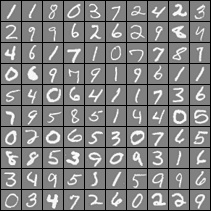

In [95]:
% Chamando função
displayData(selection)

Interessante! Semelhante ao dataset MNIST!

## Regressão Logística

In [11]:
%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.

% Test case for lrCostFunction
fprintf('Testing lrCostFunction() with regularization\n');

É necessário implementar a função ```lrCostFunction()``` para os cálculos.

In [12]:
% Dados de entrada da função
theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;

Vamos visualizar cada uma das variáveis envolvidas.

In [13]:
theta_t
X_t
y_t
lambda_t

In [14]:
% Entendendo a construção de X_t
[ones(5, 1)]

   1
   1
   1
   1



In [15]:
% Aplicando reshape
[ones(5, 1) reshape(1:15, 5, 3)]

ans =

    1    1    6   11
    1    2    7   12
    1    3    8   13
    1    4    9   14
    1    5   10   15



In [16]:
[ones(5, 1) reshape(1:15, 5, 3)/10]

ans =

   1.00000   0.10000   0.60000   1.10000
   1.00000   0.20000   0.70000   1.20000
   1.00000   0.30000   0.80000   1.30000
   1.00000   0.40000   0.90000   1.40000
   1.00000   0.50000   1.00000   1.50000



In [17]:
% Definindo função sigmoid para calcular z dentro da função custo
function g = sigmoid(z)
%SIGMOID Compute sigmoid functoon
%   J = SIGMOID(z) computes the sigmoid of z.

g = 1.0 ./ (1.0 + exp(-z));
end

In [18]:
function [J, grad] = lrCostFunction(theta, X, y, lambda)
%LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
%regularization
%   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Hint: The computation of the cost function and gradients can be
%       efficiently vectorized. For example, consider the computation
%
%           sigmoid(X * theta)
%
%       Each row of the resulting matrix will contain the value of the
%       prediction for that example. You can make use of this to vectorize
%       the cost function and gradient computations. 
%
% Hint: When computing the gradient of the regularized cost function, 
%       there're many possible vectorized solutions, but one solution
%       looks like:
%           grad = (unregularized gradient for logistic regression)
%           temp = theta; 
%           temp(1) = 0;   % because we don't add anything for j = 0  
%           grad = grad + YOUR_CODE_HERE (using the temp variable)
    
    z = X * theta;
    h = sigmoid(z);
    
    % Adicionando bias
    theta(1) = 0;
    
    % Calculando J
    unreg_J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h)); % Custo sem regularização
    reg_J = (lambda / (2 * m)) * (theta' * theta); % Custo da regularização

    J = unreg_J + reg_J; % Somando os termos
    
    # Calcula gradiente para theta_0
    grad = (X' * (h - y) + lambda * theta) / m; % Termo (lambda*theta/2) aplicado
    
end

In [19]:
% Chamando função custo com os parâmetros adequados
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

In [20]:
% Comunicando resultados
fprintf('Função custo J: %.3f\n', J)
fprintf('\n')
grad

Função custo J: 2.535

grad =

   0.14656
  -0.54856
   0.72472
   1.39800



Valores estão de acordo com os propostos na solução desta parte do exercício.

## One vs All Classifier

Para implementar esta função, é necessário passar os seguintes argumentos:
    - X
    - y
    - num_labels
    - lambda

Verificando cada um deles

In [21]:
% Informações de X e y
dim_x = size(X)
dim_y = size(y)

dim_x =

   5000    400

dim_y =

   5000      1



In [22]:
% Verificando alguns elementos de y
rand_indices_y = randperm(size(y, 1));
y(rand_indices_y)(1:10, :)

ans =

   10
    2
    8
    3
   10
    9
    1
    7
   10
    5



In [23]:
% Informações de num_labels e lambda
num_labels
lambda

num_labels =  10
error: 'lambda' undefined near line 1 column 1


Lambda ainda não foi definido.

In [24]:
% Definindo lambda
lambda = .1

lambda =  0.10000


In [25]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logistic regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda. 
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%












% =========================================================================


end

In [26]:
% Dentro da função temos
m = size(X, 1)
n = size(X, 2)
all_theta = zeros(num_labels, n+1);
size(all_theta)

m =  5000
n =  400
ans =

    10   401



Primeiramente, vamos entender o retorno da função:
    - all_theta

*all_theta* representa a matriz de parâmetros treinados para cada uma das 10 classes. Cada linha dessa matriz corresponde ao parâmetroo de regressão logística treinado para esta determinada classe.

In [27]:
# Percorrendo cada uma das classes
num_labels = 10;
for i = 1:num_labels
    fprintf('%d\n', i)
endfor

1
2
3
4
5
6
7
8
9
10


Para cada uma das classes (lembrando que o 0 foi mapeado em 10), devemos treinar o modelo. Para o melhor ajuste possível, será utilizada a função ```fmincg``` (semelhante a ```fminunc```). Lembrando ```fminunc```:

    % Set Options
    options = optimset('GradObj', 'on', 'MaxIter', 400);

    % Optimize
    [theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X_map, y, lambda)), initial_theta, options);
    
O retorno da função ```fminunc``` contemplava a matriz ```theta``` que, por sua vez, representa a matriz de parâmetros treinados para o modelo (n features). No caso atual, essa matriz é representada por ```all_theta``` que, provavelmente, irá se tratar de uma matriz com dimensões **400x1** para cada classe!

In [28]:
% Configurando opções para fmincg
options = optimset('GradObj', 'on', 'MaxIter', 50)

options =

  scalar structure containing the fields:

    GradObj = on
    MaxIter =  50



Antes de implementar a função ```fmincg``` devemos lembrar que esta será aplicada dentro de um laço ```for``` para cada uma das classes (total de 10). Dessa forma, o parâmetro ```y``` que representa os labels do dataset deverá ser transformado em um vetor de True ou False (1 ou 0) considerando cada uma das classes. Por exemplo:

In [29]:
% Vetor lógico para a classe 5
y==5

ans =

  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
 

  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0


Acima temos uma indexação lógica que retorna **1** toda vez que o label for igual a "5". Caso contrário, retorna **0**. Isso deverá ser aplicado para cada uma das classes dentro do laço for.

In [30]:
% Como a função fmincg retorna apenas theta, temos para uma classe (ex: 5):
initial_theta = zeros(size(X, 2), 1);
[theta_test] = fmincg (@(t)(lrCostFunction(t, X, y==5, lambda)), initial_theta, options)

Iteration    50 | Cost: 6.165153e-02
theta_test =

   0.00000
   0.00000
  -0.00000
   0.00007
  -0.00073
  -0.00660
  -0.00290
  -0.01374
  -0.00776
  -0.00113
   0.00008
   0.00152
   0.00717
  -0.03246
  -0.05115
   0.00015
   0.00080
   0.00000
  -0.00001
   0.00000
  -0.00000
  -0.00001
  -0.00055
   0.00578
   0.01736
   0.02090
  -0.00346
  -0.06621
  -0.03994
  -0.02102
   0.00327
  -0.01303
  -0.07959
   0.35502
   0.56649
  -0.00231
  -0.01002
  -0.00349
   0.00021
   0.00002
   0.00000
  -0.00002
   0.00832
  -0.06210
  -0.28959
  -0.59116
  -0.72458
  -0.22828
  -0.10558
   0.00854
   0.00451
  -0.06133
  -0.17811
   0.66273
   1.06278
  -0.30125
  -0.17483
   0.00681
   0.00167
   0.00016
   0.00001
   0.00098
   0.02961
  -0.36396
  -0.98763
  -1.28495
  -0.79292
  -0.26662
  -0.13123
  -0.43674
  -0.54982
  -0.15629
   0.09201
  -0.06212
  -0.14742
   0.12576
  -0.02360
   0.29339
  -0.01431
  -0.00406
  -0.00001
   0.00555
   0.03229
  -0.93030
  -1.84640
  -1.00034
  -

Verificando *initial_theta*:

In [31]:
initial_theta = zeros(size(X, 2), 1)

initial_theta =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   

In [32]:
# Quais as dimensões de initial_theta (e de theta, futuramente)
size(initial_theta)

ans =

   400     1



De fato! Teremos, ao rodar a função ```fmincg```, uma matriz contendo 400 parâmetros aprendidos pelo modelo que irão definir, dada uma instância de entrada, a qual classe essa pertence.

In [33]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logisitc regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda. 
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell use 
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%

options = optimset('GradObj', 'on', 'MaxIter', 50);
for i=1:num_labels
	initial_theta = zeros(size(X, 2), 1);
	[theta] = fmincg(@(t)(lrCostFunction(t, X,y==i, lambda)), initial_theta, options);
	all_theta(i,:) = theta';
end


% =========================================================================


end


In [34]:
lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

Iteration    50 | Cost: 1.372050e-02
Iteration    50 | Cost: 5.725252e-02
Iteration    50 | Cost: 6.403204e-02
Iteration    50 | Cost: 3.735569e-02
Iteration    50 | Cost: 6.185617e-02
Iteration    50 | Cost: 2.211546e-02
Iteration    50 | Cost: 3.480515e-02
Iteration    50 | Cost: 8.588532e-02
Iteration    50 | Cost: 7.956059e-02
Iteration    50 | Cost: 9.941675e-03


Agora, modificamos o laço ```for``` da função ```fmincg``` para contemplar não apenas a classe 5, mas também todas as classes (y = i). Dessa forma, foi popssível retornar o custo de cada um dos treinamentos, bem como a quantidade de iterações (sempre 50 pois foi configurado para tal).

In [35]:
% Verificando all_theta
all_theta

all_theta =

 Columns 1 through 8:

  -3.38877   0.00000   0.00000   0.00009  -0.00088  -0.00096   0.00157  -0.01907
  -3.25331   0.00000   0.00000  -0.00003   0.00040  -0.00092  -0.01640  -0.00912
  -4.96255   0.00000   0.00000  -0.00001  -0.00012   0.00332   0.01348  -0.01950
  -2.36351   0.00000   0.00000  -0.00001  -0.00002   0.00148  -0.00093   0.00116
   0.61158   0.00000   0.00000  -0.00000   0.00008  -0.00083  -0.00742  -0.00317
  -3.55672   0.00000   0.00000  -0.00000   0.00002  -0.00012  -0.00026  -0.00139
  -2.07685   0.00000   0.00000  -0.00003   0.00018   0.00076   0.00458   0.04439
  -8.13862   0.00000   0.00000  -0.00000   0.00005   0.00008  -0.00018  -0.00696
  -5.00782   0.00000   0.00000  -0.00000   0.00002   0.00035  -0.00523  -0.00366
  -6.12902   0.00000   0.00000  -0.00000  -0.00001   0.00013   0.00092   0.00004

 Columns 9 through 16:

  -0.00149   0.00062   0.00048   0.00007   0.00045   0.00201   0.00168   0.00447
  -0.01320  -0.00159  -0.00860  -0.00324   0.004

   0.52237   0.01673  -1.00279  -0.95952  -0.51558  -0.22964  -0.07076   0.00441
  -0.11357  -0.10315  -0.42122  -0.19020   0.68241   0.27901  -0.02316  -0.05936

 Columns 81 through 88:

  -0.01819   0.00000   0.00757  -0.05514  -0.19350  -0.53210  -3.27219  -2.47402
   0.01778   0.00191  -0.00633  -0.11992   0.44687  -0.23238  -0.59552   0.12374
  -0.02885   0.00000  -0.00318  -0.02678   0.30572   0.66920   0.03980   0.59016
  -0.01972   0.00121   0.00634  -0.24811  -0.84696  -0.10077  -0.62823  -0.11524
  -0.00484  -0.00001   0.00643   0.03798  -1.08313  -2.09874  -1.09485  -0.07775
  -0.00084  -0.00287  -0.01626  -0.07646  -0.05379  -0.24971  -0.04723  -0.15921
  -0.01750   0.00000   0.00092   0.03441  -0.45588  -0.40602   1.70327   0.89118
  -0.01530   0.00001   0.00294  -0.00374  -0.31216  -0.87549  -1.16276  -0.13746
  -0.00795   0.00001   0.00054   0.00433  -0.08321  -0.63356  -1.02678  -0.68439
  -0.01858  -0.00001   0.00172  -0.00034  -0.19623  -0.42924  -0.26128  -0.40531

 

  -1.06294  -0.69780  -0.99853   0.19026  -0.39764  -1.30490  -0.28093   0.55718
  -0.07650   1.38119   0.68235   0.19848  -1.03246   0.49073  -0.14300  -1.21485
   0.57627   0.26489  -0.06002  -1.21656  -0.22080  -1.11183  -0.55014   0.21780
  -0.05784   1.08035  -0.10939   2.02674   0.80687   1.85231  -0.19883  -1.38091

 Columns 161 through 168:

   0.00407   0.02228  -0.27568  -1.34444  -0.53962  -1.97649  -1.44186   0.18856
  -0.14690  -0.03304   0.26358   0.99661  -0.37703   0.47906   0.56237  -0.52864
  -0.10451   0.00129  -0.01214   0.12568  -0.07228   0.50722  -0.28787  -0.46943
  -0.15523  -0.07447  -1.00146  -1.62191  -0.30988  -0.58547  -0.79604  -0.62965
  -0.15727   0.00331  -0.10680  -0.00520  -0.34334   0.38809   0.76662   1.22031
  -0.01410   0.01727   0.06616  -0.59604  -1.65955  -0.17927  -0.29736  -0.67581
  -0.23555   0.00259  -0.02291  -0.32601  -0.26246  -0.05347   0.38822   1.00374
  -0.14878   0.00154  -0.01472  -0.08948   0.03394   0.03910  -0.60253   0.50775


  -1.75324   0.63887  -0.45452  -0.94238   0.16747  -0.13466   0.09930  -0.42875
  -0.11593  -1.26375   0.77472   0.70231   1.29853   0.16590  -1.41067  -0.24484
  -0.99679   0.47396  -1.00808  -0.09063  -0.38151   0.09402   0.22393  -0.41667
   0.67596   0.23147   0.24248  -0.57661  -0.41792  -0.21940   1.10228  -0.70400
   1.05495  -0.34665  -0.10335  -0.69510  -0.49647  -1.02915  -0.13774   0.11061
  -0.31110  -0.68596  -0.32110  -0.89832   0.07225  -0.74701  -0.65325  -0.85526

 Columns 241 through 248:

  -0.05127   0.02326  -0.19499  -2.52432  -3.07957  -1.60869  -2.14225  -0.42750
  -0.10773   0.08114  -0.65948  -1.28596   0.50490   0.38663  -1.13831   0.72488
  -0.26603   0.00368  -0.05431   0.90177  -0.26976  -0.27357   0.44660   0.01583
  -0.54817  -0.05961  -1.38456  -3.36605   0.44888  -0.37888  -1.10726  -0.72172
  -0.19046   0.03966  -0.45133  -1.70447   0.81583  -0.42139  -0.57366   0.45081
  -0.01874  -0.03942   0.31686   0.44125  -1.37540  -0.15191  -0.29770  -2.16940


   0.31241   0.91080   0.52266   0.81202   0.72358  -0.29054  -0.03967   0.22830
  -0.38564  -1.55006  -1.68716  -0.16734   1.00795   0.68132  -1.34387  -1.57401
  -0.31702   0.38224   0.06739  -0.56096   0.24952   0.47320  -0.50657  -1.00993
   0.18087  -0.90094  -0.96600   0.34792  -1.52122  -0.84011  -0.19034  -0.08764
   0.57021  -1.38236  -0.69064  -0.68316  -0.23383  -1.15323  -0.64605   0.32230
  -0.60240  -0.11270   0.01979   0.55692   0.02715   0.46622   0.08270  -0.16261
  -0.66380  -1.16284  -0.49360  -0.46771  -0.69891  -0.18710   1.12612   1.24532
  -0.47291   0.49225   0.83502  -0.52503   0.28818  -0.33887  -0.65873  -0.40039

 Columns 321 through 328:

  -0.00896  -0.00001  -0.01262   0.08773   0.71370  -1.12814  -1.05634  -1.23741
   0.00707  -0.00213   0.01580  -0.16262  -0.99759  -1.00090  -0.55121  -0.47947
   0.01199   0.00002   0.00854  -0.09025  -0.39422  -0.42113  -0.52752  -0.43008
  -0.61849   0.00798  -0.10688   0.02481   0.32649   1.40555   0.31394  -1.33436



   0.00159   0.07074   0.35708  -0.01599  -0.17086  -0.04268   0.00529   0.00000
   0.38910   0.30850  -0.01582   0.03030   0.00845   0.01533   0.00423  -0.00048
   0.01515   0.00085  -0.00960  -0.00254  -0.00330   0.00049  -0.00003   0.00000
  -0.20371  -0.26923  -0.01374   0.00732  -0.00363  -0.00245   0.00020   0.00001
  -0.11188  -0.14007  -0.02800  -0.07786  -0.01299   0.00457  -0.00036  -0.00000
  -0.19540  -0.11103  -0.02257  -0.02558  -0.00586   0.00208  -0.00028   0.00001
  -0.01143  -0.00366  -0.01420  -0.00261  -0.00271  -0.00336  -0.00071   0.00009
  -0.05548  -0.05441  -0.02920  -0.02684  -0.01130   0.00063  -0.00011   0.00001
  -0.04163  -0.08044  -0.01987   0.00102   0.00259   0.00090  -0.00060   0.00004
   0.02230   0.03443   0.01157   0.00285   0.00494   0.00089  -0.00026   0.00001

 Column 401:

   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000



In [36]:
% Dimensões de all_theta
size(all_theta)

ans =

    10   401



Para cada classe (1 a 10), temos 400 parâmetros representando cada uma das features.

## Predizendo e Avaliando Performance

Para predizer os valores, é necessário calcular a função hypotheshis h_theta = theta^T * X

Após isso, teremos 10 valores diferentes para cada uma das classes. Para realizar as predições, basta calcular o valor máximo dessa matriz de predições e verificar a qual classe esse valor pertence.

In [37]:
% Conjunto de dados
size(X)

ans =

   5000    400



In [38]:
% Conjunto de parâmetros (matriz transposta)
size(all_theta')

ans =

   401    10



In [39]:
% Multiplicando parâmetros por features
all_theta' * X

error: operator *: nonconformant arguments (op1 is 401x10, op2 is 5000x400)


É preciso realizar uma transformação antes da multiplicação: adicionar uma coluna bias (1s) no dataset X.

In [40]:
% Analisando transformação
size(X)
m = size(X, 1)

ans =

   5000    400

m =  5000


In [41]:
% Trabalhando com um conjunto de dados menor para facilitar o entendimento
X_teste = X(1:10, :);
size(X_teste)
m_teste = size(X_teste, 1)

ans =

    10   400

m_teste =  10


In [42]:
% O que seria uma matriz ones passando 5000 como argumento?
size(ones(m))

ans =

   5000   5000



Para realizar a multiplicação dos parâmetros *theta* com as fetaures *X*, é necessário adicionar o termo de bias (coluna de *ones* em X) para que as dimensões das matrizes sejam compatíveis.


In [43]:
% Em um conjunto menor, precisamos retornar uma coluna de 1s e adicionar ao dataset X
ones(m_teste, 1)

ans =

   1
   1
   1
   1
   1
   1
   1
   1
   1
   1



In [44]:
% Parece que estamos no caminho correto, vamos restringir ainda mais X_teste
X_teste = X_teste(:, 4:9)

X_teste =

   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0
   0   0   0   0   0   0



In [45]:
% Testando append
[ones(m_teste, 1) X_teste]

ans =

   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0
   1   0   0   0   0   0   0



Parece que funcionou, vamos aplicar ao dataset original.

In [46]:
% Dimensões dataset original
dim_X_original = size(X)
X_bias = [ones(m, 1) X];
dim_X_bias = size(X_bias)

dim_X_original =

   5000    400

dim_X_bias =

   5000    401



Uma coluna a mais foi adicionada e era justamente isso que queríamos. Vamos tentar agora a multiplicação.

In [47]:
% Verificando dimensões de all_theta
size(all_theta')

ans =

   401    10



In [48]:
% Testando multiplicação
h_theta = X_bias * all_theta'

h_theta =

 Columns 1 through 5:

  -38.13722122   -7.95204015   -9.83937710  -20.09402066   -6.92163172
  -30.71834401  -10.46950738   -9.48681750  -21.18091758   -4.61905833
  -36.24290382   -8.03712750   -7.32929481  -18.69432050   -7.15532118
  -44.54304770   -7.67294481   -9.33097716  -18.04336249  -11.50186600
  -47.52520221  -12.97602873   -9.10976045  -24.05321310   -5.08539657
  -44.50644499   -8.10045269  -15.46614297  -25.45070660   -7.90342524
  -43.03482981  -16.86467116   -2.46240828  -24.58057266  -16.84794912
  -18.48414085   -0.00420254   -7.17723866  -18.26479938   -1.88521993
  -45.33851595   -8.31438639   -6.59500951  -23.00178498   -7.18130260
  -35.88924038  -12.87386899   -0.74916818  -19.20460607   -6.15630777
  -45.58653733  -12.11698959   -6.42645352  -20.18791665   -1.85111608
  -43.07024051   -5.01473007   -9.34493906  -21.09255946  -13.19745172
  -47.09643223   -9.01616377   -8.82472883  -21.79376934   -6.22276314
  -24.23243236   -4.48795399   -9.34815327 

  -50.47349381   -4.83371876  -13.79534547  -17.16848856   -8.53977673
  -42.75785058   -9.54861700  -13.87941677  -12.69792869   -6.81690932
  -46.41733402  -11.40346200  -23.53636669  -18.88223697  -11.00373683
  -41.45243708   -6.11458360  -12.41723021  -15.26897776   -6.30273473
  -36.88918493   -5.39189346   -4.40265409  -10.60692006   -8.54337365
  -20.81343052  -17.42936462   -5.28315159  -24.09503539   -8.91323790
  -44.30491103   -6.24319023  -21.87424723   -8.05670698    0.22303302
  -36.56086662   -7.28052207   -8.17457671  -14.49091860   -7.62669450
  -41.82127056   -7.99671444  -12.47008664  -13.24531794   -7.43622739
  -45.36359340   -8.55861125  -30.66182431  -18.50232346  -10.97254531
  -55.09067828   -8.88922598   -9.58833727  -27.06184385  -18.20732728
  -36.77973658  -13.50998041  -10.83771955  -22.52163805   -6.90065220
  -50.18495470  -13.99805927  -12.18424393  -17.46989705  -10.59965698
  -49.75866505  -15.17227309  -13.12022833  -21.41555663  -14.57859727
  -32.

  -36.53115850  -15.87313388  -21.26302594  -25.57625897   -1.28338076
  -49.37765507  -12.71531164  -19.60992372  -17.53754443   -3.94492428
  -48.06112597  -13.73630724  -11.29744997  -16.81528650   -2.89031224
  -36.74758703   -5.50803433  -14.25164763  -18.67291506   -8.81987654
  -40.76670067   -9.21573017  -12.62136349  -27.49596422  -12.86538876
  -29.12174751   -6.03303735   -5.85552467  -16.29277704   -5.25850584
  -48.28391014  -11.46074033  -12.30844671  -13.12744166   -5.62659017
  -30.95186484   -6.74787755  -11.34834715  -31.05843383   -1.79254891
  -37.21277005   -3.29387167   -7.70292154  -11.63359820   -1.84420988
  -49.98298320  -10.62361276  -17.12681325  -17.46566790   -3.87410796
  -42.29038862   -7.43093359  -17.41681896  -12.78332076   -4.53569112
  -36.78771719  -12.37296501   -2.20739713  -19.55148099   -7.12415402
  -35.68146024   -7.64690479   -8.25691459  -15.93465885   -4.78576964
  -41.94741866  -14.00762440   -6.95331934  -20.77462076   -6.00650685
  -45.

  -29.88072946  -12.74808715  -10.82106796  -35.26696872   -4.44528600
  -43.53612281  -11.57511073   -8.51108475  -18.72863859   -8.34457134
  -31.76922105  -17.16008868   -3.36128641  -15.04059821   -9.54023018
  -31.01115183   -9.08665150   -9.11246518  -28.40160217  -14.91527164
  -24.63759023  -14.51611504   -6.22185445  -20.28983956   -8.02124787
  -11.40906476  -17.61597468   -5.24365168  -28.10526451  -13.13917560
  -47.27415850   -8.75989617  -12.09450007  -33.13407626  -13.52230528
  -47.91524331   -4.94456701   -8.85856111  -21.27954482   -7.44644787
  -33.81669116  -10.06206530  -12.49002565  -25.40332064   -2.33470326
  -24.73826346  -16.16171255   -3.56630500  -34.38051475  -10.23720081
  -43.89614587  -20.60842721   -5.22822156  -18.08004578  -10.17709100
  -27.05489002   -9.68312176   -9.37689829  -19.78042709   -8.85295843
  -37.13145424   -5.60266091   -8.00091486  -22.39176420  -11.68967492
  -40.51452683   -7.95436798  -14.79068828  -29.52717332  -13.93240570
  -29.

  -42.53751122   -3.41622951  -10.92333172  -24.58809756  -12.48636334
  -59.94376145   -9.43006691  -13.23198035  -24.51019541  -14.88574482
  -34.42172829   -1.16500590   -9.71089083  -18.79632628  -11.47305370
  -38.44014811   -1.90970278   -8.59732509  -21.12501655   -5.35301853
  -35.89542058   -3.93253512   -9.73667477  -22.48394246   -8.50968135
  -50.39099950   -7.22988329  -14.79639424  -23.93598566  -15.06662817
  -27.22676072  -15.14510490  -10.76166582  -23.65343649   -8.49466793
  -39.20705677  -10.92008875   -7.12373378  -21.49119983   -8.57757977
  -26.81918633   -3.64375869   -5.87561875  -12.03012960   -6.14362695
  -37.85546475  -12.18311583   -9.71447227  -27.68326054   -9.28712661
  -46.14497472   -6.37586910   -9.63151952  -16.67908694   -4.70189827
  -39.50015446  -10.29835967  -11.02626959  -15.62386007   -2.54463321
  -43.28024998   -8.35673644   -7.41606774  -17.72476375   -5.78255771
  -44.19581018   -4.84217447   -8.81418827  -17.89547171   -4.52715609
  -35.

    2.66982289   -4.23528808   -4.56460320   -4.63766386   -5.26682587
    6.81458909   -4.80924133   -5.76031847   -7.70868022   -7.04053373
    4.20227507   -8.55728166   -5.24719600  -12.81092407   -3.10032065
    1.75162757   -4.76056072   -8.04158513   -7.01529634   -3.33278979
    6.97698494   -7.14715863   -3.73781565  -10.95006336   -5.76681207
    7.04126305   -4.12190377   -4.17639255  -10.70761741   -6.76611278
    6.41884325   -5.91640894   -6.70257568  -11.33712406  -10.22062451
    4.97924533   -5.23024986   -4.18231760  -10.44340854   -7.06280229
    7.23605548   -5.39233881   -3.26180985   -9.10233504   -8.79614572
    5.33511542   -5.56783362   -4.83928206  -10.87791717  -10.65169698
    6.83312827   -2.53023780   -7.03874366  -13.05687812   -7.05078146
    7.94622326   -6.96849973   -4.53551203  -10.85943818   -5.56507616
    5.88213407   -4.33451845   -5.58984378   -8.11567269   -6.97879691
    4.56028680   -5.72269776   -3.40047184  -10.08140643   -4.58833542
    8.

    5.42160824   -4.93659017   -3.58761845   -7.80692735   -7.03746024
    7.46922905   -8.01247607   -2.17873410  -10.61973263   -7.51523851
    1.39612679   -6.70870665   -5.13018521   -9.23042013   -1.34898935
    4.80919990   -4.22245912   -4.50912051  -13.03802000   -6.73119328
    5.39295218   -3.57530241   -4.27401817  -10.64290306   -7.22994073
    2.38164767   -7.48442695   -4.57262818   -8.77017096   -2.34451702
    6.23529532   -2.81302246   -4.25195700   -7.84471440   -8.15629389
    6.10263164   -3.56816211   -4.41165392  -11.33879886   -7.09580709
    6.97176541   -3.99638544   -5.46216122   -8.41957368   -5.92306190
    5.98528429   -8.34761221   -1.33338950   -9.12883022   -8.40721773
    4.96542226   -5.42368450   -5.48177906  -12.05860995   -5.32433101
    3.78531880   -3.83146493   -4.66368740  -11.62732059   -6.84705899
    6.62942897   -8.02679293   -2.55888254  -11.43677757   -6.08290329
    2.38540509   -5.54921771   -2.16220146   -9.89864609  -10.81156607
    3.

    5.59601890   -4.56060716   -4.55841446   -8.78560576   -8.62827432
    6.57780943   -4.59515522   -5.20940934  -15.65294489   -9.81192858
    5.04803359   -4.10124002   -7.71881857   -6.66541835   -4.82293019
    3.65209401   -4.19618447   -3.15095951   -8.11131512  -10.38913024
    3.39711925   -5.48120197   -6.72393961   -6.27201546   -2.37254460
    3.86896341   -9.67050516   -0.42250732   -9.92430984  -10.18349060
    4.10564899   -6.11958621   -3.91875831  -12.26970649  -13.82803077
    2.87182388   -4.65686647   -5.15414065  -11.16705924  -11.16488476
    4.00184867   -3.72172255   -3.54752494  -13.29770104   -6.79365666
    5.48067615   -3.52454560   -4.73366460   -9.24683827   -7.90707886
    0.78342723   -9.97082908   -3.43596031   -7.03546727   -4.32912245
    7.24590752   -6.33739083   -3.92910974   -7.01603281   -8.50353743
    6.70185879   -2.52572913   -5.91467858  -13.52499065  -10.80230865
    6.56959486   -3.61055786   -4.61214841   -9.59452467  -10.94237045
    7.

    5.20756315   -3.03961369   -5.34383126  -10.97436025  -10.03141492
    4.75095072   -4.48544374   -3.79070411   -8.24819848   -7.60950306
    2.78731286   -1.93543235   -6.50145621   -6.78129124   -8.95550292
    8.29952759   -2.91807656   -5.44498636   -7.81364904   -8.92937551
    4.23570305   -0.33501609   -6.56611368  -12.36960500   -8.82578886
    4.98372847   -3.90468887   -2.64256323  -12.02430731   -5.67052872
    5.97443404   -7.14633939   -4.18716684  -10.19383352   -5.91303831
    6.58793841   -4.38958907   -7.04783281  -10.19608323   -6.51196364
    9.09941268   -4.86954918   -4.47290799   -7.72626602   -6.55515363
    4.23393541   -5.70715071   -5.28775114  -12.42242598   -4.01159716
    5.88557902   -2.85416592   -5.59421957   -9.85167925  -10.05048098
    5.56172372   -3.35266903   -6.01900800  -12.98674686  -11.69220171
    6.25066707   -5.76735939   -2.43513604  -10.50759004  -10.28943539
    4.13082320   -2.47400191   -4.57444218   -9.52228876   -8.85022215
    5.

   -6.45540788    9.30370863   -3.76513454  -26.81500911  -10.71091286
  -18.65143561    6.83706351   -4.67901686  -12.30918279   -9.98055243
    0.59398509   -3.13033978   -2.60358646   -7.11843774   -6.00124049
  -21.01727684    0.21129058   -6.50923360   -7.18825696  -17.64377380
  -21.19702849    4.78563943   -8.96488793   -6.51037565  -10.90217761
   -1.94997513    1.54806774   -4.25701511  -10.66526421   -6.07812594
  -18.10666553    4.47350278   -9.76083260   -5.67929258   -4.55857974
  -31.38282858    5.76779946   -4.89817155   -7.46707764  -12.04545195
  -26.82185253    2.28108988   -8.32741101   -9.61069921  -11.19125897
  -36.15109248    5.21465039  -11.16724153  -11.53061148  -11.80126333
  -21.71626748    2.03932203   -4.80414698  -13.52824531  -10.21199983
  -41.31259603    6.36277535   -0.06222554  -18.10391385  -10.10322598
  -31.33584551    2.96333142   -5.43025011   -6.32623959   -4.93995578
  -22.03901988    2.33809997   -9.59345307   -5.58274018  -10.39982461
   -6.

  -15.30235852    3.30717129   -8.56798481  -13.84982041  -13.19056170
   -6.32317295   11.36842634   -9.35218521  -24.29046439  -12.05538177
  -26.08684294    2.58931791   -7.37546291  -12.61056777   -7.86413324
   -6.15569973   11.11698938   -6.87659476  -19.41133574  -12.44600872
  -13.90576615    3.68176104   -8.25152739  -12.94706758   -8.01919506
  -20.42882031    1.21510680   -6.52530983  -10.63480580   -9.67157160
  -21.23908503    7.33567474  -10.58701156  -21.77985366  -12.25967514
   -3.67789686    6.86606369   -5.95036068  -19.87525575  -12.88961633
  -10.06006497    0.22436506   -0.41894724   -7.63751371   -8.63897150
  -19.14877514    8.28938742   -5.37230728  -17.26814461  -10.96417855
  -41.95901125   -4.13132027   -7.29703006   -5.20733312  -13.45196874
  -13.90063456    5.19639054   -3.10446270  -25.48646273  -10.59035790
   -9.11056329    5.49628453   -5.25528795   -6.80381604  -11.97144571
  -13.76412078    4.48227301   -1.53524291  -19.19432728   -9.52707586
  -27.

  -13.80091321    0.79737026   -8.48373439   -5.27510129  -13.02597737
   -4.45629389    2.32573814   -5.99299773  -13.91089762   -9.68932526
   -7.87634865   -0.59910784   -4.24588698   -8.53326435   -7.33088094
  -15.39959764    6.52040558   -5.18801764  -13.86434739  -12.70545860
  -39.82538099   11.52227402   -8.46390945  -15.07018334  -11.84651203
  -12.53738326    2.25568066   -6.33252795  -18.42414794  -10.77770200
   -8.88273076    1.79079965   -3.26164949  -12.13056139   -6.30057161
  -25.60018435    5.69883841   -4.98057125  -18.66449963  -18.32236851
  -26.70285513    3.41616401   -4.74091012  -15.46953730  -14.15804773
  -45.52959868    3.77342428   -6.57030331  -20.36218942  -12.51224710
  -35.60348903    6.94171598   -7.16629218  -13.55619319  -12.11192169
  -37.76424541    6.94538448  -14.28525251  -15.75283944  -18.87069687
  -16.78630624    4.27730233   -2.20306392  -17.53019383  -16.75632804
  -54.43665317    9.90653836   -9.42741176  -17.21868669  -20.12582562
  -46.

  -12.47696936    7.54849528   -7.24002552   -5.76642984  -13.93222469
  -10.17584991    7.92432471  -10.00353636  -17.96229757   -8.02940105
   -8.09972679    0.35005014   -7.83630617  -15.68137975   -5.44583956
  -19.68665881   -6.23603752  -10.73518000   -8.88436503  -13.73414640
   -6.02740954    4.37955253   -6.76892511  -18.68254842   -3.95250075
   -7.96979613    2.18501354   -6.68757748  -15.27353333   -7.98245510
   -2.79702033    1.40098605   -4.38898510  -16.24737688   -2.15268281
   -4.08540314    4.92443479   -3.93064456  -19.61303452  -13.51639452
   -8.06491066   -1.20166282   -2.68174850  -13.48978763   -8.52483872
  -26.56939078    6.63702121   -0.55863402  -14.41690856  -11.72257427
  -31.67331947    6.25538837  -11.40262579  -18.88509539  -17.06863265
  -32.89613390   11.14633480   -8.03811853  -12.70949197  -11.68951765
   -2.90523267    0.59355676   -1.50284703  -24.01357367   -9.04781073
   -9.77859697    4.84251511   -8.59522627  -17.90409319  -15.98942940
  -16.

  -16.54891082  -10.33335204    3.50481345  -10.96084362   -1.95162382
  -20.58110792  -14.53987451    4.33502607  -14.42448920   -1.98700406
  -19.96644716   -8.80300981    1.31836291  -13.48664277   -4.30329820
  -15.02276237  -11.24092463    4.30879616  -11.81510494   -3.13990846
  -14.48986220   -3.70753172    5.61267810  -17.39780400   -8.49319646
  -48.14853702   -9.20257092    5.33030471  -14.95995187  -15.07830248
   -6.59035967  -11.27620496    5.55859094  -13.93693737   -5.56355207
  -14.16601815   -4.53253858    4.99003355  -14.48026457   -5.45719305
   -9.63929780   -6.68773221    2.78658341   -7.58183723   -4.20318701
  -30.23753110   -9.03579804    7.25675476   -8.90127898   -9.24274757
  -17.89957029   -5.26290647    4.15614460  -15.25321702   -5.51075272
  -28.65644208   -8.12669756    2.76398874  -19.41703072   -9.26683749
  -33.89298365   -8.53347639    0.21039813  -17.82030754  -12.14190629
   -9.39701382   -2.49273596    4.28447461  -15.65794638  -12.56454462
  -17.

  -19.92483978    1.43618306    3.12647296  -26.43377450  -11.42319668
  -12.17748950  -14.15874032    1.63678410  -12.20131148   -5.91836764
  -11.41935560   -8.16321134    3.08370092  -10.31526541   -3.68321394
   -3.39318873    0.92367120   -0.23449993  -24.31234132  -14.21853793
  -12.55764106   -5.21476032    0.80950284   -9.07941536   -5.61500910
  -20.76468096   -0.01613312   -0.21389811  -20.21701841  -12.89925376
  -12.04233634   -2.59687209   -4.12685377  -19.69890189  -12.60995316
  -16.02289306  -14.30185508   -1.86483501  -16.02429762    0.12918564
  -22.04810470   -5.87304788    2.47229868  -13.81090809   -8.76218399
  -19.03595784  -11.88100613    0.69366021  -11.99120772   -1.78424806
  -21.16375833  -11.47290494    6.54486086  -14.27573414   -4.63067540
  -25.65209351  -12.94244438   12.08954989  -17.18579022  -14.03649362
   -8.62741151   -4.96014046    1.82565135  -11.02252664   -6.79429781
  -25.27799363  -17.82285590    4.38079862  -19.31006755   -2.00002879
  -25.

  -25.84069150   -4.79787768    2.19601581   -9.08373962   -6.52788228
  -12.37525103   -0.61948462    1.09983806  -16.72456320  -10.54458507
  -16.74253980   -8.54829631    8.36363912  -10.16913596   -4.20119858
  -29.69940441  -12.94481538    9.96513901  -14.02896142   -8.52338918
  -17.13400996   -2.98325349    3.79625350  -14.47250819  -11.51366635
  -27.06054465   -3.95231674    1.51218204  -15.70103810  -12.49074083
  -17.02554176   -2.76498388    1.56961478  -18.76146354   -9.96791039
  -12.86923196   -2.24928971    0.44725272  -12.17903807   -5.85402089
   -9.34781513   -3.99804197    1.56107204  -10.67983187   -3.30438045
   -6.12330456   -5.57005414   -0.32946495   -6.74351406   -3.96238678
  -30.26692451   -9.31979009    2.72324563   -9.34452174   -7.05714680
  -15.16980392   -9.03723446    3.19723934  -18.27130525   -5.17317802
   -4.55178250   -8.53379533   -0.78003934  -16.03946124   -4.69091896
  -22.45755327   -9.24539713    4.48980539  -20.20967345   -4.15766359
  -13.

  -11.45158420  -11.89498633    6.65615367  -14.12413057   -7.30245399
  -23.34639562  -11.65805600    8.88735558  -24.80094648   -5.38090104
  -22.44042411   -9.96022148    8.44501945  -18.16041781  -10.04211985
   -3.46994167   -4.93557695   -1.41578082   -3.87885069   -7.27601360
  -19.42881401   -4.11993778    9.79478686  -17.38057965   -7.82855693
  -19.76776056  -14.21895200    9.41562520  -15.23656408   -6.33176278
  -25.43872416   -5.36156702    5.81102966   -7.41547073   -2.44760716
  -19.66686410   -6.44442914    3.09139688   -6.10101700   -4.54673338
   -9.82602200   -8.86843466    5.11721989  -12.19479635   -6.36360035
  -23.20384030  -10.17635655    6.36854948  -15.09474449   -5.22683372
  -12.56500833  -10.51717505   -0.05854577   -8.84625512   -1.48381196
  -14.35937239  -10.62956170    2.43735823  -16.44032944   -4.17792408
  -22.58052963   -3.15862573    5.28160699  -13.97380513   -4.12975305
  -20.47510398   -8.55187025    8.35515757  -13.42283784   -9.85247502
  -13.

  -41.71277728   -1.86008512    8.46839284  -23.74690286   -7.38958969
  -22.85848608   -3.35551673   -2.73842055   -8.20111782  -13.17125662
  -29.59336116   -4.08386317    5.42905944   -5.61385274  -11.81938448
  -13.06963983  -10.61737379    4.39121803  -13.63141407   -4.78258622
  -27.72305143   -7.74542473    6.65919318   -5.20394090  -11.18106262
   -9.63075290   -1.08943974   -3.27778721  -16.05031475   -0.39162017
  -13.56455970   -8.26263280    2.18419198  -13.22119662   -7.94510906
  -21.10763566   -5.53510615    5.39098211  -11.62070423  -14.83522397
  -19.54449545   -9.59790674    0.81160329  -14.91089125  -12.43751551
  -20.29155515   -8.41834570    5.93562449  -16.31611880   -5.01435723
  -22.64588507   -1.90933865   -2.90402444   -4.04120150  -11.31800010
  -33.58797242   -2.74563337    5.27335207  -17.51613181  -12.34254845
  -35.28725602   -8.55192605   11.50808630   -6.52956639  -12.28616376
  -34.58728305   -4.08905726    9.75849960  -12.51514345  -15.71681389
   -9.

  -17.25593997   -3.65478234  -10.26692469   -1.65233412  -11.88680571
  -31.87430171  -14.56722546  -19.81468670    7.74396384   -6.76906205
  -30.15879146  -17.97629500  -18.46194954    7.82514457   -3.03352373
  -28.66047795  -10.94874213  -11.40235409    7.89203626   -7.84290822
  -28.32143751   -2.94495859  -15.14880488    5.18418116   -6.93173840
  -23.68406411  -11.08072732  -13.22494160    0.37917338   -8.95138715
  -36.67533301  -13.50701852  -22.71012104   -0.70950425   -7.24096583
  -28.00462946   -6.18401616  -13.42610212   10.34701563   -4.41544689
  -23.18695194   -5.91726044  -11.40762548    4.91082869  -16.98431137
  -18.50205500   -6.98332073  -14.66414739    7.13804975  -13.71134932
  -21.23292638   -8.15131858  -12.64675926    4.43371396  -10.91557908
  -23.07359329   -5.50562649  -15.75571118    5.67193034   -5.35204067
  -16.11061425   -5.93056754  -10.40704200    6.25993823   -4.11258460
  -32.16784022   -6.52469918  -15.02004694    6.21656079   -4.62195328
  -25.

  -22.10907586  -12.67979338  -13.16499037   12.44090968   -7.56133433
  -19.24862354   -9.92941013  -16.87444814    9.02169557  -12.83998531
  -11.22037132   -6.19671671   -8.70584719    3.67530967   -6.40679853
   -4.79589706  -11.39434470   -5.72932998    1.64718165   -5.45730490
  -16.49434479  -10.74776057   -6.53465626    3.27617749   -7.45835695
  -18.09883742   -5.51715831  -11.88811154    4.46977435   -9.20335932
  -15.82171268  -16.34854042  -13.45873420   13.93274529   -6.91544064
  -19.79689208  -10.58337925   -5.58362727    2.91205561   -4.52708940
  -17.78245331  -10.50021064  -11.90571411    3.40619464  -12.49729564
  -35.30924306  -10.74477966  -17.13746709   13.40986808  -10.25196512
  -17.08278194   -4.23917033   -9.34662360    0.03138492   -3.51899385
  -21.93505216  -12.87876236   -8.87238890    4.86166056   -4.77604091
  -18.19190974  -11.30620732  -14.64086164   10.60871514  -15.19372230
  -17.45963405   -3.68342779   -8.52784534    5.59495710   -8.47437764
  -31.

  -15.79421071   -5.58241014  -10.60554120    3.80416242   -6.13682486
  -18.36982125   -9.49928527  -14.18381217    6.32901783   -5.63940392
  -26.96354547   -5.92367989  -17.78454556    7.53308607  -20.53678608
  -21.41127447   -7.89025592  -17.13066532    8.29842519   -7.57993405
  -24.29552774  -11.32343041  -17.42212626    6.18012684   -6.73327661
  -26.82187163   -5.09112009  -11.74404134    2.83051277   -9.67818842
  -18.40868184   -6.08050558  -12.90174265    5.06030735   -6.14218442
  -18.74687231   -3.92703809   -9.51234042    5.50745954   -7.74400323
  -31.66240420   -7.54093183  -18.49770949    3.66588322   -4.78087830
  -11.12261887  -11.81919600   -2.68848720    5.79049587   -3.13582515
  -18.49061028   -9.87963953  -16.19294591    3.75289806   -5.37737140
   -9.15973306   -5.55239756   -3.98672685    2.89165519   -6.62925228
   -4.25388175   -7.93378257   -1.82196139    2.54809706   -3.79475199
  -19.87880964  -16.40261224  -18.00599563    3.33880797   -4.51161732
  -17.

  -33.56556807   -8.53536574  -21.06340431    7.66389174   -6.53336784
  -15.80840976   -7.08740271  -18.88398566    8.26191990   -7.36013449
  -23.64957079   -1.57110230  -12.78119853    3.14761923   -6.99023913
  -38.73412399   -4.69952388  -17.35400936    3.27519453   -7.83048072
  -35.95581363   -6.97382755  -17.41472728    1.82747111  -18.16448609
  -37.74361763   -5.97994579  -21.05627478    2.25566893  -12.56989731
  -18.57099961   -9.28893375  -11.71708407    7.48834012   -6.03029788
  -42.65086886   -4.83086228  -17.43449153    0.30918437   -9.30411019
  -36.33927977  -13.88319551  -17.67930968    2.96285601   -5.53313004
  -11.33996747   -5.08587428   -5.95075968    0.32468261   -3.76163852
  -18.60914892   -4.41512236  -14.96898700    6.70125931   -6.34777346
  -20.24801401   -2.91040612  -14.01578329    3.58018705   -7.53240813
  -21.77197541   -5.37613933   -9.42745499    2.09536447   -5.55350088
  -11.95371784   -6.34224815  -11.32629482    2.65034092   -6.50844377
  -12.

   -9.51667308   -8.90953567  -17.80669347   -8.38748629   -0.22689374
  -19.94122185   -7.87669679  -12.89024721    1.21337017    1.03136586
  -44.80896416  -22.06879012   -1.03861928  -14.51821915    2.08042504
  -26.35187113  -20.97251945   -6.47278766   -9.13898216    5.32440440
  -18.04542894  -11.61055179   -8.42300728   -6.05856967    1.72462817
  -19.77007846    1.36013806  -10.74251572   -8.28191574   -6.20026016
   -7.90341903  -11.31295584   -3.68632690  -15.89260176   -1.10300999
  -14.49416772  -13.42668682   -4.16257026   -1.77523824    3.02205600
  -21.19074860  -12.36734967   -2.79175545  -12.21433293    1.57954447
  -25.55073666   -7.17453206   -7.98962309   -4.93391218   -0.93568659
  -22.25837541  -20.43822651   -5.95343424  -13.62966705    1.70699835
  -26.53350294  -28.31793802  -11.13460756   -9.09323398    8.29062112
  -39.86817148  -14.56032650   -8.64647808  -11.79728922    4.00624476
  -25.25609354  -11.71833320   -2.21740780  -11.71672904   -0.80629235
  -25.

  -21.81521201  -15.88643169   -7.47544608   -9.92124399    1.37818173
  -31.81384060  -19.19161979   -7.45996953  -14.45975036    2.83462185
  -19.15788973  -16.27444948   -3.11191179   -9.95734793    0.89106553
  -20.79183378   -6.52333673   -0.60259405  -25.33492290    1.65604882
  -18.68558006  -10.23248725   -2.38137483  -23.16357957    0.48525661
  -29.71912120  -23.13035224   -4.74012928  -11.82467441    1.16736142
  -24.32221526  -11.64397590  -13.75495630  -10.98719783    6.53675889
  -15.16301765   -6.97094953  -11.58133845   -6.56199597    8.80135726
  -12.44670962  -11.02788448   -2.26500988  -11.77829926   -0.24595260
  -13.30719899  -14.15494750   -6.48528882  -12.80949268    5.35503403
  -24.45260128  -15.44664109   -3.24871004  -22.25974854    5.62227511
  -11.38876821  -11.87205753   -6.73647253  -11.72976412    2.09398980
  -24.98071510  -15.41800227   -4.94182886  -23.19006780    5.15316855
  -23.78554593   -1.76336561  -15.89882486   -2.28834045   -0.97529262
  -21.

  -20.08546803  -12.53235410   -6.82467386   -9.90766200    8.92581072
  -17.51744968  -15.53900767   -6.30503797   -9.55057963    1.98263173
  -20.53144161   -8.23357024   -2.59599875   -3.00477015    2.50328376
  -12.97768396   -9.41473233   -3.82568664  -11.04406856    4.01212416
  -11.35800256  -14.90295071   -3.27321516  -11.79581742    1.49204401
  -24.33720972   -0.81840476   -1.77832119  -23.11462749   -2.35953928
   -2.92148258   -7.24942187   -1.96523107  -14.91441084   -0.01166161
  -26.19948085   -2.83470564   -1.75415811  -12.48080474   -4.80216371
   -0.02909796   -9.93100371   -6.04526870  -12.75409149    1.92424574
  -26.89423460  -11.99716968   -8.19567704  -15.38695115    5.12945642
   -8.83237009   -7.78505849   -8.11036454  -10.24814795    4.61317270
   -6.27925965  -10.21683866   -6.36041543   -6.79355548    2.73170243
  -12.78042960   -8.61061928   -6.38744683   -6.13197595    5.84520269
   -1.27905653  -10.60845257   -6.39011712  -16.37281000   -1.86580635
   -6.

  -17.74048314   -5.61837029  -13.68249170   -5.76303490    2.74838581
  -28.96758142   -5.99130299   -3.25125256  -13.26739000    2.06378521
  -19.38643749  -18.06714725   -7.34988422  -18.53726018    1.46258165
  -15.39125334  -11.69596792   -7.67678903  -12.11542680    0.13668559
  -28.86827750  -16.23898527   -0.67614562  -12.34949031    2.27995471
  -13.70705935   -7.04838862   -4.85547647  -20.19730276   -1.33944641
  -22.32133854  -18.14919559   -6.98050252   -9.13493209    7.66942923
  -28.93166951  -12.07988536   -0.16741174  -24.85150662    0.36587067
  -36.09092581  -13.66208565   -4.26166373  -19.18064222   -1.57961472
  -24.19768132   -6.66899482   -8.12405679  -11.21459984   -1.76094116
  -38.44750739  -20.98274782   -7.59132823   -9.14476957    5.12739621
  -16.05050020   -6.38041672   -9.81968427   -5.23851912    7.00866352
   -9.89595054  -13.75317121   -3.40236143  -10.52709608    0.51081553
  -14.57999174   -2.57398984  -12.73929571   -3.69063474    7.01260483
  -33.

  -31.83888230   -6.79308002  -12.14927402   -9.46648890   -8.54206134
  -29.61585787   -7.13696355  -11.51536161   -9.69912731  -10.16583957
  -24.04043004   -9.63744707  -10.35045578   -9.70483688   -9.53003907
  -22.87885063   -1.91074046   -8.51127268   -5.11891396   -4.74395690
  -21.16465798   -1.76699085  -10.04789564   -1.42887764   -8.02466687
  -19.84706190   -8.95573159   -9.34112495  -11.24061690  -10.48525584
  -32.23056364   -7.86959184  -16.91846736  -11.48568038  -11.74692682
  -24.96332028   -6.93534181  -15.14461959   -2.77553992   -9.52951723
  -32.49975923   -7.11760013  -19.78506009   -6.91045667  -13.47751735
   -2.71521589   -4.46735336   -4.30343882  -10.30624370   -6.52773838
  -32.10618962   -5.83652849  -15.27684611   -5.01835088   -6.97471052
   -7.23109372   -6.41432011   -4.28396354  -12.83279520   -5.30032624
  -23.29251000   -8.18330682  -10.36524815  -11.56071394  -11.55871194
  -33.80845076   -2.55092508  -17.99187277   -7.32023089  -19.17240290
  -28.

  -29.54673381   -6.55232911  -12.93145964   -7.49172952  -20.12460454
  -25.79214569   -4.38105115   -7.93000578  -13.99151574   -4.50650518
  -20.84405316   -7.80214774  -10.13054212  -11.87466009   -5.77343794
  -29.80272788   -4.87000856  -12.43149497  -12.69251974   -7.40565292
  -19.91111361   -3.83942483   -7.46219673   -8.92022580   -1.77399036
  -27.56600910   -5.92060244  -15.19463053  -10.33540068  -10.48017737
  -49.80837819   -6.22388476  -21.93633130   -8.89524055  -33.27622696
  -15.94782330   -3.77729305  -11.60651551   -8.30835596   -8.51509107
  -29.56061735   -4.42641802  -12.70897306   -4.50540273   -6.62952253
  -27.14014263   -4.56788853  -13.47742955   -2.36689273  -10.00038281
  -16.80586882   -1.81080974   -7.95430886  -12.01597422   -9.29977504
  -29.03114053   -8.35770704  -15.65358589   -1.21892173  -12.57087866
   -5.46440541   -7.75136605   -3.55576495   -9.24864248   -3.65705865
  -18.34754783   -4.64930755   -8.14499674   -7.59432004   -3.80165336
  -18.

  -33.14633793   -4.80001285  -10.61420600   -9.82083356   -9.77406874
   -5.04218309   -5.55158473   -5.13158474   -6.64260186   -4.55635581
  -19.72403670   -9.95589952   -9.88433647  -10.17656980    0.63439477
  -40.78225167   -7.58043463  -13.18985326  -12.63755611  -20.56821869
  -18.98886457   -5.50181893  -10.02778537   -7.60005361  -10.70418771
  -21.56479723   -6.84861540   -7.84374821   -1.69372432  -11.56791685
  -26.27707190   -3.58115657  -12.30889810   -2.96295005   -8.18532215
  -23.67878864   -9.97441928   -7.01731692  -11.47950997   -7.96600325
  -15.13586091   -5.83287112  -17.14506682   -6.61991643   -7.84147940
  -40.59642166   -4.35917828  -10.68396167  -15.21291584   -4.41548594
  -39.42140479   -7.70114925  -20.27716391  -13.26406155  -16.96375919
  -42.67140599   -5.44994491  -18.37393060  -10.61630147  -27.59239356
  -41.36345220   -4.52825931  -15.97440710   -9.41380505  -10.57079906
   -7.85718616   -3.56655369   -4.94380583   -8.03410576   -1.35471100
  -38.

  -21.16451313   -5.49127025  -14.36757181  -11.37023270  -12.84648544
  -23.52164181   -5.64014918   -9.95946434   -3.60737943   -5.92764203
  -19.61906029   -7.48031698  -10.38475829  -14.79369909   -6.34020059
  -21.04815272   -3.98752614  -18.96332114  -16.75808224  -19.46630189
  -41.40784141   -2.97330901  -19.27185879  -12.55534927  -29.28919909
  -32.29860580   -2.53594391  -13.42250165   -4.19856214   -4.81961677
  -15.69040508   -5.15716177  -15.10432600   -5.33133115  -11.08431470
  -17.73251128   -5.56669883   -9.66187159  -15.08753216   -2.93651788
  -13.97213999   -4.67603050   -6.76251176   -8.78611553   -5.07769841
  -18.58737599   -3.07071136  -18.78185300  -12.57727300  -29.40250373
  -15.07958797   -7.97426448  -17.11362454   -1.27392133  -22.18380521
   -9.99030102   -3.61266975   -9.36736653   -8.47626376   -3.86240381
  -15.36870603   -1.60131777  -17.19911740  -18.44464369  -29.12616679
  -32.36627142  -12.17090273   -9.71736240   -5.05609125   -6.77740906
  -12.

  -22.53084063   -3.24594104  -10.08282278  -10.22570671   -3.54162473
  -23.58316449   -5.66765183   -4.52502559   -9.35783313   -0.86102386
  -32.25731739   -8.87603027  -15.10089718   -6.83061717  -27.04170751
   -5.17779777   -4.39606367   -4.13748459   -9.90221122   -6.38900308
  -33.26263284   -8.91623657  -17.73504894  -10.85509236  -16.08347655
   -5.42771025   -6.26488345   -4.89861220  -11.94493653   -3.32849045
  -33.36551553   -0.14428814  -20.48843884  -11.56018276  -18.60573877
  -14.85844421   -1.77807508  -14.95466412  -12.33394384  -24.62038106
  -23.63232788   -3.28290749  -20.49390647   -7.71304758  -14.45883148
  -30.92231524   -4.10490937  -12.79251355   -5.62148808   -6.43938103
  -29.46744684   -5.52055011  -13.69759005   -5.57475273   -5.16246388
  -31.32357192   -3.72165929  -19.75055620   -8.73169462  -10.75704380
  -25.55140428   -4.95024517  -14.04882519  -13.39964931  -20.07668640
  -14.70952052   -5.22056329   -8.72343029  -13.51185153   -6.09467615
  -35.

   -6.32868818   -1.07737206   -6.23886148   -7.41112507  -10.04664331
  -18.24546056   -9.66232610   -6.48736457   -8.39955344   -5.33959244
  -21.61922137   -4.50171269   -7.78955201   -8.21567110  -14.00802582
  -26.81975469  -12.03169940   -6.86597179  -16.48816580   -9.03745597
  -16.91272295  -18.28554609   -9.56074627  -12.91167634   -8.04234782
  -26.37758054  -10.22419681   -7.66842244  -15.07821388   -9.57794109
  -12.53431032   -5.00555661   -4.44220653  -10.49408830  -13.51573570
  -31.88686537   -5.95523559   -6.32993934  -17.00317767   -8.78853790
  -14.76532527  -11.52325984   -5.60464182   -0.16175987   -6.39387910
  -54.13940667   -5.48082218   -0.91573450  -17.39180777  -15.79434198
   -4.33638191   -7.56456895   -3.32546128   -8.20407449   -9.47412805
  -32.87208773  -30.24006550   -8.17221774  -16.05572197  -14.51095259
  -16.17478397   -4.24274832   -4.87942552  -15.60767653  -13.64640447
  -24.50505425   -4.14342471   -8.77642541  -16.15934510  -16.60957754
  -32.

  -20.99535904   -8.44518607   -4.22051158  -11.24972222   -7.47515212
  -29.72469664  -29.58425991   -8.94370355   -9.11742208   -9.02908012
  -22.79966472   -8.37736567   -6.48895649  -18.24602898  -12.21246282
   -8.85620836   -8.29417463   -6.36640090  -12.26909610   -8.34951352
  -20.22611151   -5.50003216   -4.25686431  -14.32953795  -12.64328568
  -20.89231871  -14.92457154   -6.46572743  -16.23259205  -11.71740600
  -21.72425075   -5.80866592   -3.51996159  -11.15495059   -9.73674243
  -15.97730043   -5.53673539   -8.07081020   -4.23581195   -9.96878738
  -22.35243634  -19.49834878   -8.09231511  -17.94106841   -8.13918688
  -17.33256088   -8.20049232   -3.62059037   -9.49409410  -11.39366272
  -18.98441019  -12.64831767   -7.87364417   -7.75470631   -6.50599993
  -10.66539285  -18.41037162   -9.27054681  -10.02623582   -1.95637040
  -42.44567479  -27.38302918   -6.06018864  -22.78548903  -10.09461047
  -44.43446862  -17.90263579   -5.91846238  -23.62058223  -13.59275516
  -38.

  -32.55442084   -3.24242795  -11.60238380  -12.31974027  -19.67067917
  -22.59170829  -11.76857630   -7.40511065   -9.34344581   -5.18710168
  -13.62608192   -8.70075869   -5.99420115  -15.25195345  -12.80065099
    0.17847205   -9.93645063  -11.22877888   -9.40420646   -7.51508399
  -36.45407446   -5.68279641   -3.63929538  -14.90761121  -10.03785388
   -7.89907240   -2.11057442   -3.72419801   -7.89514563  -10.15101587
   -0.86322305  -12.74734768  -10.64300909   -3.45685578   -4.40130282
  -19.16868925   -4.36145168   -2.35283600  -10.54747471  -10.06828374
  -23.63245712   -6.16985442   -4.33796488  -14.06995811  -10.83277532
  -15.42207447   -5.21442776   -4.17936004  -11.29758232  -11.12854780
  -27.26611883   -7.63096230   -1.13790786  -11.04189989  -10.35294217
   -9.08506032   -3.99460737   -3.64160693   -9.34220087   -9.38716392
  -30.15097649   -5.31151863   -5.50034980  -13.58581950   -8.50954807
  -19.41372346  -13.22944797   -7.39836743   -8.51950031   -7.64732441
  -21.

  -22.39485695   -3.35308146   -5.13246363  -10.43119453  -11.82864287
  -32.59700215   -6.20830173   -3.33122660  -14.63489143   -7.12886976
  -12.80189211  -13.25484566   -9.34044182  -11.88969613   -8.34731309
  -12.45594350  -19.43422790   -9.91783678   -6.62572203   -7.14203149
  -29.45843275  -13.29265313  -12.58211385   -5.61420393  -12.43472587
  -22.73201862  -22.94787274  -11.11340578   -8.28612100   -7.83004637
  -26.17176967  -20.35708862   -8.71917353  -13.87015387   -3.30233862
  -10.83378412  -14.72043449   -9.50782289   -9.83099475   -6.61213059
   -3.17753936  -19.91836073   -7.07158687   -4.41519139   -2.56581907
  -15.98232219   -6.84605800   -8.09565389  -11.92109437   -6.39545449
  -26.50206634  -16.80265251   -9.37953200  -10.67599844   -4.32762881
  -22.60983616  -15.07406094   -7.66349299  -11.77355169   -5.55070648
  -14.15552457  -27.10189250   -9.29008782   -1.89247368  -10.17310284
  -33.60077880  -13.93513812   -7.60353316  -18.62874165   -6.98990139
  -18.

   -9.74744214   -6.57766966   -3.74267130   -3.87922052   -5.55234023
  -24.98103584   -6.90207642   -7.98402144  -19.11133323  -11.20435536
   -2.29314015   -6.59061761   -2.75959234  -11.76868335   -3.04598015
  -19.54804741   -8.40840137   -4.63080931  -17.16700413   -0.84259384
  -39.15834471  -18.37632962  -18.32132461  -11.43513913  -10.21396777
  -19.24607238  -10.87658095  -10.05542234  -13.90280058   -1.05640911
  -16.90259719   -7.68832173   -9.20973572  -14.87936697  -10.92324298
  -17.00385742   -4.10189635   -4.80763128  -17.37323295   -6.89898750
  -26.63127723  -13.52614450  -11.81429948  -18.70366044   -0.08296522
  -19.94410103  -11.48865040  -10.80492516  -13.74888519  -10.42181950
   -6.52616814    0.12154012   -2.51702318  -13.68169819   -7.43496405
  -10.67297316   -9.42734439   -9.56312104  -13.86159001   -8.40207998
  -14.81659970   -2.10122970   -3.08961953   -8.25347751   -4.13923106
   -9.18343553   -4.95347975   -4.04904991   -7.94786060   -6.20207086
   -5.

  -15.18062730   -2.89249577   -9.50903497   -7.42350611   -1.60792951
  -21.39098371  -10.13768096   -5.69392814  -10.07433455   -3.93502498
   -1.16688410   -6.36016783   -3.34155305   -5.49723255   -6.04484280
  -11.44370479  -10.12527223   -6.97673907  -13.53143604   -8.01922799
  -10.19228649   -6.47842448   -4.40591783  -17.17768197   -8.49119051
  -25.02008567   -7.65560187   -8.15296156  -12.61824258   -7.66373556
  -15.83889412   -6.24110293   -7.90339917  -11.31795980   -9.32887186
  -15.93392680   -5.57847093   -4.07844068   -9.94245715   -3.80384866
   -0.57057746   -1.02112131   -6.18778549  -15.52657309   -9.12537879
  -38.77675072  -15.75821358  -10.27382586  -23.19475123   -6.88850870
  -16.43206100   -8.47237493   -7.07909020   -7.64303913   -8.54775813
  -21.92998083   -6.12341806   -4.84017514  -10.88680067   -8.29691402
   -6.67779361   -3.31647598   -4.27684433  -13.40691124   -5.54729855
  -26.47105391   -5.38583491  -16.19721972   -7.37971398   -6.66459550
  -20.

   -9.48627097   -3.79366068  -10.09819301  -11.32558496   -5.46791606
  -14.38916770   -6.67906104   -4.06683571   -8.07449969  -13.49935764
  -28.57158821  -15.10128307   -0.87997153  -11.23167887   -3.66232658
   -4.72100351   -0.14299015  -11.95140745  -16.19988630  -11.40785479
   -9.73873210   -6.63651255   -4.07047934  -10.75568887  -10.44059721
   -5.83113138   -9.06411700   -3.39623379   -9.34844969   -5.37261230
  -10.63150620   -6.36442756   -7.92526670   -9.59668791   -7.29444054
  -10.36041101   -5.04306550   -9.38724059  -11.50588469   -7.55785517
  -30.99611785   -5.98771612   -6.78724007  -13.68898152   -9.67406004
   -4.83781561   -4.69072505   -8.96144955  -10.47354790   -7.26894751
  -19.50237086  -10.90318117   -4.53419653   -0.29144825   -6.04932900
  -20.22823373   -5.74800445  -14.81432419  -19.18853981  -14.36934724
   -2.12070253   -4.67200062   -8.42787898  -16.48394251  -13.28741372
   -8.60066925   -5.75346155   -8.61956839   -5.75834941   -6.80472418
   -6.

  -11.13309690   -6.31242724   -7.04188711  -15.29520916   -8.27483837
   -8.10854365   -9.04029355   -4.35334545  -11.21866940   -7.25943470
  -13.77600838   -8.02797735   -5.29427818  -10.03340472   -0.66893882
  -10.81851956   -4.93314076   -8.63865202  -12.12819872   -8.18768729
  -18.24159745   -4.59646852  -10.13323167  -11.42639199   -8.06778470
  -18.27357612   -7.43174296   -5.36423255   -8.16846912   -2.31422455
  -20.12327217   -7.28886228   -6.22583847  -19.38430463   -9.99513284
   -9.38126315   -6.60449339   -4.87628397  -10.55798469   -4.42522548
   -5.61539635   -4.30549765   -3.50410491  -14.97759323   -8.40653677
  -39.17262309   -5.59534053   -8.29985887  -11.48702438  -13.40644335
  -20.01269617  -14.74544778   -4.75031210  -22.73393113  -10.10824980
  -13.76817730   -7.58629378   -6.35416297  -11.86210646   -7.06703558
  -13.68885737   -8.98907587   -4.30774527  -13.79371820   -8.39953578
  -18.21984750  -11.04922830   -7.51385772   -5.36490124   -7.24317132
  -27.

  -12.38733941  -14.75273315   -4.02576048   -4.44357587   -6.08822765
  -15.11392177  -11.28904059   -5.64117240   -5.12665661   -7.58658943
  -15.78273540  -11.82339394   -5.89420016   -2.61283199   -4.83248570
  -12.56886504   -6.03597834   -6.67091356    1.56952697   -6.42269801
  -16.60272298  -13.05592685   -3.06352984   -5.93790920   -6.82626487
  -14.35388219  -12.09550606   -4.36265220   -3.44799020   -5.22457809
   -5.53703238   -9.42107341   -5.27083041   -4.98053788   -3.26725121
  -16.50030199   -9.71126662   -6.93741577   -5.39823868   -3.64665152
   -8.97287676  -13.68435926   -3.91484839   -8.72109046   -2.52341917
  -14.08371193  -10.72210584   -6.99301190   -6.06530197   -5.61039990
  -15.16499927  -11.87400605   -4.42909000   -6.31340256   -7.84557110
  -14.83740566   -7.18195295  -10.34149086   -6.26614732  -12.02288119
  -29.64040652   -5.57195494  -12.65804927   -0.59237128  -14.29961359
  -13.52086708   -8.99609979   -6.36900107   -1.87540922   -3.91566515
   -9.

  -25.46227033  -16.80992465   -2.72048508   -8.41040538   -6.33242234
  -20.46467971  -15.27741378   -0.94308894   -6.52258337   -5.31560246
  -21.81103937  -15.63027069   -5.13047130   -8.46847148   -9.83612868
  -10.67155365  -10.89412478   -7.64469943   -3.33059022   -4.70870781
  -26.30360942  -20.58128113   -6.39291615   -3.04636001   -7.19495917
  -30.56474992  -15.05933932  -16.82455420   -3.58574496  -16.78453264
  -17.33988530   -5.18482984  -12.88823112   -2.53076739  -10.09248055
   -5.72031402  -11.80003321   -6.26898612   -3.14995042   -7.92284826
   -6.32820907  -15.03486943   -2.65385070   -3.63448684   -5.58373532
   -3.44572035  -11.80235214   -6.22000966   -6.89909188   -6.60072390
   -6.49547645  -10.13667508   -2.82397104   -5.37438023   -9.51991445
  -16.93633537  -10.72696519   -6.96448995   -4.73343018  -10.94442788
  -19.03058983   -8.39025785  -11.82854970   -4.80579243  -12.38516620
  -10.40184499  -11.17062797   -4.95441754   -4.71841910   -8.79624197
  -11.

  -38.20472994  -10.67883131  -21.29093449   -4.80316028  -11.80918340
  -13.15233620   -9.64945118   -0.74171982   -7.64088874   -8.20173692
  -21.49242963  -21.18610402   -4.89510097   -8.08405820   -5.35363497
  -19.37123052  -11.17296296   -7.11827754   -8.26617866   -8.03231673
  -28.33648287  -14.34538637   -7.03064731   -6.16584528   -9.04157800
  -14.98125953  -10.75778125  -11.31152425   -5.56119269  -15.21410541
  -25.35973917  -14.28020955   -7.30174520   -9.99722810   -6.87229279
  -33.06570713   -6.75576038   -9.73830418  -13.51018092  -18.63567619
  -12.69685120  -18.42132952   -9.40443543   -7.24481302   -8.89111538
  -12.87826154  -20.83234414   -4.42007692   -4.37945406   -5.18579758
   -7.95813302  -11.94996958   -4.44245625   -1.74086707   -5.17963943
  -21.94055312   -9.66814524  -15.57784953   -2.62593290  -19.81980461
  -31.35011607  -15.99732951   -9.46169714   -3.87128334   -8.05692066
  -14.67140782  -16.00846535   -5.99959263   -1.35533116   -2.34886391
  -29.

  -24.57638925   -8.92409091  -16.10439702   -5.51395765  -15.48958363
  -15.47254784   -6.86303292  -10.15440864   -7.86926937  -10.54218907
  -17.23603808   -9.95739574  -12.43212372   -5.04249406  -11.30939246
  -37.76712711  -12.91159772  -12.24580168   -5.39723759   -8.39047341
  -12.78403675  -10.61977943   -7.00521391   -5.60034587   -6.60370655
  -12.88362926  -15.75761965   -5.62041679   -6.47699015   -7.31018329
   -9.73385583  -10.81335242  -12.39413732  -11.83519843  -16.94267629
  -12.74790947  -11.39924634   -4.66619668  -10.03701855   -5.20609884
   -9.41411098  -10.84165104   -4.22981478   -1.01680105   -6.23548958
  -17.20565958  -14.12778642   -5.16549694   -3.60773075   -6.78428478
  -15.25069854   -9.76451893   -4.37872362   -6.42772736   -3.57303185
  -18.70238148  -15.68333303   -6.39408282   -4.48354731   -6.36076501
  -11.56759028  -15.22444471   -5.82864137   -7.07054232   -7.78168945
  -21.56501524   -2.63158896  -11.41102157   -4.79280513  -15.21591127
   -8.

  -14.55731982   -8.34199571   -6.91220124   -7.83720829   -3.94086908
   -8.03353345  -13.29624714  -12.44808131   -4.83556871  -13.88358015
  -18.44142621   -8.94452447  -13.41362595   -5.37981113  -10.54033559
  -13.59795728  -11.29554678    1.59344348  -16.10155116   -6.45207160
  -13.97644372   -8.95628239   -8.22823830   -4.47078216   -7.17302903
  -15.58775441   -9.35872969  -10.09984564   -6.77023656  -12.92341558
  -27.60537811   -9.99212185  -14.77404386   -6.91620052  -20.79526804
  -22.91736896   -8.40266212  -16.02553910   -7.52288692  -17.04266118
   -8.99287777   -9.31316055   -7.56283973   -4.16228524   -4.15016428
  -27.05196691  -11.50199994  -18.47629006  -11.67438282  -17.44831552
   -5.04118224   -5.81983756   -2.73095644   -9.02944899   -2.35907761
  -26.33523155  -18.84158753  -13.05741707   -3.92517082   -6.48090853
  -42.57405296  -10.88503316  -20.41758442  -10.08321147  -20.74271530

 Columns 6 through 10:

  -13.49160659  -13.41615919  -10.18505564   -6.4618

  -18.74535480   -9.43583300   -4.88724358   -6.06951784    1.24508873
  -14.54204413   -0.94837610  -12.89155416   -4.18132694    1.76936060
  -14.43354503   -6.05381926   -7.33390982   -4.68087163    4.53433407
  -18.76901635  -22.04464304   -6.81189183  -12.78647438    8.26344790
   -9.02685885  -16.59893725   -7.32219308  -16.09211405    5.31238965
  -15.39095437  -19.21896096   -9.85786968  -15.56582078    7.11201708
   -9.80816720  -15.91300135   -5.96901384  -19.55192498    2.97716145
   -7.91756872  -16.54723844   -9.04048039   -9.52804230    8.10408892
  -11.94094199  -14.32989557   -5.63497338  -12.42028467    4.98145011
  -24.14378466  -13.30449938   -4.18634310   -9.08268643    0.94805001
   -6.08266796  -17.78761417   -6.70569795   -9.01194801    5.37181989
   -7.61474933   -6.71552239   -5.31826926   -7.64978915    1.53695223
  -19.04103613  -21.26694898   -9.61733943  -14.53426607    9.72204176
  -10.93709872  -18.57957816   -7.86751349  -10.67134443    6.31639367
  -16.

  -12.55036644  -15.97385348  -12.85021098   -9.62113835   12.33704682
  -14.10635202  -10.51722520   -6.69459285   -5.00154492    3.76207526
   -2.89430527   -2.42604523  -11.67343533   -7.09845058    6.02102466
   -0.76655909  -22.57453940  -11.28590778  -18.98687492   14.97635564
   -9.82502758  -19.02493219  -13.63237600  -17.45655387    7.64640738
   -5.04978282  -19.05788973   -9.68946178  -14.68089072    4.36982815
   -7.51868562  -13.60069063  -13.12270510  -13.67269961   10.59954568
   -4.21062525  -12.00666098  -14.24549585  -15.50296430    1.19611898
  -16.43988820  -19.41006887  -13.06783370  -15.69216951   11.17494272
   -2.83877638  -19.81174561   -5.69703715  -10.13061480    9.69752763
   -8.56223458  -11.09791567   -6.63702162  -10.20916962    3.50191985
   -3.79003925  -14.68981930   -9.51169057   -8.96793472    6.36843402
   -3.51755866  -27.06398714  -11.72799031  -26.23946793   10.00488059
  -11.94417705  -25.54856104   -9.61078366  -21.71175750    9.41045492
  -16.

  -17.11290701   -4.91978008  -14.32205930  -13.33526612    8.53798466
   -6.40076281  -10.43903991  -12.15142638   -7.68243648   12.24056187
  -13.45010881  -19.07628826   -6.81574190   -9.90453469   11.53955069
  -21.88903160  -17.61750839   -9.61431985  -16.86131466   16.43536028
   -2.54857199  -16.77917820  -12.28217388   -9.07378210    9.72808545
  -29.66650433  -14.86904862   -8.02520979  -19.45643830    6.91742988
  -27.72735956  -14.81223463   -6.75485520  -13.49714653    3.16517681
  -14.50940856  -16.37774645   -8.50065236  -15.72475091    8.39889235
   -9.51459809  -11.65024389  -11.47886933   -7.90478765    3.59908194
   -3.13282292  -14.31817556  -13.68707091  -11.73571467    3.13003909
   -6.23833216   -9.91226984  -10.07625538   -8.33565145   13.86125636
  -12.67911721  -18.67453600   -5.09175739  -15.34476561    7.53641520
  -15.28923678  -19.45500187   -7.04455987  -16.79010626    7.86046505
  -13.51649577   -0.66017340   -7.93754042   -2.40723850    8.81392577
  -24.

   -3.96866720   -9.93469719   -5.08441802   -7.99498575  -12.51501473
  -10.52696637  -23.53684063   -6.92128929  -12.47417624   -5.03720218
   -9.94465760  -19.00577840   -3.68981817  -15.82640242  -23.33697072
   -8.34570048  -15.69809063   -0.47868209   -7.68959782  -21.65955559
  -17.48927904  -29.28952517   -6.03768426  -14.02384458  -12.22655473
  -11.04699483  -31.01801591   -4.35503803  -20.26651139  -13.87609116
  -13.61315758  -31.06348907  -10.63603094  -22.64841501   -9.53619523
   -6.01782120  -13.82891187   -9.25796910  -10.62257885  -28.92044527
   -3.44932556  -15.44586474   -4.23200509  -10.06017195  -15.61002448
   -7.99425380  -12.06306255   -8.16599349  -10.25006607  -20.01931945
   -1.73259796  -12.32280228   -4.35480162   -2.43846163  -17.71183482
   -6.46173122  -10.04585216   -9.66673609  -14.55383188  -21.46512452
    1.48024283  -16.56129663   -0.81403555   -0.15640462   -9.43660689
  -14.50244296  -17.41424538   -6.26091595   -6.79033151   -5.92486838
   -5.

  -36.51763382  -14.75782308   -6.26325384   -7.81733793  -16.51627278
  -14.42179660   -7.05212329   -8.74867681   -5.08322181  -16.24720802
  -21.12752991  -21.64756414   -5.73741385  -11.77177446  -13.58999805
  -15.11706390  -10.95979661   -2.17025266   -5.65054421  -19.82254913
  -31.01275673  -11.66270101   -7.42526102  -14.24253204  -15.85954062
  -15.70924992  -21.06260941   -7.44055689  -13.08413983   -7.06772572
  -25.66706929  -16.89707701   -0.77608423   -7.61127358   -8.21255817
  -32.47269710   -6.66340616   -1.89338887   -5.39438581  -13.18495115
  -10.65151892   -7.51508724  -12.09463111  -11.30673528  -24.88070581
  -31.75550806  -10.24604456   -0.74608506   -6.65360144  -11.65884186
  -18.12961074   -6.04682439   -4.14335695   -4.68629491  -13.79188023
  -23.78633846  -19.26748587   -8.45961815  -15.16502022  -12.35860017
   -8.86648062  -16.48866448   -9.31202655   -5.65465527  -16.53636236
  -22.18608908  -19.94930171   -7.28330292  -16.05191512  -11.87953649
  -22.

  -20.50076528  -17.37816407   -9.30956503  -11.21024658   -6.52433661
   -7.73263699  -13.88029315   -6.21088634   -6.54864704   -8.05121704
   -9.99068442   -9.92472033   -4.25041259   -4.68218036  -18.46006236
  -15.23431922  -21.88574535   -9.12494553  -15.57915291  -11.09444309
  -13.16251887   -5.24623987  -10.12003925   -9.68845721   -8.80574781
  -24.37479657  -15.88031371   -9.02495734   -9.09444438   -5.49700172
  -23.30618769  -12.88010817  -10.74031605  -13.09608202  -20.92561272
  -19.28028529  -10.96353618   -2.32828137   -4.39963919  -16.56095959
  -14.93401262  -11.19019639  -14.72962963   -4.77325998   -2.36453257
   -7.97516031  -17.71334013  -12.42373516   -9.59631658   -8.28972457
  -15.66681365  -15.28459605   -5.43911020  -13.09388206  -18.96706114
  -16.17882123   -7.23303410   -6.01567879   -9.35436614  -15.46386469
  -18.07132910   -4.88309777   -7.18955734   -8.37367667  -11.47849223
   -7.05984038   -7.40166410   -6.78467034   -6.05507246  -17.23382857
  -16.

  -23.56438427  -13.50702084   -2.32392081   -8.56923897  -13.57651417
  -17.16822930   -8.43406459   -4.84323040   -6.40342114  -13.64196215
   -8.97836022   -7.76467858   -5.96705609   -5.86135578  -13.14563879
  -16.88433562  -20.93015311   -7.62930843  -16.53240941  -16.69476289
  -17.36703282   -6.12162241   -4.88422745   -5.78017099   -9.54771707
  -16.74641680  -11.99700447   -7.28448290   -6.76440953   -9.47142530
  -26.13607519  -14.83811379   -5.02182365   -8.85278592  -10.10756722
  -15.79019136   -5.00945061   -5.64464255   -4.69111798  -19.09092435
  -16.89453731  -18.83612127   -8.22183650  -19.14548056   -5.33878622
  -17.54380393  -17.93373850   -6.33353416  -17.26836408  -14.26344169
  -14.74990989  -18.84650681   -8.68592695   -9.84511117  -10.11349125
   -9.80729929  -11.98514640   -8.08861008   -8.79782696   -9.83921854
  -35.74436991  -25.15466938   -5.57352295  -19.52766502  -20.73384210
   -6.75005801  -12.47037579  -10.77367447   -8.22512247   -9.45287088
  -12.

  -23.15943690  -11.89804203   -3.56588747   -6.74718265  -16.11243422
  -30.07845179  -21.07317120   -1.55127123  -18.85112326  -16.31516859
  -16.43362359  -11.35320068   -5.01729519  -13.08845441  -11.90368569
  -20.18207972   -8.49512740   -4.64265866   -8.45264705  -23.23570258
  -25.74725097  -13.09616339   -5.45984898  -13.44103846  -14.68607328
  -15.64260707   -6.75394121   -3.72341789   -6.18655110  -16.13343737
  -17.50371338  -20.64678234   -5.37687923  -15.32159322  -11.33070405
  -17.58934988  -30.17002773   -7.69712349  -23.98165113  -16.05302768
  -13.53658586  -21.19218730   -3.37103027   -7.39297819  -12.46045194
  -10.90478051  -22.83297714   -2.95087950  -11.22010560   -7.95751548
  -21.81422744  -14.97715358   -4.73995180   -8.73239061   -6.26936735
  -17.62369149  -10.36865841   -3.85933592   -9.48466569   -8.73142066
  -23.92242986  -11.71547647   -3.46599075  -11.22228500  -15.79961532
  -23.32244723  -11.45990895   -4.47631757   -4.54899608   -1.98851573
  -19.

   -3.44222623   -4.53821380   -9.95598131  -11.18517109  -12.83083023
  -15.78444408  -11.03683182   -5.05575398  -10.58371170  -17.21830637
  -28.40442752   -8.70440770   -7.10766825   -5.77879877  -24.45312245
  -23.09020859    1.41387072   -9.76471445   -2.00404488  -24.44178745
  -23.00694578  -14.53308310   -4.12900817  -15.18281120  -17.53813332
  -13.35670613  -21.29312645   -4.23680413  -15.44328465   -9.01659501
  -16.69746961  -13.90889534   -7.66202409   -8.34240258  -16.42123242
  -30.53637484  -13.80445924  -10.48501512   -9.87372547  -17.21341921
  -24.66110124  -21.66024745  -10.65711585  -15.38289808  -10.25283285
   -8.45945251  -16.17672406   -9.79285376   -8.31343707  -14.93649939
  -15.23213688  -24.97659535   -2.76522140  -12.73340906  -11.41959383
  -17.11982114  -29.92910179   -1.93890626  -15.44492029  -12.38477490
  -24.96207209  -11.07475723   -3.22344291  -12.48465709  -11.73146677
  -18.48959635  -26.69876967   -0.01223738  -11.57816041  -13.36678894
  -19.

   -7.34949303   -4.27439892   -4.68613694   -2.83866100  -21.85933216
   -8.94831561  -11.09029694    2.23619055   -4.54286483  -13.45669439
   -5.77739201  -10.52223374   -8.10066771   -7.91360392   -9.86666624
   -8.58479853   -1.03161377   -6.94306394   -4.64863049  -18.97207414
   -7.96215979  -12.20819902   -5.38628752   -5.07881685  -12.65647692
   -5.05989699  -15.73114380  -10.71785346   -3.73225069   -7.97340513
   -6.61936753   -6.27333220   -6.19323308   -9.03505823   -7.16172858
   -9.34404669   -3.84654595   -5.80474574   -4.92996855   -9.48099421
   -7.56371504   -8.95075298   -8.00865350   -5.91158607   -7.64881940
   -7.49727537   -9.97081209   -6.43241170   -7.48842340   -9.63143256
   -4.82313091   -6.87407812  -10.56489992   -3.67532080   -6.60426140
   -5.36097122  -17.12274669   -8.18716865    2.95705166  -14.00742115
   -6.62109208  -11.59255880   -3.51912747    0.52029437  -12.69715896
   -8.68112471   -6.58639520   -2.57761618   -1.83942248  -17.70013133
   -7.

   -3.97777113   -4.06429032   -5.84287722   -2.20174621  -14.22548254
   -5.65490257  -14.40159721   -6.56445204   -4.05547647  -13.10483620
  -12.25730560   -6.91820514   -4.55431425   -3.15028262  -17.90897420
   -6.98141508   -2.36968349   -6.93394942   -4.00350375  -11.54776442
   -9.31690895  -21.51052502   -6.94890269  -10.65751961  -12.44389437
   -5.98500153   -2.83518099   -2.89469588   -5.35552898  -20.87781247
  -14.69517793   -6.43515791   -4.17984624   -3.61736118  -20.33334348
   -3.38494615  -11.18425402   -8.17748789   -3.45264738  -25.28065398
   -9.07993824   -8.83069134  -11.56751312   -5.04412494  -11.16663265
  -13.73204583  -11.29576536  -14.67993591  -14.42623000   -7.36900499
  -17.35570831  -21.76166767   -8.87534262   -4.35095434  -10.86792637
  -10.67936941   -8.81956649   -4.46623570   -3.20908505   -9.50078679
   -9.53652597   -4.27210914   -3.65064415   -2.66874477  -17.24505707
  -10.15251666   -4.51892229   -5.89663294   -3.57842046  -12.33942746
   -4.

In [49]:
% Verificando shape
size(h_theta)

A conclusão que se tira é que temos 5000 predições para cada uma das 10 classes. Cada linha poderá ser atribuída à classe (coluna) que apresentar maior valor numérico, visto que a função hipótese retorna a probabilidade de que determinada instância pertença a determinada classe.

In [50]:
% Retornando predições
max(h_theta)

Não é bem assim. Temos que retornar os valores máximos para cada linha.

In [51]:
max(h_theta, [], 2)

    2.29200821
    9.75901441
    6.07466536
   10.58912471
    6.09185240
    6.47606173
    2.92124681
    0.40571034
    8.88955964
    2.28330921
   -0.63934952
    3.50596692
    1.29941345
    4.78289862
    6.08260573
    6.58899925
    3.18949263
    4.17761531
    7.54849528
    7.92432471
    0.35005014
   -6.23603752
    4.37955253
    2.18501354
    1.40098605
    4.92443479
   -0.47868209
    6.63702121
    6.25538837
   11.14633480
    0.59355676
    4.84251511
    3.91909654
    1.29193305
    3.78773240
    1.48024283
    6.25314120
   -0.29424323
   -0.95937274
   -0.21929644
    0.50974131
    6.40158048
    0.10738076
    3.15617396
    0.88604241
    2.40094529
    2.08673871
    5.45638068
   -0.29513231
    5.56562556
    1.57292458
    2.95771002
    3.41544498
    6.49336954
    4.49210105
    3.98828194
    5.08347288
    3.66867072
    3.30817855
    0.93332324
    2.70190396
    6.45760531
    1.43276322
    3.17373355
   -0.39680773
    7.36223090
    1.9357

    1.41741320
    6.92171078
    0.59988002
    0.41426324
    2.45912355
    1.72760800
    1.10710805
    2.75171930
    0.60156151
    3.15094762
    3.66104663
    3.74060482
    6.21188133
    0.04065083
    4.13819048
    0.96058986
   -1.03097618
    2.22813279
    1.01069796
    2.67869583
    1.08684055
    2.35299287
    6.65964365
    1.98572613
    2.46411231
    0.35170414
    0.98809181
    4.01155019
    6.16627137
    1.19311713
    1.57783692
    1.94142552
    7.85875726
    7.59131985
    2.41040522
   -0.81537455
   10.03428144
   10.16949090
   -0.51598011
   -1.09156428
    0.27035129
    8.48728339
    6.06970087
   -4.29524052
   12.18576492
    9.72174000
   -0.10982305
    2.59532221
    0.22993906
    3.47050377
   -0.81842160
    8.46839284
   -1.04284557
    5.42905944
    4.39121803
    6.65919318
   -0.39162017
    2.18419198
    5.39098211
    1.41387072
    5.93562449
   -1.90933865
    5.27335207
   11.50808630
    9.75849960
    3.75156161
    6.0594

In [59]:
% Verificando shape
size(max(h_theta, [], 2))

ans =

   5000      1



In [60]:
% Testando
[temp, p] = max(h_theta, [], 2)

temp =

    7.85723366
    9.76321579
    8.05696273
    9.69489059
    7.48621337
   15.73426862
    7.63015648
    3.15687421
    8.23591454
    7.57429716
    6.04433965
    8.77141286
   11.21610959
    1.97738214
   13.80182280
    1.53254257
   14.22684708
   11.78097556
    5.12589525
    8.89439196
    6.75993314
    6.57744967
    8.99302257
    0.68820084
    5.04020615
   10.61949381
    1.09803512
    3.32639271
    1.94603484
    8.41916417
    3.93930209
   12.87834319
   13.59319584
    4.44857901
   15.37631186
    5.92941914
    9.36627516
   12.02811376
   13.09783693
   15.35900701
   12.73570834
   12.21781243
    5.65693681
    8.54549766
   10.60342340
    9.62272112
   10.97115625
    5.14268270
    7.45803594
    4.80316627
   10.58581199
    7.15498471
    7.81222285
    4.03065533
    4.46264485
   10.47147398
    6.05047454
    1.11566032
    4.57043904
    6.69681892
    6.93163097
    9.64307287
    9.38998357
    6.45807542
    4.79975165
    1.40142920
  

    4.36477112
    4.60113336
    3.61357841
    3.41237450
    7.22486044
    6.14885474
    5.50685629
    7.26739182
    4.55295669
    4.12650840
    5.09751711
    7.85067891
    7.34550539
    5.80854486
    4.04445506
   -1.40308141
    5.23077186
    5.98676355
    1.61833301
    3.65828836
    3.48962598
    6.66672421
    2.47046241
    0.59280491
    2.43285121
    4.41407008
    3.37570322
    4.22801325
    6.70627269
   10.87021603
    7.41820890
    3.55103943
    7.57953282
    2.66982289
    6.81458909
    4.20227507
    1.75162757
    6.97698494
    7.04126305
    6.41884325
    4.97924533
    7.23605548
    5.33511542
    6.83312827
    7.94622326
    5.88213407
    4.56028680
    8.23681624
    6.88757682
    9.09595675
    7.00423479
    5.41320702
    5.80498614
    5.55052865
    6.48377750
    5.50612805
    6.00428368
    0.30219845
    8.61633473
    7.27942657
    7.91619820
    9.55936130
    5.59239949
    7.93158090
    7.96426324
    6.95681800
    8.2442

    3.12387400
    6.40371076
   -0.08356565
    0.77861896
    2.48722482
    0.76573427
    8.51982987
    2.12981216
    1.48411128
    3.51509950
   -0.94216188
   14.38816206
   -0.53510279
    0.53800106
    1.21585102
    3.16054854
   -1.11790271
    7.36329158
    0.39231871
    0.36158125
   -0.13812655
   -0.61788650
    2.56800821
   10.38515760
    9.87254744
   12.52606779
    1.05402855
    5.51505245
    6.09803388
   10.10224560
    3.15423825
   11.37994107
   -0.38584424
    3.53958516
    0.68051782
    1.74383895
    2.68268440
    0.92650760
    0.33099476
    6.28558347
   -0.14789890
    6.96807691
   11.65784357
   10.89308584
    5.93584817
    4.16005060
    4.54232502
    1.43453277
    2.81502660
    5.10297999
    1.92332997
    0.64371458
   -2.99735017
    3.15304404
    1.77157118
    3.27235159
   12.32887245
    4.21086937
    4.98738757
    0.23992389
    0.60251744
    1.72177801
    0.05352558
    3.45227472
    5.37914836
   -0.46177720
    3.3071

    2.35141936
    0.70571634
    0.79196586
    3.80365404
    5.14961617
   -0.69883023
    4.95543735
    7.13189722
    6.94214211
    4.50987753
    0.78252832
    4.45971833
    3.99102701
    2.66794918
    5.49656194
    0.23819275
    3.88969599
    3.07668024
    0.58228704
    2.11058665
    4.71476248
    2.06236984
    2.42899633
    6.95068512
    1.38821298
    3.42732174
    0.86923951
    6.78078051
    5.36746216
    4.40923821
    1.40781447
    1.48263790
    7.31412169
    5.42191924
    1.90042340
   10.82397063
    3.90677658
   -0.81678442
    0.11188087
    2.55531194
   10.48028074
   -1.15457421
    4.41889550
    6.92154798
    4.44559451
    6.00031394
    5.18219746
    4.87568877
    4.66770511
   -0.96426283
    5.54468346
    3.78631060
    5.26617748
    3.71922647
    2.66478407
    0.78995450
   -1.66853675
   -0.82994164
    3.13065074
    4.19079930
   -0.41527613
    4.05321742
    4.10956119
    0.01235695
    1.23962576
    4.16326222
    3.1048

   -0.31083889
    5.40230352
    4.13215430
    3.90192460
    4.19832543
    4.78997867
    8.24824474
   -1.40275701
    0.47298465
    0.88882289
    8.56997888
   -0.84908246
    6.70738124
    9.45512514
   -0.01966060
    7.75697318
   12.44090968
    9.02169557
    3.67530967
    1.64718165
    3.27617749
    4.46977435
   13.93274529
    2.91205561
    3.40619464
   13.40986808
    0.03138492
    4.86166056
   10.60871514
    5.59495710
   -0.37839517
   -0.20614781
    4.79253091
    1.67326744
    1.12334603
   12.16164330
    8.44402688
    4.19125510
    6.36177208
   10.01252148
    5.05046884
   10.17134773
    5.08261439
    0.48842364
    1.23084239
    0.97734490
    9.13175827
    1.17995655
    3.68669045
    6.39350002
    5.32123911
   -1.31074976
    4.86565375
    1.35764535
    1.34619183
    6.49263745
    7.62642122
    1.00116085
    0.76849775
    4.90293156
   12.57025429
    5.73027524
    2.71447524
    1.56162016
    5.70278222
    1.29110335
    3.3618

    1.09190169
    1.88760071
    3.74789439
    5.40826742
    4.11066234
   -0.96317296
    0.11696235
    7.96874962
    5.84005380
   10.22399211
    1.49483594
   -0.01538286
    1.87538330
    0.96497513
    6.13439332
    5.95995845
    0.79795045
    1.65684942
   -0.09771295
    5.16858689
    2.97182354
    6.07640076
    8.00596582
    6.38871310
    9.25085914
    1.52232547
    7.99017540
    6.21243537
    5.38877380
    4.58916115
    2.48302254
    0.13841153
    3.37681176
    0.72658423
    3.18885507
    5.67784705
    0.44194955
    3.18741754
    3.28070413
    3.12451377
    4.84992995
    7.75412455
    5.89310380
    1.70693739
    2.21820598
    1.59121952
    2.73229731
    4.59892905
    6.06309877
    8.92581072
    1.98263173
    2.50328376
    4.01212416
    1.49204401
   -0.37244945
   -0.01166161
   -1.75415811
    1.92424574
    5.12945642
    4.61317270
    2.73170243
    5.84520269
   -1.27905653
    2.54957497
    4.25572149
    3.91981512
    3.8333

    6.58211596
    6.84657064
   11.39803167
   10.42115163
    5.67231662
    6.21764528
    9.19011372
    7.20236864
   11.70062108
    6.17113778
    2.22251085
    5.92829222
    3.51803882
   -0.16193160
    8.42154216
    3.44868346
   10.78040642
    6.09733516
    8.39563460
    6.02901542
    5.59627243
    2.11557011
    6.71993251
    3.18192840
    6.80521938
    5.75029262
    4.56399549
    3.51269357
    1.68459708
    2.53139978
    8.84466375
    3.22303715
    3.17767365
    4.60311529
    3.26350810
    2.29543010
    2.72854044
    5.68994241
    5.50244698
    5.21609195
    2.08344134
    2.94367227
    2.35190501
    8.83892750
    3.03692160
    1.65302343
    5.19316765
   -0.59315696
    4.44727026
    2.91319883
    6.99510559
    4.69554473
    4.61005040
    3.27504576
    7.83501430
    6.31432598
    4.26605994
    1.46971517
    4.88337963
    4.78417916
   -0.45648994
    9.39424999
    7.89339422
    4.62304469
   11.24738468
    7.83599824
    1.3655

    1.89281459
    9.78836069
    0.20747027
    6.17632227
   -0.04246556
    3.05603126
    3.06145057
    5.95584289
    5.51220037
    5.22914949
    0.19826396
    7.10593959
    3.45505579
    3.97195778
    5.81390055
    3.09944408
    9.96656367
    0.38769296
    5.62375402
    8.86073199
    5.36809660
    4.78155706
    7.30090206
    5.41865934
   10.24823325
   -1.31262470
    7.32568986
    2.71207802
    2.80217333
    5.60308225
    3.34595715
    5.82256262
    4.82473506
    5.61886693
    6.13185205
    7.74410090
    7.69523110
    5.74538872
    7.72672112
    0.99706365
    3.50651056
    1.00671884
    8.58279532
    2.09494913
    5.96560612
    6.12648370
    3.81819873
    3.88262479
    7.40149775
   -2.04077782
    5.29532153
    5.14337811
    4.65601383
    5.68174850
    5.41364718
    0.24894286
   10.51132954
    0.55293782
    5.79193119
    0.91468883
    5.71806818
    4.41165181
    7.83175573
    5.31815764
    0.61255101
    5.01225648
    4.9523

    3.16432033
    2.39411156
    7.99185919
    1.79009901
   -4.08304700
    2.85957273
    2.19742714
    1.77704404
    2.83937954
   -0.55274193
    1.48196359
    5.59133951
    1.50784519
    5.24528979
    1.28984789
    0.93748603
    1.04012246
    0.17355854
   -2.40500709
    4.93904721
   -2.26740187
    3.46454843
    1.55671560
    3.58291104
    5.40803376
    3.41881390
    2.06842218
    0.52988690
    4.88295945
    1.46757311
    2.04738216
    0.35568798
    3.10617998
   -0.19588136
    0.30651736
    2.80186648
    4.30982480
   -0.59068614
    9.61505042
    0.86445952
    0.41226610
    1.28509060
    2.98308215
    4.24520016
    3.15960515
    2.11377065
    4.22474150
    0.24657208
    0.41225971
    2.27340093
    2.53487588
    3.95809102
    6.71595230
   -2.15576264
    0.85087476
    0.70901774
    5.17824597
    5.90464748
    4.28459402
    0.85638785
    9.07359499
    0.20621130
    6.36468866
   -1.51220550
    8.79801010
    2.66705742
    4.3826

    2.87366523
    4.71095261
    1.63535898
    1.21011524
    3.52866419
    2.75596744
    2.12565004
    4.60854946
   -1.30837321
    0.71984177
    4.62626066
    0.68736503
    2.82265999
    1.80023679
    0.07740288
    7.14782497
   -1.02028437
    0.14013398
    2.95751943
    3.12666914
    2.79517601
    2.12175825
   -1.81193257
    3.52595555
    2.82061017
    1.88423571
    1.02190613
    4.20253232
    5.42709865
    2.33178133
    4.45705727
    2.29500212
    3.92783223
    5.67557781
    4.19508072
    3.05085679
   -0.10526020
    1.75408428
    2.26180799
    5.16136514
    4.51989416
    1.16411440
    2.28156566
   -0.23629650
    1.85232819
   -1.55154710
    2.32855397
    0.02231590
    3.34822924
    3.18302655
    2.70087605
    2.53937497
    3.40639915
    2.65977921
    0.21289509
    1.77011525
    0.94152208
    2.73570499
    3.04923514
    6.52951838
    5.07352781
    1.39777197
    3.54517860
    1.79271257
    2.65793647
   -0.57447378
    4.4797

    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    9
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    3
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    3
    8
    4
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    7
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    2
    8
    8
    8
    8
    8
    8
    4
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    2
    8
    8
    8
    8
    8
    8
    8
    8
    8
    7
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    

In [62]:
% Verificando p (índices)
p

p =

   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
    8
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10

    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    8
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    8
    2
    2
    2
    2
    2
    2
    2
    2
    6
    2
    8
    2
    4
    6
    2
    2
    2
    2
    2
    2
    2
    8
    2
    8
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    1
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    3
    2
    2
    2
    7
    2
    2
    2
    2
    2
   10
    2
    2
    2
    3
    2
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    5
    3
    3
    7
    3
    3
    3
    

    5
    5
    5
    5
    3
    5
    5
    5
    2
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    3
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
   10
    5
    3
    5
    5
    5
    5
    5
    1
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    8
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    3
    5
    5
    5
    5
    5
    9
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    

    8
    8
    8
    2
    8
    8
    8
    8
    8
    8
    8
    8
    8
    7
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    5
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    3
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    9
    8
    8
    8
    8
    8
    8
    8
    8
    1
    8
    8
    8
    8
    8
    1
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    9
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    5
    8
    8
    8
    8
    8
    5
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    9
    8
    3
    8
    9
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    

Parece que tudo deu certo. Encapsulando em uma função.

In [63]:
function p = predictOneVsAll(all_theta, X)
%PREDICT Predict the label for a trained one-vs-all classifier. The labels 
%are in the range 1..K, where K = size(all_theta, 1). 
%  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
%  for each example in the matrix X. Note that X contains the examples in
%  rows. all_theta is a matrix where the i-th row is a trained logistic
%  regression theta vector for the i-th class. You should set p to a vector
%  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
%  for 4 examples) 

m = size(X, 1);
num_labels = size(all_theta, 1);

% You need to return the following variables correctly 
p = zeros(size(X, 1), 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned logistic regression parameters (one-vs-all).
%               You should set p to a vector of predictions (from 1 to
%               num_labels).
%
% Hint: This code can be done all vectorized using the max function.
%       In particular, the max function can also return the index of the 
%       max element, for more information see 'help max'. If your examples 
%       are in rows, then, you can use max(A, [], 2) to obtain the max 
%       for each row.
%       

htheta = X * all_theta';
[temp, p] = max(htheta, [], 2);

% =========================================================================
end

In [64]:
% Chamando função
pred = predictOneVsAll(all_theta, X);

In [65]:
% Verificando dimensões
size(pred)

ans =

   5000      1



In [66]:
% Calculando performance
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 94.960000


## Redes Neurais

Nesta parte do exercício, iremos implementar um treinamento/predição utilizando Redes Neurais.

In [67]:
% Setando parâmetros
input_layer_size = 400;
hidden_layer_size = 25;
num_labels = 10;

% Lendo os dados
load('ex3data1.mat');

% Salvando quantidade de linhas
m = size(X, 1);

In [68]:
% Lendo parâmetros salvos da rede
load('ex3weights.mat')

Para entender melhor o retorno do código acima, vale visualizar a Rede Neural utilizada para resolução do problema.

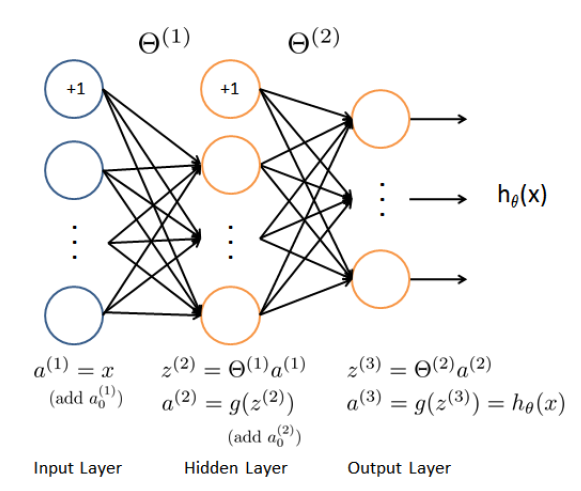

Temos um layer de input, um layer oculto e um layer de output. Dessa forma, temos dois conjuntos de parâmetros theta (1 e 2), sendo estes retornados pela função load(weights).

In [70]:
% Verificando
size(Theta1)
size(Theta2)

ans =

    25   401

ans =

   10   26



A quantidade de linhas dos parâmetros Theta servem como base para supor a quantidade de nós em cada camada.

Para realizar as predições, o mesmo procedimento feito em **5** deve ser realizado.
    - Adicionar coluna bias (c = 1) em todo o dataset X de treinamento
    - Calcular termos z^j 
    - Calcular matrizes de ativação a^j para cada camada j
    - Adicionar termo bias (a = 1) nas camadas de ativação a^j 
    - Calcular h_theta (ativação "a" da última camada j)
   

In [78]:
% Retirando apenas uma parte do dataset para testar introdução da coluna bias
X_teste_bias = X(1:10, :);
size(X_teste_bias)

m_teste = size(X_teste_bias, 1);
[ones(m_teste, 1)]

% Juntando
X_bias = [ones(m_teste, 1) X_teste_bias];
size(X_bias)

ans =

    10   400

ans =

   1
   1
   1
   1
   1
   1
   1
   1
   1
   1

ans =

    10   401



In [79]:
% Aparentemente deu certo. Adicionando bias no dataser original
m = size(X, 1);
X_bias = [ones(m, 1) X];

In [80]:
% Verificando
size(X_bias)

ans =

   5000    401



In [82]:
% Calculando z da primeira camada oculta (layer 2)
z_2 = X * Theta1';
size(z_2)

error: operator *: nonconformant arguments (op1 is 5000x400, op2 is 401x25)
error: 'z_2' undefined near line 1 column 6


Opa. O dataset correto agora é X_bias e não mais X

In [83]:
% Calculando z da primeira camada oculta (layer 2)
z_2 = X_bias * Theta1';
size(z_2)

ans =

   5000     25



In [85]:
% Calculando a da primeira camada oculta (layer 2)
a_2 = sigmoid(z_2);
size(a_2)

ans =

   5000     25



In [86]:
% O próximo passo é adicionar o termo bias na matriz a
a_2 = [ones(m, 1) a_2];
size(a_2)

ans =

   5000     26



In [87]:
% Calculando z_3 última função de ativação a_3 = h_theta
z_3 = a_2 * Theta2';
dim_z3 = size(z_3)
h_theta = sigmoid(z_3);
dim_htheta = size(h_theta)

dim_z3 =

   5000     10

dim_htheta =

   5000     10



In [88]:
% Verificando conteúdo da função h_theta
h_theta

h_theta =

 Columns 1 through 5:

   0.00011266153   0.00174127856   0.00252696959   0.00001840323   0.00936263860
   0.00047902680   0.00241495958   0.00344755685   0.00004056163   0.00653412433
   0.00008857023   0.00324266731   0.02554197974   0.00002136218   0.00396912754
   0.00005573594   0.00804931959   0.01782980520   0.00008651390   0.00064230367
   0.00010578249   0.00151486552   0.00380590161   0.00009170809   0.02262949667
   0.00005992952   0.00293535715   0.00391263727   0.00002554355   0.00350983997
   0.00015707598   0.00185968463   0.03213424722   0.00006764298   0.00148403912
   0.00013643436   0.08833014023   0.00368076077   0.00003127095   0.13261066697
   0.00007758412   0.00687892034   0.01618235719   0.00002649021   0.00541028600
   0.00045618814   0.00127454318   0.11947591952   0.00015072418   0.00607037513
   0.00005763800   0.00089284787   0.00925674482   0.00006620903   0.03554848615
   0.00005463118   0.00854852341   0.00858215067   0.00004481401   0.006037

   0.00439367579   0.00082090855   0.00727801252   0.00292886146   0.33871261093
   0.00006850763   0.00192572429   0.00329978745   0.00008157232   0.01394914997
   0.00009650463   0.01263723138   0.00253551806   0.00021044662   0.04488623675
   0.00089623197   0.00020297707   0.00595773572   0.00201281262   0.05472982656
   0.00005234599   0.00210640179   0.00477364234   0.00004566608   0.00516474521
   0.00008161842   0.00366312757   0.00578858480   0.00005566347   0.01723129797
   0.00018856044   0.00012508803   0.00025502883   0.00009415696   0.09454405076
   0.00019494568   0.00035807906   0.00086227443   0.00012769294   0.04272942571
   0.00014491292   0.00019293097   0.00046011458   0.00029174762   0.26631075130
   0.00011902468   0.00033899784   0.00067528071   0.00013297184   0.01882937525
   0.00011889930   0.01479445227   0.00491020860   0.00016823140   0.00738811919
   0.00183591156   0.00564932313   0.42785300916   0.00013703538   0.02430508798
   0.00008727206   0.0102448

   0.00004433264   0.00791919224   0.04068073784   0.00001608450   0.02293315468
   0.00005838567   0.00191486622   0.00281304294   0.00001901677   0.00381547273
   0.00007002850   0.01873715654   0.01807814755   0.00005267302   0.03104412291
   0.00004877350   0.00108647882   0.00263206212   0.00005965047   0.00581860453
   0.00007411086   0.00602318975   0.00123040210   0.00024941864   0.00248217551
   0.00014049552   0.02125990058   0.02598773294   0.00000445278   0.00215853551
   0.00070506302   0.00392575425   0.05311386056   0.00020108081   0.00069594349
   0.00027433925   0.00184182027   0.00347148951   0.00002300859   0.03075300440
   0.00005360813   0.00195462363   0.00260746367   0.00002682754   0.00302357908
   0.00004984249   0.00441859470   0.00446747573   0.00004638280   0.00286841990
   0.00007588803   0.00153392989   0.00332098570   0.00002294344   0.00711496943
   0.00010170957   0.00814226426   0.00139443709   0.00015158499   0.00881376132
   0.00005756154   0.0042182

   0.00005390857   0.01596579486   0.04186502347   0.00001720486   0.00492513052
   0.00011500238   0.02135574368   0.08450318873   0.00001393181   0.00224575072
   0.00039155904   0.02477389981   0.05759219638   0.00008341483   0.00561027078
   0.00005963524   0.00105289668   0.00082210613   0.00036365706   0.01048559088
   0.00006473885   0.00469693400   0.01692601676   0.00011959684   0.00073350223
   0.00004916085   0.00456312529   0.00190300897   0.00000483767   0.00523693978
   0.00006579826   0.00314376651   0.02087636746   0.00006474063   0.00222411386
   0.00004744245   0.00085018454   0.00194718850   0.00003765048   0.00292120039
   0.00005519901   0.00486911367   0.00684593178   0.00008949502   0.00464598168
   0.00003974268   0.00364587374   0.00313894639   0.00002250908   0.00614834740
   0.00004920347   0.00960309783   0.02454335914   0.00006084408   0.00100296302
   0.00180527941   0.00021026631   0.29092421393   0.00210076675   0.01119104415
   0.00011163475   0.0046177

   0.00012886200   0.00054498357   0.00098637151   0.00004869252   0.01842975014
   0.00019065913   0.00058613389   0.03004883936   0.00007960185   0.07244097893
   0.00009767216   0.00089794824   0.00056802401   0.00024781178   0.00784198533
   0.00039252298   0.01006056002   0.00119962888   0.00000176207   0.00758220780
   0.00016771686   0.00228020644   0.01172425781   0.00016927091   0.00211186966
   0.00010943505   0.12489040382   0.00189615054   0.00096390291   0.00323973577
   0.00017410187   0.00561121845   0.04569091493   0.00001910155   0.00423747904
   0.00007467185   0.00116744756   0.00435949898   0.00010413101   0.00520386581
   0.00006753024   0.02052755898   0.00555367789   0.00001022694   0.02408912524
   0.00007501837   0.00080716335   0.00213009798   0.00012345701   0.00456637046
   0.00003177881   0.00254106435   0.00086734689   0.00001555394   0.00448272927
   0.00002650725   0.00085104921   0.00170976824   0.00016068843   0.02168985760
   0.00016379808   0.0057384

   0.36601867305   0.26961701974   0.04083085717   0.00000433593   0.02917439138
   0.97431880660   0.01671088396   0.00416332234   0.00010866918   0.00543311583
   0.98565606028   0.00725587486   0.00369056297   0.00025960727   0.00117228450
   0.93946588999   0.05759980179   0.00291318269   0.00109051007   0.00012553046
   0.88906387113   0.02889366648   0.00450584887   0.00344332482   0.00074005717
   0.97648624282   0.00370038261   0.00659440327   0.00008828752   0.00951584905
   0.95262251256   0.00799502107   0.01227738962   0.00216445831   0.03324844829
   0.95702472022   0.00767597554   0.00078541081   0.00031249246   0.00191922978
   0.98437437469   0.00448349080   0.00775016299   0.00114956841   0.00317248909
   0.97664607979   0.00935856658   0.00831239005   0.00048128662   0.00023815258
   0.95723307506   0.00431501875   0.01007837774   0.00012669402   0.00899897578
   0.96535996484   0.00324467528   0.02750717073   0.00244660694   0.00072219831
   0.01509006840   0.0163416

   0.98264330503   0.02509813157   0.00515190545   0.00044296751   0.00061138634
   0.97852120336   0.01848790878   0.00430284381   0.00076937533   0.00078602776
   0.87507014788   0.00282526359   0.00933395480   0.00125957315   0.06768977559
   0.86652598628   0.01412536477   0.07890065297   0.00001008657   0.01609090817
   0.97280860035   0.02232911025   0.00472005112   0.00103573186   0.00066377122
   0.92777073391   0.00353286638   0.03248343077   0.00040434807   0.01968693296
   0.96598141177   0.02650841901   0.00350646114   0.00125277909   0.00208160548
   0.97062609280   0.00334640959   0.00568847652   0.00003854688   0.00293656678
   0.93833914896   0.01711652482   0.00717320420   0.00167368351   0.00111709752
   0.83234039048   0.03129273482   0.00188590632   0.03015358940   0.00085118796
   0.93668975889   0.00622954788   0.00947770457   0.00073399353   0.00079714864
   0.98545831432   0.01749917371   0.00246827950   0.00207522927   0.00039108885
   0.97842686646   0.0045282

   0.98671439932   0.00624306074   0.00770356409   0.00011988798   0.00187679555
   0.98604660334   0.00640485654   0.00449473159   0.00052671193   0.00084593417
   0.98241544695   0.01286589724   0.01072946154   0.00026568699   0.00272200515
   0.98059262513   0.00692214041   0.00453847606   0.00012125810   0.00433376206
   0.97713646666   0.01345748008   0.00752732569   0.00017292485   0.00115342901
   0.95193163164   0.02990308545   0.00387831483   0.00137873352   0.00073626049
   0.95891488252   0.01819264762   0.01542807178   0.00013448377   0.00021552061
   0.98514010359   0.00341744000   0.00595344256   0.00029063841   0.00365885064
   0.94841290851   0.00791100830   0.01816549121   0.00049962307   0.01239198418
   0.96194843915   0.00897047783   0.00180556195   0.00007589698   0.00524809667
   0.88466319835   0.01313815938   0.00126892258   0.00029056304   0.00052116228
   0.40811692443   0.00761075332   0.10635048416   0.00346507043   0.00694335405
   0.98533435568   0.0081985

   0.83340947975   0.00502109524   0.00206606273   0.00126553300   0.03637117532
   0.77494301638   0.00018767618   0.07217669951   0.00285352375   0.00982912693
   0.72735281487   0.00083911761   0.01354044598   0.00077357996   0.00064557318
   0.81610387878   0.00776316371   0.04215240890   0.00183245784   0.00073145864
   0.63765765576   0.06060061211   0.16043142875   0.00001114998   0.00400373684
   0.97824689933   0.01388226923   0.00518432805   0.00051245334   0.00127569748
   0.72388443006   0.00003795133   0.03368916004   0.00613565012   0.12207840360
   0.97091569758   0.00203658232   0.00631499503   0.00289076228   0.00332294621
   0.98758975861   0.01403366203   0.00301961409   0.00014878350   0.00045148168
   0.96080114500   0.00469760942   0.00289589068   0.00129929537   0.00082993177
   0.98086881160   0.00298899936   0.00537295761   0.00012715570   0.00410798692
   0.96554810168   0.00791932675   0.01303701090   0.00033747924   0.00259580366
   0.96022438266   0.0156628

   0.94779780584   0.00061448825   0.08700966366   0.00677258252   0.02230841695
   0.98499314573   0.02480480776   0.00423433039   0.00062216527   0.00128433814
   0.96240785506   0.02625922108   0.00303456544   0.00225170499   0.00180638807
   0.92901287123   0.01854518003   0.00370604516   0.00233863471   0.00044911843
   0.97569511684   0.00481459349   0.01081921561   0.00021647189   0.00833991457
   0.97890835015   0.00111200744   0.02945242683   0.00019923051   0.01667107056
   0.84870959636   0.05462347730   0.00963671372   0.00001931307   0.00083159701
   0.98122924764   0.00434681403   0.01659208025   0.00019089505   0.01083580772
   0.98472980318   0.02087373045   0.00530412845   0.00042883612   0.00057935885
   0.99055288329   0.00564321044   0.00661708564   0.00034314739   0.00284466660
   0.97384649735   0.02223852407   0.01135621846   0.00056541437   0.00016604545
   0.95527341852   0.01203164142   0.00975444530   0.00041987328   0.00149493370
   0.94306284450   0.0455419

   0.00028958037   0.97983948662   0.00246860171   0.00024538555   0.00067751782
   0.00160757903   0.99942152378   0.01036629399   0.00481239779   0.00084484751
   0.00359105920   0.98678663831   0.03865743416   0.00005006050   0.00030476546
   0.00300040334   0.99655921740   0.01045906710   0.00736622279   0.00091966780
   0.01758354993   0.98411452231   0.04994546417   0.00003229660   0.00014309928
   0.00100378156   0.99849437111   0.01821602731   0.00750000253   0.00057388275
   0.00108129910   0.46706343931   0.00808879571   0.00009297282   0.20077938077
   0.02496753350   0.37448112524   0.00005395042   0.00043681536   0.00087390374
   0.00132752588   0.99870628554   0.02965256132   0.00749777169   0.00022515537
   0.00055645815   0.99896882204   0.00408869982   0.00393065426   0.00091985079
   0.00071401855   0.99832778824   0.00237212886   0.00890645367   0.00130355920
   0.02045248491   0.94905866182   0.00316104290   0.00002464510   0.00171456633
   0.00045899151   0.9971777

   0.00119249318   0.99518898986   0.06684107549   0.00233369686   0.00168469174
   0.00099758424   0.99652665187   0.04078717596   0.00159440708   0.00070721938
   0.00163820972   0.94613198288   0.00865037329   0.00004410139   0.06925604952
   0.00101129998   0.99807467381   0.00272993888   0.00051930173   0.00073657254
   0.34526712965   0.41876717474   0.13195356004   0.00002589276   0.00015800472
   0.00028608273   0.97480124025   0.00099234200   0.06349889100   0.00005757450
   0.00287565806   0.93715793884   0.00099943822   0.00002331674   0.00140217675
   0.00241176005   0.77254061431   0.05423619634   0.00021021041   0.01725476219
   0.03033373529   0.94141071596   0.19094935925   0.00001962777   0.00008704068
   0.00013226242   0.54095906944   0.00376645379   0.23173430845   0.00067409660
   0.00330734690   0.68069750297   0.00769221055   0.00004109224   0.03698054153
   0.00014856478   0.99228451663   0.00349026495   0.00015362798   0.00078512379
   0.06248845904   0.8238662

   0.00016073398   0.99520905241   0.00755459228   0.00406510803   0.00019546046
   0.00012276352   0.96836133379   0.00145554232   0.00509978421   0.00056711206
   0.00034634046   0.99736932687   0.01247902856   0.00895124542   0.00017473039
   0.00057061839   0.99586578000   0.01249866087   0.01039414127   0.00024667665
   0.00067009078   0.99753505266   0.00498602462   0.01440746962   0.00078725334
   0.00007499006   0.97105977653   0.00336878232   0.00538091249   0.00070917320
   0.00850970700   0.99572020365   0.00425825179   0.00010204826   0.00008745070
   0.00127865927   0.99091436304   0.00374703757   0.01194349852   0.00132606418
   0.00181259514   0.65973795019   0.01638317143   0.00012905274   0.00066538187
   0.02753796086   0.99771805589   0.00308565840   0.00110153061   0.00062749900
   0.00061404059   0.99811729064   0.00464524823   0.00053990930   0.00022531109
   0.00025546720   0.98963367113   0.01811569359   0.00033658641   0.00118508994
   0.00041472964   0.9885167

   0.00040420309   0.82548448848   0.15167818157   0.00203975871   0.02166105213
   0.00247234095   0.99034399570   0.00749687911   0.02641071304   0.00081785461
   0.00005114483   0.97856010325   0.00054638644   0.00993459976   0.00068181996
   0.00045787754   0.83161399844   0.00399633157   0.00002197183   0.00155700008
   0.00064139636   0.99396280224   0.01858564668   0.00012750644   0.00043721449
   0.00067416003   0.99651621887   0.00742781059   0.00042394515   0.00036383798
   0.12614401526   0.70363459703   0.00035088387   0.00334432191   0.00022430545
   0.01366558917   0.95824440897   0.00229145723   0.00001490752   0.00040665941
   0.00116459093   0.99766792310   0.01676267963   0.00081318219   0.00015668922
   0.00096318029   0.99850251384   0.00633781638   0.00292381033   0.00099920575
   0.00635774500   0.99382925357   0.02199634665   0.01079630725   0.00027970516
   0.00415611446   0.99876668075   0.03085746115   0.00533497432   0.00140311180
   0.00044526235   0.9965291

   0.00110433774   0.98300763473   0.00783526456   0.00000400271   0.00018078442
   0.00176818008   0.99479544367   0.01738053891   0.00074882866   0.00024767882
   0.00241039990   0.99412010806   0.03813413105   0.00202712671   0.00081126111
   0.01540750968   0.95527350840   0.00052623789   0.00060913885   0.00017508170
   0.00273834254   0.98866613559   0.00322593774   0.00102567747   0.00711139928
   0.00225006338   0.97568577948   0.00820954368   0.02069499432   0.00064212059
   0.00220310652   0.98753572729   0.00899393037   0.00237406018   0.00809509846
   0.00052721058   0.99261585365   0.04597860299   0.00105211347   0.00641469147
   0.02138259976   0.91904533863   0.11215408241   0.00003822577   0.00001459306
   0.00197304771   0.98682125300   0.00201914155   0.00014872985   0.00059317148
   0.00342825429   0.76416626617   0.00005467357   0.00004309761   0.00112272004
   0.00029310974   0.99359671614   0.00827332633   0.01837147028   0.00042226678
   0.00044765292   0.8869182

   0.00497037559   0.00230940564   0.99686004312   0.00005332178   0.01163503477
   0.00040143439   0.00102499325   0.97414031831   0.00019247482   0.01857874248
   0.00368266785   0.00446258174   0.98863671653   0.00007226564   0.00532437669
   0.01847553397   0.02247043041   0.98688741291   0.00002562166   0.01144431000
   0.00087760636   0.00021716904   0.98722444947   0.00006818052   0.01865755519
   0.00775751106   0.00791354508   0.98940250178   0.00004174635   0.01485727370
   0.03168302744   0.01797207161   0.98272674865   0.00009059306   0.01369790587
   0.00898103163   0.00887792273   0.93997277577   0.00000141190   0.06824616609
   0.00848083273   0.00398199708   0.99419732393   0.00003858872   0.00737977054
   0.00085646530   0.00120013571   0.95580203995   0.00048699508   0.00160400192
   0.00173860786   0.00027470314   0.99400947108   0.00079638783   0.00535502313
   0.00089785487   0.00824926453   0.99348027546   0.00027306554   0.00075408759
   0.01453398622   0.0023714

   0.00187387886   0.01831917707   0.98794283023   0.00032164353   0.00330540942
   0.00252939304   0.00016581341   0.89524056335   0.00004915096   0.08075478800
   0.00106215101   0.00005689555   0.99415148580   0.00095406233   0.01555162918
   0.00029192512   0.00040047556   0.99820082826   0.00025744856   0.00179202841
   0.00355507958   0.00356070079   0.89916064935   0.00096514459   0.00791854497
   0.00119264953   0.00001474093   0.92103646827   0.00011031377   0.01550103117
   0.00305369684   0.06655002383   0.92007828055   0.00024035174   0.02035867557
   0.00125352061   0.02941447677   0.96306979184   0.00253883405   0.00380713878
   0.00139424643   0.00010535712   0.98172821132   0.00122320514   0.05668931583
   0.00808905888   0.00891353145   0.81662095371   0.00007358515   0.01619780385
   0.02572797806   0.00260273415   0.91840232032   0.00013944756   0.01434320266
   0.02662344472   0.00119839541   0.88610128145   0.00024581938   0.00622786361
   0.00506234187   0.0044597

   0.00197023203   0.00008024341   0.98081732422   0.00005666232   0.06316378079
   0.00772665679   0.00024856745   0.95299662157   0.00363840850   0.00851225491
   0.00231574297   0.00185175786   0.99544601934   0.00008525580   0.02236866822
   0.00582768539   0.00075567796   0.94295937566   0.00013265115   0.04984030935
   0.00060677114   0.00893062623   0.96638920200   0.00009922893   0.00712693711
   0.00026175402   0.00202999895   0.98213022633   0.00038992472   0.00459041958
   0.00029369831   0.00978279478   0.93299075694   0.00191567840   0.00557749890
   0.00447505288   0.07721596357   0.84407136436   0.00018082348   0.00202412172
   0.00014994494   0.00276625242   0.97593427584   0.00043435001   0.04161019309
   0.00020297055   0.00025498734   0.99465935553   0.00034431149   0.00238161288
   0.00056619910   0.00815983207   0.94716444408   0.00043756726   0.00267336745
   0.00014167717   0.01502248805   0.76127713173   0.00065544424   0.00218294644
   0.00062055904   0.0464813

   0.00025721896   0.00054267811   0.66999249889   0.00024748649   0.00333784891
   0.00758130464   0.04772581863   0.97928633927   0.00006375291   0.00224350449
   0.03415899747   0.01386072099   0.98462089417   0.00001419918   0.00271405703
   0.00125576621   0.00200419684   0.95808444235   0.00027801866   0.00768915969
   0.00255752995   0.10261360990   0.97640748874   0.00016260174   0.00093355333
   0.00218112907   0.09047367402   0.99484686020   0.00000362752   0.00162850786
   0.00410548634   0.00154946122   0.84722697675   0.00240775645   0.00640722064
   0.00033570482   0.00010330863   0.98960487652   0.00094639550   0.00303372255
   0.00305037174   0.05188088667   0.90421290130   0.00004198374   0.00576656645
   0.00054315898   0.00006429954   0.97561965054   0.00148012330   0.00235504995
   0.00204845594   0.00243242171   0.80050230452   0.00023901092   0.00954284527
   0.00222847319   0.03556675626   0.85591012705   0.00005763752   0.00706279461
   0.01629577743   0.0242339

   0.00039900629   0.00757296046   0.77788236908   0.00046984549   0.01024853753
   0.01552062975   0.00231658464   0.95536559112   0.00012665116   0.02559825934
   0.00127917491   0.00257290955   0.90502312454   0.00013483881   0.01680435513
   0.00166377381   0.00630534225   0.86746921495   0.00006542340   0.01337480967
   0.00235717246   0.00094934099   0.96391469910   0.00014650478   0.00456933125
   0.00077205948   0.00009222944   0.99443867896   0.00021105312   0.02788511825
   0.00667698287   0.01332754770   0.87747961277   0.00000056886   0.04982905040
   0.00289952852   0.00017211393   0.98316934889   0.00007235812   0.01972884956
   0.00152755534   0.03122267520   0.71124634581   0.00012685925   0.00013386129
   0.00052066104   0.00259458974   0.60742383650   0.00000202064   0.14032789558
   0.00094663645   0.01323789397   0.97141073240   0.00021424005   0.00186725870
   0.00074937729   0.00088448219   0.98732654110   0.00004164884   0.01186605408
   0.00565090642   0.0009551

   0.00083018376   0.00030956583   0.00018618563   0.99730624659   0.00910960523
   0.00285871021   0.00042823802   0.00975514105   0.98983370852   0.00072390736
   0.00124397971   0.00105531538   0.00002245182   0.99704374243   0.00030666847
   0.00351534899   0.00099515982   0.00006815241   0.99660698601   0.00295718535
   0.00021626389   0.01622321363   0.00002535530   0.98561278818   0.00054303310
   0.00028544597   0.00055319434   0.00003862227   0.99340836324   0.00688597904
   0.03896645817   0.00063318325   0.00252015176   0.89541195881   0.00729883452
   0.00022940720   0.00122958378   0.00003325566   0.99469536526   0.02147728853
   0.00064348036   0.11704158732   0.00026508138   0.36474273103   0.00132724171
   0.00098964099   0.00071038325   0.00124522587   0.99586013449   0.00115180936
   0.00073607796   0.00469165465   0.00012275992   0.91688742799   0.00068362126
   0.00008151691   0.00322725135   0.00000222901   0.99010203147   0.00156974560
   0.00036243636   0.0030757

   0.00022581379   0.00007333037   0.00197898660   0.84258872939   0.00094461614
   0.00024995678   0.00391056027   0.00002029801   0.95801715303   0.00202932847
   0.00088840906   0.00208201171   0.00377063501   0.89541239329   0.00254989708
   0.00021381599   0.00057271072   0.00001842313   0.99677854637   0.00015501648
   0.00081063827   0.00064137750   0.00022177954   0.99437763983   0.00011545796
   0.00112730207   0.00046800853   0.00019747057   0.99786336965   0.00017348143
   0.00056464020   0.11023519349   0.00009739768   0.72558594438   0.00008263052
   0.00034542901   0.00128766847   0.00038794084   0.86496652203   0.00037092352
   0.00243126185   0.00823494443   0.00000784666   0.96437697606   0.00839059985
   0.00022146466   0.00134698915   0.00000449455   0.99056138099   0.00017103377
   0.00053611640   0.06715610904   0.00009214316   0.86146189688   0.00048245388
   0.00284248242   0.00167225387   0.00114243510   0.80364188631   0.00014264829
   0.00023308169   0.0072590

   0.00035451521   0.00104498972   0.00002022052   0.99425087271   0.00273404724
   0.00014030936   0.02861589127   0.00001204671   0.72751963724   0.00130564672
   0.00151184057   0.00015463374   0.00128384579   0.63762232107   0.00072688769
   0.00078214799   0.00164608844   0.00227611374   0.89398338350   0.00121359204
   0.00092618355   0.00075812344   0.00210607297   0.99684779169   0.00009732558
   0.00107475074   0.00620971790   0.00154993360   0.99420750042   0.00023942376
   0.00066188555   0.00017119001   0.03598321046   0.81942657577   0.00385228912
   0.00128644909   0.00007644630   0.00844566830   0.82326056703   0.03001052845
   0.00006655805   0.00202103058   0.00001038180   0.99258743986   0.01775649398
   0.00003978300   0.00124050900   0.00011432538   0.85774653160   0.00128180007
   0.02512234547   0.00033647834   0.00865475607   0.84786052521   0.01387448954
   0.00042686110   0.00065571762   0.00004234602   0.99007377557   0.00067712704
   0.00006384605   0.0008282

   0.00039172001   0.00234018818   0.00000470318   0.95441376905   0.00065442766
   0.01040931485   0.00479380336   0.00007737740   0.64927938530   0.00828719655
   0.00062284977   0.00152048554   0.00077877511   0.98410177022   0.02008678873
   0.00060785641   0.00280355812   0.00000933587   0.81996430117   0.01007427534
   0.00053581504   0.00769804563   0.00002122795   0.90238139159   0.00092173776
   0.00005140289   0.00713653460   0.00000720862   0.95864307696   0.00198280882
   0.00013083557   0.00104101484   0.00029415180   0.96321967359   0.03104578438
   0.00005418765   0.03106944346   0.00007827955   0.20126139766   0.00717363004
   0.00123544167   0.00037165586   0.00574438835   0.95092390733   0.00408987745
   0.00034921320   0.00071228470   0.00084178375   0.97308972198   0.01379148701
   0.00464019259   0.00031615111   0.00078434266   0.99107552427   0.01247694571
   0.00271643999   0.00047271793   0.00054921952   0.99388172746   0.00370187876
   0.00064481565   0.0000201

   0.00021695598   0.01038906332   0.00063943723   0.95535405727   0.00637140183
   0.00512176665   0.00089652613   0.00001921847   0.93159693072   0.01264059996
   0.00064959298   0.00004251998   0.00647852229   0.96726701644   0.00958712521
   0.00009162027   0.00204925316   0.00001215921   0.98482250746   0.00168000768
   0.00005244652   0.00362851701   0.00000299980   0.99278302352   0.00160480814
   0.03008511360   0.00011380139   0.00241573828   0.38509882669   0.09975882933
   0.00843666488   0.00021664968   0.00452162609   0.88699841513   0.06226549060
   0.00029009016   0.00014186899   0.00702562408   0.95408439595   0.00346607031
   0.01250133479   0.00017639281   0.00125063930   0.99095278315   0.00812109064
   0.00180452741   0.00142348374   0.00400379081   0.98359463651   0.00221162295
   0.00033078506   0.00131208249   0.00025470718   0.93303977517   0.26428815485
   0.00234456386   0.00109987969   0.01993843353   0.98693319088   0.00609411022
   0.00003025721   0.0016053

   0.00025565519   0.00005933115   0.02368439975   0.00191752550   0.73217452374
   0.01859782377   0.00241418485   0.00017835215   0.00443511086   0.99109358765
   0.00067983318   0.00255670487   0.00000492411   0.01473922391   0.83813821015
   0.00125369882   0.00260021428   0.00012325385   0.30333907126   0.93454432800
   0.00017609414   0.00000208621   0.10018602856   0.00073907227   0.96442758996
   0.00033411529   0.00000770259   0.01842042994   0.00220898958   0.86514848912
   0.00065309067   0.00014013613   0.00143762054   0.00756677239   0.95440223715
   0.00278618778   0.65095466090   0.00292182041   0.00286535906   0.02734892341
   0.00858191633   0.00005230762   0.02924138183   0.00001545425   0.89344695790
   0.00922643810   0.00001279402   0.02513796431   0.03923350499   0.97800133961
   0.00180327334   0.00005233147   0.02436691031   0.00005537536   0.94002153829
   0.00032209939   0.00031110658   0.00323311990   0.00902307271   0.77029263835
   0.00061309077   0.0000035

   0.00080137380   0.00057111026   0.00090925092   0.00560298660   0.90392577268
   0.00096507697   0.00006140340   0.00436249709   0.00478086049   0.97417600577
   0.00247411999   0.00062660257   0.01024503546   0.00039408589   0.99904478370
   0.00005095025   0.00040545024   0.00123553987   0.00058035074   0.63771510981
   0.00131392142   0.00085186959   0.00509183218   0.00258858205   0.92810795319
   0.00053974941   0.00000295784   0.06472687524   0.00093833578   0.91339396145
   0.01381252002   0.01326152084   0.01338571341   0.00036061378   0.99257512138
   0.00516955516   0.00451962434   0.00015666073   0.00033513606   0.99008155866
   0.00075841644   0.00817275151   0.00041400477   0.00159916944   0.70443147817
   0.00093511532   0.00492604134   0.00095055668   0.03277457603   0.99671805566
   0.02844305596   0.00635906914   0.00340184966   0.00044255849   0.99215429945
   0.00393978226   0.00024752795   0.00040148544   0.00090632001   0.98399557747
   0.00059484371   0.0058009

   0.00016135664   0.00819038429   0.00023950296   0.09055715460   0.90567107737
   0.00011992103   0.00019970460   0.01740039000   0.00019675045   0.96448940469
   0.00612784322   0.00685182008   0.00027503268   0.00073612963   0.99649646716
   0.00160765471   0.00083540991   0.00002132045   0.22033796496   0.96768977623
   0.00031938346   0.00000204148   0.00202516571   0.00848617624   0.99004362091
   0.00166121506   0.00822765939   0.00014018321   0.00040265195   0.99045285890
   0.00384756999   0.00006769062   0.00005119308   0.07771442635   0.90511036601
   0.00007259821   0.00026553829   0.04656244994   0.00007030989   0.92089940452
   0.00008202276   0.00002840780   0.00301866312   0.01109984716   0.98908572437
   0.00003624701   0.00044130938   0.00313283351   0.00025761456   0.99124196761
   0.00020537499   0.00000180761   0.00281357548   0.00289686327   0.97479539278
   0.00159215580   0.00049846699   0.00125864184   0.00072682919   0.54104466156
   0.00056137343   0.0000899

   0.00014495935   0.00002432356   0.00380232070   0.00236463553   0.98995667760
   0.00207868655   0.00060240260   0.00114893749   0.01267586838   0.99886486389
   0.00014786258   0.00014712054   0.00009616290   0.02177993255   0.84642038917
   0.00084034024   0.00039925015   0.00370922489   0.00140575276   0.98397059283
   0.00543215381   0.00270692271   0.00043223281   0.02872192341   0.97139629600
   0.00026145357   0.00163318774   0.00042106881   0.00075511467   0.91345870471
   0.00080152960   0.00043794270   0.00001466273   0.02113407202   0.94617260317
   0.00063271736   0.00094094028   0.00565352599   0.00092091427   0.98554041779
   0.00015904158   0.00004316158   0.00272827473   0.01439790190   0.97796786879
   0.00084749191   0.00024913853   0.10622493002   0.00058199178   0.75826560100
   0.01556222052   0.00258140991   0.12558665539   0.02638074951   0.98959003163
   0.00007734051   0.00000480741   0.01699428218   0.00336693629   0.98692042379
   0.00467314351   0.0003434

   0.00025595504   0.00190656237   0.00097328611   0.02707301922   0.99045573611
   0.00019383187   0.01741438862   0.01034887075   0.00572979199   0.11706002693
   0.00013286363   0.00006991751   0.00984967078   0.00029913772   0.99766878854
   0.00302657439   0.00020032407   0.00637426063   0.00055477382   0.99589129312
   0.02608707891   0.00479783701   0.00138618999   0.02702977274   0.38493300343
   0.00065313236   0.00009941593   0.00734110593   0.01234082047   0.99356253301
   0.00306490903   0.00001239522   0.01718150763   0.00002375630   0.98844548941
   0.00036448744   0.00002070549   0.03167110304   0.00022223411   0.93150264051
   0.00178691691   0.00582199475   0.00014549942   0.00057775337   0.57376493028
   0.00025061554   0.00012131760   0.00953380971   0.00004734210   0.97582084513
   0.00003282034   0.00001864291   0.00947035353   0.00173956394   0.99536982539
   0.00037319199   0.00128621161   0.03857994528   0.00005640820   0.95850458061
   0.00092700218   0.0004915

   0.00324900506   0.00470232493   0.00265331504   0.00079718300   0.03683614655
   0.00094472384   0.05916413553   0.00002894979   0.10851791669   0.00034993751
   0.00366550013   0.00427627852   0.00042062220   0.00089384502   0.00587029380
   0.00016221212   0.00357195135   0.00002065597   0.00500243319   0.00229566018
   0.00033505924   0.00360083873   0.00001058447   0.01196424930   0.00110927285
   0.00049279833   0.01041437681   0.00005131377   0.00512363614   0.00375846098
   0.00109347139   0.01523333409   0.00003048508   0.02313701858   0.00138020033
   0.00064336545   0.01487834316   0.00017455238   0.00473070662   0.00017139732
   0.00024121785   0.06515469442   0.00011615920   0.01129791934   0.00009053410
   0.00021336056   0.02428723279   0.00004851620   0.02579629229   0.00064869331
   0.00098347885   0.00939678211   0.00006713234   0.11172096479   0.01324382817
   0.00040648612   0.06717985417   0.00212408497   0.02164428058   0.00030312258
   0.00159716947   0.0243182

   0.00211422238   0.01682625952   0.00095301323   0.02077733949   0.01778172914
   0.00242744225   0.00319589046   0.00007025477   0.00227774633   0.00308489485
   0.00282323428   0.01061168150   0.00016707563   0.00195961358   0.00404570326
   0.00204625517   0.00309185952   0.00014285650   0.00225696779   0.01096024450
   0.00021940263   0.00427116079   0.00002424581   0.00418877965   0.00176283618
   0.00199067327   0.01307731147   0.00005901148   0.00184134989   0.00581377253
   0.00748227575   0.00763364343   0.00129977590   0.00148730678   0.00340664012
   0.07185199298   0.00482734579   0.00094810370   0.00510683482   0.00596671706
   0.00489963057   0.00978240374   0.00033429245   0.00783031612   0.00114108420
   0.00073774384   0.00315833763   0.00003845175   0.00786706062   0.00081812901
   0.00455995288   0.01164485500   0.00031089916   0.00596095802   0.00410313474
   0.00299136958   0.04091223369   0.00002809622   0.03606906282   0.00628301863
   0.08282892304   0.1619319

   0.00035047611   0.05188140087   0.00004078787   0.04127726262   0.00017528132
   0.00366137087   0.00267056392   0.00088655171   0.01854724839   0.00885467882
   0.00361914522   0.01767653163   0.00033171561   0.01061114909   0.00577006716
   0.00117532672   0.00946049277   0.00002479238   0.02185646936   0.00127118171
   0.00172124354   0.02155082136   0.00054987142   0.04871559017   0.01057068307
   0.00308319103   0.00825271868   0.00031843950   0.00164892601   0.00279179614
   0.00139724824   0.00528993741   0.00005890150   0.00297686620   0.00114317778
   0.00509781339   0.00464441094   0.00507106420   0.00139657573   0.00347289538
   0.00252776104   0.00723638989   0.00020760787   0.00441187174   0.01000590371
   0.01827671363   0.00283859474   0.01238446059   0.00665749522   0.00211354012
   0.00236613515   0.03759018222   0.00090264491   0.00978242340   0.01042454914
   0.00176739875   0.00300900591   0.00003275273   0.00168500645   0.00150192800
   0.00422476328   0.0022577

   0.00491276744   0.00235564306   0.00034205799   0.00012922499   0.01387603279
   0.00179898658   0.00717064574   0.00004623616   0.00036143177   0.00128447245
   0.00021665256   0.05881715012   0.00012924918   0.00665698253   0.00002948060
   0.00145343020   0.01318915576   0.00024307870   0.02836419754   0.01805697099
   0.00076573380   0.03749569041   0.00001741566   0.02525336110   0.00091009772
   0.00120051248   0.01140443374   0.00031691119   0.00070103199   0.01604879681
   0.00206337432   0.02266693675   0.00069857153   0.00431005526   0.01243058083
   0.00101904887   0.02679273472   0.00004842772   0.00701525634   0.00010544118
   0.00029210405   0.02648141125   0.00001474392   0.29765422905   0.00006158438
   0.00426832635   0.04280235165   0.00030461548   0.00689735714   0.01357209523
   0.00128022725   0.15632022642   0.00015135708   0.00126928733   0.00073716811
   0.00028965016   0.00012472307   0.00016284405   0.01503156326   0.04182630343
   0.00231447854   0.0093827

   0.00170763733   0.00303299459   0.00008218238   0.00375125836   0.00847212964
   0.00072046405   0.00579501498   0.00003510856   0.00142959939   0.00842082415
   0.00073991260   0.00217026714   0.00002242537   0.01374453344   0.00043187254
   0.00013697375   0.01267203031   0.00002275071   0.00746556823   0.00338485370
   0.00490780902   0.00919523830   0.00152959558   0.00171021807   0.00549845499
   0.00131537782   0.00455748548   0.00005330926   0.00363692061   0.00304156096
   0.05338353195   0.07354834287   0.00167802274   0.00817634079   0.02781211787
   0.00170473402   0.00532807061   0.00011918014   0.00607218432   0.00203411069
   0.01247410083   0.02735010016   0.00045863218   0.01072652516   0.01111233989
   0.00370206907   0.09044979058   0.00082440930   0.11370616524   0.00376247595
   0.00011224602   0.00462380608   0.00000625087   0.03708146972   0.00125522797
   0.00112141736   0.00358808496   0.00005158800   0.00282425206   0.00196193465
   0.00411532287   0.0176965

   0.00351093586   0.00002865650   0.00089299266   0.00289468137   0.00139132482
   0.31500844846   0.01959793703   0.05325718110   0.00002971911   0.00839084991
   0.00047615408   0.01281483647   0.00482557932   0.00029984569   0.00027070707
   0.00071923015   0.00490774006   0.02648821735   0.00069660174   0.00013243076
   0.00015929194   0.00210677862   0.00219505937   0.00042367089   0.00006925097
   0.00347426549   0.00329500040   0.01040030059   0.00060146431   0.00293817652
   0.00015325178   0.00024225985   0.00006812489   0.00074652731   0.00181181454
   0.00017501182   0.00073742861   0.00021664067   0.00048572296   0.00013939581
   0.00014653882   0.00431822046   0.02235663211   0.00039538361   0.00007828741
   0.00343267170   0.01817692058   0.02546230528   0.00030037706   0.00135884007
   0.00029212634   0.04876516332   0.00587606335   0.00408003894   0.00004845946
   0.00560132266   0.00011029518   0.00032591254   0.00886089283   0.00187966253
   0.00051342035   0.0012911

   0.00011327719   0.01458228647   0.05019435965   0.00013819502   0.00005579755
   0.00004442088   0.00162843190   0.00007759140   0.00014810171   0.00030582515
   0.00051073995   0.00125730875   0.00008696581   0.00122271308   0.00060466664
   0.00301899377   0.00005946036   0.01487119650   0.00017499967   0.00004227760
   0.02373068641   0.00395824595   0.00568148739   0.00086950801   0.00332024500
   0.00254594807   0.00051473455   0.00047170493   0.00085688703   0.00045873660
   0.00184063183   0.00036202168   0.00004542241   0.00405309425   0.00177059134
   0.00374510236   0.00058390045   0.00012730644   0.00191937262   0.00304935596
   0.00439832090   0.00072944608   0.00028041505   0.00146955257   0.00323487493
   0.03736418148   0.00483653862   0.00080033408   0.00184064944   0.00170566165
   0.00133964747   0.01241851575   0.04893953200   0.00026285734   0.00051230390
   0.00019436485   0.00773081416   0.00871654058   0.00029969909   0.00068741155
   0.00329497646   0.0004912

   0.00093006527   0.00241564214   0.00033662474   0.00093064258   0.00024737212
   0.02061940996   0.00193688994   0.00200559268   0.00127418873   0.01943309865
   0.01270402279   0.21601545401   0.01714393947   0.00003049021   0.00004102990
   0.00244255361   0.01350437498   0.06196528156   0.00020937961   0.00135264204
   0.01190134056   0.00102478887   0.00187673842   0.00238396051   0.00133375690
   0.00096242933   0.00030221539   0.00052987331   0.00129292081   0.00017391299
   0.00044663536   0.00278266997   0.00014157564   0.00068248392   0.00019488759
   0.00361721155   0.00088446516   0.00782998004   0.00173876431   0.00208537792
   0.00018575460   0.04130774359   0.01013086992   0.00467522093   0.00021177811
   0.00287849199   0.00003947523   0.00030950256   0.04789762964   0.00193827828
   0.00034433674   0.11185498936   0.00745293252   0.00007004914   0.00004653404
   0.00164548728   0.00179565029   0.00055180413   0.00128154495   0.00087844310
   0.12951880752   0.0018273

   0.00068164036   0.01616574032   0.00293815934   0.00029865811   0.00039030532
   0.00305424549   0.00852398011   0.01082689888   0.00029436888   0.00047568136
   0.07026136601   0.01062976044   0.01036791485   0.00599850584   0.00049724688
   0.00302401359   0.00622674831   0.00161758669   0.00563855254   0.00028174526
   0.00027859772   0.01242443613   0.00687601050   0.00034785317   0.00021097544
   0.00321819056   0.00313443811   0.00020063299   0.00106142533   0.00153045332
   0.00021622780   0.00354567985   0.00228611796   0.00034119882   0.00020109391
   0.00815402992   0.01692665519   0.01164177823   0.00023414013   0.00104786346
   0.01108770908   0.00013397180   0.01951673956   0.45146724712   0.00065011780
   0.00118244681   0.00001295410   0.00374197953   0.00425305553   0.00060983653
   0.00072305607   0.33842108318   0.00046396141   0.00189442278   0.00033867751
   0.00053766426   0.00240662952   0.02170253229   0.00080351565   0.00126634537
   0.00012364428   0.0000059

   0.00168998247   0.00080386165   0.00007910961   0.08433591247   0.00320117615
   0.00362801348   0.00545194411   0.05086369128   0.00200526235   0.00440348425
   0.00941645276   0.00048481761   0.00249624952   0.00081794787   0.00046326204
   0.00032938689   0.00059161990   0.00002789084   0.00720525372   0.00900353640
   0.00016143527   0.00024821475   0.00020485459   0.00346759331   0.00759810425
   0.00067961039   0.00299930271   0.06478018713   0.00094785992   0.00111965241
   0.00039339408   0.00053992788   0.00008457396   0.01393163279   0.00690642512
   0.00159951240   0.00080021629   0.00201359165   0.00202828358   0.00127866081
   0.00057981098   0.00048456565   0.00012923250   0.01636286762   0.00176993296
   0.00186974019   0.01055475948   0.01914303980   0.00109874795   0.00029508634
   0.00015395747   0.00678436109   0.15932388934   0.00024937581   0.00009330426
   0.00043889753   0.00566853941   0.00824049294   0.00039095150   0.00012308981
   0.00081787542   0.1400589

   0.00250074953   0.00441672946   0.00134738400   0.00030598055   0.00427498655
   0.00110893224   0.01922061747   0.00102229815   0.00046730477   0.00244765821
   0.00026423989   0.00506318052   0.00234271397   0.00055973423   0.00135311319
   0.00022290784   0.00251697192   0.00244575083   0.00119025203   0.00434766287
   0.06026878481   0.02717042587   0.02265428029   0.00581515267   0.00738718977
   0.05111265425   0.00175535245   0.00298833790   0.00034507977   0.02099646185
   0.00010934169   0.00292236105   0.00376323681   0.00049516222   0.00093366558
   0.00027709322   0.00423332870   0.00272066379   0.00185502594   0.01055590721
   0.09608927657   0.04783373541   0.02314417267   0.00011954662   0.01090548144
   0.00199225810   0.03122354985   0.00085958850   0.00027068786   0.00415742835
   0.00058662663   0.00109802702   0.00809011851   0.00046368638   0.00256827327
   0.04699746669   0.02628537425   0.00237909869   0.00015499558   0.00368790605
   0.00030094512   0.0005458

   0.00048699713   0.00402623377   0.00308782021   0.00072023175   0.00465179329
   0.00757778566   0.01573306804   0.01552971229   0.00028301946   0.02488216637
   0.55478075269   0.10353465492   0.00487602843   0.00007585346   0.00094949301
   0.00008369050   0.00127376089   0.00590877239   0.00055143727   0.00295685924
   0.00022354842   0.00198688975   0.00336285370   0.00512793993   0.00388375974
   0.00028356204   0.00673667540   0.00495138182   0.00076703759   0.00330146955
   0.00229849867   0.01854851590   0.02509891385   0.00019197334   0.00418827784
   0.00023283842   0.05234279638   0.00024047912   0.00529844244   0.00318754949
   0.00024198933   0.00544405263   0.00237260856   0.00650086993   0.00612542708
   0.00122280969   0.00331315692   0.00012412167   0.01110729686   0.00706483765
   0.00023676878   0.00649495978   0.00213670760   0.00089088429   0.00751154139
   0.00159739321   0.01232687431   0.00945847482   0.00250426646   0.01001849942
   0.00019441647   0.0035283

   0.01154364213   0.00212738651   0.02909349389   0.02210225831   0.00194526067
   0.00019403075   0.00301265955   0.00332457551   0.00288651962   0.00664165537
   0.03168229435   0.00046263688   0.00559851750   0.00728842618   0.02923906485
   0.00011245212   0.00518995888   0.00004960083   0.00430805899   0.00356067995
   0.00900343686   0.00960491415   0.00194684010   0.00008053803   0.00096741601
   0.01678411165   0.01351362715   0.00090756801   0.00526264542   0.03708543884
   0.13430057352   0.00501382782   0.00143909326   0.00011144701   0.00303774553
   0.00072524972   0.04279923820   0.00099205594   0.00034645641   0.00118200773
   0.01713745748   0.01180885010   0.00118384483   0.00015551168   0.00135372833
   0.01763008140   0.01154047071   0.10878818994   0.00207370339   0.00038533626
   0.00022244377   0.00010060898   0.12588400626   0.00101792890   0.08107828170
   0.23966746282   0.11660083417   0.00028474575   0.00010817473   0.00252959922
   0.00943891377   0.0021714

   0.08090151848   0.01141991830   0.00736663182   0.00032043236   0.00060042521
   0.00666420182   0.00078136367   0.02558891449   0.00031970454   0.00305668391
   0.00092949819   0.04366172017   0.00004915736   0.29074276200   0.00561437303
   0.00099609248   0.02468719136   0.00113600539   0.00117118612   0.00322789613
   0.00041473048   0.00255355906   0.01092458222   0.00108665766   0.00692479913
   0.09905362545   0.03684163429   0.02245876010   0.00019204978   0.00078156879
   0.00251332504   0.09018512270   0.00086035789   0.00089193264   0.00308542132
   0.00003668533   0.33272861389   0.00717550105   0.00054065482   0.00016663447
   0.06772454641   0.00087761454   0.00114917254   0.21985812005   0.00374340600
   0.00021297087   0.02242030169   0.00099676098   0.00256185640   0.00115198837
   0.00322727929   0.01397350351   0.01179107166   0.00136161848   0.01070176327
   0.00108939548   0.00459793917   0.00678047812   0.00043733458   0.00586344415
   0.00789672198   0.0032012

   0.00676136864   0.01392579483   0.00930704292   0.00005494574   0.07877296259
   0.00073236604   0.00091611546   0.00492669255   0.00066322650   0.03963689219
   0.00037618295   0.00173757414   0.00920929332   0.00056885083   0.00596325554
   0.02039125830   0.00057752930   0.05061678668   0.02341522383   0.00303319654
   0.00247757446   0.00028660016   0.00697454374   0.00029201429   0.11469666271
   0.00077809647   0.00349427264   0.02157462337   0.00008550469   0.02207381991
   0.00023712765   0.00169962743   0.00175462602   0.00723644174   0.04561965805
   0.00807081830   0.00074824154   0.00095101716   0.12781388489   0.00926617454
   0.00020834352   0.00259427121   0.00564252729   0.00071240672   0.01182744860
   0.00164853370   0.04564274301   0.00039677326   0.00164727651   0.01006480637
   0.00071746728   0.00090218182   0.01384395921   0.00028020560   0.00306531005
   0.00408378405   0.00044895370   0.01836505971   0.00002539919   0.16168536122
   0.00023429314   0.0056743

   0.00234251800   0.00054200831   0.00076683069   0.20313501932   0.02616541351
   0.06149701072   0.00037324558   0.01125793361   0.00152955337   0.01061297955
   0.00013460652   0.00156778093   0.00006348952   0.01454174690   0.00005888838
   0.01273462559   0.00021754306   0.01891120993   0.12018681463   0.02548810550
   0.00024438830   0.01190803343   0.00088968912   0.00016407625   0.03671127070
   0.00004714632   0.00561270472   0.00001605427   0.01130460481   0.00042708976
   0.00001267712   0.00030458376   0.00052109181   0.01210860647   0.00208667574
   0.00547155969   0.00031924728   0.00039394260   0.12460576188   0.00133626919
   0.00019758952   0.00522635620   0.00000667841   0.07937936576   0.00158313915
   0.00710515257   0.00200132277   0.05966702217   0.00036214410   0.00031327506
   0.00314713035   0.00010178029   0.06744058889   0.01671028629   0.00440077143
   0.00015740454   0.00059167143   0.00037114809   0.11820076286   0.00013883982
   0.07383222790   0.0003508

   0.00083023780   0.00053558998   0.00296443362   0.04117120396   0.00205326985
   0.01176114589   0.00008813993   0.00647436900   0.00077019634   0.07256296253
   0.00165772127   0.00030931642   0.02379540582   0.00690529479   0.00428532862
   0.00014829276   0.00143391780   0.00001264506   0.04177925826   0.00505842679
   0.00069005973   0.00534796689   0.00009628433   0.03868788398   0.00124946816
   0.00129928484   0.00002127064   0.01301963129   0.00296144670   0.00777912115
   0.00045378409   0.00009337435   0.00526251877   0.01359652429   0.00145131185
   0.00281168379   0.00003785720   0.01132749414   0.00490903784   0.00959243411
   0.00147153554   0.00116463021   0.00030486545   0.07845135247   0.00015212197
   0.00023133499   0.00281195844   0.00026354421   0.01069550427   0.03190946514
   0.01125353524   0.00001691264   0.05175824401   0.00701927035   0.01686098830
   0.00204877422   0.00049617504   0.00555876288   0.04521053836   0.00229418385
   0.00029753831   0.0000076

   0.00068056501   0.00125832517   0.00003724650   0.06191881584   0.00127088308
   0.00014826619   0.00037109350   0.00429988137   0.00595861547   0.00334084200
   0.00008690334   0.00140177062   0.00000867501   0.08819939003   0.07368478330
   0.00006404863   0.00281771926   0.00138463258   0.01746323713   0.01450371728
   0.00013803723   0.00019352303   0.00039547774   0.07366717426   0.01918286451
   0.00035192033   0.00036012930   0.00033510316   0.02079201752   0.00142149077
   0.00207999553   0.00024413410   0.00116669978   0.03628044293   0.41080118692
   0.00157542144   0.00087351816   0.00208215599   0.02431677769   0.00682411401
   0.00022876731   0.00432828710   0.00009213204   0.03723753217   0.03198803831
   0.00067569649   0.00022934831   0.00156077299   0.04418929334   0.01872973099
   0.08740436509   0.00002384208   0.01248797380   0.00715458095   0.00879584212
   0.00047030089   0.00192885705   0.00160881874   0.01060713893   0.00008288238
   0.00250541796   0.0001096

   0.00636408848   0.00114596285   0.00061494839   0.04402674268   0.00054496605
   0.00010478110   0.00197363900   0.00000815276   0.09213805954   0.00090550957
   0.00017392382   0.00004709622   0.00707591695   0.00666564856   0.00131352820
   0.00109318522   0.00011297301   0.00358995740   0.00701393168   0.00061991532
   0.00018815232   0.00208213749   0.00001444639   0.08577057288   0.00353010702
   0.00029086127   0.01333971885   0.00000818013   0.02321299108   0.00110022317
   0.00165838916   0.00007991965   0.00376346785   0.02910147159   0.00952913794
   0.00172573298   0.07308951906   0.00660225809   0.02512662130   0.00003471008
   0.00034778507   0.00300534990   0.00000929309   0.06090057490   0.00317227059
   0.00016992611   0.00148771214   0.00001053292   0.28264955442   0.00380405851
   0.00016612676   0.00010728480   0.00441148264   0.03770637582   0.00317659578
   0.00044445818   0.00005672797   0.00703775794   0.00302309793   0.00056321190
   0.00055411430   0.0002605

   0.05176417913   0.00381715020   0.02962975101   0.00587775410   0.01404267765
   0.00083063131   0.00062200377   0.00031451851   0.07139118532   0.00195751355
   0.00004814657   0.00045882183   0.00002151462   0.00331719561   0.00015581435

 Columns 6 through 10:

   0.00399270267   0.00551517524   0.00040146810   0.00648072305   0.99573401199
   0.00175930169   0.01157885266   0.00239107046   0.00197025086   0.99569693140
   0.01028810880   0.00038683906   0.06228923252   0.00549803551   0.92800839684
   0.01146495107   0.00185179778   0.00469294678   0.00082131475   0.99410407382
   0.00088108095   0.00473565655   0.00143648557   0.00209567944   0.99276216086
   0.00391723180   0.00544509794   0.00134771530   0.00407571773   0.99702059768
   0.00129327561   0.01379463271   0.00953222220   0.00154444225   0.97875070320
   0.00017022827   0.00279802067   0.00252371739   0.00009135974   0.81935888557
   0.00260841067   0.00260431630   0.00977429284   0.00443573165   0.98860220864
   

   0.00173958442   0.00180345497   0.00068915869   0.00029280328   0.89344078531
   0.00474523404   0.00438774730   0.00057365217   0.02776926849   0.98941503285
   0.00880449952   0.00042019629   0.00340203239   0.00067348840   0.80754282938
   0.00167327578   0.00462639212   0.00026345895   0.00007397997   0.82926101657
   0.00258569944   0.00104563115   0.00421736672   0.00128750374   0.99338804321
   0.00024534844   0.00142468170   0.00944838595   0.00423252378   0.65527856889
   0.00015711915   0.05417530920   0.00009332613   0.00474933553   0.79103933440
   0.00130173606   0.00861349407   0.00061502446   0.02095118341   0.97457153021
   0.00150845440   0.00055977673   0.00220914763   0.00128051414   0.98786141397
   0.01163458466   0.00133891474   0.00212081268   0.00065784401   0.96773194986
   0.00288288544   0.00222745276   0.00062838856   0.00108325669   0.99451109797
   0.00608809044   0.00054253607   0.00984680582   0.00022182603   0.80037143065
   0.00695640940   0.0024642

   0.00028464086   0.03358613372   0.00055420163   0.01152080516   0.94326348131
   0.00546765089   0.00121448846   0.00104139838   0.00055057538   0.99016549154
   0.00202818307   0.00216409894   0.00902341402   0.00054826788   0.99699262228
   0.00339506412   0.00088063051   0.01744642692   0.00208276632   0.96874279946
   0.00461527127   0.00313387524   0.00037219588   0.00450434761   0.99734030894
   0.00007163055   0.00070149024   0.00041811905   0.00063395157   0.81796741651
   0.00347022479   0.00289947599   0.00171884111   0.00065961454   0.99734366850
   0.02990952249   0.00253535814   0.00777751631   0.02303072644   0.88360521007
   0.00372794430   0.00545297014   0.01139231109   0.02785860171   0.98392085322
   0.00010301060   0.00556776454   0.00189847998   0.00175226573   0.83850947165
   0.00145015584   0.00689409652   0.00153242106   0.01445981780   0.98635454477
   0.00281352345   0.00303614679   0.00064057713   0.00568234332   0.99751600198
   0.00154100302   0.0016090

   0.00377415934   0.00338340208   0.00052683651   0.00045235886   0.98740368863
   0.00378041725   0.00254292520   0.00052025026   0.00081237465   0.99526569009
   0.00552879262   0.00227621405   0.00072583143   0.00071773002   0.98855181891
   0.00439128831   0.00061870937   0.00729994840   0.00231088386   0.97942129163
   0.01152879094   0.00039734230   0.01122526158   0.00170529208   0.96670463673
   0.13235133353   0.00033951141   0.00515795906   0.00035636782   0.90475843063
   0.03753601037   0.00099784018   0.00027417820   0.00039802485   0.99342203214
   0.00267768055   0.00171410633   0.00551422880   0.00046854497   0.99491055019
   0.00600298135   0.01310140550   0.00011088977   0.01155902861   0.99258949976
   0.00256155130   0.00193543400   0.00500757442   0.00156296961   0.98948490871
   0.00472215233   0.00387052635   0.00025424172   0.00253828503   0.99830316554
   0.00239133819   0.00145648087   0.00260100430   0.00042992433   0.99395314055
   0.00293953210   0.0051390

   0.00764515202   0.00084811981   0.02627451293   0.00119542289   0.98166881876
   0.00259204849   0.00028555690   0.08359047528   0.00401712108   0.91502078668
   0.00139678158   0.00107043816   0.00231300171   0.00246593502   0.98529799079
   0.00532953794   0.00206194421   0.00367542358   0.00279857264   0.99275715971
   0.00092800800   0.00162455745   0.04249220548   0.00482380030   0.72226621309
   0.01649775665   0.00096027994   0.00353361716   0.00112553775   0.98596332543
   0.01008807103   0.03241855207   0.00046498333   0.01307769000   0.98053867001
   0.00438715959   0.00328367193   0.00108878370   0.00038311005   0.98677666947
   0.00400269114   0.00333721923   0.00016942223   0.00196430571   0.78427575075
   0.00597263253   0.00121164990   0.02151354585   0.00642207600   0.97553420137
   0.00326409200   0.00638468223   0.00034034909   0.00212608470   0.99296471175
   0.00392725029   0.00180160977   0.00050863511   0.00041211039   0.97015951251
   0.00704074581   0.0022725

   0.00226501194   0.00722841394   0.01161494153   0.00835175853   0.00001417759
   0.00232694444   0.00074069481   0.01716887496   0.00016906927   0.00066336835
   0.00321812514   0.00518987208   0.01231029549   0.00044657399   0.00003550082
   0.05391312278   0.01480245899   0.00240359439   0.00052220883   0.00007848978
   0.01116869453   0.01049859776   0.00280307922   0.00481070829   0.00001831684
   0.00186859526   0.00169934259   0.01048057042   0.00068212236   0.00085456278
   0.00166936727   0.03987774074   0.00170595235   0.00412541368   0.00005688032
   0.00040740554   0.09357398217   0.00141568571   0.00526730661   0.00006630652
   0.01755098353   0.00381991030   0.00492016247   0.00371587434   0.00005913441
   0.02707985827   0.00125373282   0.00497091929   0.00125346798   0.00000959826
   0.02931987642   0.00041423367   0.02503499683   0.00035932886   0.00156278491
   0.00608804074   0.00714728901   0.00358141558   0.01238955191   0.00000694790
   0.00740703781   0.0004251

   0.01799338636   0.00241050712   0.09923002986   0.00165426523   0.00013413547
   0.00343592136   0.00350635282   0.00419101022   0.00052465792   0.00014379330
   0.00154253834   0.00088341782   0.01094398336   0.00020646107   0.00024849013
   0.00181899333   0.00058255901   0.02993416006   0.00026669673   0.00044668124
   0.00415561585   0.00084108207   0.00860511231   0.00030507229   0.00043353290
   0.02004429749   0.00387702520   0.00522202383   0.00115036163   0.00002291448
   0.00420915176   0.01099044608   0.02138496217   0.00064218570   0.00006472177
   0.00306937184   0.00236300317   0.00572219401   0.00040398008   0.00029698163
   0.01344484675   0.00468286644   0.00066649121   0.00576380252   0.00002201970
   0.00065955468   0.00089794780   0.02013018762   0.00044556960   0.00061228522
   0.00691645034   0.01323225938   0.01543362710   0.00501961541   0.00028075715
   0.00167542911   0.00397536366   0.00442840736   0.00055388369   0.00025800387
   0.00155300568   0.0503494

   0.00314612100   0.00007836675   0.05907694900   0.00100696426   0.00137918607
   0.00034116427   0.11922117807   0.01189589328   0.00694601679   0.00003200581
   0.00086120534   0.00296076148   0.13984548972   0.00353790196   0.00098359044
   0.00633008914   0.00623684029   0.00750911619   0.00672508071   0.00001613464
   0.00223831887   0.00055346035   0.02715446396   0.00032430761   0.00081401525
   0.00534228088   0.00656842271   0.00552034410   0.00239540231   0.00002368001
   0.00670693922   0.00748437436   0.00779286146   0.00915268299   0.00001866674
   0.00293710039   0.01674611653   0.00825521486   0.00392519553   0.00001559831
   0.00650539480   0.00913124503   0.01078526973   0.00044551353   0.00002597120
   0.00206616511   0.01100762124   0.02092612580   0.00165179582   0.00016815906
   0.01132572469   0.00390649275   0.01291159234   0.00500871053   0.00001779075
   0.01018213159   0.00722796274   0.00071115604   0.00863095337   0.00000988532
   0.02980574751   0.0017702

   0.00263568177   0.01334035886   0.01361344283   0.00345156217   0.00026153673
   0.00126991742   0.00070775920   0.02146676666   0.00022915765   0.00031790288
   0.00007359309   0.00297899257   0.05844950413   0.00022049682   0.00026717618
   0.03539829651   0.00070165819   0.02469079252   0.00033878799   0.00010610496
   0.00001887798   0.01996316337   0.00355647693   0.08807182970   0.00001836426
   0.00028023699   0.01218634485   0.09423476741   0.03961837198   0.00022096865
   0.00175347193   0.00004401364   0.17819807163   0.00565802200   0.00111316061
   0.00058767434   0.09468655651   0.02058240276   0.00147524839   0.00007339662
   0.00342185108   0.01167598104   0.00798457270   0.00106429799   0.00005225553
   0.01418593353   0.00035896568   0.01488787091   0.00420961604   0.00037245868
   0.03413180029   0.00118236197   0.03103019218   0.00169526662   0.00003352475
   0.02083168620   0.00600238675   0.00853159533   0.00085673987   0.00012226908
   0.00490094627   0.0064900

   0.00198246257   0.00092923251   0.00743825545   0.00016365836   0.00033851224
   0.00126720055   0.00915879772   0.00350331217   0.00126791896   0.00021476611
   0.00493020733   0.01135402713   0.00636163746   0.00154392844   0.00007979502
   0.02640157674   0.00016177228   0.00910419892   0.00424242347   0.00002934279
   0.00290479929   0.00602798755   0.00626790713   0.00049261588   0.00023068585
   0.00511041754   0.00715469435   0.00819936004   0.00021772325   0.00010902690
   0.00126375429   0.02273446250   0.00325343760   0.00177077406   0.00005442703
   0.00658833581   0.00565468834   0.00548883700   0.00701880084   0.00001067852
   0.00717306552   0.00303529093   0.00523254377   0.00400386544   0.00003103932
   0.00106498476   0.04625532116   0.02013367321   0.00427820440   0.00118793958
   0.01336550533   0.00392541885   0.00226300630   0.00404008986   0.00001813539
   0.00210064834   0.00241145485   0.01110972101   0.00044530699   0.00025891421
   0.01432713636   0.0045870

   0.00467345448   0.00004865050   0.00142544289   0.00018599768   0.02761727135
   0.00237708938   0.00144032946   0.00096249371   0.00102520356   0.05028866012
   0.15750582958   0.00013363242   0.00016135809   0.00068257777   0.02604819296
   0.00102395139   0.00135483852   0.01057676439   0.05425701232   0.00157719828
   0.00090463149   0.00003245255   0.00136977757   0.00037225516   0.00044506439
   0.00028764089   0.00015730255   0.08291312539   0.00009546859   0.00219391042
   0.00223141165   0.00004803654   0.00264546144   0.00035697359   0.00060376371
   0.00355013305   0.00703950415   0.01252604022   0.00009501916   0.00004657422
   0.00229515509   0.00006088241   0.00173564145   0.00014344528   0.00058900437
   0.01856780062   0.00008515954   0.00017969309   0.00101358489   0.28076062881
   0.01788635653   0.61021952585   0.00360089509   0.02301839976   0.00001302779
   0.00209345318   0.00011455539   0.00115949391   0.00015960737   0.00040781861
   0.00563509662   0.0000233

   0.00096529738   0.00002372406   0.00969132408   0.00103039052   0.00044060459
   0.16761148849   0.00008530934   0.00420540721   0.00130601296   0.00373150500
   0.00054436727   0.00017447823   0.00464637754   0.00013503156   0.00021239814
   0.00241411448   0.00003564501   0.00943878480   0.00021823874   0.00015009775
   0.00355994042   0.00003719385   0.00502813362   0.00043498081   0.00044167207
   0.00107094056   0.00002882249   0.02308767236   0.00228677699   0.03275015421
   0.00916316302   0.00114852021   0.00015707423   0.00004932842   0.00214788396
   0.00100505564   0.01237369744   0.08645019729   0.00031200726   0.00003872154
   0.00967768380   0.00071366697   0.00031878204   0.04029881115   0.01481024274
   0.00026302712   0.00440609026   0.11071709870   0.00343270070   0.00030060606
   0.01517631216   0.00011862360   0.00474433806   0.00023989956   0.04703946620
   0.00042791961   0.00855370141   0.03819433021   0.00006032314   0.00005216271
   0.00491726381   0.0007254

   0.00248873164   0.00559003019   0.01583893599   0.00006407579   0.00034826220
   0.00026231322   0.00017640403   0.00279996441   0.00020844434   0.00111626861
   0.00769496503   0.00156687663   0.00752823230   0.00006213121   0.00242303132
   0.00716985944   0.00066982963   0.00036010380   0.00011917904   0.00373410314
   0.00191915208   0.00008243222   0.03421798601   0.04622916935   0.00478879846
   0.00327541980   0.00030208459   0.00035299411   0.00003509136   0.00233202494
   0.00327561789   0.00036578717   0.00011956719   0.00004675196   0.00264475141
   0.00404077883   0.00007054426   0.00348676614   0.00186374561   0.00344869061
   0.02028734521   0.00959452707   0.00161568428   0.00157896719   0.00070188631
   0.00247283794   0.00403081012   0.00820816750   0.00023267919   0.00010474873
   0.01164580116   0.00000649787   0.02181662294   0.00342221695   0.01018083222
   0.00008285025   0.00066941613   0.41768540217   0.00008793053   0.00274460924
   0.00226636281   0.0001481

   0.00014898108   0.00303959781   0.04236266331   0.00004053188   0.00071952285
   0.00764353117   0.00032236443   0.00787219958   0.00007155714   0.00290930345
   0.00294437615   0.00211408338   0.00562374813   0.00028197055   0.00022320854
   0.03233476949   0.00018158727   0.00003347691   0.00004768541   0.00639154083
   0.00821981321   0.00004306580   0.00440252033   0.00018853927   0.00006662704
   0.00035311841   0.00119736122   0.00606774110   0.06039622485   0.00937250286
   0.00010193210   0.01267907829   0.02632239986   0.00039584401   0.00042482996
   0.00263353363   0.00008759748   0.01519478435   0.00120182127   0.00216931433
   0.00417255432   0.00013788725   0.00712504652   0.00045527171   0.00155419964
   0.07117035604   0.00179757107   0.00977397805   0.00007645203   0.00073175237
   0.00288172898   0.00319716082   0.03982558142   0.00036445230   0.00384535404
   0.00102998538   0.00006606766   0.00848683732   0.00063046907   0.00051817103
   0.00148965636   0.0000404

   0.00831843582   0.00014098780   0.00789846030   0.00036088572   0.00023920186
   0.03410883213   0.00733248970   0.00010628541   0.01147993416   0.01206898239
   0.00175013475   0.00011071909   0.02523500666   0.00092687588   0.00086846493
   0.00816220932   0.03854063441   0.00003956952   0.00019946494   0.00551015791
   0.00161457259   0.00019174988   0.00514389215   0.00025137912   0.00036322186
   0.00106783582   0.00002258183   0.00955662363   0.00077018894   0.00266731034
   0.05973302046   0.03198230602   0.00081196110   0.00023211075   0.00003262254
   0.00141992757   0.00002861918   0.00546155854   0.00461378668   0.00208549889
   0.00311172962   0.00027891778   0.00020558405   0.00020333570   0.00145874428
   0.00432426968   0.00002618431   0.01255596992   0.00081598575   0.00109842304
   0.01015522044   0.00011890424   0.00374587008   0.00021887639   0.00348525952
   0.00338467723   0.02407452383   0.02111878672   0.00029765764   0.00001009512
   0.00710776775   0.0000998

In [89]:
% Retornando predições
[temp, p] = max(h_theta, [], 2);
p

p =

   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
    8
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10
   10

    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    8
    2
    2
    2
    2
    2
    2
    6
    2
    6
    2
    2
    2
    2
    4
    2
    2
    2
    2
    2
    2
    2
    2
    2
    8
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    1
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
    2
   10
    2
    2
    2
    2
    2
    2
    2
    2
    2
   10
    2
    2
    2
    2
    2
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    3
    5
    3
    3
    3
    3
    3
    3
    

    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    

    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    1
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    8
    5
    8
    8
    8
    8
    8
    8
    

In [90]:
% Encapsulando tudo em uma função, nos padrões do curso

function p = predict(Theta1, Theta2, X)
%PREDICT Predict the label of an input given a trained neural network
%   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
%   trained weights of a neural network (Theta1, Theta2)

% Useful values
m = size(X, 1);
num_labels = size(Theta2, 1);

% You need to return the following variables correctly 
p = zeros(size(X, 1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned neural network. You should set p to a 
%               vector containing labels between 1 to num_labels.
%
% Hint: The max function might come in useful. In particular, the max
%       function can also return the index of the max element, for more
%       information see 'help max'. If your examples are in rows, then, you
%       can use max(A, [], 2) to obtain the max for each row.
%

X = [ones(m, 1) X];
a2 = sigmoid(X * Theta1');
a2 = [ones(m, 1) a2];
htheta = sigmoid(a2 * Theta2');

[temp, p] = max(htheta, [], 2);

% =========================================================================


end

In [92]:
% Predições
pred = predict(Theta1, Theta2, X);

% Acurácia
fprintf('Training Set Accuracy: %f\n', mean(double(pred==y))*100);

Training Set Accuracy: 97.520000


## Bônus: Visualizando Predições


Displaying Example Image

Neural Network Prediction: 3 (digit 3)
Paused - press enter to continue, q to exit:

Displaying Example Image

Neural Network Prediction: 3 (digit 3)
Paused - press enter to continue, q to exit:

Displaying Example Image

Neural Network Prediction: 2 (digit 2)
Paused - press enter to continue, q to exit:

Displaying Example Image

Neural Network Prediction: 5 (digit 5)
Paused - press enter to continue, q to exit:q


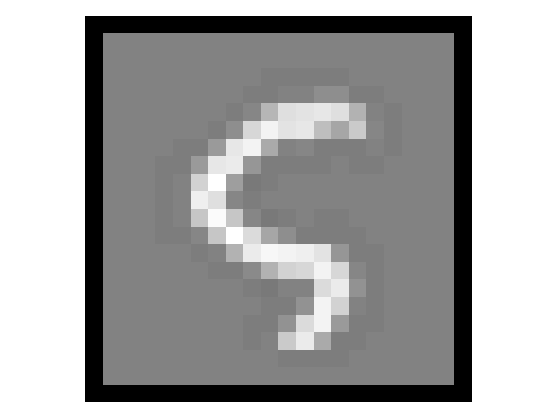

In [96]:
% Laço para visualizar predições de forma dinâmica
%  Randomly permute examples
rp = randperm(m);

for i = 1:m
    % Display 
    fprintf('\nDisplaying Example Image\n');
    displayData(X(rp(i), :));

    pred = predict(Theta1, Theta2, X(rp(i),:));
    fprintf('\nNeural Network Prediction: %d (digit %d)\n', pred, mod(pred, 10));
    
    % Pause with quit option
    s = input('Paused - press enter to continue, q to exit:','s');
    if s == 'q'
      break
    end
end